In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

# 1. 데이터 불러오기 및 Minmax scaler제작

In [2]:
header = pd.read_csv('./Header.csv')
# 처음부터 다시 데이터를 만들 것인가?
New_load_DB = False

if New_load_DB:
    for _ in os.listdir('./Total_DB/'):
        DB = pd.DataFrame(np.loadtxt('./Total_DB/{}'.format(_), delimiter=';', usecols=range(168)), columns=header.columns)
        header = pd.concat((header, DB))
else:
    header = pd.DataFrame(pd.read_csv('tot_db.csv'), columns=header.columns)

## 1.1 전체 데이터를 통하여 Minmax scaler 제작

In [3]:
des = header.describe()
des

BFV122           BHV1    BHV101         BHV108           BHV2  \
count  244982.000000  244982.000000  244982.0  244982.000000  244982.000000   
mean        0.026071       0.045728       0.0       0.093922       0.045728   
std         0.123582       0.207692       0.0       0.290862       0.207692   
min         0.000000       0.000000       0.0       0.000000       0.000000   
25%         0.000000       0.000000       0.0       0.000000       0.000000   
50%         0.000000       0.000000       0.0       0.000000       0.000000   
75%         0.000000       0.000000       0.0       0.000000       0.000000   
max         1.000000       1.000000       0.0       1.000000       1.000000   

              BHV208          BHV22      BHV3         BHV308         BHV311  \
count  244982.000000  244982.000000  244982.0  244982.000000  244982.000000   
mean        0.093922       0.498314       0.0       0.093922       0.973101   
std         0.290862       0.499708       0.0       0.290862       0.093690   
min         0.000000       0.000000       0.0       0.000000       0.000000   
25%         0.000000       0.000000       0.0       0.000000       0.960000   
50%         0.000000       0.000000       0.0       0.000000       1.000000   
75%         0.000000       1.000000       0.0       0.000000       1.000000   
max         1.000000       1.000000       0.0       1.000000       1.000000   

       ...          ZSGW1          ZSGW2          ZSGW3       FSRMDPM  \
count  ...  244982.000000  244982.000000  244982.000000  2.449820e+05   
mean   ...       6.951259       6.779299       6.441462 -2.926887e+02   
std    ...       2.707714       2.714360       2.343627  2.772152e+04   
min    ...      -0.440000      -0.780000      -0.560000 -4.988283e+06   
25%    ...       4.940000       4.890000       4.930000 -3.000000e-01   
50%    ...       6.010000       6.060000       5.630000 -2.000000e-02   
75%    ...       8.650000       8.380000       7.550000 -0.000000e+00   
max    ...      18.750000      15.600000      13.630000  5.210000e+00   

              USUBMA         ZINST1        ZINST17         ZINST2  \
count  244982.000000  244982.000000  244982.000000  244982.000000   
mean       24.804459       4.273166       0.597258      -8.608793   
std        34.091013      19.711357       0.727222       2.146046   
min        -6.730000       0.000000       0.000000     -11.000000   
25%        -0.650000       0.000000       0.000000     -11.000000   
50%        10.550000       0.000000       0.330000      -8.810000   
75%        39.930000       0.020000       0.890000      -7.010000   
max       200.280000     103.170000       4.390000      -3.340000   

              ZINST3        ZINST46  
count  244982.000000  244982.000000  
mean        0.947179     240.628243  
std         1.384936      48.185374  
min         0.000000      51.330000  
25%         0.000000     218.582500  
50%         0.000000     259.070000  
75%         1.920000     268.380000  
max         4.350000     326.200000  

[8 rows x 168 columns]

In [4]:
Tot_minmax = des.loc[['min', 'max']] # 전체 변수에 대한 minmax값
Tot_minmax

BFV122  BHV1  BHV101  BHV108  BHV2  BHV208  BHV22  BHV3  BHV308  BHV311  \
min     0.0   0.0     0.0     0.0   0.0     0.0    0.0   0.0     0.0     0.0   
max     1.0   1.0     0.0     1.0   1.0     1.0    1.0   0.0     1.0     1.0   

     ...  ZSGW1  ZSGW2  ZSGW3     FSRMDPM  USUBMA  ZINST1  ZINST17  ZINST2  \
min  ...  -0.44  -0.78  -0.56 -4988283.00   -6.73    0.00     0.00  -11.00   
max  ...  18.75  15.60  13.63        5.21  200.28  103.17     4.39   -3.34   

     ZINST3  ZINST46  
min    0.00    51.33  
max    4.35   326.20  

[2 rows x 168 columns]

In [5]:
# MinmaxScaler를 활용한 노멀라이제이션
scaler = MinMaxScaler()
scaler.fit(Tot_minmax)
norm_db = scaler.transform(header.values)
norm_db.shape

(244982, 168)

## 1.2 제작된 Minmax scaler를 사용하여 전체 데이터 정규화 검증

In [6]:
norm_db = pd.DataFrame(norm_db, columns=header.columns)
norm_db.head()

BFV122  BHV1  BHV101  BHV108  BHV2  BHV208  BHV22  BHV3  BHV308  BHV311  \
0    0.58   1.0     0.0     1.0   1.0     1.0    0.0   0.0     1.0    0.96   
1    0.57   1.0     0.0     1.0   1.0     1.0    0.0   0.0     1.0    0.96   
2    0.58   1.0     0.0     1.0   1.0     1.0    0.0   0.0     1.0    0.96   
3    0.58   1.0     0.0     1.0   1.0     1.0    0.0   0.0     1.0    0.96   
4    0.58   1.0     0.0     1.0   1.0     1.0    0.0   0.0     1.0    0.96   

   ...     ZSGW1     ZSGW2     ZSGW3   FSRMDPM    USUBMA    ZINST1  ZINST17  \
0  ...  0.690985  0.830891  0.943622  0.999999  0.120622  0.967045      0.0   
1  ...  0.690985  0.830891  0.943622  0.999999  0.120526  0.966754      0.0   
2  ...  0.690985  0.830281  0.942918  0.999999  0.121105  0.969759      0.0   
3  ...  0.690985  0.830281  0.942918  0.999999  0.120815  0.970243      0.0   
4  ...  0.690985  0.830281  0.943622  0.999999  0.120960  0.969177      0.0   

     ZINST2  ZINST3   ZINST46  
0  0.998695     0.0  0.997854  
1  0.998695     0.0  0.997926  
2  0.998695     0.0  0.997599  
3  0.998695     0.0  0.997417  
4  0.998695     0.0  0.997490  

[5 rows x 168 columns]

# 2. 훈련용 및 검증용 데이터 작성

In [7]:
all_db_load = True

# 선택할 변수 선정
input_value = ['BHV311', 'BPSV10', 'BPSV5', 'BV102', 'BV202', 'BV302', 'KCHRGP1', 'KCHRGP3', 'KCTMTSP', 'KLAMPO121',
               'KLAMPO123', 'KLAMPO47', 'KSWO125', 'WPRZSV', 'ZSGW1', 'ZSGW2', 'ZSGW3', 'KBCDO23', 'KZBANK1', 'KZBANK2', 
               'KZBANK3', 'KZBANK4', 'KZBANK5', 'KZBANK6', 'KZBANK7', 'KZBANK8', 'QPROREL', 'QPRZB', 'QPRZP', 'UAVLEG1', 
               'UAVLEG2', 'UAVLEG3', 'UAVLEGM', 'UCOLEG1', 'UCOLEG2', 'UCOLEG3', 'UHOLEG1', 'UHOLEG2', 'UHOLEG3', 'WACCA', 
               'WACCB', 'WHV22', 'WSPRAY', 'WSPRCS1', 'WSPRCS2', 'WSTM1', 'WSTM2', 'WSTM3', 'ZINST101', 'ZINST22', 'ZINST25', 
               'ZINST26', 'ZINST42', 'ZINST56', 'ZINST57', 'ZINST58', 'ZINST62', 'ZINST65', 'ZINST66', 'ZINST70', 'ZINST71', 
               'ZINST72', 'ZINST73', 'ZINST74', 'ZINST75', 'ZINST76', 'ZINST77', 'ZINST78', 'ZINST89', 'ZINST91', 'ZINST92', 
               'ZINST93', 'ZINST94', 'ZINST95', 'ZINST96', 'ZINST99', 'ZPRZ', 'ZREAC']
output_value = ['BFV122', 'BHV1', 'BHV108', 'BHV2', 'BHV208', 'BHV22', 'BHV308', 'BHV6', 'BLV459', 'BLV614',
                'BLV615', 'BPORV', 'BPRZSP', 'BV101', 'BV201', 'BV301', 'KAFWP1', 'KAFWP2', 'KAFWP3', 'KBHON',
                'KCHRGP2', 'KCISOA', 'KFWP1', 'KFWP2', 'KFWP3', 'KLAMPO122', 'KLAMPO124', 'KLAMPO125', 'KLAMPO126',
                'KLAMPO2', 'KLAMPO4', 'KLAMPO48', 'KLAMPO49', 'KLAMPO50', 'KMSISO', 'KOHV22', 'KOLV615', 'KPBHM',
                 'KRXTRIP', 'KSWO120']

input_length = 10
Norm_DB_input_train_DB = []
Norm_DB_output_train_DB = []

Norm_DB_input_test_DB = []
Norm_DB_output_test_DB = []

for _ in os.listdir('./Train_DB/'):
    #단일 데이터 읽어 오기
    DB = pd.DataFrame(np.loadtxt('./Train_DB/{}'.format(_), delimiter=';', usecols=range(168)), columns=header.columns)
    Norm_DB = pd.DataFrame(scaler.transform(DB.values), columns=header.columns)

    # 데이터 분할
    Norm_DB_input = Norm_DB[input_value]
    Norm_DB_output = Norm_DB[output_value]
    
    # 출력 데이터에서 조절가능한 변수와 on/off인 변수를 분할.
    output_value_onoff = ['BHV1', 'BHV108', 'BHV108', 'BHV2', 'BHV208', 'BHV22', 'BHV308', 'BHV6', 'BLV459', 'BLV615', 'BPORV', 'KAFWP1',
                      'KAFWP2', 'KAFWP3', 'KBHON', 'KCHRGP2', 'KCISOA', 'KFWP1', 'KFWP2', 'KFWP3', 'KLAMPO122', 'KLAMPO124',
                      'KLAMPO125', 'KLAMPO126', 'KLAMPO2', 'KLAMPO4', 'KLAMPO48', 'KLAMPO49', 'KLAMPO50', 'KMSISO',
                      'KOHV22', 'KOLV615', 'KPBHM', 'KRXTRIP', 'KSWO120'] #35
    output_value_reg = ['BFV122', 'BLV614', 'BPRZSP', 'BV101', 'BV201', 'BV301']

    temp = pd.DataFrame()

    for _ in output_value_onoff:
        temp['{}_On'.format(_)] = Norm_DB_output[_] >= 0.5
        temp['{}_Off'.format(_)] = Norm_DB_output[_] <= 0.5

    mappint_word = {
        True: 1,
        False: 0
    }
    for _ in temp.columns:
        temp[_] = temp[_].map(mappint_word)

    for _ in output_value_reg:
        temp[_] = Norm_DB_output[_]
    
    Norm_DB_output = temp
    print(Norm_DB_output.shape)
    # 10개 시간 스텝으로 분할하여 저장
    for i in range(0, Norm_DB_input.shape[0] - input_length -1):
        # input DB
        Seqence_data = Norm_DB_input.iloc[i : i + input_length].values
        Norm_DB_input_train_DB.append(Seqence_data)
        # output DB
        Seqence_data = Norm_DB_output.iloc[i + input_length + 1].values
        Norm_DB_output_train_DB.append(Seqence_data)
        
    # 테스트용 break
    if not all_db_load:
        print('단일 데이터만 읽었습니다.')
        break
        
for _ in os.listdir('./Test_DB/'):
    #단일 데이터 읽어 오기
    DB = pd.DataFrame(np.loadtxt('./Test_DB/{}'.format(_), delimiter=';', usecols=range(168)), columns=header.columns)
    Norm_DB = pd.DataFrame(scaler.transform(DB.values), columns=header.columns)

    # 데이터 분할
    Norm_DB_input = Norm_DB[input_value]
    Norm_DB_output = Norm_DB[output_value]
    
    
    # 출력 데이터에서 조절가능한 변수와 on/off인 변수를 분할.
    output_value_onoff = ['BHV1', 'BHV108', 'BHV108', 'BHV2', 'BHV208', 'BHV22', 'BHV308', 'BHV6', 'BLV459', 'BLV615', 'BPORV', 'KAFWP1',
                      'KAFWP2', 'KAFWP3', 'KBHON', 'KCHRGP2', 'KCISOA', 'KFWP1', 'KFWP2', 'KFWP3', 'KLAMPO122', 'KLAMPO124',
                      'KLAMPO125', 'KLAMPO126', 'KLAMPO2', 'KLAMPO4', 'KLAMPO48', 'KLAMPO49', 'KLAMPO50', 'KMSISO',
                      'KOHV22', 'KOLV615', 'KPBHM', 'KRXTRIP', 'KSWO120'] #35
    output_value_reg = ['BFV122', 'BLV614', 'BPRZSP', 'BV101', 'BV201', 'BV301']

    temp = pd.DataFrame()

    for _ in output_value_onoff:
        temp['{}_On'.format(_)] = Norm_DB_output[_] >= 0.5
        temp['{}_Off'.format(_)] = Norm_DB_output[_] <= 0.5

    mappint_word = {
        True: 1,
        False: 0
    }
    for _ in temp.columns:
        temp[_] = temp[_].map(mappint_word)

    for _ in output_value_reg:
        temp[_] = Norm_DB_output[_]
    
    Norm_DB_output = temp
    print(Norm_DB_output.shape)
    
    # 10개 시간 스텝으로 분할하여 저장
    for i in range(0, Norm_DB_input.shape[0] - input_length -1):
        # input DB
        Seqence_data = Norm_DB_input.iloc[i : i + input_length].values
        Norm_DB_input_test_DB.append(Seqence_data)
        # output DB
        Seqence_data = Norm_DB_output.iloc[i + input_length + 1].values
        Norm_DB_output_test_DB.append(Seqence_data)
        
    # 테스트용 break
    if not all_db_load:
        print('단일 데이터만 읽었습니다.')
        break

(2074, 74)
(919, 74)
(1942, 74)
(1504, 74)
(1158, 74)
(1349, 74)
(944, 74)
(1419, 74)
(1185, 74)
(800, 74)
(865, 74)
(1707, 74)
(765, 74)
(772, 74)
(1616, 74)
(632, 74)
(1743, 74)
(632, 74)
(1743, 74)
(1412, 74)
(1502, 74)
(1024, 74)
(1367, 74)
(1529, 74)
(650, 74)
(1489, 74)
(1228, 74)
(976, 74)
(935, 74)
(1585, 74)
(786, 74)
(1590, 74)
(960, 74)
(1832, 74)
(935, 74)
(847, 74)
(920, 74)
(1560, 74)
(1466, 74)
(817, 74)
(926, 74)
(976, 74)
(847, 74)
(538, 74)
(712, 74)
(603, 74)
(751, 74)
(911, 74)
(681, 74)
(681, 74)
(1197, 74)
(957, 74)
(1211, 74)
(962, 74)
(849, 74)
(1001, 74)
(849, 74)
(963, 74)
(1039, 74)
(562, 74)
(969, 74)
(772, 74)
(1701, 74)
(954, 74)
(821, 74)
(634, 74)
(1385, 74)
(515, 74)
(1549, 74)
(843, 74)
(1969, 74)
(585, 74)
(889, 74)
(661, 74)
(1550, 74)
(620, 74)
(1842, 74)
(582, 74)
(1363, 74)
(1216, 74)
(1778, 74)
(1627, 74)
(1435, 74)
(895, 74)
(1862, 74)
(1370, 74)
(1635, 74)
(1403, 74)
(1370, 74)
(1570, 74)
(1208, 74)
(799, 74)
(1492, 74)
(2477, 74)
(1275, 74)
(1

# 3. 네트워크 훈련 및 구축

## 3.1 On/off 변수를 처리하는 네트워크(on/off network) 구축

In [8]:
import tensorflow as tf
import numpy as np

Shape_trina_DB = np.shape(Norm_DB_input_train_DB) # (None, 10, 78)

# 1 on/off 분류 모델
input_layer = tf.keras.Input(batch_shape=(None, Shape_trina_DB[1], Shape_trina_DB[2]))
L_model = tf.keras.models.Sequential([
    tf.keras.layers.CuDNNLSTM(64, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.CuDNNLSTM(64),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dropout(0.3)
])

model = L_model(input_layer)

out_layer = []
# on/off 변수 출력 레이어
for i in range(0,35):
    out_layer.append(tf.keras.layers.Dense(2, activation='softmax')(model))

fin_model = tf.keras.Model(inputs=input_layer, outputs=out_layer)

fin_model.summary()

fin_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 10, 78)       0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 32)           72224       input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 2)            66          sequential[0][0]                 
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 2)            66          sequential[0][0]                 
__________________________________________________________________________________________________
dense_3 (D

## 3.2 조절이 필요한 변수를 처리하는 네트워크(reg network) 구축

In [9]:
# 2 변동성 벨브의 모델
input_layer = tf.keras.Input(batch_shape=(None, Shape_trina_DB[1], Shape_trina_DB[2]))
L_model = tf.keras.models.Sequential([
    tf.keras.layers.CuDNNLSTM(64, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.CuDNNLSTM(64),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dropout(0.3)
])

model = L_model(input_layer)

out_layer = []
# on/off 변수 출력 레이어
for i in range(0,1):
    out_layer.append(tf.keras.layers.Dense(6)(model))

fin_model_2 = tf.keras.Model(inputs=input_layer, outputs=out_layer)

fin_model_2.summary()

fin_model_2.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 10, 78)            0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 32)                72224     
_________________________________________________________________
dense_37 (Dense)             (None, 6)                 198       
Total params: 72,422
Trainable params: 72,422
Non-trainable params: 0
_________________________________________________________________


## 3.3 개별적 네트워크에 사용하도록 훈련용 데이터 재구축 및 분할

In [10]:
Norm_DB_output_train_DB = pd.DataFrame(Norm_DB_output_train_DB, columns=temp.columns)
Norm_DB_output_train_DB.head()

BHV1_On  BHV1_Off  BHV108_On  BHV108_Off  BHV2_On  BHV2_Off  BHV208_On  \
0      1.0       0.0        1.0         0.0      1.0       0.0        1.0   
1      1.0       0.0        1.0         0.0      1.0       0.0        1.0   
2      1.0       0.0        1.0         0.0      1.0       0.0        1.0   
3      1.0       0.0        1.0         0.0      1.0       0.0        1.0   
4      1.0       0.0        1.0         0.0      1.0       0.0        1.0   

   BHV208_Off  BHV22_On  BHV22_Off  ...  KRXTRIP_On  KRXTRIP_Off  KSWO120_On  \
0         0.0       0.0        1.0  ...         0.0          1.0         0.0   
1         0.0       0.0        1.0  ...         0.0          1.0         0.0   
2         0.0       0.0        1.0  ...         0.0          1.0         0.0   
3         0.0       0.0        1.0  ...         0.0          1.0         0.0   
4         0.0       0.0        1.0  ...         0.0          1.0         0.0   

   KSWO120_Off  BFV122    BLV614  BPRZSP  BV101  BV201  BV301  
0          1.0    0.57  0.956044    0.21    0.0    0.0    0.0  
1          1.0    0.57  0.945055    0.20    0.0    0.0    0.0  
2          1.0    0.57  0.945055    0.18    0.0    0.0    0.0  
3          1.0    0.57  0.945055    0.17    0.0    0.0    0.0  
4          1.0    0.57  0.934066    0.15    0.0    0.0    0.0  

[5 rows x 74 columns]

In [11]:
## On/off 변수의 출력 output 작성
on_off_value = []

output_value_onoff = ['BHV1', 'BHV108', 'BHV108', 'BHV2', 'BHV208', 'BHV22', 'BHV308', 'BHV6', 'BLV459', 'BLV615', 'BPORV', 'KAFWP1',
                      'KAFWP2', 'KAFWP3', 'KBHON', 'KCHRGP2', 'KCISOA', 'KFWP1', 'KFWP2', 'KFWP3', 'KLAMPO122', 'KLAMPO124',
                      'KLAMPO125', 'KLAMPO126', 'KLAMPO2', 'KLAMPO4', 'KLAMPO48', 'KLAMPO49', 'KLAMPO50', 'KMSISO',
                      'KOHV22', 'KOLV615', 'KPBHM', 'KRXTRIP', 'KSWO120'] #35
    
for _ in output_value_onoff:
    on_off_value.append(Norm_DB_output_train_DB[['{}_On'.format(_),'{}_Off'.format(_)]].values)
np.shape(on_off_value)

(35, 235654, 2)

In [12]:
## 변동성 변수의 출력 output 작성
output_value_reg = ['BFV122', 'BLV614', 'BPRZSP', 'BV101', 'BV201', 'BV301']

reg_value = Norm_DB_output_train_DB[['BFV122', 'BLV614', 'BPRZSP', 'BV101', 'BV201', 'BV301']].values
np.shape(reg_value)

(235654, 6)

## 3.4 네트워크 훈련 및 검증 동시 수행

In [13]:
tot_out_on_off, tot_out_reg = [], []

for training_step in range(0, 500):
    print('{} step======================================'.format(training_step))
    # 1 step 훈련
    hist = fin_model.fit([Norm_DB_input_train_DB], on_off_value, epochs=1, batch_size=500, verbose = 1)
    hist2 = fin_model_2.fit([Norm_DB_input_train_DB], [reg_value], epochs=1, batch_size=500, verbose = 1)
    # 1 step 훈련 후 검증 데이터를 통한 검증후 저장
    tot_out_on_off.append(fin_model.predict([Norm_DB_input_test_DB]))
    tot_out_reg.append(fin_model_2.predict([Norm_DB_input_test_DB]))

0 step======================================
Epoch 1/1
235654/235654 [==============================] - 40s 170us/step - loss: 3.7178 - dense_1_loss: 0.0518 - dense_2_loss: 0.0690 - dense_3_loss: 0.0536 - dense_4_loss: 0.0653 - dense_5_loss: 0.0582 - dense_6_loss: 0.1437 - dense_7_loss: 0.0639 - dense_8_loss: 0.3206 - dense_9_loss: 0.0584 - dense_10_loss: 0.0750 - dense_11_loss: 0.2458 - dense_12_loss: 0.0400 - dense_13_loss: 0.0638 - dense_14_loss: 0.0419 - dense_15_loss: 0.2059 - dense_16_loss: 0.0512 - dense_17_loss: 0.0276 - dense_18_loss: 0.0476 - dense_19_loss: 0.0365 - dense_20_loss: 0.0527 - dense_21_loss: 0.1273 - dense_22_loss: 0.2377 - dense_23_loss: 0.3225 - dense_24_loss: 0.2639 - dense_25_loss: 0.0552 - dense_26_loss: 0.0558 - dense_27_loss: 0.0487 - dense_28_loss: 0.0583 - dense_29_loss: 0.0425 - dense_30_loss: 0.0637 - dense_31_loss: 0.1448 - dense_32_loss: 0.0617 - dense_33_loss: 0.1971 - dense_34_loss: 0.0448 - dense_35_loss: 0.2211 - dense_1_acc: 0.9840 - dense_2_acc

235654/235654 [==============================] - 29s 125us/step - loss: 0.9754 - dense_1_loss: 0.0042 - dense_2_loss: 0.0087 - dense_3_loss: 0.0079 - dense_4_loss: 0.0044 - dense_5_loss: 0.0081 - dense_6_loss: 0.0147 - dense_7_loss: 0.0083 - dense_8_loss: 0.1420 - dense_9_loss: 0.0044 - dense_10_loss: 0.0047 - dense_11_loss: 0.0890 - dense_12_loss: 0.0049 - dense_13_loss: 0.0183 - dense_14_loss: 0.0049 - dense_15_loss: 0.0565 - dense_16_loss: 0.0048 - dense_17_loss: 0.0050 - dense_18_loss: 0.0049 - dense_19_loss: 0.0050 - dense_20_loss: 0.0051 - dense_21_loss: 0.0393 - dense_22_loss: 0.0923 - dense_23_loss: 0.1342 - dense_24_loss: 0.1049 - dense_25_loss: 0.0055 - dense_26_loss: 0.0058 - dense_27_loss: 0.0184 - dense_28_loss: 0.0055 - dense_29_loss: 0.0052 - dense_30_loss: 0.0081 - dense_31_loss: 0.0162 - dense_32_loss: 0.0056 - dense_33_loss: 0.0570 - dense_34_loss: 0.0142 - dense_35_loss: 0.0573 - dense_1_acc: 0.9988 - dense_2_acc: 0.9973 - dense_3_acc: 0.9975 - dense_4_acc: 0.9987 - 

235654/235654 [==============================] - 28s 118us/step - loss: 0.7334 - dense_1_loss: 0.0030 - dense_2_loss: 0.0059 - dense_3_loss: 0.0058 - dense_4_loss: 0.0032 - dense_5_loss: 0.0058 - dense_6_loss: 0.0093 - dense_7_loss: 0.0058 - dense_8_loss: 0.1172 - dense_9_loss: 0.0032 - dense_10_loss: 0.0032 - dense_11_loss: 0.0647 - dense_12_loss: 0.0037 - dense_13_loss: 0.0117 - dense_14_loss: 0.0037 - dense_15_loss: 0.0398 - dense_16_loss: 0.0037 - dense_17_loss: 0.0040 - dense_18_loss: 0.0037 - dense_19_loss: 0.0038 - dense_20_loss: 0.0038 - dense_21_loss: 0.0283 - dense_22_loss: 0.0733 - dense_23_loss: 0.1059 - dense_24_loss: 0.0835 - dense_25_loss: 0.0042 - dense_26_loss: 0.0042 - dense_27_loss: 0.0160 - dense_28_loss: 0.0040 - dense_29_loss: 0.0041 - dense_30_loss: 0.0060 - dense_31_loss: 0.0111 - dense_32_loss: 0.0041 - dense_33_loss: 0.0358 - dense_34_loss: 0.0119 - dense_35_loss: 0.0359 - dense_1_acc: 0.9991 - dense_2_acc: 0.9981 - dense_3_acc: 0.9982 - dense_4_acc: 0.9991 - 

235654/235654 [==============================] - 28s 117us/step - loss: 0.6895 - dense_1_loss: 0.0027 - dense_2_loss: 0.0053 - dense_3_loss: 0.0052 - dense_4_loss: 0.0028 - dense_5_loss: 0.0052 - dense_6_loss: 0.0108 - dense_7_loss: 0.0052 - dense_8_loss: 0.1111 - dense_9_loss: 0.0029 - dense_10_loss: 0.0030 - dense_11_loss: 0.0582 - dense_12_loss: 0.0037 - dense_13_loss: 0.0096 - dense_14_loss: 0.0037 - dense_15_loss: 0.0338 - dense_16_loss: 0.0036 - dense_17_loss: 0.0039 - dense_18_loss: 0.0037 - dense_19_loss: 0.0037 - dense_20_loss: 0.0037 - dense_21_loss: 0.0255 - dense_22_loss: 0.0719 - dense_23_loss: 0.1011 - dense_24_loss: 0.0803 - dense_25_loss: 0.0041 - dense_26_loss: 0.0040 - dense_27_loss: 0.0143 - dense_28_loss: 0.0039 - dense_29_loss: 0.0040 - dense_30_loss: 0.0052 - dense_31_loss: 0.0124 - dense_32_loss: 0.0039 - dense_33_loss: 0.0329 - dense_34_loss: 0.0108 - dense_35_loss: 0.0331 - dense_1_acc: 0.9992 - dense_2_acc: 0.9983 - dense_3_acc: 0.9983 - dense_4_acc: 0.9992 - 

235654/235654 [==============================] - 31s 130us/step - loss: 0.5942 - dense_1_loss: 0.0024 - dense_2_loss: 0.0049 - dense_3_loss: 0.0049 - dense_4_loss: 0.0024 - dense_5_loss: 0.0049 - dense_6_loss: 0.0068 - dense_7_loss: 0.0049 - dense_8_loss: 0.0977 - dense_9_loss: 0.0025 - dense_10_loss: 0.0025 - dense_11_loss: 0.0518 - dense_12_loss: 0.0033 - dense_13_loss: 0.0085 - dense_14_loss: 0.0033 - dense_15_loss: 0.0293 - dense_16_loss: 0.0032 - dense_17_loss: 0.0035 - dense_18_loss: 0.0033 - dense_19_loss: 0.0033 - dense_20_loss: 0.0033 - dense_21_loss: 0.0220 - dense_22_loss: 0.0609 - dense_23_loss: 0.0857 - dense_24_loss: 0.0680 - dense_25_loss: 0.0037 - dense_26_loss: 0.0035 - dense_27_loss: 0.0123 - dense_28_loss: 0.0034 - dense_29_loss: 0.0036 - dense_30_loss: 0.0052 - dense_31_loss: 0.0087 - dense_32_loss: 0.0034 - dense_33_loss: 0.0286 - dense_34_loss: 0.0102 - dense_35_loss: 0.0288 - dense_1_acc: 0.9994 - dense_2_acc: 0.9984 - dense_3_acc: 0.9985 - dense_4_acc: 0.9994 - 

235654/235654 [==============================] - 30s 128us/step - loss: 0.5368 - dense_1_loss: 0.0022 - dense_2_loss: 0.0043 - dense_3_loss: 0.0043 - dense_4_loss: 0.0022 - dense_5_loss: 0.0043 - dense_6_loss: 0.0065 - dense_7_loss: 0.0043 - dense_8_loss: 0.0892 - dense_9_loss: 0.0024 - dense_10_loss: 0.0024 - dense_11_loss: 0.0458 - dense_12_loss: 0.0032 - dense_13_loss: 0.0073 - dense_14_loss: 0.0032 - dense_15_loss: 0.0273 - dense_16_loss: 0.0031 - dense_17_loss: 0.0034 - dense_18_loss: 0.0032 - dense_19_loss: 0.0032 - dense_20_loss: 0.0032 - dense_21_loss: 0.0191 - dense_22_loss: 0.0551 - dense_23_loss: 0.0773 - dense_24_loss: 0.0616 - dense_25_loss: 0.0036 - dense_26_loss: 0.0034 - dense_27_loss: 0.0107 - dense_28_loss: 0.0033 - dense_29_loss: 0.0035 - dense_30_loss: 0.0046 - dense_31_loss: 0.0083 - dense_32_loss: 0.0033 - dense_33_loss: 0.0245 - dense_34_loss: 0.0095 - dense_35_loss: 0.0245 - dense_1_acc: 0.9995 - dense_2_acc: 0.9986 - dense_3_acc: 0.9986 - dense_4_acc: 0.9995 - 

235654/235654 [==============================] - 30s 128us/step - loss: 0.5014 - dense_1_loss: 0.0020 - dense_2_loss: 0.0039 - dense_3_loss: 0.0039 - dense_4_loss: 0.0020 - dense_5_loss: 0.0039 - dense_6_loss: 0.0060 - dense_7_loss: 0.0039 - dense_8_loss: 0.0830 - dense_9_loss: 0.0022 - dense_10_loss: 0.0022 - dense_11_loss: 0.0424 - dense_12_loss: 0.0030 - dense_13_loss: 0.0067 - dense_14_loss: 0.0030 - dense_15_loss: 0.0251 - dense_16_loss: 0.0029 - dense_17_loss: 0.0032 - dense_18_loss: 0.0030 - dense_19_loss: 0.0030 - dense_20_loss: 0.0030 - dense_21_loss: 0.0172 - dense_22_loss: 0.0528 - dense_23_loss: 0.0721 - dense_24_loss: 0.0583 - dense_25_loss: 0.0035 - dense_26_loss: 0.0032 - dense_27_loss: 0.0096 - dense_28_loss: 0.0030 - dense_29_loss: 0.0032 - dense_30_loss: 0.0045 - dense_31_loss: 0.0077 - dense_32_loss: 0.0030 - dense_33_loss: 0.0230 - dense_34_loss: 0.0096 - dense_35_loss: 0.0231 - dense_1_acc: 0.9996 - dense_2_acc: 0.9988 - dense_3_acc: 0.9988 - dense_4_acc: 0.9996 - 

235654/235654 [==============================] - 30s 128us/step - loss: 0.4802 - dense_1_loss: 0.0020 - dense_2_loss: 0.0039 - dense_3_loss: 0.0039 - dense_4_loss: 0.0020 - dense_5_loss: 0.0039 - dense_6_loss: 0.0056 - dense_7_loss: 0.0039 - dense_8_loss: 0.0796 - dense_9_loss: 0.0021 - dense_10_loss: 0.0021 - dense_11_loss: 0.0409 - dense_12_loss: 0.0029 - dense_13_loss: 0.0067 - dense_14_loss: 0.0029 - dense_15_loss: 0.0242 - dense_16_loss: 0.0028 - dense_17_loss: 0.0031 - dense_18_loss: 0.0029 - dense_19_loss: 0.0029 - dense_20_loss: 0.0029 - dense_21_loss: 0.0162 - dense_22_loss: 0.0498 - dense_23_loss: 0.0686 - dense_24_loss: 0.0550 - dense_25_loss: 0.0033 - dense_26_loss: 0.0031 - dense_27_loss: 0.0091 - dense_28_loss: 0.0030 - dense_29_loss: 0.0032 - dense_30_loss: 0.0045 - dense_31_loss: 0.0075 - dense_32_loss: 0.0030 - dense_33_loss: 0.0219 - dense_34_loss: 0.0089 - dense_35_loss: 0.0220 - dense_1_acc: 0.9995 - dense_2_acc: 0.9987 - dense_3_acc: 0.9987 - dense_4_acc: 0.9995 - 

235654/235654 [==============================] - 30s 128us/step - loss: 0.4516 - dense_1_loss: 0.0019 - dense_2_loss: 0.0033 - dense_3_loss: 0.0033 - dense_4_loss: 0.0019 - dense_5_loss: 0.0033 - dense_6_loss: 0.0054 - dense_7_loss: 0.0033 - dense_8_loss: 0.0760 - dense_9_loss: 0.0020 - dense_10_loss: 0.0020 - dense_11_loss: 0.0378 - dense_12_loss: 0.0026 - dense_13_loss: 0.0057 - dense_14_loss: 0.0026 - dense_15_loss: 0.0239 - dense_16_loss: 0.0025 - dense_17_loss: 0.0027 - dense_18_loss: 0.0026 - dense_19_loss: 0.0026 - dense_20_loss: 0.0026 - dense_21_loss: 0.0156 - dense_22_loss: 0.0479 - dense_23_loss: 0.0655 - dense_24_loss: 0.0526 - dense_25_loss: 0.0030 - dense_26_loss: 0.0027 - dense_27_loss: 0.0089 - dense_28_loss: 0.0027 - dense_29_loss: 0.0029 - dense_30_loss: 0.0038 - dense_31_loss: 0.0071 - dense_32_loss: 0.0027 - dense_33_loss: 0.0199 - dense_34_loss: 0.0084 - dense_35_loss: 0.0200 - dense_1_acc: 0.9995 - dense_2_acc: 0.9989 - dense_3_acc: 0.9989 - dense_4_acc: 0.9995 - 

235654/235654 [==============================] - 31s 132us/step - loss: 0.4427 - dense_1_loss: 0.0018 - dense_2_loss: 0.0033 - dense_3_loss: 0.0033 - dense_4_loss: 0.0018 - dense_5_loss: 0.0033 - dense_6_loss: 0.0051 - dense_7_loss: 0.0033 - dense_8_loss: 0.0750 - dense_9_loss: 0.0018 - dense_10_loss: 0.0018 - dense_11_loss: 0.0375 - dense_12_loss: 0.0025 - dense_13_loss: 0.0052 - dense_14_loss: 0.0025 - dense_15_loss: 0.0226 - dense_16_loss: 0.0024 - dense_17_loss: 0.0026 - dense_18_loss: 0.0025 - dense_19_loss: 0.0025 - dense_20_loss: 0.0025 - dense_21_loss: 0.0136 - dense_22_loss: 0.0485 - dense_23_loss: 0.0645 - dense_24_loss: 0.0524 - dense_25_loss: 0.0029 - dense_26_loss: 0.0027 - dense_27_loss: 0.0086 - dense_28_loss: 0.0026 - dense_29_loss: 0.0028 - dense_30_loss: 0.0037 - dense_31_loss: 0.0070 - dense_32_loss: 0.0026 - dense_33_loss: 0.0197 - dense_34_loss: 0.0081 - dense_35_loss: 0.0198 - dense_1_acc: 0.9996 - dense_2_acc: 0.9989 - dense_3_acc: 0.9989 - dense_4_acc: 0.9996 - 

235654/235654 [==============================] - 31s 130us/step - loss: 0.4326 - dense_1_loss: 0.0017 - dense_2_loss: 0.0035 - dense_3_loss: 0.0035 - dense_4_loss: 0.0017 - dense_5_loss: 0.0035 - dense_6_loss: 0.0055 - dense_7_loss: 0.0035 - dense_8_loss: 0.0740 - dense_9_loss: 0.0019 - dense_10_loss: 0.0019 - dense_11_loss: 0.0349 - dense_12_loss: 0.0027 - dense_13_loss: 0.0050 - dense_14_loss: 0.0027 - dense_15_loss: 0.0221 - dense_16_loss: 0.0026 - dense_17_loss: 0.0028 - dense_18_loss: 0.0027 - dense_19_loss: 0.0027 - dense_20_loss: 0.0027 - dense_21_loss: 0.0136 - dense_22_loss: 0.0469 - dense_23_loss: 0.0618 - dense_24_loss: 0.0508 - dense_25_loss: 0.0031 - dense_26_loss: 0.0028 - dense_27_loss: 0.0083 - dense_28_loss: 0.0027 - dense_29_loss: 0.0029 - dense_30_loss: 0.0038 - dense_31_loss: 0.0072 - dense_32_loss: 0.0027 - dense_33_loss: 0.0182 - dense_34_loss: 0.0079 - dense_35_loss: 0.0182 - dense_1_acc: 0.9996 - dense_2_acc: 0.9990 - dense_3_acc: 0.9990 - dense_4_acc: 0.9996 - 

235654/235654 [==============================] - 32s 137us/step - loss: 0.4057 - dense_1_loss: 0.0016 - dense_2_loss: 0.0034 - dense_3_loss: 0.0034 - dense_4_loss: 0.0016 - dense_5_loss: 0.0034 - dense_6_loss: 0.0047 - dense_7_loss: 0.0034 - dense_8_loss: 0.0692 - dense_9_loss: 0.0017 - dense_10_loss: 0.0017 - dense_11_loss: 0.0329 - dense_12_loss: 0.0024 - dense_13_loss: 0.0051 - dense_14_loss: 0.0024 - dense_15_loss: 0.0211 - dense_16_loss: 0.0024 - dense_17_loss: 0.0025 - dense_18_loss: 0.0024 - dense_19_loss: 0.0024 - dense_20_loss: 0.0024 - dense_21_loss: 0.0127 - dense_22_loss: 0.0439 - dense_23_loss: 0.0586 - dense_24_loss: 0.0471 - dense_25_loss: 0.0028 - dense_26_loss: 0.0025 - dense_27_loss: 0.0077 - dense_28_loss: 0.0024 - dense_29_loss: 0.0027 - dense_30_loss: 0.0037 - dense_31_loss: 0.0064 - dense_32_loss: 0.0024 - dense_33_loss: 0.0173 - dense_34_loss: 0.0078 - dense_35_loss: 0.0174 - dense_1_acc: 0.9996 - dense_2_acc: 0.9989 - dense_3_acc: 0.9989 - dense_4_acc: 0.9996 - 

Epoch 1/1
235654/235654 [==============================] - 31s 130us/step - loss: 0.4125 - dense_1_loss: 0.0016 - dense_2_loss: 0.0033 - dense_3_loss: 0.0033 - dense_4_loss: 0.0016 - dense_5_loss: 0.0033 - dense_6_loss: 0.0075 - dense_7_loss: 0.0033 - dense_8_loss: 0.0705 - dense_9_loss: 0.0017 - dense_10_loss: 0.0017 - dense_11_loss: 0.0322 - dense_12_loss: 0.0023 - dense_13_loss: 0.0051 - dense_14_loss: 0.0023 - dense_15_loss: 0.0219 - dense_16_loss: 0.0024 - dense_17_loss: 0.0024 - dense_18_loss: 0.0023 - dense_19_loss: 0.0023 - dense_20_loss: 0.0023 - dense_21_loss: 0.0124 - dense_22_loss: 0.0445 - dense_23_loss: 0.0584 - dense_24_loss: 0.0476 - dense_25_loss: 0.0027 - dense_26_loss: 0.0024 - dense_27_loss: 0.0080 - dense_28_loss: 0.0023 - dense_29_loss: 0.0025 - dense_30_loss: 0.0041 - dense_31_loss: 0.0090 - dense_32_loss: 0.0023 - dense_33_loss: 0.0177 - dense_34_loss: 0.0074 - dense_35_loss: 0.0178 - dense_1_acc: 0.9996 - dense_2_acc: 0.9989 - dense_3_acc: 0.9989 - dense_4_acc:

235654/235654 [==============================] - 30s 128us/step - loss: 0.3964 - dense_1_loss: 0.0017 - dense_2_loss: 0.0033 - dense_3_loss: 0.0033 - dense_4_loss: 0.0017 - dense_5_loss: 0.0033 - dense_6_loss: 0.0050 - dense_7_loss: 0.0033 - dense_8_loss: 0.0685 - dense_9_loss: 0.0018 - dense_10_loss: 0.0018 - dense_11_loss: 0.0312 - dense_12_loss: 0.0023 - dense_13_loss: 0.0049 - dense_14_loss: 0.0023 - dense_15_loss: 0.0210 - dense_16_loss: 0.0025 - dense_17_loss: 0.0024 - dense_18_loss: 0.0023 - dense_19_loss: 0.0023 - dense_20_loss: 0.0023 - dense_21_loss: 0.0123 - dense_22_loss: 0.0433 - dense_23_loss: 0.0569 - dense_24_loss: 0.0463 - dense_25_loss: 0.0027 - dense_26_loss: 0.0024 - dense_27_loss: 0.0075 - dense_28_loss: 0.0023 - dense_29_loss: 0.0025 - dense_30_loss: 0.0039 - dense_31_loss: 0.0066 - dense_32_loss: 0.0023 - dense_33_loss: 0.0166 - dense_34_loss: 0.0075 - dense_35_loss: 0.0167 - dense_1_acc: 0.9996 - dense_2_acc: 0.9990 - dense_3_acc: 0.9990 - dense_4_acc: 0.9996 - 

235654/235654 [==============================] - 5s 23us/step - loss: 0.0024 - acc: 0.9455
47 step======================================
Epoch 1/1
235654/235654 [==============================] - 31s 130us/step - loss: 0.3827 - dense_1_loss: 0.0017 - dense_2_loss: 0.0031 - dense_3_loss: 0.0031 - dense_4_loss: 0.0017 - dense_5_loss: 0.0031 - dense_6_loss: 0.0045 - dense_7_loss: 0.0031 - dense_8_loss: 0.0659 - dense_9_loss: 0.0017 - dense_10_loss: 0.0017 - dense_11_loss: 0.0301 - dense_12_loss: 0.0023 - dense_13_loss: 0.0044 - dense_14_loss: 0.0023 - dense_15_loss: 0.0204 - dense_16_loss: 0.0023 - dense_17_loss: 0.0024 - dense_18_loss: 0.0023 - dense_19_loss: 0.0023 - dense_20_loss: 0.0023 - dense_21_loss: 0.0112 - dense_22_loss: 0.0417 - dense_23_loss: 0.0545 - dense_24_loss: 0.0445 - dense_25_loss: 0.0028 - dense_26_loss: 0.0024 - dense_27_loss: 0.0076 - dense_28_loss: 0.0023 - dense_29_loss: 0.0025 - dense_30_loss: 0.0036 - dense_31_loss: 0.0062 - dense_32_loss: 0.0023 - dense_33_loss

235654/235654 [==============================] - 31s 132us/step - loss: 0.3798 - dense_1_loss: 0.0017 - dense_2_loss: 0.0032 - dense_3_loss: 0.0032 - dense_4_loss: 0.0017 - dense_5_loss: 0.0032 - dense_6_loss: 0.0048 - dense_7_loss: 0.0032 - dense_8_loss: 0.0642 - dense_9_loss: 0.0018 - dense_10_loss: 0.0018 - dense_11_loss: 0.0296 - dense_12_loss: 0.0023 - dense_13_loss: 0.0046 - dense_14_loss: 0.0023 - dense_15_loss: 0.0205 - dense_16_loss: 0.0024 - dense_17_loss: 0.0024 - dense_18_loss: 0.0023 - dense_19_loss: 0.0023 - dense_20_loss: 0.0023 - dense_21_loss: 0.0119 - dense_22_loss: 0.0404 - dense_23_loss: 0.0541 - dense_24_loss: 0.0436 - dense_25_loss: 0.0028 - dense_26_loss: 0.0025 - dense_27_loss: 0.0073 - dense_28_loss: 0.0023 - dense_29_loss: 0.0025 - dense_30_loss: 0.0036 - dense_31_loss: 0.0065 - dense_32_loss: 0.0023 - dense_33_loss: 0.0165 - dense_34_loss: 0.0072 - dense_35_loss: 0.0166 - dense_1_acc: 0.9996 - dense_2_acc: 0.9989 - dense_3_acc: 0.9989 - dense_4_acc: 0.9996 - 

235654/235654 [==============================] - 31s 131us/step - loss: 0.3453 - dense_1_loss: 0.0014 - dense_2_loss: 0.0030 - dense_3_loss: 0.0030 - dense_4_loss: 0.0014 - dense_5_loss: 0.0030 - dense_6_loss: 0.0046 - dense_7_loss: 0.0030 - dense_8_loss: 0.0600 - dense_9_loss: 0.0016 - dense_10_loss: 0.0016 - dense_11_loss: 0.0269 - dense_12_loss: 0.0021 - dense_13_loss: 0.0043 - dense_14_loss: 0.0021 - dense_15_loss: 0.0187 - dense_16_loss: 0.0022 - dense_17_loss: 0.0023 - dense_18_loss: 0.0021 - dense_19_loss: 0.0021 - dense_20_loss: 0.0021 - dense_21_loss: 0.0104 - dense_22_loss: 0.0367 - dense_23_loss: 0.0485 - dense_24_loss: 0.0392 - dense_25_loss: 0.0026 - dense_26_loss: 0.0023 - dense_27_loss: 0.0072 - dense_28_loss: 0.0021 - dense_29_loss: 0.0023 - dense_30_loss: 0.0034 - dense_31_loss: 0.0062 - dense_32_loss: 0.0021 - dense_33_loss: 0.0140 - dense_34_loss: 0.0067 - dense_35_loss: 0.0140 - dense_1_acc: 0.9997 - dense_2_acc: 0.9990 - dense_3_acc: 0.9990 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 30s 129us/step - loss: 0.3473 - dense_1_loss: 0.0015 - dense_2_loss: 0.0027 - dense_3_loss: 0.0027 - dense_4_loss: 0.0015 - dense_5_loss: 0.0027 - dense_6_loss: 0.0053 - dense_7_loss: 0.0027 - dense_8_loss: 0.0599 - dense_9_loss: 0.0016 - dense_10_loss: 0.0016 - dense_11_loss: 0.0267 - dense_12_loss: 0.0021 - dense_13_loss: 0.0045 - dense_14_loss: 0.0021 - dense_15_loss: 0.0194 - dense_16_loss: 0.0022 - dense_17_loss: 0.0022 - dense_18_loss: 0.0021 - dense_19_loss: 0.0021 - dense_20_loss: 0.0021 - dense_21_loss: 0.0105 - dense_22_loss: 0.0372 - dense_23_loss: 0.0494 - dense_24_loss: 0.0398 - dense_25_loss: 0.0025 - dense_26_loss: 0.0022 - dense_27_loss: 0.0066 - dense_28_loss: 0.0021 - dense_29_loss: 0.0023 - dense_30_loss: 0.0032 - dense_31_loss: 0.0066 - dense_32_loss: 0.0021 - dense_33_loss: 0.0138 - dense_34_loss: 0.0069 - dense_35_loss: 0.0139 - dense_1_acc: 0.9997 - dense_2_acc: 0.9991 - dense_3_acc: 0.9991 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 30s 129us/step - loss: 0.3287 - dense_1_loss: 0.0014 - dense_2_loss: 0.0025 - dense_3_loss: 0.0025 - dense_4_loss: 0.0014 - dense_5_loss: 0.0025 - dense_6_loss: 0.0046 - dense_7_loss: 0.0025 - dense_8_loss: 0.0566 - dense_9_loss: 0.0015 - dense_10_loss: 0.0015 - dense_11_loss: 0.0261 - dense_12_loss: 0.0021 - dense_13_loss: 0.0043 - dense_14_loss: 0.0021 - dense_15_loss: 0.0191 - dense_16_loss: 0.0023 - dense_17_loss: 0.0022 - dense_18_loss: 0.0021 - dense_19_loss: 0.0021 - dense_20_loss: 0.0021 - dense_21_loss: 0.0100 - dense_22_loss: 0.0345 - dense_23_loss: 0.0456 - dense_24_loss: 0.0365 - dense_25_loss: 0.0025 - dense_26_loss: 0.0022 - dense_27_loss: 0.0068 - dense_28_loss: 0.0021 - dense_29_loss: 0.0023 - dense_30_loss: 0.0035 - dense_31_loss: 0.0060 - dense_32_loss: 0.0021 - dense_33_loss: 0.0131 - dense_34_loss: 0.0068 - dense_35_loss: 0.0131 - dense_1_acc: 0.9996 - dense_2_acc: 0.9992 - dense_3_acc: 0.9992 - dense_4_acc: 0.9996 - 

235654/235654 [==============================] - 30s 129us/step - loss: 0.3337 - dense_1_loss: 0.0015 - dense_2_loss: 0.0028 - dense_3_loss: 0.0028 - dense_4_loss: 0.0015 - dense_5_loss: 0.0028 - dense_6_loss: 0.0046 - dense_7_loss: 0.0028 - dense_8_loss: 0.0572 - dense_9_loss: 0.0016 - dense_10_loss: 0.0016 - dense_11_loss: 0.0260 - dense_12_loss: 0.0021 - dense_13_loss: 0.0041 - dense_14_loss: 0.0021 - dense_15_loss: 0.0189 - dense_16_loss: 0.0022 - dense_17_loss: 0.0022 - dense_18_loss: 0.0021 - dense_19_loss: 0.0021 - dense_20_loss: 0.0021 - dense_21_loss: 0.0096 - dense_22_loss: 0.0353 - dense_23_loss: 0.0470 - dense_24_loss: 0.0384 - dense_25_loss: 0.0026 - dense_26_loss: 0.0023 - dense_27_loss: 0.0066 - dense_28_loss: 0.0021 - dense_29_loss: 0.0023 - dense_30_loss: 0.0032 - dense_31_loss: 0.0063 - dense_32_loss: 0.0021 - dense_33_loss: 0.0129 - dense_34_loss: 0.0066 - dense_35_loss: 0.0130 - dense_1_acc: 0.9996 - dense_2_acc: 0.9991 - dense_3_acc: 0.9991 - dense_4_acc: 0.9996 - 

235654/235654 [==============================] - 31s 129us/step - loss: 0.3300 - dense_1_loss: 0.0015 - dense_2_loss: 0.0026 - dense_3_loss: 0.0026 - dense_4_loss: 0.0015 - dense_5_loss: 0.0026 - dense_6_loss: 0.0044 - dense_7_loss: 0.0026 - dense_8_loss: 0.0571 - dense_9_loss: 0.0016 - dense_10_loss: 0.0016 - dense_11_loss: 0.0258 - dense_12_loss: 0.0021 - dense_13_loss: 0.0038 - dense_14_loss: 0.0021 - dense_15_loss: 0.0182 - dense_16_loss: 0.0022 - dense_17_loss: 0.0022 - dense_18_loss: 0.0021 - dense_19_loss: 0.0021 - dense_20_loss: 0.0021 - dense_21_loss: 0.0095 - dense_22_loss: 0.0353 - dense_23_loss: 0.0469 - dense_24_loss: 0.0380 - dense_25_loss: 0.0025 - dense_26_loss: 0.0022 - dense_27_loss: 0.0062 - dense_28_loss: 0.0021 - dense_29_loss: 0.0024 - dense_30_loss: 0.0031 - dense_31_loss: 0.0059 - dense_32_loss: 0.0021 - dense_33_loss: 0.0132 - dense_34_loss: 0.0068 - dense_35_loss: 0.0132 - dense_1_acc: 0.9997 - dense_2_acc: 0.9992 - dense_3_acc: 0.9992 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 31s 131us/step - loss: 0.3251 - dense_1_loss: 0.0013 - dense_2_loss: 0.0025 - dense_3_loss: 0.0025 - dense_4_loss: 0.0013 - dense_5_loss: 0.0025 - dense_6_loss: 0.0043 - dense_7_loss: 0.0025 - dense_8_loss: 0.0579 - dense_9_loss: 0.0015 - dense_10_loss: 0.0015 - dense_11_loss: 0.0250 - dense_12_loss: 0.0019 - dense_13_loss: 0.0041 - dense_14_loss: 0.0019 - dense_15_loss: 0.0182 - dense_16_loss: 0.0021 - dense_17_loss: 0.0021 - dense_18_loss: 0.0019 - dense_19_loss: 0.0019 - dense_20_loss: 0.0019 - dense_21_loss: 0.0094 - dense_22_loss: 0.0357 - dense_23_loss: 0.0462 - dense_24_loss: 0.0379 - dense_25_loss: 0.0023 - dense_26_loss: 0.0021 - dense_27_loss: 0.0063 - dense_28_loss: 0.0020 - dense_29_loss: 0.0022 - dense_30_loss: 0.0031 - dense_31_loss: 0.0057 - dense_32_loss: 0.0020 - dense_33_loss: 0.0123 - dense_34_loss: 0.0067 - dense_35_loss: 0.0124 - dense_1_acc: 0.9997 - dense_2_acc: 0.9992 - dense_3_acc: 0.9992 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 32s 134us/step - loss: 0.3154 - dense_1_loss: 0.0014 - dense_2_loss: 0.0027 - dense_3_loss: 0.0027 - dense_4_loss: 0.0014 - dense_5_loss: 0.0027 - dense_6_loss: 0.0044 - dense_7_loss: 0.0027 - dense_8_loss: 0.0561 - dense_9_loss: 0.0015 - dense_10_loss: 0.0015 - dense_11_loss: 0.0240 - dense_12_loss: 0.0020 - dense_13_loss: 0.0042 - dense_14_loss: 0.0020 - dense_15_loss: 0.0180 - dense_16_loss: 0.0021 - dense_17_loss: 0.0022 - dense_18_loss: 0.0020 - dense_19_loss: 0.0020 - dense_20_loss: 0.0020 - dense_21_loss: 0.0094 - dense_22_loss: 0.0338 - dense_23_loss: 0.0443 - dense_24_loss: 0.0360 - dense_25_loss: 0.0024 - dense_26_loss: 0.0022 - dense_27_loss: 0.0062 - dense_28_loss: 0.0020 - dense_29_loss: 0.0022 - dense_30_loss: 0.0030 - dense_31_loss: 0.0057 - dense_32_loss: 0.0020 - dense_33_loss: 0.0108 - dense_34_loss: 0.0067 - dense_35_loss: 0.0109 - dense_1_acc: 0.9997 - dense_2_acc: 0.9992 - dense_3_acc: 0.9992 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 31s 130us/step - loss: 0.3216 - dense_1_loss: 0.0015 - dense_2_loss: 0.0029 - dense_3_loss: 0.0029 - dense_4_loss: 0.0015 - dense_5_loss: 0.0029 - dense_6_loss: 0.0046 - dense_7_loss: 0.0029 - dense_8_loss: 0.0558 - dense_9_loss: 0.0018 - dense_10_loss: 0.0018 - dense_11_loss: 0.0231 - dense_12_loss: 0.0023 - dense_13_loss: 0.0037 - dense_14_loss: 0.0023 - dense_15_loss: 0.0181 - dense_16_loss: 0.0023 - dense_17_loss: 0.0024 - dense_18_loss: 0.0023 - dense_19_loss: 0.0023 - dense_20_loss: 0.0023 - dense_21_loss: 0.0087 - dense_22_loss: 0.0349 - dense_23_loss: 0.0449 - dense_24_loss: 0.0364 - dense_25_loss: 0.0027 - dense_26_loss: 0.0024 - dense_27_loss: 0.0065 - dense_28_loss: 0.0023 - dense_29_loss: 0.0025 - dense_30_loss: 0.0033 - dense_31_loss: 0.0062 - dense_32_loss: 0.0023 - dense_33_loss: 0.0112 - dense_34_loss: 0.0064 - dense_35_loss: 0.0113 - dense_1_acc: 0.9996 - dense_2_acc: 0.9989 - dense_3_acc: 0.9989 - dense_4_acc: 0.9996 - 

235654/235654 [==============================] - 30s 128us/step - loss: 0.3057 - dense_1_loss: 0.0014 - dense_2_loss: 0.0026 - dense_3_loss: 0.0026 - dense_4_loss: 0.0014 - dense_5_loss: 0.0026 - dense_6_loss: 0.0044 - dense_7_loss: 0.0026 - dense_8_loss: 0.0536 - dense_9_loss: 0.0015 - dense_10_loss: 0.0015 - dense_11_loss: 0.0235 - dense_12_loss: 0.0019 - dense_13_loss: 0.0036 - dense_14_loss: 0.0019 - dense_15_loss: 0.0177 - dense_16_loss: 0.0022 - dense_17_loss: 0.0020 - dense_18_loss: 0.0019 - dense_19_loss: 0.0019 - dense_20_loss: 0.0019 - dense_21_loss: 0.0086 - dense_22_loss: 0.0326 - dense_23_loss: 0.0424 - dense_24_loss: 0.0343 - dense_25_loss: 0.0024 - dense_26_loss: 0.0021 - dense_27_loss: 0.0061 - dense_28_loss: 0.0020 - dense_29_loss: 0.0022 - dense_30_loss: 0.0031 - dense_31_loss: 0.0057 - dense_32_loss: 0.0020 - dense_33_loss: 0.0115 - dense_34_loss: 0.0065 - dense_35_loss: 0.0115 - dense_1_acc: 0.9997 - dense_2_acc: 0.9991 - dense_3_acc: 0.9991 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 31s 131us/step - loss: 0.3087 - dense_1_loss: 0.0013 - dense_2_loss: 0.0026 - dense_3_loss: 0.0026 - dense_4_loss: 0.0013 - dense_5_loss: 0.0026 - dense_6_loss: 0.0043 - dense_7_loss: 0.0026 - dense_8_loss: 0.0547 - dense_9_loss: 0.0015 - dense_10_loss: 0.0015 - dense_11_loss: 0.0228 - dense_12_loss: 0.0019 - dense_13_loss: 0.0036 - dense_14_loss: 0.0019 - dense_15_loss: 0.0171 - dense_16_loss: 0.0021 - dense_17_loss: 0.0021 - dense_18_loss: 0.0019 - dense_19_loss: 0.0019 - dense_20_loss: 0.0019 - dense_21_loss: 0.0085 - dense_22_loss: 0.0337 - dense_23_loss: 0.0439 - dense_24_loss: 0.0354 - dense_25_loss: 0.0024 - dense_26_loss: 0.0021 - dense_27_loss: 0.0059 - dense_28_loss: 0.0019 - dense_29_loss: 0.0021 - dense_30_loss: 0.0030 - dense_31_loss: 0.0058 - dense_32_loss: 0.0019 - dense_33_loss: 0.0118 - dense_34_loss: 0.0063 - dense_35_loss: 0.0119 - dense_1_acc: 0.9997 - dense_2_acc: 0.9992 - dense_3_acc: 0.9992 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 31s 132us/step - loss: 0.3061 - dense_1_loss: 0.0013 - dense_2_loss: 0.0024 - dense_3_loss: 0.0024 - dense_4_loss: 0.0013 - dense_5_loss: 0.0024 - dense_6_loss: 0.0044 - dense_7_loss: 0.0024 - dense_8_loss: 0.0553 - dense_9_loss: 0.0014 - dense_10_loss: 0.0014 - dense_11_loss: 0.0220 - dense_12_loss: 0.0019 - dense_13_loss: 0.0041 - dense_14_loss: 0.0019 - dense_15_loss: 0.0179 - dense_16_loss: 0.0020 - dense_17_loss: 0.0020 - dense_18_loss: 0.0019 - dense_19_loss: 0.0019 - dense_20_loss: 0.0019 - dense_21_loss: 0.0084 - dense_22_loss: 0.0334 - dense_23_loss: 0.0433 - dense_24_loss: 0.0357 - dense_25_loss: 0.0023 - dense_26_loss: 0.0020 - dense_27_loss: 0.0059 - dense_28_loss: 0.0019 - dense_29_loss: 0.0021 - dense_30_loss: 0.0029 - dense_31_loss: 0.0059 - dense_32_loss: 0.0019 - dense_33_loss: 0.0109 - dense_34_loss: 0.0066 - dense_35_loss: 0.0109 - dense_1_acc: 0.9997 - dense_2_acc: 0.9991 - dense_3_acc: 0.9991 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 32s 138us/step - loss: 0.2997 - dense_1_loss: 0.0014 - dense_2_loss: 0.0025 - dense_3_loss: 0.0025 - dense_4_loss: 0.0014 - dense_5_loss: 0.0025 - dense_6_loss: 0.0043 - dense_7_loss: 0.0025 - dense_8_loss: 0.0540 - dense_9_loss: 0.0016 - dense_10_loss: 0.0016 - dense_11_loss: 0.0214 - dense_12_loss: 0.0020 - dense_13_loss: 0.0038 - dense_14_loss: 0.0020 - dense_15_loss: 0.0167 - dense_16_loss: 0.0022 - dense_17_loss: 0.0021 - dense_18_loss: 0.0020 - dense_19_loss: 0.0020 - dense_20_loss: 0.0020 - dense_21_loss: 0.0078 - dense_22_loss: 0.0332 - dense_23_loss: 0.0421 - dense_24_loss: 0.0349 - dense_25_loss: 0.0024 - dense_26_loss: 0.0021 - dense_27_loss: 0.0057 - dense_28_loss: 0.0020 - dense_29_loss: 0.0022 - dense_30_loss: 0.0030 - dense_31_loss: 0.0058 - dense_32_loss: 0.0020 - dense_33_loss: 0.0100 - dense_34_loss: 0.0064 - dense_35_loss: 0.0101 - dense_1_acc: 0.9997 - dense_2_acc: 0.9992 - dense_3_acc: 0.9992 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 30s 129us/step - loss: 0.2947 - dense_1_loss: 0.0013 - dense_2_loss: 0.0023 - dense_3_loss: 0.0023 - dense_4_loss: 0.0013 - dense_5_loss: 0.0023 - dense_6_loss: 0.0044 - dense_7_loss: 0.0023 - dense_8_loss: 0.0541 - dense_9_loss: 0.0014 - dense_10_loss: 0.0014 - dense_11_loss: 0.0216 - dense_12_loss: 0.0017 - dense_13_loss: 0.0036 - dense_14_loss: 0.0017 - dense_15_loss: 0.0163 - dense_16_loss: 0.0020 - dense_17_loss: 0.0019 - dense_18_loss: 0.0017 - dense_19_loss: 0.0017 - dense_20_loss: 0.0017 - dense_21_loss: 0.0082 - dense_22_loss: 0.0329 - dense_23_loss: 0.0418 - dense_24_loss: 0.0340 - dense_25_loss: 0.0022 - dense_26_loss: 0.0019 - dense_27_loss: 0.0060 - dense_28_loss: 0.0018 - dense_29_loss: 0.0020 - dense_30_loss: 0.0031 - dense_31_loss: 0.0057 - dense_32_loss: 0.0018 - dense_33_loss: 0.0099 - dense_34_loss: 0.0062 - dense_35_loss: 0.0099 - dense_1_acc: 0.9998 - dense_2_acc: 0.9992 - dense_3_acc: 0.9992 - dense_4_acc: 0.9998 - 

235654/235654 [==============================] - 30s 129us/step - loss: 0.3059 - dense_1_loss: 0.0013 - dense_2_loss: 0.0026 - dense_3_loss: 0.0026 - dense_4_loss: 0.0013 - dense_5_loss: 0.0026 - dense_6_loss: 0.0045 - dense_7_loss: 0.0026 - dense_8_loss: 0.0560 - dense_9_loss: 0.0014 - dense_10_loss: 0.0014 - dense_11_loss: 0.0226 - dense_12_loss: 0.0016 - dense_13_loss: 0.0039 - dense_14_loss: 0.0016 - dense_15_loss: 0.0175 - dense_16_loss: 0.0019 - dense_17_loss: 0.0018 - dense_18_loss: 0.0016 - dense_19_loss: 0.0016 - dense_20_loss: 0.0016 - dense_21_loss: 0.0080 - dense_22_loss: 0.0344 - dense_23_loss: 0.0438 - dense_24_loss: 0.0359 - dense_25_loss: 0.0020 - dense_26_loss: 0.0018 - dense_27_loss: 0.0062 - dense_28_loss: 0.0017 - dense_29_loss: 0.0019 - dense_30_loss: 0.0034 - dense_31_loss: 0.0059 - dense_32_loss: 0.0017 - dense_33_loss: 0.0105 - dense_34_loss: 0.0059 - dense_35_loss: 0.0106 - dense_1_acc: 0.9997 - dense_2_acc: 0.9992 - dense_3_acc: 0.9992 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 31s 131us/step - loss: 0.2966 - dense_1_loss: 0.0013 - dense_2_loss: 0.0023 - dense_3_loss: 0.0023 - dense_4_loss: 0.0013 - dense_5_loss: 0.0023 - dense_6_loss: 0.0043 - dense_7_loss: 0.0023 - dense_8_loss: 0.0534 - dense_9_loss: 0.0014 - dense_10_loss: 0.0014 - dense_11_loss: 0.0218 - dense_12_loss: 0.0019 - dense_13_loss: 0.0035 - dense_14_loss: 0.0019 - dense_15_loss: 0.0167 - dense_16_loss: 0.0021 - dense_17_loss: 0.0020 - dense_18_loss: 0.0019 - dense_19_loss: 0.0019 - dense_20_loss: 0.0019 - dense_21_loss: 0.0077 - dense_22_loss: 0.0327 - dense_23_loss: 0.0419 - dense_24_loss: 0.0346 - dense_25_loss: 0.0023 - dense_26_loss: 0.0020 - dense_27_loss: 0.0058 - dense_28_loss: 0.0019 - dense_29_loss: 0.0021 - dense_30_loss: 0.0027 - dense_31_loss: 0.0056 - dense_32_loss: 0.0019 - dense_33_loss: 0.0107 - dense_34_loss: 0.0062 - dense_35_loss: 0.0107 - dense_1_acc: 0.9997 - dense_2_acc: 0.9993 - dense_3_acc: 0.9993 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 31s 130us/step - loss: 0.2841 - dense_1_loss: 0.0012 - dense_2_loss: 0.0021 - dense_3_loss: 0.0021 - dense_4_loss: 0.0012 - dense_5_loss: 0.0021 - dense_6_loss: 0.0043 - dense_7_loss: 0.0021 - dense_8_loss: 0.0518 - dense_9_loss: 0.0014 - dense_10_loss: 0.0014 - dense_11_loss: 0.0205 - dense_12_loss: 0.0018 - dense_13_loss: 0.0037 - dense_14_loss: 0.0018 - dense_15_loss: 0.0160 - dense_16_loss: 0.0020 - dense_17_loss: 0.0019 - dense_18_loss: 0.0018 - dense_19_loss: 0.0018 - dense_20_loss: 0.0018 - dense_21_loss: 0.0081 - dense_22_loss: 0.0310 - dense_23_loss: 0.0395 - dense_24_loss: 0.0324 - dense_25_loss: 0.0022 - dense_26_loss: 0.0019 - dense_27_loss: 0.0056 - dense_28_loss: 0.0018 - dense_29_loss: 0.0021 - dense_30_loss: 0.0028 - dense_31_loss: 0.0058 - dense_32_loss: 0.0018 - dense_33_loss: 0.0099 - dense_34_loss: 0.0060 - dense_35_loss: 0.0100 - dense_1_acc: 0.9998 - dense_2_acc: 0.9993 - dense_3_acc: 0.9993 - dense_4_acc: 0.9998 - 

235654/235654 [==============================] - 31s 131us/step - loss: 0.2851 - dense_1_loss: 0.0012 - dense_2_loss: 0.0022 - dense_3_loss: 0.0022 - dense_4_loss: 0.0012 - dense_5_loss: 0.0022 - dense_6_loss: 0.0039 - dense_7_loss: 0.0022 - dense_8_loss: 0.0518 - dense_9_loss: 0.0013 - dense_10_loss: 0.0013 - dense_11_loss: 0.0209 - dense_12_loss: 0.0017 - dense_13_loss: 0.0035 - dense_14_loss: 0.0017 - dense_15_loss: 0.0160 - dense_16_loss: 0.0020 - dense_17_loss: 0.0018 - dense_18_loss: 0.0017 - dense_19_loss: 0.0017 - dense_20_loss: 0.0017 - dense_21_loss: 0.0091 - dense_22_loss: 0.0314 - dense_23_loss: 0.0412 - dense_24_loss: 0.0329 - dense_25_loss: 0.0021 - dense_26_loss: 0.0018 - dense_27_loss: 0.0054 - dense_28_loss: 0.0018 - dense_29_loss: 0.0020 - dense_30_loss: 0.0028 - dense_31_loss: 0.0053 - dense_32_loss: 0.0018 - dense_33_loss: 0.0095 - dense_34_loss: 0.0061 - dense_35_loss: 0.0096 - dense_1_acc: 0.9997 - dense_2_acc: 0.9992 - dense_3_acc: 0.9992 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 30s 129us/step - loss: 0.2778 - dense_1_loss: 0.0015 - dense_2_loss: 0.0024 - dense_3_loss: 0.0024 - dense_4_loss: 0.0015 - dense_5_loss: 0.0024 - dense_6_loss: 0.0044 - dense_7_loss: 0.0024 - dense_8_loss: 0.0497 - dense_9_loss: 0.0017 - dense_10_loss: 0.0017 - dense_11_loss: 0.0198 - dense_12_loss: 0.0018 - dense_13_loss: 0.0040 - dense_14_loss: 0.0018 - dense_15_loss: 0.0160 - dense_16_loss: 0.0021 - dense_17_loss: 0.0020 - dense_18_loss: 0.0018 - dense_19_loss: 0.0018 - dense_20_loss: 0.0018 - dense_21_loss: 0.0076 - dense_22_loss: 0.0295 - dense_23_loss: 0.0385 - dense_24_loss: 0.0313 - dense_25_loss: 0.0022 - dense_26_loss: 0.0020 - dense_27_loss: 0.0056 - dense_28_loss: 0.0019 - dense_29_loss: 0.0021 - dense_30_loss: 0.0029 - dense_31_loss: 0.0057 - dense_32_loss: 0.0019 - dense_33_loss: 0.0088 - dense_34_loss: 0.0060 - dense_35_loss: 0.0089 - dense_1_acc: 0.9997 - dense_2_acc: 0.9992 - dense_3_acc: 0.9992 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 31s 130us/step - loss: 0.2674 - dense_1_loss: 0.0012 - dense_2_loss: 0.0023 - dense_3_loss: 0.0023 - dense_4_loss: 0.0012 - dense_5_loss: 0.0023 - dense_6_loss: 0.0039 - dense_7_loss: 0.0023 - dense_8_loss: 0.0477 - dense_9_loss: 0.0013 - dense_10_loss: 0.0013 - dense_11_loss: 0.0191 - dense_12_loss: 0.0018 - dense_13_loss: 0.0034 - dense_14_loss: 0.0018 - dense_15_loss: 0.0157 - dense_16_loss: 0.0019 - dense_17_loss: 0.0018 - dense_18_loss: 0.0018 - dense_19_loss: 0.0018 - dense_20_loss: 0.0018 - dense_21_loss: 0.0075 - dense_22_loss: 0.0289 - dense_23_loss: 0.0367 - dense_24_loss: 0.0297 - dense_25_loss: 0.0021 - dense_26_loss: 0.0018 - dense_27_loss: 0.0056 - dense_28_loss: 0.0018 - dense_29_loss: 0.0020 - dense_30_loss: 0.0028 - dense_31_loss: 0.0052 - dense_32_loss: 0.0018 - dense_33_loss: 0.0097 - dense_34_loss: 0.0058 - dense_35_loss: 0.0097 - dense_1_acc: 0.9997 - dense_2_acc: 0.9993 - dense_3_acc: 0.9993 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 31s 133us/step - loss: 0.2626 - dense_1_loss: 0.0012 - dense_2_loss: 0.0023 - dense_3_loss: 0.0023 - dense_4_loss: 0.0012 - dense_5_loss: 0.0023 - dense_6_loss: 0.0039 - dense_7_loss: 0.0023 - dense_8_loss: 0.0479 - dense_9_loss: 0.0013 - dense_10_loss: 0.0013 - dense_11_loss: 0.0186 - dense_12_loss: 0.0016 - dense_13_loss: 0.0034 - dense_14_loss: 0.0016 - dense_15_loss: 0.0154 - dense_16_loss: 0.0019 - dense_17_loss: 0.0017 - dense_18_loss: 0.0016 - dense_19_loss: 0.0016 - dense_20_loss: 0.0016 - dense_21_loss: 0.0072 - dense_22_loss: 0.0282 - dense_23_loss: 0.0365 - dense_24_loss: 0.0293 - dense_25_loss: 0.0020 - dense_26_loss: 0.0017 - dense_27_loss: 0.0053 - dense_28_loss: 0.0016 - dense_29_loss: 0.0018 - dense_30_loss: 0.0032 - dense_31_loss: 0.0052 - dense_32_loss: 0.0016 - dense_33_loss: 0.0089 - dense_34_loss: 0.0059 - dense_35_loss: 0.0090 - dense_1_acc: 0.9997 - dense_2_acc: 0.9993 - dense_3_acc: 0.9993 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 31s 131us/step - loss: 0.2668 - dense_1_loss: 0.0012 - dense_2_loss: 0.0023 - dense_3_loss: 0.0023 - dense_4_loss: 0.0012 - dense_5_loss: 0.0023 - dense_6_loss: 0.0042 - dense_7_loss: 0.0023 - dense_8_loss: 0.0493 - dense_9_loss: 0.0013 - dense_10_loss: 0.0013 - dense_11_loss: 0.0187 - dense_12_loss: 0.0016 - dense_13_loss: 0.0032 - dense_14_loss: 0.0016 - dense_15_loss: 0.0152 - dense_16_loss: 0.0019 - dense_17_loss: 0.0016 - dense_18_loss: 0.0016 - dense_19_loss: 0.0016 - dense_20_loss: 0.0016 - dense_21_loss: 0.0073 - dense_22_loss: 0.0295 - dense_23_loss: 0.0379 - dense_24_loss: 0.0306 - dense_25_loss: 0.0019 - dense_26_loss: 0.0016 - dense_27_loss: 0.0051 - dense_28_loss: 0.0016 - dense_29_loss: 0.0018 - dense_30_loss: 0.0028 - dense_31_loss: 0.0056 - dense_32_loss: 0.0016 - dense_33_loss: 0.0089 - dense_34_loss: 0.0054 - dense_35_loss: 0.0089 - dense_1_acc: 0.9997 - dense_2_acc: 0.9993 - dense_3_acc: 0.9993 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 31s 130us/step - loss: 0.2664 - dense_1_loss: 0.0012 - dense_2_loss: 0.0022 - dense_3_loss: 0.0022 - dense_4_loss: 0.0012 - dense_5_loss: 0.0022 - dense_6_loss: 0.0043 - dense_7_loss: 0.0022 - dense_8_loss: 0.0494 - dense_9_loss: 0.0014 - dense_10_loss: 0.0014 - dense_11_loss: 0.0185 - dense_12_loss: 0.0016 - dense_13_loss: 0.0034 - dense_14_loss: 0.0016 - dense_15_loss: 0.0151 - dense_16_loss: 0.0020 - dense_17_loss: 0.0017 - dense_18_loss: 0.0016 - dense_19_loss: 0.0016 - dense_20_loss: 0.0016 - dense_21_loss: 0.0072 - dense_22_loss: 0.0297 - dense_23_loss: 0.0373 - dense_24_loss: 0.0307 - dense_25_loss: 0.0021 - dense_26_loss: 0.0017 - dense_27_loss: 0.0052 - dense_28_loss: 0.0016 - dense_29_loss: 0.0018 - dense_30_loss: 0.0026 - dense_31_loss: 0.0055 - dense_32_loss: 0.0016 - dense_33_loss: 0.0085 - dense_34_loss: 0.0060 - dense_35_loss: 0.0086 - dense_1_acc: 0.9997 - dense_2_acc: 0.9993 - dense_3_acc: 0.9993 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 34s 144us/step - loss: 0.2664 - dense_1_loss: 0.0012 - dense_2_loss: 0.0020 - dense_3_loss: 0.0020 - dense_4_loss: 0.0012 - dense_5_loss: 0.0020 - dense_6_loss: 0.0039 - dense_7_loss: 0.0020 - dense_8_loss: 0.0482 - dense_9_loss: 0.0013 - dense_10_loss: 0.0013 - dense_11_loss: 0.0193 - dense_12_loss: 0.0015 - dense_13_loss: 0.0033 - dense_14_loss: 0.0015 - dense_15_loss: 0.0152 - dense_16_loss: 0.0019 - dense_17_loss: 0.0017 - dense_18_loss: 0.0015 - dense_19_loss: 0.0015 - dense_20_loss: 0.0015 - dense_21_loss: 0.0081 - dense_22_loss: 0.0295 - dense_23_loss: 0.0386 - dense_24_loss: 0.0311 - dense_25_loss: 0.0020 - dense_26_loss: 0.0017 - dense_27_loss: 0.0054 - dense_28_loss: 0.0015 - dense_29_loss: 0.0018 - dense_30_loss: 0.0029 - dense_31_loss: 0.0051 - dense_32_loss: 0.0015 - dense_33_loss: 0.0087 - dense_34_loss: 0.0055 - dense_35_loss: 0.0087 - dense_1_acc: 0.9997 - dense_2_acc: 0.9993 - dense_3_acc: 0.9993 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 33s 139us/step - loss: 0.2677 - dense_1_loss: 0.0013 - dense_2_loss: 0.0023 - dense_3_loss: 0.0023 - dense_4_loss: 0.0013 - dense_5_loss: 0.0023 - dense_6_loss: 0.0043 - dense_7_loss: 0.0023 - dense_8_loss: 0.0476 - dense_9_loss: 0.0014 - dense_10_loss: 0.0014 - dense_11_loss: 0.0198 - dense_12_loss: 0.0017 - dense_13_loss: 0.0033 - dense_14_loss: 0.0017 - dense_15_loss: 0.0157 - dense_16_loss: 0.0019 - dense_17_loss: 0.0018 - dense_18_loss: 0.0017 - dense_19_loss: 0.0017 - dense_20_loss: 0.0017 - dense_21_loss: 0.0079 - dense_22_loss: 0.0289 - dense_23_loss: 0.0368 - dense_24_loss: 0.0302 - dense_25_loss: 0.0022 - dense_26_loss: 0.0018 - dense_27_loss: 0.0052 - dense_28_loss: 0.0017 - dense_29_loss: 0.0020 - dense_30_loss: 0.0027 - dense_31_loss: 0.0055 - dense_32_loss: 0.0017 - dense_33_loss: 0.0088 - dense_34_loss: 0.0059 - dense_35_loss: 0.0089 - dense_1_acc: 0.9997 - dense_2_acc: 0.9993 - dense_3_acc: 0.9993 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 31s 133us/step - loss: 0.2516 - dense_1_loss: 0.0012 - dense_2_loss: 0.0023 - dense_3_loss: 0.0023 - dense_4_loss: 0.0012 - dense_5_loss: 0.0023 - dense_6_loss: 0.0042 - dense_7_loss: 0.0023 - dense_8_loss: 0.0465 - dense_9_loss: 0.0013 - dense_10_loss: 0.0013 - dense_11_loss: 0.0166 - dense_12_loss: 0.0015 - dense_13_loss: 0.0034 - dense_14_loss: 0.0015 - dense_15_loss: 0.0150 - dense_16_loss: 0.0019 - dense_17_loss: 0.0016 - dense_18_loss: 0.0015 - dense_19_loss: 0.0015 - dense_20_loss: 0.0015 - dense_21_loss: 0.0066 - dense_22_loss: 0.0280 - dense_23_loss: 0.0346 - dense_24_loss: 0.0285 - dense_25_loss: 0.0019 - dense_26_loss: 0.0016 - dense_27_loss: 0.0051 - dense_28_loss: 0.0016 - dense_29_loss: 0.0018 - dense_30_loss: 0.0026 - dense_31_loss: 0.0052 - dense_32_loss: 0.0016 - dense_33_loss: 0.0079 - dense_34_loss: 0.0054 - dense_35_loss: 0.0081 - dense_1_acc: 0.9997 - dense_2_acc: 0.9992 - dense_3_acc: 0.9992 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 31s 133us/step - loss: 0.2637 - dense_1_loss: 0.0012 - dense_2_loss: 0.0023 - dense_3_loss: 0.0023 - dense_4_loss: 0.0012 - dense_5_loss: 0.0023 - dense_6_loss: 0.0038 - dense_7_loss: 0.0023 - dense_8_loss: 0.0495 - dense_9_loss: 0.0013 - dense_10_loss: 0.0013 - dense_11_loss: 0.0180 - dense_12_loss: 0.0015 - dense_13_loss: 0.0031 - dense_14_loss: 0.0015 - dense_15_loss: 0.0142 - dense_16_loss: 0.0019 - dense_17_loss: 0.0017 - dense_18_loss: 0.0015 - dense_19_loss: 0.0015 - dense_20_loss: 0.0015 - dense_21_loss: 0.0073 - dense_22_loss: 0.0296 - dense_23_loss: 0.0379 - dense_24_loss: 0.0311 - dense_25_loss: 0.0020 - dense_26_loss: 0.0017 - dense_27_loss: 0.0050 - dense_28_loss: 0.0016 - dense_29_loss: 0.0018 - dense_30_loss: 0.0028 - dense_31_loss: 0.0050 - dense_32_loss: 0.0016 - dense_33_loss: 0.0084 - dense_34_loss: 0.0054 - dense_35_loss: 0.0085 - dense_1_acc: 0.9997 - dense_2_acc: 0.9992 - dense_3_acc: 0.9992 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 31s 133us/step - loss: 0.2471 - dense_1_loss: 0.0014 - dense_2_loss: 0.0023 - dense_3_loss: 0.0023 - dense_4_loss: 0.0014 - dense_5_loss: 0.0023 - dense_6_loss: 0.0041 - dense_7_loss: 0.0023 - dense_8_loss: 0.0449 - dense_9_loss: 0.0014 - dense_10_loss: 0.0014 - dense_11_loss: 0.0172 - dense_12_loss: 0.0015 - dense_13_loss: 0.0032 - dense_14_loss: 0.0015 - dense_15_loss: 0.0148 - dense_16_loss: 0.0019 - dense_17_loss: 0.0017 - dense_18_loss: 0.0015 - dense_19_loss: 0.0015 - dense_20_loss: 0.0015 - dense_21_loss: 0.0071 - dense_22_loss: 0.0265 - dense_23_loss: 0.0337 - dense_24_loss: 0.0275 - dense_25_loss: 0.0020 - dense_26_loss: 0.0017 - dense_27_loss: 0.0049 - dense_28_loss: 0.0016 - dense_29_loss: 0.0018 - dense_30_loss: 0.0029 - dense_31_loss: 0.0051 - dense_32_loss: 0.0016 - dense_33_loss: 0.0078 - dense_34_loss: 0.0054 - dense_35_loss: 0.0078 - dense_1_acc: 0.9997 - dense_2_acc: 0.9992 - dense_3_acc: 0.9992 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 31s 131us/step - loss: 0.2438 - dense_1_loss: 0.0012 - dense_2_loss: 0.0019 - dense_3_loss: 0.0019 - dense_4_loss: 0.0012 - dense_5_loss: 0.0019 - dense_6_loss: 0.0040 - dense_7_loss: 0.0019 - dense_8_loss: 0.0454 - dense_9_loss: 0.0013 - dense_10_loss: 0.0013 - dense_11_loss: 0.0169 - dense_12_loss: 0.0015 - dense_13_loss: 0.0031 - dense_14_loss: 0.0015 - dense_15_loss: 0.0142 - dense_16_loss: 0.0019 - dense_17_loss: 0.0015 - dense_18_loss: 0.0015 - dense_19_loss: 0.0015 - dense_20_loss: 0.0015 - dense_21_loss: 0.0069 - dense_22_loss: 0.0270 - dense_23_loss: 0.0336 - dense_24_loss: 0.0276 - dense_25_loss: 0.0018 - dense_26_loss: 0.0015 - dense_27_loss: 0.0052 - dense_28_loss: 0.0015 - dense_29_loss: 0.0017 - dense_30_loss: 0.0024 - dense_31_loss: 0.0053 - dense_32_loss: 0.0015 - dense_33_loss: 0.0075 - dense_34_loss: 0.0055 - dense_35_loss: 0.0076 - dense_1_acc: 0.9997 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 31s 131us/step - loss: 0.2464 - dense_1_loss: 0.0012 - dense_2_loss: 0.0022 - dense_3_loss: 0.0022 - dense_4_loss: 0.0012 - dense_5_loss: 0.0022 - dense_6_loss: 0.0039 - dense_7_loss: 0.0022 - dense_8_loss: 0.0446 - dense_9_loss: 0.0013 - dense_10_loss: 0.0013 - dense_11_loss: 0.0172 - dense_12_loss: 0.0016 - dense_13_loss: 0.0033 - dense_14_loss: 0.0016 - dense_15_loss: 0.0146 - dense_16_loss: 0.0020 - dense_17_loss: 0.0018 - dense_18_loss: 0.0016 - dense_19_loss: 0.0016 - dense_20_loss: 0.0016 - dense_21_loss: 0.0074 - dense_22_loss: 0.0262 - dense_23_loss: 0.0333 - dense_24_loss: 0.0272 - dense_25_loss: 0.0021 - dense_26_loss: 0.0018 - dense_27_loss: 0.0052 - dense_28_loss: 0.0017 - dense_29_loss: 0.0019 - dense_30_loss: 0.0027 - dense_31_loss: 0.0051 - dense_32_loss: 0.0017 - dense_33_loss: 0.0078 - dense_34_loss: 0.0056 - dense_35_loss: 0.0078 - dense_1_acc: 0.9997 - dense_2_acc: 0.9993 - dense_3_acc: 0.9993 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 31s 129us/step - loss: 0.2416 - dense_1_loss: 0.0012 - dense_2_loss: 0.0020 - dense_3_loss: 0.0020 - dense_4_loss: 0.0012 - dense_5_loss: 0.0020 - dense_6_loss: 0.0036 - dense_7_loss: 0.0020 - dense_8_loss: 0.0447 - dense_9_loss: 0.0013 - dense_10_loss: 0.0013 - dense_11_loss: 0.0169 - dense_12_loss: 0.0015 - dense_13_loss: 0.0030 - dense_14_loss: 0.0015 - dense_15_loss: 0.0149 - dense_16_loss: 0.0017 - dense_17_loss: 0.0015 - dense_18_loss: 0.0015 - dense_19_loss: 0.0015 - dense_20_loss: 0.0015 - dense_21_loss: 0.0064 - dense_22_loss: 0.0264 - dense_23_loss: 0.0335 - dense_24_loss: 0.0276 - dense_25_loss: 0.0018 - dense_26_loss: 0.0015 - dense_27_loss: 0.0052 - dense_28_loss: 0.0015 - dense_29_loss: 0.0017 - dense_30_loss: 0.0025 - dense_31_loss: 0.0049 - dense_32_loss: 0.0015 - dense_33_loss: 0.0075 - dense_34_loss: 0.0052 - dense_35_loss: 0.0076 - dense_1_acc: 0.9997 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 30s 129us/step - loss: 0.2345 - dense_1_loss: 0.0012 - dense_2_loss: 0.0021 - dense_3_loss: 0.0021 - dense_4_loss: 0.0012 - dense_5_loss: 0.0021 - dense_6_loss: 0.0037 - dense_7_loss: 0.0021 - dense_8_loss: 0.0429 - dense_9_loss: 0.0012 - dense_10_loss: 0.0012 - dense_11_loss: 0.0165 - dense_12_loss: 0.0015 - dense_13_loss: 0.0032 - dense_14_loss: 0.0015 - dense_15_loss: 0.0140 - dense_16_loss: 0.0018 - dense_17_loss: 0.0015 - dense_18_loss: 0.0015 - dense_19_loss: 0.0015 - dense_20_loss: 0.0015 - dense_21_loss: 0.0067 - dense_22_loss: 0.0246 - dense_23_loss: 0.0322 - dense_24_loss: 0.0258 - dense_25_loss: 0.0019 - dense_26_loss: 0.0015 - dense_27_loss: 0.0053 - dense_28_loss: 0.0015 - dense_29_loss: 0.0017 - dense_30_loss: 0.0027 - dense_31_loss: 0.0050 - dense_32_loss: 0.0015 - dense_33_loss: 0.0073 - dense_34_loss: 0.0053 - dense_35_loss: 0.0074 - dense_1_acc: 0.9997 - dense_2_acc: 0.9993 - dense_3_acc: 0.9993 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 30s 129us/step - loss: 0.2497 - dense_1_loss: 0.0013 - dense_2_loss: 0.0021 - dense_3_loss: 0.0021 - dense_4_loss: 0.0013 - dense_5_loss: 0.0021 - dense_6_loss: 0.0040 - dense_7_loss: 0.0021 - dense_8_loss: 0.0457 - dense_9_loss: 0.0014 - dense_10_loss: 0.0014 - dense_11_loss: 0.0172 - dense_12_loss: 0.0015 - dense_13_loss: 0.0031 - dense_14_loss: 0.0015 - dense_15_loss: 0.0141 - dense_16_loss: 0.0020 - dense_17_loss: 0.0017 - dense_18_loss: 0.0015 - dense_19_loss: 0.0015 - dense_20_loss: 0.0015 - dense_21_loss: 0.0066 - dense_22_loss: 0.0271 - dense_23_loss: 0.0348 - dense_24_loss: 0.0284 - dense_25_loss: 0.0020 - dense_26_loss: 0.0017 - dense_27_loss: 0.0053 - dense_28_loss: 0.0017 - dense_29_loss: 0.0019 - dense_30_loss: 0.0024 - dense_31_loss: 0.0052 - dense_32_loss: 0.0017 - dense_33_loss: 0.0080 - dense_34_loss: 0.0054 - dense_35_loss: 0.0081 - dense_1_acc: 0.9997 - dense_2_acc: 0.9993 - dense_3_acc: 0.9993 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 31s 130us/step - loss: 0.2398 - dense_1_loss: 0.0011 - dense_2_loss: 0.0020 - dense_3_loss: 0.0020 - dense_4_loss: 0.0011 - dense_5_loss: 0.0020 - dense_6_loss: 0.0037 - dense_7_loss: 0.0020 - dense_8_loss: 0.0440 - dense_9_loss: 0.0012 - dense_10_loss: 0.0012 - dense_11_loss: 0.0166 - dense_12_loss: 0.0016 - dense_13_loss: 0.0031 - dense_14_loss: 0.0016 - dense_15_loss: 0.0139 - dense_16_loss: 0.0019 - dense_17_loss: 0.0017 - dense_18_loss: 0.0016 - dense_19_loss: 0.0016 - dense_20_loss: 0.0016 - dense_21_loss: 0.0068 - dense_22_loss: 0.0259 - dense_23_loss: 0.0327 - dense_24_loss: 0.0266 - dense_25_loss: 0.0020 - dense_26_loss: 0.0017 - dense_27_loss: 0.0048 - dense_28_loss: 0.0016 - dense_29_loss: 0.0018 - dense_30_loss: 0.0026 - dense_31_loss: 0.0050 - dense_32_loss: 0.0016 - dense_33_loss: 0.0079 - dense_34_loss: 0.0053 - dense_35_loss: 0.0081 - dense_1_acc: 0.9998 - dense_2_acc: 0.9993 - dense_3_acc: 0.9993 - dense_4_acc: 0.9998 - 

171500/235654 [====================>.........] - ETA: 8s - loss: 0.2422 - dense_1_loss: 0.0010 - dense_2_loss: 0.0019 - dense_3_loss: 0.0019 - dense_4_loss: 0.0010 - dense_5_loss: 0.0019 - dense_6_loss: 0.0038 - dense_7_loss: 0.0019 - dense_8_loss: 0.0444 - dense_9_loss: 0.0012 - dense_10_loss: 0.0012 - dense_11_loss: 0.0167 - dense_12_loss: 0.0015 - dense_13_loss: 0.0030 - dense_14_loss: 0.0015 - dense_15_loss: 0.0142 - dense_16_loss: 0.0019 - dense_17_loss: 0.0016 - dense_18_loss: 0.0015 - dense_19_loss: 0.0015 - dense_20_loss: 0.0015 - dense_21_loss: 0.0071 - dense_22_loss: 0.0268 - dense_23_loss: 0.0338 - dense_24_loss: 0.0274 - dense_25_loss: 0.0018 - dense_26_loss: 0.0016 - dense_27_loss: 0.0050 - dense_28_loss: 0.0016 - dense_29_loss: 0.0018 - dense_30_loss: 0.0026 - dense_31_loss: 0.0050 - dense_32_loss: 0.0016 - dense_33_loss: 0.0078 - dense_34_loss: 0.0052 - dense_35_loss: 0.0078 - dense_1_acc: 0.9998 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0.9998 - dense_5

235654/235654 [==============================] - 31s 130us/step - loss: 0.2391 - dense_1_loss: 0.0011 - dense_2_loss: 0.0021 - dense_3_loss: 0.0021 - dense_4_loss: 0.0011 - dense_5_loss: 0.0021 - dense_6_loss: 0.0037 - dense_7_loss: 0.0021 - dense_8_loss: 0.0439 - dense_9_loss: 0.0012 - dense_10_loss: 0.0012 - dense_11_loss: 0.0162 - dense_12_loss: 0.0015 - dense_13_loss: 0.0029 - dense_14_loss: 0.0015 - dense_15_loss: 0.0143 - dense_16_loss: 0.0019 - dense_17_loss: 0.0016 - dense_18_loss: 0.0015 - dense_19_loss: 0.0015 - dense_20_loss: 0.0015 - dense_21_loss: 0.0068 - dense_22_loss: 0.0263 - dense_23_loss: 0.0331 - dense_24_loss: 0.0269 - dense_25_loss: 0.0019 - dense_26_loss: 0.0016 - dense_27_loss: 0.0050 - dense_28_loss: 0.0015 - dense_29_loss: 0.0017 - dense_30_loss: 0.0026 - dense_31_loss: 0.0048 - dense_32_loss: 0.0015 - dense_33_loss: 0.0075 - dense_34_loss: 0.0053 - dense_35_loss: 0.0076 - dense_1_acc: 0.9998 - dense_2_acc: 0.9993 - dense_3_acc: 0.9993 - dense_4_acc: 0.9998 - 

235654/235654 [==============================] - 31s 130us/step - loss: 0.2528 - dense_1_loss: 0.0012 - dense_2_loss: 0.0021 - dense_3_loss: 0.0021 - dense_4_loss: 0.0012 - dense_5_loss: 0.0021 - dense_6_loss: 0.0041 - dense_7_loss: 0.0021 - dense_8_loss: 0.0467 - dense_9_loss: 0.0013 - dense_10_loss: 0.0013 - dense_11_loss: 0.0175 - dense_12_loss: 0.0015 - dense_13_loss: 0.0035 - dense_14_loss: 0.0015 - dense_15_loss: 0.0137 - dense_16_loss: 0.0018 - dense_17_loss: 0.0016 - dense_18_loss: 0.0015 - dense_19_loss: 0.0015 - dense_20_loss: 0.0015 - dense_21_loss: 0.0068 - dense_22_loss: 0.0279 - dense_23_loss: 0.0357 - dense_24_loss: 0.0290 - dense_25_loss: 0.0019 - dense_26_loss: 0.0016 - dense_27_loss: 0.0050 - dense_28_loss: 0.0015 - dense_29_loss: 0.0017 - dense_30_loss: 0.0028 - dense_31_loss: 0.0053 - dense_32_loss: 0.0015 - dense_33_loss: 0.0087 - dense_34_loss: 0.0052 - dense_35_loss: 0.0087 - dense_1_acc: 0.9997 - dense_2_acc: 0.9993 - dense_3_acc: 0.9993 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 30s 129us/step - loss: 0.2318 - dense_1_loss: 0.0012 - dense_2_loss: 0.0020 - dense_3_loss: 0.0020 - dense_4_loss: 0.0012 - dense_5_loss: 0.0020 - dense_6_loss: 0.0037 - dense_7_loss: 0.0020 - dense_8_loss: 0.0431 - dense_9_loss: 0.0012 - dense_10_loss: 0.0012 - dense_11_loss: 0.0161 - dense_12_loss: 0.0015 - dense_13_loss: 0.0029 - dense_14_loss: 0.0015 - dense_15_loss: 0.0134 - dense_16_loss: 0.0019 - dense_17_loss: 0.0015 - dense_18_loss: 0.0015 - dense_19_loss: 0.0015 - dense_20_loss: 0.0015 - dense_21_loss: 0.0062 - dense_22_loss: 0.0249 - dense_23_loss: 0.0321 - dense_24_loss: 0.0259 - dense_25_loss: 0.0019 - dense_26_loss: 0.0015 - dense_27_loss: 0.0050 - dense_28_loss: 0.0015 - dense_29_loss: 0.0017 - dense_30_loss: 0.0026 - dense_31_loss: 0.0049 - dense_32_loss: 0.0015 - dense_33_loss: 0.0068 - dense_34_loss: 0.0053 - dense_35_loss: 0.0068 - dense_1_acc: 0.9997 - dense_2_acc: 0.9993 - dense_3_acc: 0.9993 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 30s 129us/step - loss: 0.2706 - dense_1_loss: 0.0011 - dense_2_loss: 0.0021 - dense_3_loss: 0.0021 - dense_4_loss: 0.0011 - dense_5_loss: 0.0021 - dense_6_loss: 0.0039 - dense_7_loss: 0.0021 - dense_8_loss: 0.0525 - dense_9_loss: 0.0012 - dense_10_loss: 0.0012 - dense_11_loss: 0.0190 - dense_12_loss: 0.0014 - dense_13_loss: 0.0029 - dense_14_loss: 0.0014 - dense_15_loss: 0.0146 - dense_16_loss: 0.0018 - dense_17_loss: 0.0015 - dense_18_loss: 0.0014 - dense_19_loss: 0.0014 - dense_20_loss: 0.0014 - dense_21_loss: 0.0074 - dense_22_loss: 0.0321 - dense_23_loss: 0.0396 - dense_24_loss: 0.0323 - dense_25_loss: 0.0018 - dense_26_loss: 0.0015 - dense_27_loss: 0.0049 - dense_28_loss: 0.0014 - dense_29_loss: 0.0016 - dense_30_loss: 0.0026 - dense_31_loss: 0.0051 - dense_32_loss: 0.0014 - dense_33_loss: 0.0091 - dense_34_loss: 0.0051 - dense_35_loss: 0.0091 - dense_1_acc: 0.9997 - dense_2_acc: 0.9993 - dense_3_acc: 0.9993 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 32s 137us/step - loss: 0.2269 - dense_1_loss: 0.0011 - dense_2_loss: 0.0019 - dense_3_loss: 0.0019 - dense_4_loss: 0.0011 - dense_5_loss: 0.0019 - dense_6_loss: 0.0038 - dense_7_loss: 0.0019 - dense_8_loss: 0.0416 - dense_9_loss: 0.0012 - dense_10_loss: 0.0012 - dense_11_loss: 0.0154 - dense_12_loss: 0.0015 - dense_13_loss: 0.0033 - dense_14_loss: 0.0015 - dense_15_loss: 0.0139 - dense_16_loss: 0.0019 - dense_17_loss: 0.0015 - dense_18_loss: 0.0015 - dense_19_loss: 0.0015 - dense_20_loss: 0.0015 - dense_21_loss: 0.0061 - dense_22_loss: 0.0243 - dense_23_loss: 0.0304 - dense_24_loss: 0.0250 - dense_25_loss: 0.0018 - dense_26_loss: 0.0015 - dense_27_loss: 0.0050 - dense_28_loss: 0.0016 - dense_29_loss: 0.0018 - dense_30_loss: 0.0025 - dense_31_loss: 0.0050 - dense_32_loss: 0.0016 - dense_33_loss: 0.0069 - dense_34_loss: 0.0051 - dense_35_loss: 0.0070 - dense_1_acc: 0.9997 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 30s 129us/step - loss: 0.2322 - dense_1_loss: 0.0013 - dense_2_loss: 0.0019 - dense_3_loss: 0.0019 - dense_4_loss: 0.0013 - dense_5_loss: 0.0019 - dense_6_loss: 0.0043 - dense_7_loss: 0.0019 - dense_8_loss: 0.0430 - dense_9_loss: 0.0014 - dense_10_loss: 0.0014 - dense_11_loss: 0.0154 - dense_12_loss: 0.0015 - dense_13_loss: 0.0032 - dense_14_loss: 0.0015 - dense_15_loss: 0.0139 - dense_16_loss: 0.0018 - dense_17_loss: 0.0017 - dense_18_loss: 0.0015 - dense_19_loss: 0.0015 - dense_20_loss: 0.0015 - dense_21_loss: 0.0061 - dense_22_loss: 0.0248 - dense_23_loss: 0.0317 - dense_24_loss: 0.0257 - dense_25_loss: 0.0020 - dense_26_loss: 0.0017 - dense_27_loss: 0.0050 - dense_28_loss: 0.0015 - dense_29_loss: 0.0017 - dense_30_loss: 0.0024 - dense_31_loss: 0.0055 - dense_32_loss: 0.0015 - dense_33_loss: 0.0070 - dense_34_loss: 0.0050 - dense_35_loss: 0.0070 - dense_1_acc: 0.9997 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 32s 134us/step - loss: 0.2433 - dense_1_loss: 0.0012 - dense_2_loss: 0.0021 - dense_3_loss: 0.0021 - dense_4_loss: 0.0012 - dense_5_loss: 0.0021 - dense_6_loss: 0.0042 - dense_7_loss: 0.0021 - dense_8_loss: 0.0423 - dense_9_loss: 0.0013 - dense_10_loss: 0.0013 - dense_11_loss: 0.0180 - dense_12_loss: 0.0015 - dense_13_loss: 0.0025 - dense_14_loss: 0.0015 - dense_15_loss: 0.0141 - dense_16_loss: 0.0019 - dense_17_loss: 0.0016 - dense_18_loss: 0.0015 - dense_19_loss: 0.0015 - dense_20_loss: 0.0015 - dense_21_loss: 0.0082 - dense_22_loss: 0.0251 - dense_23_loss: 0.0334 - dense_24_loss: 0.0256 - dense_25_loss: 0.0019 - dense_26_loss: 0.0016 - dense_27_loss: 0.0048 - dense_28_loss: 0.0015 - dense_29_loss: 0.0018 - dense_30_loss: 0.0025 - dense_31_loss: 0.0055 - dense_32_loss: 0.0015 - dense_33_loss: 0.0096 - dense_34_loss: 0.0052 - dense_35_loss: 0.0096 - dense_1_acc: 0.9997 - dense_2_acc: 0.9993 - dense_3_acc: 0.9993 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 31s 130us/step - loss: 0.2307 - dense_1_loss: 0.0013 - dense_2_loss: 0.0020 - dense_3_loss: 0.0020 - dense_4_loss: 0.0013 - dense_5_loss: 0.0020 - dense_6_loss: 0.0039 - dense_7_loss: 0.0020 - dense_8_loss: 0.0419 - dense_9_loss: 0.0013 - dense_10_loss: 0.0013 - dense_11_loss: 0.0156 - dense_12_loss: 0.0015 - dense_13_loss: 0.0030 - dense_14_loss: 0.0015 - dense_15_loss: 0.0138 - dense_16_loss: 0.0018 - dense_17_loss: 0.0016 - dense_18_loss: 0.0015 - dense_19_loss: 0.0015 - dense_20_loss: 0.0015 - dense_21_loss: 0.0060 - dense_22_loss: 0.0246 - dense_23_loss: 0.0310 - dense_24_loss: 0.0256 - dense_25_loss: 0.0019 - dense_26_loss: 0.0016 - dense_27_loss: 0.0052 - dense_28_loss: 0.0015 - dense_29_loss: 0.0017 - dense_30_loss: 0.0026 - dense_31_loss: 0.0052 - dense_32_loss: 0.0015 - dense_33_loss: 0.0073 - dense_34_loss: 0.0052 - dense_35_loss: 0.0073 - dense_1_acc: 0.9997 - dense_2_acc: 0.9993 - dense_3_acc: 0.9993 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 34s 143us/step - loss: 0.2605 - dense_1_loss: 0.0011 - dense_2_loss: 0.0021 - dense_3_loss: 0.0021 - dense_4_loss: 0.0011 - dense_5_loss: 0.0021 - dense_6_loss: 0.0037 - dense_7_loss: 0.0021 - dense_8_loss: 0.0507 - dense_9_loss: 0.0012 - dense_10_loss: 0.0012 - dense_11_loss: 0.0164 - dense_12_loss: 0.0014 - dense_13_loss: 0.0033 - dense_14_loss: 0.0014 - dense_15_loss: 0.0136 - dense_16_loss: 0.0018 - dense_17_loss: 0.0015 - dense_18_loss: 0.0014 - dense_19_loss: 0.0014 - dense_20_loss: 0.0014 - dense_21_loss: 0.0069 - dense_22_loss: 0.0309 - dense_23_loss: 0.0382 - dense_24_loss: 0.0317 - dense_25_loss: 0.0019 - dense_26_loss: 0.0015 - dense_27_loss: 0.0052 - dense_28_loss: 0.0015 - dense_29_loss: 0.0017 - dense_30_loss: 0.0025 - dense_31_loss: 0.0050 - dense_32_loss: 0.0015 - dense_33_loss: 0.0078 - dense_34_loss: 0.0050 - dense_35_loss: 0.0078 - dense_1_acc: 0.9998 - dense_2_acc: 0.9993 - dense_3_acc: 0.9993 - dense_4_acc: 0.9998 - 

235654/235654 [==============================] - 33s 139us/step - loss: 0.2160 - dense_1_loss: 0.0011 - dense_2_loss: 0.0018 - dense_3_loss: 0.0018 - dense_4_loss: 0.0011 - dense_5_loss: 0.0018 - dense_6_loss: 0.0035 - dense_7_loss: 0.0018 - dense_8_loss: 0.0394 - dense_9_loss: 0.0012 - dense_10_loss: 0.0012 - dense_11_loss: 0.0156 - dense_12_loss: 0.0014 - dense_13_loss: 0.0028 - dense_14_loss: 0.0014 - dense_15_loss: 0.0133 - dense_16_loss: 0.0018 - dense_17_loss: 0.0015 - dense_18_loss: 0.0014 - dense_19_loss: 0.0014 - dense_20_loss: 0.0014 - dense_21_loss: 0.0061 - dense_22_loss: 0.0226 - dense_23_loss: 0.0289 - dense_24_loss: 0.0231 - dense_25_loss: 0.0018 - dense_26_loss: 0.0015 - dense_27_loss: 0.0045 - dense_28_loss: 0.0014 - dense_29_loss: 0.0016 - dense_30_loss: 0.0025 - dense_31_loss: 0.0048 - dense_32_loss: 0.0014 - dense_33_loss: 0.0070 - dense_34_loss: 0.0050 - dense_35_loss: 0.0070 - dense_1_acc: 0.9997 - dense_2_acc: 0.9993 - dense_3_acc: 0.9993 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 31s 130us/step - loss: 0.2308 - dense_1_loss: 0.0011 - dense_2_loss: 0.0020 - dense_3_loss: 0.0020 - dense_4_loss: 0.0011 - dense_5_loss: 0.0020 - dense_6_loss: 0.0037 - dense_7_loss: 0.0020 - dense_8_loss: 0.0424 - dense_9_loss: 0.0012 - dense_10_loss: 0.0012 - dense_11_loss: 0.0167 - dense_12_loss: 0.0013 - dense_13_loss: 0.0028 - dense_14_loss: 0.0013 - dense_15_loss: 0.0132 - dense_16_loss: 0.0018 - dense_17_loss: 0.0014 - dense_18_loss: 0.0013 - dense_19_loss: 0.0013 - dense_20_loss: 0.0013 - dense_21_loss: 0.0064 - dense_22_loss: 0.0250 - dense_23_loss: 0.0318 - dense_24_loss: 0.0258 - dense_25_loss: 0.0017 - dense_26_loss: 0.0014 - dense_27_loss: 0.0046 - dense_28_loss: 0.0014 - dense_29_loss: 0.0016 - dense_30_loss: 0.0023 - dense_31_loss: 0.0049 - dense_32_loss: 0.0014 - dense_33_loss: 0.0080 - dense_34_loss: 0.0049 - dense_35_loss: 0.0081 - dense_1_acc: 0.9997 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 32s 134us/step - loss: 0.2165 - dense_1_loss: 0.0013 - dense_2_loss: 0.0018 - dense_3_loss: 0.0018 - dense_4_loss: 0.0013 - dense_5_loss: 0.0018 - dense_6_loss: 0.0038 - dense_7_loss: 0.0018 - dense_8_loss: 0.0396 - dense_9_loss: 0.0014 - dense_10_loss: 0.0014 - dense_11_loss: 0.0145 - dense_12_loss: 0.0015 - dense_13_loss: 0.0028 - dense_14_loss: 0.0015 - dense_15_loss: 0.0122 - dense_16_loss: 0.0018 - dense_17_loss: 0.0016 - dense_18_loss: 0.0015 - dense_19_loss: 0.0015 - dense_20_loss: 0.0015 - dense_21_loss: 0.0063 - dense_22_loss: 0.0227 - dense_23_loss: 0.0293 - dense_24_loss: 0.0233 - dense_25_loss: 0.0019 - dense_26_loss: 0.0016 - dense_27_loss: 0.0048 - dense_28_loss: 0.0015 - dense_29_loss: 0.0017 - dense_30_loss: 0.0024 - dense_31_loss: 0.0050 - dense_32_loss: 0.0015 - dense_33_loss: 0.0064 - dense_34_loss: 0.0049 - dense_35_loss: 0.0064 - dense_1_acc: 0.9997 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 32s 136us/step - loss: 0.2265 - dense_1_loss: 0.0011 - dense_2_loss: 0.0019 - dense_3_loss: 0.0019 - dense_4_loss: 0.0011 - dense_5_loss: 0.0019 - dense_6_loss: 0.0038 - dense_7_loss: 0.0019 - dense_8_loss: 0.0412 - dense_9_loss: 0.0013 - dense_10_loss: 0.0013 - dense_11_loss: 0.0146 - dense_12_loss: 0.0017 - dense_13_loss: 0.0030 - dense_14_loss: 0.0017 - dense_15_loss: 0.0130 - dense_16_loss: 0.0019 - dense_17_loss: 0.0018 - dense_18_loss: 0.0017 - dense_19_loss: 0.0017 - dense_20_loss: 0.0017 - dense_21_loss: 0.0060 - dense_22_loss: 0.0237 - dense_23_loss: 0.0302 - dense_24_loss: 0.0247 - dense_25_loss: 0.0021 - dense_26_loss: 0.0018 - dense_27_loss: 0.0047 - dense_28_loss: 0.0017 - dense_29_loss: 0.0019 - dense_30_loss: 0.0024 - dense_31_loss: 0.0052 - dense_32_loss: 0.0017 - dense_33_loss: 0.0070 - dense_34_loss: 0.0059 - dense_35_loss: 0.0072 - dense_1_acc: 0.9998 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0.9998 - 

235654/235654 [==============================] - 31s 133us/step - loss: 0.2131 - dense_1_loss: 0.0011 - dense_2_loss: 0.0018 - dense_3_loss: 0.0018 - dense_4_loss: 0.0011 - dense_5_loss: 0.0018 - dense_6_loss: 0.0035 - dense_7_loss: 0.0018 - dense_8_loss: 0.0393 - dense_9_loss: 0.0012 - dense_10_loss: 0.0012 - dense_11_loss: 0.0146 - dense_12_loss: 0.0015 - dense_13_loss: 0.0029 - dense_14_loss: 0.0015 - dense_15_loss: 0.0133 - dense_16_loss: 0.0017 - dense_17_loss: 0.0015 - dense_18_loss: 0.0015 - dense_19_loss: 0.0015 - dense_20_loss: 0.0015 - dense_21_loss: 0.0057 - dense_22_loss: 0.0224 - dense_23_loss: 0.0284 - dense_24_loss: 0.0229 - dense_25_loss: 0.0018 - dense_26_loss: 0.0015 - dense_27_loss: 0.0042 - dense_28_loss: 0.0015 - dense_29_loss: 0.0017 - dense_30_loss: 0.0024 - dense_31_loss: 0.0047 - dense_32_loss: 0.0015 - dense_33_loss: 0.0066 - dense_34_loss: 0.0051 - dense_35_loss: 0.0066 - dense_1_acc: 0.9997 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 31s 131us/step - loss: 0.2130 - dense_1_loss: 0.0011 - dense_2_loss: 0.0017 - dense_3_loss: 0.0017 - dense_4_loss: 0.0011 - dense_5_loss: 0.0017 - dense_6_loss: 0.0039 - dense_7_loss: 0.0017 - dense_8_loss: 0.0382 - dense_9_loss: 0.0012 - dense_10_loss: 0.0012 - dense_11_loss: 0.0142 - dense_12_loss: 0.0015 - dense_13_loss: 0.0029 - dense_14_loss: 0.0015 - dense_15_loss: 0.0126 - dense_16_loss: 0.0018 - dense_17_loss: 0.0016 - dense_18_loss: 0.0015 - dense_19_loss: 0.0015 - dense_20_loss: 0.0015 - dense_21_loss: 0.0065 - dense_22_loss: 0.0224 - dense_23_loss: 0.0291 - dense_24_loss: 0.0233 - dense_25_loss: 0.0019 - dense_26_loss: 0.0016 - dense_27_loss: 0.0048 - dense_28_loss: 0.0015 - dense_29_loss: 0.0017 - dense_30_loss: 0.0023 - dense_31_loss: 0.0050 - dense_32_loss: 0.0015 - dense_33_loss: 0.0061 - dense_34_loss: 0.0050 - dense_35_loss: 0.0062 - dense_1_acc: 0.9998 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0.9998 - 

235654/235654 [==============================] - 34s 142us/step - loss: 0.2124 - dense_1_loss: 0.0012 - dense_2_loss: 0.0018 - dense_3_loss: 0.0018 - dense_4_loss: 0.0012 - dense_5_loss: 0.0018 - dense_6_loss: 0.0039 - dense_7_loss: 0.0018 - dense_8_loss: 0.0386 - dense_9_loss: 0.0013 - dense_10_loss: 0.0013 - dense_11_loss: 0.0142 - dense_12_loss: 0.0014 - dense_13_loss: 0.0027 - dense_14_loss: 0.0014 - dense_15_loss: 0.0129 - dense_16_loss: 0.0018 - dense_17_loss: 0.0016 - dense_18_loss: 0.0014 - dense_19_loss: 0.0014 - dense_20_loss: 0.0014 - dense_21_loss: 0.0060 - dense_22_loss: 0.0222 - dense_23_loss: 0.0284 - dense_24_loss: 0.0228 - dense_25_loss: 0.0019 - dense_26_loss: 0.0016 - dense_27_loss: 0.0045 - dense_28_loss: 0.0015 - dense_29_loss: 0.0017 - dense_30_loss: 0.0024 - dense_31_loss: 0.0051 - dense_32_loss: 0.0015 - dense_33_loss: 0.0064 - dense_34_loss: 0.0050 - dense_35_loss: 0.0064 - dense_1_acc: 0.9997 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 36s 152us/step - loss: 0.2160 - dense_1_loss: 0.0011 - dense_2_loss: 0.0021 - dense_3_loss: 0.0021 - dense_4_loss: 0.0011 - dense_5_loss: 0.0021 - dense_6_loss: 0.0034 - dense_7_loss: 0.0021 - dense_8_loss: 0.0392 - dense_9_loss: 0.0012 - dense_10_loss: 0.0012 - dense_11_loss: 0.0143 - dense_12_loss: 0.0014 - dense_13_loss: 0.0031 - dense_14_loss: 0.0014 - dense_15_loss: 0.0127 - dense_16_loss: 0.0018 - dense_17_loss: 0.0015 - dense_18_loss: 0.0014 - dense_19_loss: 0.0014 - dense_20_loss: 0.0014 - dense_21_loss: 0.0058 - dense_22_loss: 0.0226 - dense_23_loss: 0.0295 - dense_24_loss: 0.0243 - dense_25_loss: 0.0018 - dense_26_loss: 0.0015 - dense_27_loss: 0.0048 - dense_28_loss: 0.0014 - dense_29_loss: 0.0016 - dense_30_loss: 0.0025 - dense_31_loss: 0.0047 - dense_32_loss: 0.0014 - dense_33_loss: 0.0065 - dense_34_loss: 0.0049 - dense_35_loss: 0.0066 - dense_1_acc: 0.9997 - dense_2_acc: 0.9993 - dense_3_acc: 0.9993 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 34s 145us/step - loss: 0.2011 - dense_1_loss: 0.0012 - dense_2_loss: 0.0017 - dense_3_loss: 0.0017 - dense_4_loss: 0.0012 - dense_5_loss: 0.0017 - dense_6_loss: 0.0037 - dense_7_loss: 0.0017 - dense_8_loss: 0.0364 - dense_9_loss: 0.0012 - dense_10_loss: 0.0012 - dense_11_loss: 0.0138 - dense_12_loss: 0.0014 - dense_13_loss: 0.0027 - dense_14_loss: 0.0014 - dense_15_loss: 0.0124 - dense_16_loss: 0.0018 - dense_17_loss: 0.0014 - dense_18_loss: 0.0014 - dense_19_loss: 0.0014 - dense_20_loss: 0.0014 - dense_21_loss: 0.0053 - dense_22_loss: 0.0207 - dense_23_loss: 0.0262 - dense_24_loss: 0.0216 - dense_25_loss: 0.0017 - dense_26_loss: 0.0014 - dense_27_loss: 0.0048 - dense_28_loss: 0.0014 - dense_29_loss: 0.0016 - dense_30_loss: 0.0024 - dense_31_loss: 0.0048 - dense_32_loss: 0.0014 - dense_33_loss: 0.0059 - dense_34_loss: 0.0052 - dense_35_loss: 0.0060 - dense_1_acc: 0.9997 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 33s 139us/step - loss: 0.2122 - dense_1_loss: 0.0011 - dense_2_loss: 0.0020 - dense_3_loss: 0.0020 - dense_4_loss: 0.0011 - dense_5_loss: 0.0020 - dense_6_loss: 0.0036 - dense_7_loss: 0.0020 - dense_8_loss: 0.0395 - dense_9_loss: 0.0012 - dense_10_loss: 0.0012 - dense_11_loss: 0.0146 - dense_12_loss: 0.0013 - dense_13_loss: 0.0029 - dense_14_loss: 0.0013 - dense_15_loss: 0.0124 - dense_16_loss: 0.0017 - dense_17_loss: 0.0014 - dense_18_loss: 0.0013 - dense_19_loss: 0.0013 - dense_20_loss: 0.0013 - dense_21_loss: 0.0059 - dense_22_loss: 0.0227 - dense_23_loss: 0.0288 - dense_24_loss: 0.0236 - dense_25_loss: 0.0017 - dense_26_loss: 0.0014 - dense_27_loss: 0.0044 - dense_28_loss: 0.0013 - dense_29_loss: 0.0015 - dense_30_loss: 0.0023 - dense_31_loss: 0.0046 - dense_32_loss: 0.0013 - dense_33_loss: 0.0063 - dense_34_loss: 0.0048 - dense_35_loss: 0.0064 - dense_1_acc: 0.9998 - dense_2_acc: 0.9993 - dense_3_acc: 0.9993 - dense_4_acc: 0.9998 - 

235654/235654 [==============================] - 33s 140us/step - loss: 0.2043 - dense_1_loss: 0.0011 - dense_2_loss: 0.0020 - dense_3_loss: 0.0020 - dense_4_loss: 0.0011 - dense_5_loss: 0.0020 - dense_6_loss: 0.0035 - dense_7_loss: 0.0020 - dense_8_loss: 0.0362 - dense_9_loss: 0.0013 - dense_10_loss: 0.0013 - dense_11_loss: 0.0144 - dense_12_loss: 0.0014 - dense_13_loss: 0.0028 - dense_14_loss: 0.0014 - dense_15_loss: 0.0124 - dense_16_loss: 0.0018 - dense_17_loss: 0.0015 - dense_18_loss: 0.0014 - dense_19_loss: 0.0014 - dense_20_loss: 0.0014 - dense_21_loss: 0.0062 - dense_22_loss: 0.0209 - dense_23_loss: 0.0271 - dense_24_loss: 0.0217 - dense_25_loss: 0.0018 - dense_26_loss: 0.0015 - dense_27_loss: 0.0044 - dense_28_loss: 0.0014 - dense_29_loss: 0.0016 - dense_30_loss: 0.0023 - dense_31_loss: 0.0047 - dense_32_loss: 0.0014 - dense_33_loss: 0.0061 - dense_34_loss: 0.0048 - dense_35_loss: 0.0061 - dense_1_acc: 0.9998 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0.9998 - 

235654/235654 [==============================] - 31s 133us/step - loss: 0.1990 - dense_1_loss: 0.0010 - dense_2_loss: 0.0018 - dense_3_loss: 0.0018 - dense_4_loss: 0.0010 - dense_5_loss: 0.0018 - dense_6_loss: 0.0037 - dense_7_loss: 0.0018 - dense_8_loss: 0.0362 - dense_9_loss: 0.0011 - dense_10_loss: 0.0011 - dense_11_loss: 0.0137 - dense_12_loss: 0.0013 - dense_13_loss: 0.0028 - dense_14_loss: 0.0013 - dense_15_loss: 0.0121 - dense_16_loss: 0.0017 - dense_17_loss: 0.0014 - dense_18_loss: 0.0013 - dense_19_loss: 0.0013 - dense_20_loss: 0.0013 - dense_21_loss: 0.0057 - dense_22_loss: 0.0202 - dense_23_loss: 0.0264 - dense_24_loss: 0.0210 - dense_25_loss: 0.0017 - dense_26_loss: 0.0014 - dense_27_loss: 0.0045 - dense_28_loss: 0.0014 - dense_29_loss: 0.0016 - dense_30_loss: 0.0024 - dense_31_loss: 0.0048 - dense_32_loss: 0.0014 - dense_33_loss: 0.0060 - dense_34_loss: 0.0048 - dense_35_loss: 0.0061 - dense_1_acc: 0.9998 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0.9998 - 

235654/235654 [==============================] - 30s 129us/step - loss: 0.1966 - dense_1_loss: 0.0010 - dense_2_loss: 0.0016 - dense_3_loss: 0.0016 - dense_4_loss: 0.0010 - dense_5_loss: 0.0016 - dense_6_loss: 0.0036 - dense_7_loss: 0.0016 - dense_8_loss: 0.0360 - dense_9_loss: 0.0011 - dense_10_loss: 0.0011 - dense_11_loss: 0.0139 - dense_12_loss: 0.0013 - dense_13_loss: 0.0027 - dense_14_loss: 0.0013 - dense_15_loss: 0.0122 - dense_16_loss: 0.0018 - dense_17_loss: 0.0014 - dense_18_loss: 0.0013 - dense_19_loss: 0.0013 - dense_20_loss: 0.0013 - dense_21_loss: 0.0062 - dense_22_loss: 0.0201 - dense_23_loss: 0.0260 - dense_24_loss: 0.0204 - dense_25_loss: 0.0017 - dense_26_loss: 0.0014 - dense_27_loss: 0.0044 - dense_28_loss: 0.0013 - dense_29_loss: 0.0015 - dense_30_loss: 0.0022 - dense_31_loss: 0.0048 - dense_32_loss: 0.0013 - dense_33_loss: 0.0057 - dense_34_loss: 0.0047 - dense_35_loss: 0.0057 - dense_1_acc: 0.9997 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 31s 130us/step - loss: 0.2157 - dense_1_loss: 9.8410e-04 - dense_2_loss: 0.0017 - dense_3_loss: 0.0017 - dense_4_loss: 9.8410e-04 - dense_5_loss: 0.0017 - dense_6_loss: 0.0053 - dense_7_loss: 0.0017 - dense_8_loss: 0.0378 - dense_9_loss: 0.0011 - dense_10_loss: 0.0011 - dense_11_loss: 0.0159 - dense_12_loss: 0.0013 - dense_13_loss: 0.0026 - dense_14_loss: 0.0013 - dense_15_loss: 0.0129 - dense_16_loss: 0.0017 - dense_17_loss: 0.0014 - dense_18_loss: 0.0013 - dense_19_loss: 0.0013 - dense_20_loss: 0.0013 - dense_21_loss: 0.0061 - dense_22_loss: 0.0214 - dense_23_loss: 0.0286 - dense_24_loss: 0.0229 - dense_25_loss: 0.0017 - dense_26_loss: 0.0014 - dense_27_loss: 0.0044 - dense_28_loss: 0.0013 - dense_29_loss: 0.0016 - dense_30_loss: 0.0024 - dense_31_loss: 0.0064 - dense_32_loss: 0.0013 - dense_33_loss: 0.0080 - dense_34_loss: 0.0049 - dense_35_loss: 0.0081 - dense_1_acc: 0.9997 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0

235654/235654 [==============================] - 30s 129us/step - loss: 0.1989 - dense_1_loss: 0.0011 - dense_2_loss: 0.0018 - dense_3_loss: 0.0018 - dense_4_loss: 0.0011 - dense_5_loss: 0.0018 - dense_6_loss: 0.0035 - dense_7_loss: 0.0018 - dense_8_loss: 0.0357 - dense_9_loss: 0.0012 - dense_10_loss: 0.0012 - dense_11_loss: 0.0133 - dense_12_loss: 0.0014 - dense_13_loss: 0.0029 - dense_14_loss: 0.0014 - dense_15_loss: 0.0120 - dense_16_loss: 0.0018 - dense_17_loss: 0.0015 - dense_18_loss: 0.0014 - dense_19_loss: 0.0014 - dense_20_loss: 0.0014 - dense_21_loss: 0.0054 - dense_22_loss: 0.0206 - dense_23_loss: 0.0261 - dense_24_loss: 0.0214 - dense_25_loss: 0.0019 - dense_26_loss: 0.0015 - dense_27_loss: 0.0047 - dense_28_loss: 0.0014 - dense_29_loss: 0.0016 - dense_30_loss: 0.0023 - dense_31_loss: 0.0047 - dense_32_loss: 0.0014 - dense_33_loss: 0.0057 - dense_34_loss: 0.0047 - dense_35_loss: 0.0058 - dense_1_acc: 0.9997 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 31s 130us/step - loss: 0.1996 - dense_1_loss: 0.0011 - dense_2_loss: 0.0018 - dense_3_loss: 0.0018 - dense_4_loss: 0.0011 - dense_5_loss: 0.0018 - dense_6_loss: 0.0037 - dense_7_loss: 0.0018 - dense_8_loss: 0.0362 - dense_9_loss: 0.0012 - dense_10_loss: 0.0012 - dense_11_loss: 0.0133 - dense_12_loss: 0.0014 - dense_13_loss: 0.0032 - dense_14_loss: 0.0014 - dense_15_loss: 0.0123 - dense_16_loss: 0.0019 - dense_17_loss: 0.0016 - dense_18_loss: 0.0014 - dense_19_loss: 0.0014 - dense_20_loss: 0.0014 - dense_21_loss: 0.0052 - dense_22_loss: 0.0205 - dense_23_loss: 0.0257 - dense_24_loss: 0.0213 - dense_25_loss: 0.0019 - dense_26_loss: 0.0016 - dense_27_loss: 0.0046 - dense_28_loss: 0.0014 - dense_29_loss: 0.0016 - dense_30_loss: 0.0024 - dense_31_loss: 0.0048 - dense_32_loss: 0.0014 - dense_33_loss: 0.0059 - dense_34_loss: 0.0049 - dense_35_loss: 0.0059 - dense_1_acc: 0.9997 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 31s 130us/step - loss: 0.1962 - dense_1_loss: 0.0010 - dense_2_loss: 0.0019 - dense_3_loss: 0.0019 - dense_4_loss: 0.0010 - dense_5_loss: 0.0019 - dense_6_loss: 0.0035 - dense_7_loss: 0.0019 - dense_8_loss: 0.0354 - dense_9_loss: 0.0012 - dense_10_loss: 0.0012 - dense_11_loss: 0.0134 - dense_12_loss: 0.0012 - dense_13_loss: 0.0025 - dense_14_loss: 0.0012 - dense_15_loss: 0.0118 - dense_16_loss: 0.0017 - dense_17_loss: 0.0014 - dense_18_loss: 0.0012 - dense_19_loss: 0.0012 - dense_20_loss: 0.0012 - dense_21_loss: 0.0055 - dense_22_loss: 0.0202 - dense_23_loss: 0.0262 - dense_24_loss: 0.0207 - dense_25_loss: 0.0017 - dense_26_loss: 0.0014 - dense_27_loss: 0.0044 - dense_28_loss: 0.0013 - dense_29_loss: 0.0015 - dense_30_loss: 0.0025 - dense_31_loss: 0.0046 - dense_32_loss: 0.0013 - dense_33_loss: 0.0059 - dense_34_loss: 0.0051 - dense_35_loss: 0.0059 - dense_1_acc: 0.9997 - dense_2_acc: 0.9993 - dense_3_acc: 0.9993 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 31s 130us/step - loss: 0.1970 - dense_1_loss: 0.0010 - dense_2_loss: 0.0018 - dense_3_loss: 0.0018 - dense_4_loss: 0.0010 - dense_5_loss: 0.0018 - dense_6_loss: 0.0035 - dense_7_loss: 0.0018 - dense_8_loss: 0.0357 - dense_9_loss: 0.0012 - dense_10_loss: 0.0012 - dense_11_loss: 0.0134 - dense_12_loss: 0.0013 - dense_13_loss: 0.0024 - dense_14_loss: 0.0013 - dense_15_loss: 0.0121 - dense_16_loss: 0.0018 - dense_17_loss: 0.0015 - dense_18_loss: 0.0013 - dense_19_loss: 0.0013 - dense_20_loss: 0.0013 - dense_21_loss: 0.0055 - dense_22_loss: 0.0203 - dense_23_loss: 0.0258 - dense_24_loss: 0.0208 - dense_25_loss: 0.0018 - dense_26_loss: 0.0015 - dense_27_loss: 0.0044 - dense_28_loss: 0.0014 - dense_29_loss: 0.0016 - dense_30_loss: 0.0021 - dense_31_loss: 0.0047 - dense_32_loss: 0.0014 - dense_33_loss: 0.0062 - dense_34_loss: 0.0049 - dense_35_loss: 0.0062 - dense_1_acc: 0.9997 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 31s 129us/step - loss: 0.1981 - dense_1_loss: 0.0010 - dense_2_loss: 0.0018 - dense_3_loss: 0.0018 - dense_4_loss: 0.0010 - dense_5_loss: 0.0018 - dense_6_loss: 0.0033 - dense_7_loss: 0.0018 - dense_8_loss: 0.0354 - dense_9_loss: 0.0011 - dense_10_loss: 0.0011 - dense_11_loss: 0.0138 - dense_12_loss: 0.0013 - dense_13_loss: 0.0028 - dense_14_loss: 0.0013 - dense_15_loss: 0.0121 - dense_16_loss: 0.0017 - dense_17_loss: 0.0014 - dense_18_loss: 0.0013 - dense_19_loss: 0.0013 - dense_20_loss: 0.0013 - dense_21_loss: 0.0063 - dense_22_loss: 0.0202 - dense_23_loss: 0.0262 - dense_24_loss: 0.0209 - dense_25_loss: 0.0017 - dense_26_loss: 0.0014 - dense_27_loss: 0.0046 - dense_28_loss: 0.0014 - dense_29_loss: 0.0016 - dense_30_loss: 0.0023 - dense_31_loss: 0.0045 - dense_32_loss: 0.0014 - dense_33_loss: 0.0059 - dense_34_loss: 0.0048 - dense_35_loss: 0.0060 - dense_1_acc: 0.9998 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0.9998 - 

235654/235654 [==============================] - 31s 130us/step - loss: 0.1873 - dense_1_loss: 9.7064e-04 - dense_2_loss: 0.0016 - dense_3_loss: 0.0016 - dense_4_loss: 9.7064e-04 - dense_5_loss: 0.0016 - dense_6_loss: 0.0035 - dense_7_loss: 0.0016 - dense_8_loss: 0.0343 - dense_9_loss: 0.0011 - dense_10_loss: 0.0011 - dense_11_loss: 0.0132 - dense_12_loss: 0.0012 - dense_13_loss: 0.0024 - dense_14_loss: 0.0012 - dense_15_loss: 0.0119 - dense_16_loss: 0.0017 - dense_17_loss: 0.0013 - dense_18_loss: 0.0012 - dense_19_loss: 0.0012 - dense_20_loss: 0.0012 - dense_21_loss: 0.0054 - dense_22_loss: 0.0182 - dense_23_loss: 0.0244 - dense_24_loss: 0.0199 - dense_25_loss: 0.0016 - dense_26_loss: 0.0013 - dense_27_loss: 0.0045 - dense_28_loss: 0.0013 - dense_29_loss: 0.0015 - dense_30_loss: 0.0023 - dense_31_loss: 0.0047 - dense_32_loss: 0.0013 - dense_33_loss: 0.0055 - dense_34_loss: 0.0048 - dense_35_loss: 0.0056 - dense_1_acc: 0.9998 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0

235654/235654 [==============================] - 32s 137us/step - loss: 0.1853 - dense_1_loss: 0.0011 - dense_2_loss: 0.0017 - dense_3_loss: 0.0017 - dense_4_loss: 0.0011 - dense_5_loss: 0.0017 - dense_6_loss: 0.0035 - dense_7_loss: 0.0017 - dense_8_loss: 0.0333 - dense_9_loss: 0.0011 - dense_10_loss: 0.0011 - dense_11_loss: 0.0127 - dense_12_loss: 0.0011 - dense_13_loss: 0.0024 - dense_14_loss: 0.0011 - dense_15_loss: 0.0115 - dense_16_loss: 0.0017 - dense_17_loss: 0.0014 - dense_18_loss: 0.0011 - dense_19_loss: 0.0011 - dense_20_loss: 0.0011 - dense_21_loss: 0.0054 - dense_22_loss: 0.0191 - dense_23_loss: 0.0245 - dense_24_loss: 0.0200 - dense_25_loss: 0.0016 - dense_26_loss: 0.0014 - dense_27_loss: 0.0045 - dense_28_loss: 0.0012 - dense_29_loss: 0.0014 - dense_30_loss: 0.0022 - dense_31_loss: 0.0045 - dense_32_loss: 0.0012 - dense_33_loss: 0.0053 - dense_34_loss: 0.0045 - dense_35_loss: 0.0054 - dense_1_acc: 0.9997 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 34s 143us/step - loss: 0.2012 - dense_1_loss: 0.0012 - dense_2_loss: 0.0018 - dense_3_loss: 0.0018 - dense_4_loss: 0.0012 - dense_5_loss: 0.0018 - dense_6_loss: 0.0037 - dense_7_loss: 0.0018 - dense_8_loss: 0.0364 - dense_9_loss: 0.0013 - dense_10_loss: 0.0013 - dense_11_loss: 0.0135 - dense_12_loss: 0.0013 - dense_13_loss: 0.0029 - dense_14_loss: 0.0013 - dense_15_loss: 0.0124 - dense_16_loss: 0.0018 - dense_17_loss: 0.0014 - dense_18_loss: 0.0013 - dense_19_loss: 0.0013 - dense_20_loss: 0.0013 - dense_21_loss: 0.0052 - dense_22_loss: 0.0214 - dense_23_loss: 0.0265 - dense_24_loss: 0.0220 - dense_25_loss: 0.0017 - dense_26_loss: 0.0014 - dense_27_loss: 0.0041 - dense_28_loss: 0.0013 - dense_29_loss: 0.0015 - dense_30_loss: 0.0023 - dense_31_loss: 0.0047 - dense_32_loss: 0.0013 - dense_33_loss: 0.0061 - dense_34_loss: 0.0046 - dense_35_loss: 0.0061 - dense_1_acc: 0.9998 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0.9998 - 

235654/235654 [==============================] - 32s 136us/step - loss: 0.1889 - dense_1_loss: 9.9876e-04 - dense_2_loss: 0.0019 - dense_3_loss: 0.0019 - dense_4_loss: 9.9876e-04 - dense_5_loss: 0.0019 - dense_6_loss: 0.0033 - dense_7_loss: 0.0019 - dense_8_loss: 0.0342 - dense_9_loss: 0.0011 - dense_10_loss: 0.0011 - dense_11_loss: 0.0126 - dense_12_loss: 0.0012 - dense_13_loss: 0.0024 - dense_14_loss: 0.0012 - dense_15_loss: 0.0110 - dense_16_loss: 0.0017 - dense_17_loss: 0.0013 - dense_18_loss: 0.0012 - dense_19_loss: 0.0012 - dense_20_loss: 0.0012 - dense_21_loss: 0.0053 - dense_22_loss: 0.0200 - dense_23_loss: 0.0251 - dense_24_loss: 0.0201 - dense_25_loss: 0.0016 - dense_26_loss: 0.0013 - dense_27_loss: 0.0043 - dense_28_loss: 0.0013 - dense_29_loss: 0.0015 - dense_30_loss: 0.0022 - dense_31_loss: 0.0046 - dense_32_loss: 0.0013 - dense_33_loss: 0.0057 - dense_34_loss: 0.0044 - dense_35_loss: 0.0057 - dense_1_acc: 0.9998 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0

235654/235654 [==============================] - 33s 142us/step - loss: 0.1979 - dense_1_loss: 9.3050e-04 - dense_2_loss: 0.0016 - dense_3_loss: 0.0016 - dense_4_loss: 9.3050e-04 - dense_5_loss: 0.0016 - dense_6_loss: 0.0035 - dense_7_loss: 0.0016 - dense_8_loss: 0.0369 - dense_9_loss: 0.0010 - dense_10_loss: 0.0010 - dense_11_loss: 0.0132 - dense_12_loss: 0.0013 - dense_13_loss: 0.0024 - dense_14_loss: 0.0013 - dense_15_loss: 0.0120 - dense_16_loss: 0.0018 - dense_17_loss: 0.0014 - dense_18_loss: 0.0013 - dense_19_loss: 0.0013 - dense_20_loss: 0.0013 - dense_21_loss: 0.0053 - dense_22_loss: 0.0215 - dense_23_loss: 0.0262 - dense_24_loss: 0.0221 - dense_25_loss: 0.0017 - dense_26_loss: 0.0014 - dense_27_loss: 0.0044 - dense_28_loss: 0.0013 - dense_29_loss: 0.0015 - dense_30_loss: 0.0022 - dense_31_loss: 0.0047 - dense_32_loss: 0.0013 - dense_33_loss: 0.0059 - dense_34_loss: 0.0048 - dense_35_loss: 0.0060 - dense_1_acc: 0.9998 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_4_acc: 0

235654/235654 [==============================] - 32s 136us/step - loss: 0.1876 - dense_1_loss: 0.0011 - dense_2_loss: 0.0019 - dense_3_loss: 0.0019 - dense_4_loss: 0.0011 - dense_5_loss: 0.0019 - dense_6_loss: 0.0034 - dense_7_loss: 0.0019 - dense_8_loss: 0.0331 - dense_9_loss: 0.0012 - dense_10_loss: 0.0012 - dense_11_loss: 0.0118 - dense_12_loss: 0.0014 - dense_13_loss: 0.0028 - dense_14_loss: 0.0014 - dense_15_loss: 0.0113 - dense_16_loss: 0.0017 - dense_17_loss: 0.0015 - dense_18_loss: 0.0014 - dense_19_loss: 0.0014 - dense_20_loss: 0.0014 - dense_21_loss: 0.0051 - dense_22_loss: 0.0193 - dense_23_loss: 0.0243 - dense_24_loss: 0.0195 - dense_25_loss: 0.0019 - dense_26_loss: 0.0015 - dense_27_loss: 0.0042 - dense_28_loss: 0.0014 - dense_29_loss: 0.0016 - dense_30_loss: 0.0023 - dense_31_loss: 0.0044 - dense_32_loss: 0.0014 - dense_33_loss: 0.0055 - dense_34_loss: 0.0047 - dense_35_loss: 0.0055 - dense_1_acc: 0.9998 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0.9998 - 

235654/235654 [==============================] - 31s 133us/step - loss: 0.2269 - dense_1_loss: 9.6658e-04 - dense_2_loss: 0.0021 - dense_3_loss: 0.0021 - dense_4_loss: 9.6658e-04 - dense_5_loss: 0.0021 - dense_6_loss: 0.0034 - dense_7_loss: 0.0021 - dense_8_loss: 0.0413 - dense_9_loss: 0.0011 - dense_10_loss: 0.0011 - dense_11_loss: 0.0154 - dense_12_loss: 0.0015 - dense_13_loss: 0.0027 - dense_14_loss: 0.0015 - dense_15_loss: 0.0139 - dense_16_loss: 0.0018 - dense_17_loss: 0.0015 - dense_18_loss: 0.0015 - dense_19_loss: 0.0015 - dense_20_loss: 0.0015 - dense_21_loss: 0.0061 - dense_22_loss: 0.0242 - dense_23_loss: 0.0302 - dense_24_loss: 0.0250 - dense_25_loss: 0.0018 - dense_26_loss: 0.0015 - dense_27_loss: 0.0048 - dense_28_loss: 0.0015 - dense_29_loss: 0.0017 - dense_30_loss: 0.0027 - dense_31_loss: 0.0047 - dense_32_loss: 0.0015 - dense_33_loss: 0.0082 - dense_34_loss: 0.0049 - dense_35_loss: 0.0082 - dense_1_acc: 0.9998 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0

235654/235654 [==============================] - 31s 130us/step - loss: 0.1868 - dense_1_loss: 0.0011 - dense_2_loss: 0.0019 - dense_3_loss: 0.0019 - dense_4_loss: 0.0011 - dense_5_loss: 0.0019 - dense_6_loss: 0.0035 - dense_7_loss: 0.0019 - dense_8_loss: 0.0330 - dense_9_loss: 0.0012 - dense_10_loss: 0.0012 - dense_11_loss: 0.0130 - dense_12_loss: 0.0013 - dense_13_loss: 0.0029 - dense_14_loss: 0.0013 - dense_15_loss: 0.0113 - dense_16_loss: 0.0017 - dense_17_loss: 0.0013 - dense_18_loss: 0.0013 - dense_19_loss: 0.0013 - dense_20_loss: 0.0013 - dense_21_loss: 0.0056 - dense_22_loss: 0.0189 - dense_23_loss: 0.0244 - dense_24_loss: 0.0194 - dense_25_loss: 0.0016 - dense_26_loss: 0.0013 - dense_27_loss: 0.0042 - dense_28_loss: 0.0013 - dense_29_loss: 0.0015 - dense_30_loss: 0.0023 - dense_31_loss: 0.0046 - dense_32_loss: 0.0013 - dense_33_loss: 0.0051 - dense_34_loss: 0.0047 - dense_35_loss: 0.0052 - dense_1_acc: 0.9997 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 30s 129us/step - loss: 0.1764 - dense_1_loss: 0.0010 - dense_2_loss: 0.0017 - dense_3_loss: 0.0017 - dense_4_loss: 0.0010 - dense_5_loss: 0.0017 - dense_6_loss: 0.0031 - dense_7_loss: 0.0017 - dense_8_loss: 0.0316 - dense_9_loss: 0.0011 - dense_10_loss: 0.0011 - dense_11_loss: 0.0113 - dense_12_loss: 0.0012 - dense_13_loss: 0.0024 - dense_14_loss: 0.0012 - dense_15_loss: 0.0111 - dense_16_loss: 0.0016 - dense_17_loss: 0.0013 - dense_18_loss: 0.0012 - dense_19_loss: 0.0012 - dense_20_loss: 0.0012 - dense_21_loss: 0.0053 - dense_22_loss: 0.0184 - dense_23_loss: 0.0233 - dense_24_loss: 0.0187 - dense_25_loss: 0.0016 - dense_26_loss: 0.0013 - dense_27_loss: 0.0041 - dense_28_loss: 0.0012 - dense_29_loss: 0.0014 - dense_30_loss: 0.0023 - dense_31_loss: 0.0042 - dense_32_loss: 0.0012 - dense_33_loss: 0.0049 - dense_34_loss: 0.0045 - dense_35_loss: 0.0049 - dense_1_acc: 0.9997 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 33s 139us/step - loss: 0.1966 - dense_1_loss: 0.0011 - dense_2_loss: 0.0019 - dense_3_loss: 0.0019 - dense_4_loss: 0.0011 - dense_5_loss: 0.0019 - dense_6_loss: 0.0035 - dense_7_loss: 0.0019 - dense_8_loss: 0.0349 - dense_9_loss: 0.0012 - dense_10_loss: 0.0012 - dense_11_loss: 0.0137 - dense_12_loss: 0.0013 - dense_13_loss: 0.0026 - dense_14_loss: 0.0013 - dense_15_loss: 0.0123 - dense_16_loss: 0.0017 - dense_17_loss: 0.0015 - dense_18_loss: 0.0013 - dense_19_loss: 0.0013 - dense_20_loss: 0.0013 - dense_21_loss: 0.0062 - dense_22_loss: 0.0198 - dense_23_loss: 0.0255 - dense_24_loss: 0.0206 - dense_25_loss: 0.0019 - dense_26_loss: 0.0015 - dense_27_loss: 0.0046 - dense_28_loss: 0.0013 - dense_29_loss: 0.0016 - dense_30_loss: 0.0023 - dense_31_loss: 0.0046 - dense_32_loss: 0.0013 - dense_33_loss: 0.0057 - dense_34_loss: 0.0047 - dense_35_loss: 0.0058 - dense_1_acc: 0.9997 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 32s 136us/step - loss: 0.1824 - dense_1_loss: 0.0010 - dense_2_loss: 0.0018 - dense_3_loss: 0.0018 - dense_4_loss: 0.0010 - dense_5_loss: 0.0018 - dense_6_loss: 0.0033 - dense_7_loss: 0.0018 - dense_8_loss: 0.0319 - dense_9_loss: 0.0012 - dense_10_loss: 0.0012 - dense_11_loss: 0.0126 - dense_12_loss: 0.0013 - dense_13_loss: 0.0026 - dense_14_loss: 0.0013 - dense_15_loss: 0.0117 - dense_16_loss: 0.0017 - dense_17_loss: 0.0013 - dense_18_loss: 0.0013 - dense_19_loss: 0.0013 - dense_20_loss: 0.0013 - dense_21_loss: 0.0052 - dense_22_loss: 0.0179 - dense_23_loss: 0.0232 - dense_24_loss: 0.0187 - dense_25_loss: 0.0016 - dense_26_loss: 0.0013 - dense_27_loss: 0.0044 - dense_28_loss: 0.0013 - dense_29_loss: 0.0015 - dense_30_loss: 0.0022 - dense_31_loss: 0.0043 - dense_32_loss: 0.0013 - dense_33_loss: 0.0057 - dense_34_loss: 0.0048 - dense_35_loss: 0.0058 - dense_1_acc: 0.9998 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0.9998 - 

235654/235654 [==============================] - 36s 154us/step - loss: 0.1960 - dense_1_loss: 0.0010 - dense_2_loss: 0.0017 - dense_3_loss: 0.0017 - dense_4_loss: 0.0010 - dense_5_loss: 0.0017 - dense_6_loss: 0.0033 - dense_7_loss: 0.0017 - dense_8_loss: 0.0346 - dense_9_loss: 0.0012 - dense_10_loss: 0.0012 - dense_11_loss: 0.0142 - dense_12_loss: 0.0013 - dense_13_loss: 0.0029 - dense_14_loss: 0.0013 - dense_15_loss: 0.0128 - dense_16_loss: 0.0018 - dense_17_loss: 0.0014 - dense_18_loss: 0.0013 - dense_19_loss: 0.0013 - dense_20_loss: 0.0013 - dense_21_loss: 0.0052 - dense_22_loss: 0.0200 - dense_23_loss: 0.0259 - dense_24_loss: 0.0209 - dense_25_loss: 0.0017 - dense_26_loss: 0.0014 - dense_27_loss: 0.0041 - dense_28_loss: 0.0013 - dense_29_loss: 0.0015 - dense_30_loss: 0.0022 - dense_31_loss: 0.0044 - dense_32_loss: 0.0013 - dense_33_loss: 0.0062 - dense_34_loss: 0.0047 - dense_35_loss: 0.0062 - dense_1_acc: 0.9998 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0.9998 - 

235654/235654 [==============================] - 33s 142us/step - loss: 0.2285 - dense_1_loss: 0.0012 - dense_2_loss: 0.0020 - dense_3_loss: 0.0020 - dense_4_loss: 0.0012 - dense_5_loss: 0.0020 - dense_6_loss: 0.0036 - dense_7_loss: 0.0020 - dense_8_loss: 0.0444 - dense_9_loss: 0.0013 - dense_10_loss: 0.0013 - dense_11_loss: 0.0144 - dense_12_loss: 0.0013 - dense_13_loss: 0.0030 - dense_14_loss: 0.0013 - dense_15_loss: 0.0119 - dense_16_loss: 0.0018 - dense_17_loss: 0.0014 - dense_18_loss: 0.0013 - dense_19_loss: 0.0013 - dense_20_loss: 0.0013 - dense_21_loss: 0.0059 - dense_22_loss: 0.0262 - dense_23_loss: 0.0325 - dense_24_loss: 0.0270 - dense_25_loss: 0.0017 - dense_26_loss: 0.0014 - dense_27_loss: 0.0046 - dense_28_loss: 0.0013 - dense_29_loss: 0.0015 - dense_30_loss: 0.0024 - dense_31_loss: 0.0046 - dense_32_loss: 0.0013 - dense_33_loss: 0.0070 - dense_34_loss: 0.0045 - dense_35_loss: 0.0070 - dense_1_acc: 0.9997 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 33s 140us/step - loss: 0.1817 - dense_1_loss: 0.0010 - dense_2_loss: 0.0015 - dense_3_loss: 0.0015 - dense_4_loss: 0.0010 - dense_5_loss: 0.0015 - dense_6_loss: 0.0032 - dense_7_loss: 0.0015 - dense_8_loss: 0.0315 - dense_9_loss: 0.0011 - dense_10_loss: 0.0011 - dense_11_loss: 0.0128 - dense_12_loss: 0.0012 - dense_13_loss: 0.0023 - dense_14_loss: 0.0012 - dense_15_loss: 0.0112 - dense_16_loss: 0.0017 - dense_17_loss: 0.0014 - dense_18_loss: 0.0012 - dense_19_loss: 0.0012 - dense_20_loss: 0.0012 - dense_21_loss: 0.0055 - dense_22_loss: 0.0188 - dense_23_loss: 0.0242 - dense_24_loss: 0.0193 - dense_25_loss: 0.0017 - dense_26_loss: 0.0014 - dense_27_loss: 0.0038 - dense_28_loss: 0.0012 - dense_29_loss: 0.0015 - dense_30_loss: 0.0022 - dense_31_loss: 0.0042 - dense_32_loss: 0.0012 - dense_33_loss: 0.0056 - dense_34_loss: 0.0047 - dense_35_loss: 0.0057 - dense_1_acc: 0.9997 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 33s 141us/step - loss: 0.2301 - dense_1_loss: 0.0012 - dense_2_loss: 0.0019 - dense_3_loss: 0.0019 - dense_4_loss: 0.0012 - dense_5_loss: 0.0019 - dense_6_loss: 0.0038 - dense_7_loss: 0.0019 - dense_8_loss: 0.0435 - dense_9_loss: 0.0014 - dense_10_loss: 0.0014 - dense_11_loss: 0.0141 - dense_12_loss: 0.0014 - dense_13_loss: 0.0031 - dense_14_loss: 0.0014 - dense_15_loss: 0.0120 - dense_16_loss: 0.0020 - dense_17_loss: 0.0015 - dense_18_loss: 0.0014 - dense_19_loss: 0.0014 - dense_20_loss: 0.0014 - dense_21_loss: 0.0056 - dense_22_loss: 0.0266 - dense_23_loss: 0.0323 - dense_24_loss: 0.0271 - dense_25_loss: 0.0018 - dense_26_loss: 0.0015 - dense_27_loss: 0.0048 - dense_28_loss: 0.0014 - dense_29_loss: 0.0017 - dense_30_loss: 0.0022 - dense_31_loss: 0.0049 - dense_32_loss: 0.0014 - dense_33_loss: 0.0071 - dense_34_loss: 0.0047 - dense_35_loss: 0.0072 - dense_1_acc: 0.9997 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 31s 130us/step - loss: 0.1748 - dense_1_loss: 9.8519e-04 - dense_2_loss: 0.0015 - dense_3_loss: 0.0015 - dense_4_loss: 9.8519e-04 - dense_5_loss: 0.0015 - dense_6_loss: 0.0033 - dense_7_loss: 0.0015 - dense_8_loss: 0.0306 - dense_9_loss: 0.0011 - dense_10_loss: 0.0011 - dense_11_loss: 0.0127 - dense_12_loss: 0.0011 - dense_13_loss: 0.0022 - dense_14_loss: 0.0011 - dense_15_loss: 0.0116 - dense_16_loss: 0.0017 - dense_17_loss: 0.0013 - dense_18_loss: 0.0011 - dense_19_loss: 0.0011 - dense_20_loss: 0.0011 - dense_21_loss: 0.0054 - dense_22_loss: 0.0173 - dense_23_loss: 0.0223 - dense_24_loss: 0.0178 - dense_25_loss: 0.0016 - dense_26_loss: 0.0013 - dense_27_loss: 0.0040 - dense_28_loss: 0.0011 - dense_29_loss: 0.0013 - dense_30_loss: 0.0021 - dense_31_loss: 0.0043 - dense_32_loss: 0.0011 - dense_33_loss: 0.0057 - dense_34_loss: 0.0045 - dense_35_loss: 0.0057 - dense_1_acc: 0.9997 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_4_acc: 0

235654/235654 [==============================] - 31s 131us/step - loss: 0.1902 - dense_1_loss: 0.0011 - dense_2_loss: 0.0019 - dense_3_loss: 0.0019 - dense_4_loss: 0.0011 - dense_5_loss: 0.0019 - dense_6_loss: 0.0032 - dense_7_loss: 0.0019 - dense_8_loss: 0.0333 - dense_9_loss: 0.0012 - dense_10_loss: 0.0012 - dense_11_loss: 0.0136 - dense_12_loss: 0.0012 - dense_13_loss: 0.0028 - dense_14_loss: 0.0012 - dense_15_loss: 0.0120 - dense_16_loss: 0.0018 - dense_17_loss: 0.0013 - dense_18_loss: 0.0012 - dense_19_loss: 0.0012 - dense_20_loss: 0.0012 - dense_21_loss: 0.0055 - dense_22_loss: 0.0193 - dense_23_loss: 0.0246 - dense_24_loss: 0.0198 - dense_25_loss: 0.0016 - dense_26_loss: 0.0013 - dense_27_loss: 0.0042 - dense_28_loss: 0.0012 - dense_29_loss: 0.0014 - dense_30_loss: 0.0024 - dense_31_loss: 0.0042 - dense_32_loss: 0.0012 - dense_33_loss: 0.0064 - dense_34_loss: 0.0046 - dense_35_loss: 0.0064 - dense_1_acc: 0.9998 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0.9998 - 

235654/235654 [==============================] - 31s 130us/step - loss: 0.1809 - dense_1_loss: 9.9993e-04 - dense_2_loss: 0.0014 - dense_3_loss: 0.0014 - dense_4_loss: 9.9993e-04 - dense_5_loss: 0.0014 - dense_6_loss: 0.0035 - dense_7_loss: 0.0014 - dense_8_loss: 0.0334 - dense_9_loss: 0.0011 - dense_10_loss: 0.0011 - dense_11_loss: 0.0112 - dense_12_loss: 0.0014 - dense_13_loss: 0.0025 - dense_14_loss: 0.0014 - dense_15_loss: 0.0111 - dense_16_loss: 0.0017 - dense_17_loss: 0.0015 - dense_18_loss: 0.0014 - dense_19_loss: 0.0014 - dense_20_loss: 0.0014 - dense_21_loss: 0.0049 - dense_22_loss: 0.0192 - dense_23_loss: 0.0237 - dense_24_loss: 0.0193 - dense_25_loss: 0.0018 - dense_26_loss: 0.0015 - dense_27_loss: 0.0040 - dense_28_loss: 0.0014 - dense_29_loss: 0.0016 - dense_30_loss: 0.0021 - dense_31_loss: 0.0046 - dense_32_loss: 0.0014 - dense_33_loss: 0.0047 - dense_34_loss: 0.0044 - dense_35_loss: 0.0048 - dense_1_acc: 0.9998 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_4_acc: 0

235654/235654 [==============================] - 31s 134us/step - loss: 0.1693 - dense_1_loss: 9.7846e-04 - dense_2_loss: 0.0016 - dense_3_loss: 0.0016 - dense_4_loss: 9.7846e-04 - dense_5_loss: 0.0016 - dense_6_loss: 0.0034 - dense_7_loss: 0.0016 - dense_8_loss: 0.0299 - dense_9_loss: 0.0011 - dense_10_loss: 0.0011 - dense_11_loss: 0.0117 - dense_12_loss: 0.0011 - dense_13_loss: 0.0024 - dense_14_loss: 0.0011 - dense_15_loss: 0.0111 - dense_16_loss: 0.0017 - dense_17_loss: 0.0012 - dense_18_loss: 0.0011 - dense_19_loss: 0.0011 - dense_20_loss: 0.0011 - dense_21_loss: 0.0048 - dense_22_loss: 0.0164 - dense_23_loss: 0.0218 - dense_24_loss: 0.0171 - dense_25_loss: 0.0015 - dense_26_loss: 0.0012 - dense_27_loss: 0.0040 - dense_28_loss: 0.0011 - dense_29_loss: 0.0013 - dense_30_loss: 0.0021 - dense_31_loss: 0.0044 - dense_32_loss: 0.0011 - dense_33_loss: 0.0053 - dense_34_loss: 0.0044 - dense_35_loss: 0.0053 - dense_1_acc: 0.9998 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_4_acc: 0

235654/235654 [==============================] - 31s 133us/step - loss: 0.1761 - dense_1_loss: 9.1988e-04 - dense_2_loss: 0.0017 - dense_3_loss: 0.0017 - dense_4_loss: 9.1988e-04 - dense_5_loss: 0.0017 - dense_6_loss: 0.0032 - dense_7_loss: 0.0017 - dense_8_loss: 0.0311 - dense_9_loss: 9.9080e-04 - dense_10_loss: 9.9080e-04 - dense_11_loss: 0.0121 - dense_12_loss: 0.0011 - dense_13_loss: 0.0028 - dense_14_loss: 0.0011 - dense_15_loss: 0.0112 - dense_16_loss: 0.0016 - dense_17_loss: 0.0013 - dense_18_loss: 0.0011 - dense_19_loss: 0.0011 - dense_20_loss: 0.0011 - dense_21_loss: 0.0052 - dense_22_loss: 0.0175 - dense_23_loss: 0.0225 - dense_24_loss: 0.0184 - dense_25_loss: 0.0015 - dense_26_loss: 0.0012 - dense_27_loss: 0.0041 - dense_28_loss: 0.0012 - dense_29_loss: 0.0014 - dense_30_loss: 0.0021 - dense_31_loss: 0.0043 - dense_32_loss: 0.0012 - dense_33_loss: 0.0058 - dense_34_loss: 0.0043 - dense_35_loss: 0.0058 - dense_1_acc: 0.9998 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_

235654/235654 [==============================] - 31s 130us/step - loss: 0.1766 - dense_1_loss: 9.4877e-04 - dense_2_loss: 0.0017 - dense_3_loss: 0.0017 - dense_4_loss: 9.4877e-04 - dense_5_loss: 0.0017 - dense_6_loss: 0.0033 - dense_7_loss: 0.0017 - dense_8_loss: 0.0303 - dense_9_loss: 0.0011 - dense_10_loss: 0.0011 - dense_11_loss: 0.0117 - dense_12_loss: 0.0013 - dense_13_loss: 0.0025 - dense_14_loss: 0.0013 - dense_15_loss: 0.0114 - dense_16_loss: 0.0018 - dense_17_loss: 0.0013 - dense_18_loss: 0.0013 - dense_19_loss: 0.0013 - dense_20_loss: 0.0013 - dense_21_loss: 0.0052 - dense_22_loss: 0.0174 - dense_23_loss: 0.0225 - dense_24_loss: 0.0177 - dense_25_loss: 0.0016 - dense_26_loss: 0.0013 - dense_27_loss: 0.0042 - dense_28_loss: 0.0013 - dense_29_loss: 0.0015 - dense_30_loss: 0.0022 - dense_31_loss: 0.0044 - dense_32_loss: 0.0013 - dense_33_loss: 0.0059 - dense_34_loss: 0.0044 - dense_35_loss: 0.0059 - dense_1_acc: 0.9998 - dense_2_acc: 0.9993 - dense_3_acc: 0.9993 - dense_4_acc: 0

235654/235654 [==============================] - 31s 131us/step - loss: 0.1736 - dense_1_loss: 9.9633e-04 - dense_2_loss: 0.0015 - dense_3_loss: 0.0015 - dense_4_loss: 9.9633e-04 - dense_5_loss: 0.0015 - dense_6_loss: 0.0034 - dense_7_loss: 0.0015 - dense_8_loss: 0.0312 - dense_9_loss: 0.0011 - dense_10_loss: 0.0011 - dense_11_loss: 0.0118 - dense_12_loss: 0.0012 - dense_13_loss: 0.0026 - dense_14_loss: 0.0012 - dense_15_loss: 0.0110 - dense_16_loss: 0.0017 - dense_17_loss: 0.0014 - dense_18_loss: 0.0012 - dense_19_loss: 0.0012 - dense_20_loss: 0.0012 - dense_21_loss: 0.0050 - dense_22_loss: 0.0173 - dense_23_loss: 0.0220 - dense_24_loss: 0.0175 - dense_25_loss: 0.0017 - dense_26_loss: 0.0014 - dense_27_loss: 0.0042 - dense_28_loss: 0.0012 - dense_29_loss: 0.0014 - dense_30_loss: 0.0021 - dense_31_loss: 0.0044 - dense_32_loss: 0.0012 - dense_33_loss: 0.0053 - dense_34_loss: 0.0043 - dense_35_loss: 0.0054 - dense_1_acc: 0.9998 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_4_acc: 0

235654/235654 [==============================] - 30s 129us/step - loss: 0.1657 - dense_1_loss: 9.7437e-04 - dense_2_loss: 0.0015 - dense_3_loss: 0.0015 - dense_4_loss: 9.7437e-04 - dense_5_loss: 0.0015 - dense_6_loss: 0.0031 - dense_7_loss: 0.0015 - dense_8_loss: 0.0297 - dense_9_loss: 0.0010 - dense_10_loss: 0.0010 - dense_11_loss: 0.0112 - dense_12_loss: 0.0011 - dense_13_loss: 0.0026 - dense_14_loss: 0.0011 - dense_15_loss: 0.0107 - dense_16_loss: 0.0015 - dense_17_loss: 0.0013 - dense_18_loss: 0.0011 - dense_19_loss: 0.0011 - dense_20_loss: 0.0011 - dense_21_loss: 0.0045 - dense_22_loss: 0.0166 - dense_23_loss: 0.0211 - dense_24_loss: 0.0167 - dense_25_loss: 0.0016 - dense_26_loss: 0.0013 - dense_27_loss: 0.0039 - dense_28_loss: 0.0012 - dense_29_loss: 0.0014 - dense_30_loss: 0.0020 - dense_31_loss: 0.0041 - dense_32_loss: 0.0012 - dense_33_loss: 0.0048 - dense_34_loss: 0.0044 - dense_35_loss: 0.0049 - dense_1_acc: 0.9998 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_4_acc: 0

235654/235654 [==============================] - 30s 129us/step - loss: 0.1885 - dense_1_loss: 0.0011 - dense_2_loss: 0.0020 - dense_3_loss: 0.0020 - dense_4_loss: 0.0011 - dense_5_loss: 0.0020 - dense_6_loss: 0.0034 - dense_7_loss: 0.0020 - dense_8_loss: 0.0337 - dense_9_loss: 0.0012 - dense_10_loss: 0.0012 - dense_11_loss: 0.0124 - dense_12_loss: 0.0012 - dense_13_loss: 0.0025 - dense_14_loss: 0.0012 - dense_15_loss: 0.0111 - dense_16_loss: 0.0017 - dense_17_loss: 0.0013 - dense_18_loss: 0.0012 - dense_19_loss: 0.0012 - dense_20_loss: 0.0012 - dense_21_loss: 0.0058 - dense_22_loss: 0.0195 - dense_23_loss: 0.0252 - dense_24_loss: 0.0200 - dense_25_loss: 0.0016 - dense_26_loss: 0.0013 - dense_27_loss: 0.0047 - dense_28_loss: 0.0012 - dense_29_loss: 0.0014 - dense_30_loss: 0.0025 - dense_31_loss: 0.0044 - dense_32_loss: 0.0012 - dense_33_loss: 0.0056 - dense_34_loss: 0.0042 - dense_35_loss: 0.0056 - dense_1_acc: 0.9998 - dense_2_acc: 0.9993 - dense_3_acc: 0.9993 - dense_4_acc: 0.9998 - 

235654/235654 [==============================] - 30s 129us/step - loss: 0.1718 - dense_1_loss: 9.4252e-04 - dense_2_loss: 0.0016 - dense_3_loss: 0.0016 - dense_4_loss: 9.4252e-04 - dense_5_loss: 0.0016 - dense_6_loss: 0.0044 - dense_7_loss: 0.0016 - dense_8_loss: 0.0299 - dense_9_loss: 0.0011 - dense_10_loss: 0.0011 - dense_11_loss: 0.0115 - dense_12_loss: 0.0011 - dense_13_loss: 0.0024 - dense_14_loss: 0.0011 - dense_15_loss: 0.0110 - dense_16_loss: 0.0016 - dense_17_loss: 0.0012 - dense_18_loss: 0.0011 - dense_19_loss: 0.0011 - dense_20_loss: 0.0011 - dense_21_loss: 0.0047 - dense_22_loss: 0.0169 - dense_23_loss: 0.0215 - dense_24_loss: 0.0178 - dense_25_loss: 0.0015 - dense_26_loss: 0.0012 - dense_27_loss: 0.0042 - dense_28_loss: 0.0011 - dense_29_loss: 0.0013 - dense_30_loss: 0.0020 - dense_31_loss: 0.0055 - dense_32_loss: 0.0011 - dense_33_loss: 0.0051 - dense_34_loss: 0.0046 - dense_35_loss: 0.0052 - dense_1_acc: 0.9998 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0

235654/235654 [==============================] - 33s 140us/step - loss: 0.1788 - dense_1_loss: 9.4404e-04 - dense_2_loss: 0.0016 - dense_3_loss: 0.0016 - dense_4_loss: 9.4404e-04 - dense_5_loss: 0.0016 - dense_6_loss: 0.0030 - dense_7_loss: 0.0016 - dense_8_loss: 0.0327 - dense_9_loss: 0.0010 - dense_10_loss: 0.0010 - dense_11_loss: 0.0116 - dense_12_loss: 0.0012 - dense_13_loss: 0.0026 - dense_14_loss: 0.0012 - dense_15_loss: 0.0109 - dense_16_loss: 0.0016 - dense_17_loss: 0.0014 - dense_18_loss: 0.0012 - dense_19_loss: 0.0012 - dense_20_loss: 0.0012 - dense_21_loss: 0.0052 - dense_22_loss: 0.0182 - dense_23_loss: 0.0239 - dense_24_loss: 0.0190 - dense_25_loss: 0.0017 - dense_26_loss: 0.0014 - dense_27_loss: 0.0041 - dense_28_loss: 0.0012 - dense_29_loss: 0.0014 - dense_30_loss: 0.0021 - dense_31_loss: 0.0042 - dense_32_loss: 0.0012 - dense_33_loss: 0.0055 - dense_34_loss: 0.0043 - dense_35_loss: 0.0054 - dense_1_acc: 0.9998 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_4_acc: 0

235654/235654 [==============================] - 33s 139us/step - loss: 0.1737 - dense_1_loss: 9.8545e-04 - dense_2_loss: 0.0015 - dense_3_loss: 0.0015 - dense_4_loss: 9.8545e-04 - dense_5_loss: 0.0015 - dense_6_loss: 0.0030 - dense_7_loss: 0.0015 - dense_8_loss: 0.0320 - dense_9_loss: 0.0010 - dense_10_loss: 0.0010 - dense_11_loss: 0.0116 - dense_12_loss: 0.0010 - dense_13_loss: 0.0027 - dense_14_loss: 0.0010 - dense_15_loss: 0.0108 - dense_16_loss: 0.0015 - dense_17_loss: 0.0013 - dense_18_loss: 0.0010 - dense_19_loss: 0.0010 - dense_20_loss: 0.0010 - dense_21_loss: 0.0050 - dense_22_loss: 0.0180 - dense_23_loss: 0.0225 - dense_24_loss: 0.0184 - dense_25_loss: 0.0015 - dense_26_loss: 0.0013 - dense_27_loss: 0.0040 - dense_28_loss: 0.0011 - dense_29_loss: 0.0013 - dense_30_loss: 0.0020 - dense_31_loss: 0.0041 - dense_32_loss: 0.0011 - dense_33_loss: 0.0055 - dense_34_loss: 0.0042 - dense_35_loss: 0.0055 - dense_1_acc: 0.9997 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_4_acc: 0

235654/235654 [==============================] - 31s 134us/step - loss: 0.1673 - dense_1_loss: 9.1507e-04 - dense_2_loss: 0.0017 - dense_3_loss: 0.0017 - dense_4_loss: 9.1507e-04 - dense_5_loss: 0.0017 - dense_6_loss: 0.0031 - dense_7_loss: 0.0017 - dense_8_loss: 0.0296 - dense_9_loss: 0.0010 - dense_10_loss: 0.0010 - dense_11_loss: 0.0115 - dense_12_loss: 0.0012 - dense_13_loss: 0.0023 - dense_14_loss: 0.0012 - dense_15_loss: 0.0110 - dense_16_loss: 0.0016 - dense_17_loss: 0.0013 - dense_18_loss: 0.0012 - dense_19_loss: 0.0012 - dense_20_loss: 0.0012 - dense_21_loss: 0.0050 - dense_22_loss: 0.0163 - dense_23_loss: 0.0212 - dense_24_loss: 0.0171 - dense_25_loss: 0.0016 - dense_26_loss: 0.0013 - dense_27_loss: 0.0037 - dense_28_loss: 0.0012 - dense_29_loss: 0.0013 - dense_30_loss: 0.0020 - dense_31_loss: 0.0043 - dense_32_loss: 0.0012 - dense_33_loss: 0.0050 - dense_34_loss: 0.0044 - dense_35_loss: 0.0050 - dense_1_acc: 0.9998 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0

235654/235654 [==============================] - 30s 129us/step - loss: 0.1569 - dense_1_loss: 9.8801e-04 - dense_2_loss: 0.0016 - dense_3_loss: 0.0016 - dense_4_loss: 9.8801e-04 - dense_5_loss: 0.0016 - dense_6_loss: 0.0031 - dense_7_loss: 0.0016 - dense_8_loss: 0.0271 - dense_9_loss: 0.0011 - dense_10_loss: 0.0011 - dense_11_loss: 0.0110 - dense_12_loss: 0.0010 - dense_13_loss: 0.0023 - dense_14_loss: 0.0010 - dense_15_loss: 0.0103 - dense_16_loss: 0.0016 - dense_17_loss: 0.0012 - dense_18_loss: 0.0010 - dense_19_loss: 0.0010 - dense_20_loss: 0.0010 - dense_21_loss: 0.0049 - dense_22_loss: 0.0150 - dense_23_loss: 0.0198 - dense_24_loss: 0.0157 - dense_25_loss: 0.0016 - dense_26_loss: 0.0013 - dense_27_loss: 0.0039 - dense_28_loss: 0.0011 - dense_29_loss: 0.0013 - dense_30_loss: 0.0020 - dense_31_loss: 0.0041 - dense_32_loss: 0.0011 - dense_33_loss: 0.0043 - dense_34_loss: 0.0043 - dense_35_loss: 0.0044 - dense_1_acc: 0.9998 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0

235654/235654 [==============================] - 31s 133us/step - loss: 0.1692 - dense_1_loss: 0.0010 - dense_2_loss: 0.0016 - dense_3_loss: 0.0016 - dense_4_loss: 0.0010 - dense_5_loss: 0.0016 - dense_6_loss: 0.0032 - dense_7_loss: 0.0016 - dense_8_loss: 0.0288 - dense_9_loss: 0.0011 - dense_10_loss: 0.0011 - dense_11_loss: 0.0118 - dense_12_loss: 0.0012 - dense_13_loss: 0.0020 - dense_14_loss: 0.0012 - dense_15_loss: 0.0109 - dense_16_loss: 0.0017 - dense_17_loss: 0.0014 - dense_18_loss: 0.0012 - dense_19_loss: 0.0012 - dense_20_loss: 0.0012 - dense_21_loss: 0.0049 - dense_22_loss: 0.0162 - dense_23_loss: 0.0209 - dense_24_loss: 0.0167 - dense_25_loss: 0.0017 - dense_26_loss: 0.0014 - dense_27_loss: 0.0039 - dense_28_loss: 0.0012 - dense_29_loss: 0.0015 - dense_30_loss: 0.0022 - dense_31_loss: 0.0043 - dense_32_loss: 0.0012 - dense_33_loss: 0.0060 - dense_34_loss: 0.0048 - dense_35_loss: 0.0060 - dense_1_acc: 0.9998 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0.9998 - 

235654/235654 [==============================] - 31s 131us/step - loss: 0.1680 - dense_1_loss: 0.0011 - dense_2_loss: 0.0016 - dense_3_loss: 0.0016 - dense_4_loss: 0.0011 - dense_5_loss: 0.0016 - dense_6_loss: 0.0034 - dense_7_loss: 0.0016 - dense_8_loss: 0.0291 - dense_9_loss: 0.0011 - dense_10_loss: 0.0011 - dense_11_loss: 0.0115 - dense_12_loss: 0.0011 - dense_13_loss: 0.0024 - dense_14_loss: 0.0011 - dense_15_loss: 0.0106 - dense_16_loss: 0.0016 - dense_17_loss: 0.0013 - dense_18_loss: 0.0011 - dense_19_loss: 0.0011 - dense_20_loss: 0.0011 - dense_21_loss: 0.0051 - dense_22_loss: 0.0166 - dense_23_loss: 0.0211 - dense_24_loss: 0.0171 - dense_25_loss: 0.0015 - dense_26_loss: 0.0013 - dense_27_loss: 0.0041 - dense_28_loss: 0.0012 - dense_29_loss: 0.0014 - dense_30_loss: 0.0021 - dense_31_loss: 0.0044 - dense_32_loss: 0.0012 - dense_33_loss: 0.0051 - dense_34_loss: 0.0042 - dense_35_loss: 0.0051 - dense_1_acc: 0.9997 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 31s 132us/step - loss: 0.1589 - dense_1_loss: 8.6612e-04 - dense_2_loss: 0.0015 - dense_3_loss: 0.0015 - dense_4_loss: 8.6612e-04 - dense_5_loss: 0.0015 - dense_6_loss: 0.0034 - dense_7_loss: 0.0015 - dense_8_loss: 0.0272 - dense_9_loss: 9.4992e-04 - dense_10_loss: 9.4992e-04 - dense_11_loss: 0.0110 - dense_12_loss: 0.0012 - dense_13_loss: 0.0023 - dense_14_loss: 0.0012 - dense_15_loss: 0.0103 - dense_16_loss: 0.0016 - dense_17_loss: 0.0012 - dense_18_loss: 0.0012 - dense_19_loss: 0.0012 - dense_20_loss: 0.0012 - dense_21_loss: 0.0051 - dense_22_loss: 0.0157 - dense_23_loss: 0.0201 - dense_24_loss: 0.0157 - dense_25_loss: 0.0015 - dense_26_loss: 0.0012 - dense_27_loss: 0.0040 - dense_28_loss: 0.0012 - dense_29_loss: 0.0014 - dense_30_loss: 0.0020 - dense_31_loss: 0.0045 - dense_32_loss: 0.0012 - dense_33_loss: 0.0043 - dense_34_loss: 0.0043 - dense_35_loss: 0.0044 - dense_1_acc: 0.9998 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_

235654/235654 [==============================] - 31s 131us/step - loss: 0.1754 - dense_1_loss: 0.0010 - dense_2_loss: 0.0016 - dense_3_loss: 0.0016 - dense_4_loss: 0.0010 - dense_5_loss: 0.0016 - dense_6_loss: 0.0036 - dense_7_loss: 0.0016 - dense_8_loss: 0.0311 - dense_9_loss: 0.0011 - dense_10_loss: 0.0011 - dense_11_loss: 0.0117 - dense_12_loss: 0.0012 - dense_13_loss: 0.0024 - dense_14_loss: 0.0012 - dense_15_loss: 0.0105 - dense_16_loss: 0.0017 - dense_17_loss: 0.0013 - dense_18_loss: 0.0012 - dense_19_loss: 0.0012 - dense_20_loss: 0.0012 - dense_21_loss: 0.0053 - dense_22_loss: 0.0178 - dense_23_loss: 0.0229 - dense_24_loss: 0.0191 - dense_25_loss: 0.0016 - dense_26_loss: 0.0013 - dense_27_loss: 0.0039 - dense_28_loss: 0.0012 - dense_29_loss: 0.0014 - dense_30_loss: 0.0020 - dense_31_loss: 0.0045 - dense_32_loss: 0.0012 - dense_33_loss: 0.0050 - dense_34_loss: 0.0045 - dense_35_loss: 0.0050 - dense_1_acc: 0.9998 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_4_acc: 0.9998 - 

235654/235654 [==============================] - 31s 133us/step - loss: 0.2275 - dense_1_loss: 0.0014 - dense_2_loss: 0.0021 - dense_3_loss: 0.0021 - dense_4_loss: 0.0014 - dense_5_loss: 0.0021 - dense_6_loss: 0.0037 - dense_7_loss: 0.0021 - dense_8_loss: 0.0435 - dense_9_loss: 0.0014 - dense_10_loss: 0.0014 - dense_11_loss: 0.0147 - dense_12_loss: 0.0014 - dense_13_loss: 0.0029 - dense_14_loss: 0.0014 - dense_15_loss: 0.0117 - dense_16_loss: 0.0019 - dense_17_loss: 0.0015 - dense_18_loss: 0.0014 - dense_19_loss: 0.0014 - dense_20_loss: 0.0014 - dense_21_loss: 0.0055 - dense_22_loss: 0.0251 - dense_23_loss: 0.0307 - dense_24_loss: 0.0261 - dense_25_loss: 0.0018 - dense_26_loss: 0.0015 - dense_27_loss: 0.0044 - dense_28_loss: 0.0014 - dense_29_loss: 0.0016 - dense_30_loss: 0.0025 - dense_31_loss: 0.0049 - dense_32_loss: 0.0014 - dense_33_loss: 0.0075 - dense_34_loss: 0.0048 - dense_35_loss: 0.0075 - dense_1_acc: 0.9997 - dense_2_acc: 0.9993 - dense_3_acc: 0.9993 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 31s 131us/step - loss: 0.1571 - dense_1_loss: 9.8065e-04 - dense_2_loss: 0.0015 - dense_3_loss: 0.0015 - dense_4_loss: 9.8065e-04 - dense_5_loss: 0.0015 - dense_6_loss: 0.0030 - dense_7_loss: 0.0015 - dense_8_loss: 0.0279 - dense_9_loss: 0.0011 - dense_10_loss: 0.0011 - dense_11_loss: 0.0111 - dense_12_loss: 0.0011 - dense_13_loss: 0.0026 - dense_14_loss: 0.0011 - dense_15_loss: 0.0105 - dense_16_loss: 0.0016 - dense_17_loss: 0.0013 - dense_18_loss: 0.0011 - dense_19_loss: 0.0011 - dense_20_loss: 0.0011 - dense_21_loss: 0.0049 - dense_22_loss: 0.0149 - dense_23_loss: 0.0191 - dense_24_loss: 0.0151 - dense_25_loss: 0.0016 - dense_26_loss: 0.0013 - dense_27_loss: 0.0039 - dense_28_loss: 0.0011 - dense_29_loss: 0.0014 - dense_30_loss: 0.0020 - dense_31_loss: 0.0042 - dense_32_loss: 0.0011 - dense_33_loss: 0.0045 - dense_34_loss: 0.0040 - dense_35_loss: 0.0045 - dense_1_acc: 0.9998 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_4_acc: 0

235654/235654 [==============================] - 32s 136us/step - loss: 0.1603 - dense_1_loss: 9.1886e-04 - dense_2_loss: 0.0017 - dense_3_loss: 0.0017 - dense_4_loss: 9.1886e-04 - dense_5_loss: 0.0017 - dense_6_loss: 0.0034 - dense_7_loss: 0.0017 - dense_8_loss: 0.0280 - dense_9_loss: 0.0010 - dense_10_loss: 0.0010 - dense_11_loss: 0.0115 - dense_12_loss: 0.0010 - dense_13_loss: 0.0023 - dense_14_loss: 0.0010 - dense_15_loss: 0.0102 - dense_16_loss: 0.0016 - dense_17_loss: 0.0012 - dense_18_loss: 0.0010 - dense_19_loss: 0.0010 - dense_20_loss: 0.0010 - dense_21_loss: 0.0048 - dense_22_loss: 0.0156 - dense_23_loss: 0.0200 - dense_24_loss: 0.0160 - dense_25_loss: 0.0015 - dense_26_loss: 0.0012 - dense_27_loss: 0.0042 - dense_28_loss: 0.0011 - dense_29_loss: 0.0013 - dense_30_loss: 0.0020 - dense_31_loss: 0.0044 - dense_32_loss: 0.0011 - dense_33_loss: 0.0044 - dense_34_loss: 0.0041 - dense_35_loss: 0.0045 - dense_1_acc: 0.9998 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_4_acc: 0

235654/235654 [==============================] - 32s 135us/step - loss: 0.1818 - dense_1_loss: 0.0012 - dense_2_loss: 0.0016 - dense_3_loss: 0.0016 - dense_4_loss: 0.0012 - dense_5_loss: 0.0016 - dense_6_loss: 0.0036 - dense_7_loss: 0.0016 - dense_8_loss: 0.0317 - dense_9_loss: 0.0012 - dense_10_loss: 0.0012 - dense_11_loss: 0.0116 - dense_12_loss: 0.0013 - dense_13_loss: 0.0023 - dense_14_loss: 0.0013 - dense_15_loss: 0.0110 - dense_16_loss: 0.0018 - dense_17_loss: 0.0013 - dense_18_loss: 0.0013 - dense_19_loss: 0.0013 - dense_20_loss: 0.0013 - dense_21_loss: 0.0052 - dense_22_loss: 0.0190 - dense_23_loss: 0.0241 - dense_24_loss: 0.0201 - dense_25_loss: 0.0016 - dense_26_loss: 0.0013 - dense_27_loss: 0.0041 - dense_28_loss: 0.0013 - dense_29_loss: 0.0015 - dense_30_loss: 0.0020 - dense_31_loss: 0.0046 - dense_32_loss: 0.0013 - dense_33_loss: 0.0050 - dense_34_loss: 0.0046 - dense_35_loss: 0.0051 - dense_1_acc: 0.9998 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_4_acc: 0.9998 - 

235654/235654 [==============================] - 32s 136us/step - loss: 0.1647 - dense_1_loss: 0.0010 - dense_2_loss: 0.0016 - dense_3_loss: 0.0016 - dense_4_loss: 0.0010 - dense_5_loss: 0.0016 - dense_6_loss: 0.0034 - dense_7_loss: 0.0016 - dense_8_loss: 0.0275 - dense_9_loss: 0.0011 - dense_10_loss: 0.0011 - dense_11_loss: 0.0123 - dense_12_loss: 0.0012 - dense_13_loss: 0.0023 - dense_14_loss: 0.0012 - dense_15_loss: 0.0114 - dense_16_loss: 0.0017 - dense_17_loss: 0.0013 - dense_18_loss: 0.0012 - dense_19_loss: 0.0012 - dense_20_loss: 0.0012 - dense_21_loss: 0.0053 - dense_22_loss: 0.0150 - dense_23_loss: 0.0200 - dense_24_loss: 0.0154 - dense_25_loss: 0.0016 - dense_26_loss: 0.0013 - dense_27_loss: 0.0042 - dense_28_loss: 0.0012 - dense_29_loss: 0.0014 - dense_30_loss: 0.0021 - dense_31_loss: 0.0044 - dense_32_loss: 0.0012 - dense_33_loss: 0.0050 - dense_34_loss: 0.0045 - dense_35_loss: 0.0051 - dense_1_acc: 0.9998 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_4_acc: 0.9998 - 

235654/235654 [==============================] - 31s 132us/step - loss: 0.1630 - dense_1_loss: 9.7123e-04 - dense_2_loss: 0.0016 - dense_3_loss: 0.0016 - dense_4_loss: 9.7123e-04 - dense_5_loss: 0.0016 - dense_6_loss: 0.0032 - dense_7_loss: 0.0016 - dense_8_loss: 0.0282 - dense_9_loss: 0.0010 - dense_10_loss: 0.0010 - dense_11_loss: 0.0111 - dense_12_loss: 0.0011 - dense_13_loss: 0.0023 - dense_14_loss: 0.0011 - dense_15_loss: 0.0103 - dense_16_loss: 0.0016 - dense_17_loss: 0.0012 - dense_18_loss: 0.0011 - dense_19_loss: 0.0011 - dense_20_loss: 0.0011 - dense_21_loss: 0.0049 - dense_22_loss: 0.0160 - dense_23_loss: 0.0215 - dense_24_loss: 0.0166 - dense_25_loss: 0.0016 - dense_26_loss: 0.0013 - dense_27_loss: 0.0039 - dense_28_loss: 0.0011 - dense_29_loss: 0.0013 - dense_30_loss: 0.0023 - dense_31_loss: 0.0043 - dense_32_loss: 0.0011 - dense_33_loss: 0.0047 - dense_34_loss: 0.0042 - dense_35_loss: 0.0048 - dense_1_acc: 0.9998 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_4_acc: 0

235654/235654 [==============================] - 32s 135us/step - loss: 0.1798 - dense_1_loss: 9.5876e-04 - dense_2_loss: 0.0018 - dense_3_loss: 0.0018 - dense_4_loss: 9.5876e-04 - dense_5_loss: 0.0018 - dense_6_loss: 0.0032 - dense_7_loss: 0.0018 - dense_8_loss: 0.0324 - dense_9_loss: 0.0011 - dense_10_loss: 0.0011 - dense_11_loss: 0.0120 - dense_12_loss: 0.0011 - dense_13_loss: 0.0026 - dense_14_loss: 0.0011 - dense_15_loss: 0.0106 - dense_16_loss: 0.0017 - dense_17_loss: 0.0012 - dense_18_loss: 0.0011 - dense_19_loss: 0.0011 - dense_20_loss: 0.0011 - dense_21_loss: 0.0048 - dense_22_loss: 0.0196 - dense_23_loss: 0.0242 - dense_24_loss: 0.0198 - dense_25_loss: 0.0014 - dense_26_loss: 0.0012 - dense_27_loss: 0.0040 - dense_28_loss: 0.0011 - dense_29_loss: 0.0013 - dense_30_loss: 0.0020 - dense_31_loss: 0.0043 - dense_32_loss: 0.0011 - dense_33_loss: 0.0053 - dense_34_loss: 0.0042 - dense_35_loss: 0.0054 - dense_1_acc: 0.9998 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0

235654/235654 [==============================] - 32s 138us/step - loss: 0.1749 - dense_1_loss: 9.5698e-04 - dense_2_loss: 0.0016 - dense_3_loss: 0.0016 - dense_4_loss: 9.5698e-04 - dense_5_loss: 0.0016 - dense_6_loss: 0.0032 - dense_7_loss: 0.0016 - dense_8_loss: 0.0310 - dense_9_loss: 0.0010 - dense_10_loss: 0.0010 - dense_11_loss: 0.0114 - dense_12_loss: 0.0013 - dense_13_loss: 0.0026 - dense_14_loss: 0.0013 - dense_15_loss: 0.0104 - dense_16_loss: 0.0017 - dense_17_loss: 0.0013 - dense_18_loss: 0.0013 - dense_19_loss: 0.0013 - dense_20_loss: 0.0013 - dense_21_loss: 0.0050 - dense_22_loss: 0.0185 - dense_23_loss: 0.0230 - dense_24_loss: 0.0186 - dense_25_loss: 0.0016 - dense_26_loss: 0.0013 - dense_27_loss: 0.0040 - dense_28_loss: 0.0013 - dense_29_loss: 0.0015 - dense_30_loss: 0.0020 - dense_31_loss: 0.0044 - dense_32_loss: 0.0013 - dense_33_loss: 0.0050 - dense_34_loss: 0.0044 - dense_35_loss: 0.0049 - dense_1_acc: 0.9998 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_4_acc: 0

235654/235654 [==============================] - 31s 131us/step - loss: 0.1660 - dense_1_loss: 0.0011 - dense_2_loss: 0.0018 - dense_3_loss: 0.0018 - dense_4_loss: 0.0011 - dense_5_loss: 0.0018 - dense_6_loss: 0.0030 - dense_7_loss: 0.0018 - dense_8_loss: 0.0284 - dense_9_loss: 0.0012 - dense_10_loss: 0.0012 - dense_11_loss: 0.0110 - dense_12_loss: 0.0011 - dense_13_loss: 0.0024 - dense_14_loss: 0.0011 - dense_15_loss: 0.0105 - dense_16_loss: 0.0017 - dense_17_loss: 0.0012 - dense_18_loss: 0.0011 - dense_19_loss: 0.0011 - dense_20_loss: 0.0011 - dense_21_loss: 0.0047 - dense_22_loss: 0.0164 - dense_23_loss: 0.0211 - dense_24_loss: 0.0168 - dense_25_loss: 0.0015 - dense_26_loss: 0.0013 - dense_27_loss: 0.0042 - dense_28_loss: 0.0012 - dense_29_loss: 0.0014 - dense_30_loss: 0.0024 - dense_31_loss: 0.0042 - dense_32_loss: 0.0012 - dense_33_loss: 0.0045 - dense_34_loss: 0.0045 - dense_35_loss: 0.0046 - dense_1_acc: 0.9998 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0.9998 - 

235654/235654 [==============================] - 32s 135us/step - loss: 0.1649 - dense_1_loss: 8.8470e-04 - dense_2_loss: 0.0016 - dense_3_loss: 0.0016 - dense_4_loss: 8.8470e-04 - dense_5_loss: 0.0016 - dense_6_loss: 0.0034 - dense_7_loss: 0.0016 - dense_8_loss: 0.0298 - dense_9_loss: 9.6675e-04 - dense_10_loss: 9.6675e-04 - dense_11_loss: 0.0109 - dense_12_loss: 0.0011 - dense_13_loss: 0.0022 - dense_14_loss: 0.0011 - dense_15_loss: 0.0106 - dense_16_loss: 0.0016 - dense_17_loss: 0.0012 - dense_18_loss: 0.0011 - dense_19_loss: 0.0011 - dense_20_loss: 0.0011 - dense_21_loss: 0.0050 - dense_22_loss: 0.0170 - dense_23_loss: 0.0214 - dense_24_loss: 0.0172 - dense_25_loss: 0.0015 - dense_26_loss: 0.0012 - dense_27_loss: 0.0035 - dense_28_loss: 0.0011 - dense_29_loss: 0.0013 - dense_30_loss: 0.0021 - dense_31_loss: 0.0043 - dense_32_loss: 0.0011 - dense_33_loss: 0.0046 - dense_34_loss: 0.0040 - dense_35_loss: 0.0047 - dense_1_acc: 0.9998 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_

235654/235654 [==============================] - 32s 138us/step - loss: 0.1596 - dense_1_loss: 9.2046e-04 - dense_2_loss: 0.0015 - dense_3_loss: 0.0015 - dense_4_loss: 9.2046e-04 - dense_5_loss: 0.0015 - dense_6_loss: 0.0030 - dense_7_loss: 0.0015 - dense_8_loss: 0.0285 - dense_9_loss: 0.0010 - dense_10_loss: 0.0010 - dense_11_loss: 0.0107 - dense_12_loss: 0.0010 - dense_13_loss: 0.0024 - dense_14_loss: 0.0010 - dense_15_loss: 0.0106 - dense_16_loss: 0.0015 - dense_17_loss: 0.0012 - dense_18_loss: 0.0010 - dense_19_loss: 0.0010 - dense_20_loss: 0.0010 - dense_21_loss: 0.0047 - dense_22_loss: 0.0158 - dense_23_loss: 0.0207 - dense_24_loss: 0.0167 - dense_25_loss: 0.0015 - dense_26_loss: 0.0012 - dense_27_loss: 0.0037 - dense_28_loss: 0.0010 - dense_29_loss: 0.0012 - dense_30_loss: 0.0019 - dense_31_loss: 0.0041 - dense_32_loss: 0.0010 - dense_33_loss: 0.0046 - dense_34_loss: 0.0041 - dense_35_loss: 0.0046 - dense_1_acc: 0.9997 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0

235654/235654 [==============================] - 31s 130us/step - loss: 0.1608 - dense_1_loss: 8.7272e-04 - dense_2_loss: 0.0016 - dense_3_loss: 0.0016 - dense_4_loss: 8.7272e-04 - dense_5_loss: 0.0016 - dense_6_loss: 0.0032 - dense_7_loss: 0.0016 - dense_8_loss: 0.0283 - dense_9_loss: 9.4883e-04 - dense_10_loss: 9.4883e-04 - dense_11_loss: 0.0107 - dense_12_loss: 0.0011 - dense_13_loss: 0.0024 - dense_14_loss: 0.0011 - dense_15_loss: 0.0107 - dense_16_loss: 0.0015 - dense_17_loss: 0.0012 - dense_18_loss: 0.0011 - dense_19_loss: 0.0011 - dense_20_loss: 0.0011 - dense_21_loss: 0.0048 - dense_22_loss: 0.0158 - dense_23_loss: 0.0204 - dense_24_loss: 0.0165 - dense_25_loss: 0.0015 - dense_26_loss: 0.0012 - dense_27_loss: 0.0036 - dense_28_loss: 0.0012 - dense_29_loss: 0.0014 - dense_30_loss: 0.0020 - dense_31_loss: 0.0042 - dense_32_loss: 0.0012 - dense_33_loss: 0.0047 - dense_34_loss: 0.0041 - dense_35_loss: 0.0047 - dense_1_acc: 0.9998 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_

235654/235654 [==============================] - 32s 137us/step - loss: 0.1549 - dense_1_loss: 9.7716e-04 - dense_2_loss: 0.0013 - dense_3_loss: 0.0013 - dense_4_loss: 9.7716e-04 - dense_5_loss: 0.0013 - dense_6_loss: 0.0030 - dense_7_loss: 0.0013 - dense_8_loss: 0.0269 - dense_9_loss: 0.0010 - dense_10_loss: 0.0010 - dense_11_loss: 0.0105 - dense_12_loss: 0.0012 - dense_13_loss: 0.0019 - dense_14_loss: 0.0012 - dense_15_loss: 0.0105 - dense_16_loss: 0.0017 - dense_17_loss: 0.0013 - dense_18_loss: 0.0012 - dense_19_loss: 0.0012 - dense_20_loss: 0.0012 - dense_21_loss: 0.0044 - dense_22_loss: 0.0149 - dense_23_loss: 0.0196 - dense_24_loss: 0.0157 - dense_25_loss: 0.0016 - dense_26_loss: 0.0013 - dense_27_loss: 0.0036 - dense_28_loss: 0.0012 - dense_29_loss: 0.0014 - dense_30_loss: 0.0018 - dense_31_loss: 0.0041 - dense_32_loss: 0.0012 - dense_33_loss: 0.0044 - dense_34_loss: 0.0042 - dense_35_loss: 0.0045 - dense_1_acc: 0.9998 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_4_acc: 0

235654/235654 [==============================] - 31s 133us/step - loss: 0.1531 - dense_1_loss: 0.0010 - dense_2_loss: 0.0014 - dense_3_loss: 0.0014 - dense_4_loss: 0.0010 - dense_5_loss: 0.0014 - dense_6_loss: 0.0031 - dense_7_loss: 0.0014 - dense_8_loss: 0.0260 - dense_9_loss: 0.0011 - dense_10_loss: 0.0011 - dense_11_loss: 0.0103 - dense_12_loss: 0.0012 - dense_13_loss: 0.0023 - dense_14_loss: 0.0012 - dense_15_loss: 0.0105 - dense_16_loss: 0.0016 - dense_17_loss: 0.0013 - dense_18_loss: 0.0012 - dense_19_loss: 0.0012 - dense_20_loss: 0.0012 - dense_21_loss: 0.0046 - dense_22_loss: 0.0143 - dense_23_loss: 0.0187 - dense_24_loss: 0.0148 - dense_25_loss: 0.0016 - dense_26_loss: 0.0013 - dense_27_loss: 0.0040 - dense_28_loss: 0.0012 - dense_29_loss: 0.0014 - dense_30_loss: 0.0018 - dense_31_loss: 0.0042 - dense_32_loss: 0.0012 - dense_33_loss: 0.0045 - dense_34_loss: 0.0044 - dense_35_loss: 0.0046 - dense_1_acc: 0.9997 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 34s 144us/step - loss: 0.1573 - dense_1_loss: 9.3442e-04 - dense_2_loss: 0.0014 - dense_3_loss: 0.0014 - dense_4_loss: 9.3442e-04 - dense_5_loss: 0.0014 - dense_6_loss: 0.0030 - dense_7_loss: 0.0014 - dense_8_loss: 0.0273 - dense_9_loss: 0.0010 - dense_10_loss: 0.0010 - dense_11_loss: 0.0108 - dense_12_loss: 0.0011 - dense_13_loss: 0.0025 - dense_14_loss: 0.0011 - dense_15_loss: 0.0105 - dense_16_loss: 0.0016 - dense_17_loss: 0.0012 - dense_18_loss: 0.0011 - dense_19_loss: 0.0011 - dense_20_loss: 0.0011 - dense_21_loss: 0.0046 - dense_22_loss: 0.0152 - dense_23_loss: 0.0197 - dense_24_loss: 0.0160 - dense_25_loss: 0.0016 - dense_26_loss: 0.0012 - dense_27_loss: 0.0038 - dense_28_loss: 0.0011 - dense_29_loss: 0.0013 - dense_30_loss: 0.0019 - dense_31_loss: 0.0040 - dense_32_loss: 0.0011 - dense_33_loss: 0.0048 - dense_34_loss: 0.0042 - dense_35_loss: 0.0049 - dense_1_acc: 0.9998 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_4_acc: 0

235654/235654 [==============================] - 32s 134us/step - loss: 0.1607 - dense_1_loss: 9.7304e-04 - dense_2_loss: 0.0016 - dense_3_loss: 0.0016 - dense_4_loss: 9.7304e-04 - dense_5_loss: 0.0016 - dense_6_loss: 0.0031 - dense_7_loss: 0.0016 - dense_8_loss: 0.0281 - dense_9_loss: 0.0011 - dense_10_loss: 0.0011 - dense_11_loss: 0.0111 - dense_12_loss: 0.0011 - dense_13_loss: 0.0022 - dense_14_loss: 0.0011 - dense_15_loss: 0.0098 - dense_16_loss: 0.0016 - dense_17_loss: 0.0013 - dense_18_loss: 0.0011 - dense_19_loss: 0.0011 - dense_20_loss: 0.0011 - dense_21_loss: 0.0044 - dense_22_loss: 0.0164 - dense_23_loss: 0.0202 - dense_24_loss: 0.0167 - dense_25_loss: 0.0016 - dense_26_loss: 0.0013 - dense_27_loss: 0.0036 - dense_28_loss: 0.0011 - dense_29_loss: 0.0014 - dense_30_loss: 0.0019 - dense_31_loss: 0.0042 - dense_32_loss: 0.0011 - dense_33_loss: 0.0047 - dense_34_loss: 0.0041 - dense_35_loss: 0.0047 - dense_1_acc: 0.9997 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_4_acc: 0

235654/235654 [==============================] - 31s 130us/step - loss: 0.1631 - dense_1_loss: 0.0011 - dense_2_loss: 0.0016 - dense_3_loss: 0.0016 - dense_4_loss: 0.0011 - dense_5_loss: 0.0016 - dense_6_loss: 0.0029 - dense_7_loss: 0.0016 - dense_8_loss: 0.0293 - dense_9_loss: 0.0011 - dense_10_loss: 0.0011 - dense_11_loss: 0.0107 - dense_12_loss: 0.0011 - dense_13_loss: 0.0021 - dense_14_loss: 0.0011 - dense_15_loss: 0.0101 - dense_16_loss: 0.0017 - dense_17_loss: 0.0012 - dense_18_loss: 0.0011 - dense_19_loss: 0.0011 - dense_20_loss: 0.0011 - dense_21_loss: 0.0041 - dense_22_loss: 0.0167 - dense_23_loss: 0.0212 - dense_24_loss: 0.0173 - dense_25_loss: 0.0015 - dense_26_loss: 0.0012 - dense_27_loss: 0.0039 - dense_28_loss: 0.0011 - dense_29_loss: 0.0013 - dense_30_loss: 0.0020 - dense_31_loss: 0.0038 - dense_32_loss: 0.0011 - dense_33_loss: 0.0047 - dense_34_loss: 0.0043 - dense_35_loss: 0.0048 - dense_1_acc: 0.9997 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 32s 137us/step - loss: 0.1545 - dense_1_loss: 9.8694e-04 - dense_2_loss: 0.0014 - dense_3_loss: 0.0014 - dense_4_loss: 9.8694e-04 - dense_5_loss: 0.0014 - dense_6_loss: 0.0030 - dense_7_loss: 0.0014 - dense_8_loss: 0.0269 - dense_9_loss: 0.0011 - dense_10_loss: 0.0011 - dense_11_loss: 0.0106 - dense_12_loss: 0.0011 - dense_13_loss: 0.0022 - dense_14_loss: 0.0011 - dense_15_loss: 0.0104 - dense_16_loss: 0.0017 - dense_17_loss: 0.0013 - dense_18_loss: 0.0011 - dense_19_loss: 0.0011 - dense_20_loss: 0.0011 - dense_21_loss: 0.0048 - dense_22_loss: 0.0151 - dense_23_loss: 0.0191 - dense_24_loss: 0.0152 - dense_25_loss: 0.0016 - dense_26_loss: 0.0013 - dense_27_loss: 0.0037 - dense_28_loss: 0.0011 - dense_29_loss: 0.0013 - dense_30_loss: 0.0018 - dense_31_loss: 0.0041 - dense_32_loss: 0.0011 - dense_33_loss: 0.0043 - dense_34_loss: 0.0042 - dense_35_loss: 0.0043 - dense_1_acc: 0.9997 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_4_acc: 0

235654/235654 [==============================] - 32s 135us/step - loss: 0.1559 - dense_1_loss: 8.7049e-04 - dense_2_loss: 0.0014 - dense_3_loss: 0.0014 - dense_4_loss: 8.7049e-04 - dense_5_loss: 0.0014 - dense_6_loss: 0.0032 - dense_7_loss: 0.0014 - dense_8_loss: 0.0273 - dense_9_loss: 9.5522e-04 - dense_10_loss: 9.5522e-04 - dense_11_loss: 0.0101 - dense_12_loss: 0.0012 - dense_13_loss: 0.0024 - dense_14_loss: 0.0012 - dense_15_loss: 0.0108 - dense_16_loss: 0.0016 - dense_17_loss: 0.0012 - dense_18_loss: 0.0012 - dense_19_loss: 0.0012 - dense_20_loss: 0.0012 - dense_21_loss: 0.0045 - dense_22_loss: 0.0153 - dense_23_loss: 0.0192 - dense_24_loss: 0.0158 - dense_25_loss: 0.0015 - dense_26_loss: 0.0012 - dense_27_loss: 0.0039 - dense_28_loss: 0.0012 - dense_29_loss: 0.0014 - dense_30_loss: 0.0017 - dense_31_loss: 0.0042 - dense_32_loss: 0.0012 - dense_33_loss: 0.0046 - dense_34_loss: 0.0041 - dense_35_loss: 0.0047 - dense_1_acc: 0.9998 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_

235654/235654 [==============================] - 34s 142us/step - loss: 0.1572 - dense_1_loss: 8.3364e-04 - dense_2_loss: 0.0014 - dense_3_loss: 0.0014 - dense_4_loss: 8.3364e-04 - dense_5_loss: 0.0014 - dense_6_loss: 0.0034 - dense_7_loss: 0.0014 - dense_8_loss: 0.0265 - dense_9_loss: 9.3939e-04 - dense_10_loss: 9.3939e-04 - dense_11_loss: 0.0117 - dense_12_loss: 0.0010 - dense_13_loss: 0.0023 - dense_14_loss: 0.0010 - dense_15_loss: 0.0102 - dense_16_loss: 0.0016 - dense_17_loss: 0.0012 - dense_18_loss: 0.0010 - dense_19_loss: 0.0010 - dense_20_loss: 0.0010 - dense_21_loss: 0.0049 - dense_22_loss: 0.0150 - dense_23_loss: 0.0194 - dense_24_loss: 0.0153 - dense_25_loss: 0.0015 - dense_26_loss: 0.0011 - dense_27_loss: 0.0038 - dense_28_loss: 0.0010 - dense_29_loss: 0.0012 - dense_30_loss: 0.0018 - dense_31_loss: 0.0043 - dense_32_loss: 0.0010 - dense_33_loss: 0.0058 - dense_34_loss: 0.0039 - dense_35_loss: 0.0059 - dense_1_acc: 0.9998 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_

235654/235654 [==============================] - 31s 133us/step - loss: 0.1444 - dense_1_loss: 9.3467e-04 - dense_2_loss: 0.0014 - dense_3_loss: 0.0014 - dense_4_loss: 9.3467e-04 - dense_5_loss: 0.0014 - dense_6_loss: 0.0031 - dense_7_loss: 0.0014 - dense_8_loss: 0.0247 - dense_9_loss: 9.3525e-04 - dense_10_loss: 9.3525e-04 - dense_11_loss: 0.0102 - dense_12_loss: 9.9373e-04 - dense_13_loss: 0.0022 - dense_14_loss: 9.9373e-04 - dense_15_loss: 0.0099 - dense_16_loss: 0.0015 - dense_17_loss: 0.0011 - dense_18_loss: 9.9373e-04 - dense_19_loss: 9.9373e-04 - dense_20_loss: 9.9373e-04 - dense_21_loss: 0.0045 - dense_22_loss: 0.0135 - dense_23_loss: 0.0176 - dense_24_loss: 0.0139 - dense_25_loss: 0.0013 - dense_26_loss: 0.0011 - dense_27_loss: 0.0038 - dense_28_loss: 0.0010 - dense_29_loss: 0.0012 - dense_30_loss: 0.0018 - dense_31_loss: 0.0041 - dense_32_loss: 0.0010 - dense_33_loss: 0.0042 - dense_34_loss: 0.0042 - dense_35_loss: 0.0041 - dense_1_acc: 0.9997 - dense_2_acc: 0.9995 - dense_3_

235654/235654 [==============================] - 32s 134us/step - loss: 0.1487 - dense_1_loss: 9.2114e-04 - dense_2_loss: 0.0015 - dense_3_loss: 0.0015 - dense_4_loss: 9.2114e-04 - dense_5_loss: 0.0015 - dense_6_loss: 0.0032 - dense_7_loss: 0.0015 - dense_8_loss: 0.0263 - dense_9_loss: 0.0010 - dense_10_loss: 0.0010 - dense_11_loss: 0.0099 - dense_12_loss: 9.3218e-04 - dense_13_loss: 0.0020 - dense_14_loss: 9.3218e-04 - dense_15_loss: 0.0099 - dense_16_loss: 0.0015 - dense_17_loss: 0.0011 - dense_18_loss: 9.3218e-04 - dense_19_loss: 9.3218e-04 - dense_20_loss: 9.3218e-04 - dense_21_loss: 0.0047 - dense_22_loss: 0.0144 - dense_23_loss: 0.0189 - dense_24_loss: 0.0147 - dense_25_loss: 0.0014 - dense_26_loss: 0.0011 - dense_27_loss: 0.0038 - dense_28_loss: 9.7243e-04 - dense_29_loss: 0.0012 - dense_30_loss: 0.0018 - dense_31_loss: 0.0040 - dense_32_loss: 9.7243e-04 - dense_33_loss: 0.0042 - dense_34_loss: 0.0038 - dense_35_loss: 0.0043 - dense_1_acc: 0.9998 - dense_2_acc: 0.9995 - dense_3_

235654/235654 [==============================] - 31s 132us/step - loss: 0.1499 - dense_1_loss: 9.6302e-04 - dense_2_loss: 0.0014 - dense_3_loss: 0.0014 - dense_4_loss: 9.6302e-04 - dense_5_loss: 0.0014 - dense_6_loss: 0.0029 - dense_7_loss: 0.0014 - dense_8_loss: 0.0260 - dense_9_loss: 9.8938e-04 - dense_10_loss: 9.8938e-04 - dense_11_loss: 0.0101 - dense_12_loss: 0.0010 - dense_13_loss: 0.0025 - dense_14_loss: 0.0010 - dense_15_loss: 0.0101 - dense_16_loss: 0.0016 - dense_17_loss: 0.0012 - dense_18_loss: 0.0010 - dense_19_loss: 0.0010 - dense_20_loss: 0.0010 - dense_21_loss: 0.0048 - dense_22_loss: 0.0144 - dense_23_loss: 0.0186 - dense_24_loss: 0.0152 - dense_25_loss: 0.0014 - dense_26_loss: 0.0012 - dense_27_loss: 0.0036 - dense_28_loss: 0.0011 - dense_29_loss: 0.0013 - dense_30_loss: 0.0020 - dense_31_loss: 0.0040 - dense_32_loss: 0.0011 - dense_33_loss: 0.0040 - dense_34_loss: 0.0040 - dense_35_loss: 0.0041 - dense_1_acc: 0.9998 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_

235654/235654 [==============================] - 31s 131us/step - loss: 0.1614 - dense_1_loss: 9.8612e-04 - dense_2_loss: 0.0014 - dense_3_loss: 0.0014 - dense_4_loss: 9.8612e-04 - dense_5_loss: 0.0014 - dense_6_loss: 0.0032 - dense_7_loss: 0.0014 - dense_8_loss: 0.0271 - dense_9_loss: 0.0010 - dense_10_loss: 0.0010 - dense_11_loss: 0.0118 - dense_12_loss: 0.0010 - dense_13_loss: 0.0024 - dense_14_loss: 0.0010 - dense_15_loss: 0.0106 - dense_16_loss: 0.0016 - dense_17_loss: 0.0012 - dense_18_loss: 0.0010 - dense_19_loss: 0.0010 - dense_20_loss: 0.0010 - dense_21_loss: 0.0050 - dense_22_loss: 0.0156 - dense_23_loss: 0.0198 - dense_24_loss: 0.0161 - dense_25_loss: 0.0015 - dense_26_loss: 0.0012 - dense_27_loss: 0.0039 - dense_28_loss: 0.0011 - dense_29_loss: 0.0013 - dense_30_loss: 0.0019 - dense_31_loss: 0.0041 - dense_32_loss: 0.0011 - dense_33_loss: 0.0061 - dense_34_loss: 0.0041 - dense_35_loss: 0.0060 - dense_1_acc: 0.9998 - dense_2_acc: 0.9996 - dense_3_acc: 0.9996 - dense_4_acc: 0

235654/235654 [==============================] - 32s 137us/step - loss: 0.1491 - dense_1_loss: 9.2536e-04 - dense_2_loss: 0.0014 - dense_3_loss: 0.0014 - dense_4_loss: 9.2536e-04 - dense_5_loss: 0.0014 - dense_6_loss: 0.0030 - dense_7_loss: 0.0014 - dense_8_loss: 0.0261 - dense_9_loss: 0.0011 - dense_10_loss: 0.0011 - dense_11_loss: 0.0101 - dense_12_loss: 0.0010 - dense_13_loss: 0.0022 - dense_14_loss: 0.0010 - dense_15_loss: 0.0099 - dense_16_loss: 0.0016 - dense_17_loss: 0.0011 - dense_18_loss: 0.0010 - dense_19_loss: 0.0010 - dense_20_loss: 0.0010 - dense_21_loss: 0.0041 - dense_22_loss: 0.0150 - dense_23_loss: 0.0187 - dense_24_loss: 0.0150 - dense_25_loss: 0.0014 - dense_26_loss: 0.0011 - dense_27_loss: 0.0035 - dense_28_loss: 0.0010 - dense_29_loss: 0.0012 - dense_30_loss: 0.0020 - dense_31_loss: 0.0041 - dense_32_loss: 0.0010 - dense_33_loss: 0.0042 - dense_34_loss: 0.0040 - dense_35_loss: 0.0042 - dense_1_acc: 0.9998 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_4_acc: 0

235654/235654 [==============================] - 31s 132us/step - loss: 0.1750 - dense_1_loss: 0.0012 - dense_2_loss: 0.0017 - dense_3_loss: 0.0017 - dense_4_loss: 0.0012 - dense_5_loss: 0.0017 - dense_6_loss: 0.0034 - dense_7_loss: 0.0017 - dense_8_loss: 0.0323 - dense_9_loss: 0.0012 - dense_10_loss: 0.0012 - dense_11_loss: 0.0111 - dense_12_loss: 0.0011 - dense_13_loss: 0.0025 - dense_14_loss: 0.0011 - dense_15_loss: 0.0108 - dense_16_loss: 0.0016 - dense_17_loss: 0.0013 - dense_18_loss: 0.0011 - dense_19_loss: 0.0011 - dense_20_loss: 0.0011 - dense_21_loss: 0.0046 - dense_22_loss: 0.0181 - dense_23_loss: 0.0225 - dense_24_loss: 0.0185 - dense_25_loss: 0.0016 - dense_26_loss: 0.0013 - dense_27_loss: 0.0042 - dense_28_loss: 0.0012 - dense_29_loss: 0.0014 - dense_30_loss: 0.0022 - dense_31_loss: 0.0043 - dense_32_loss: 0.0012 - dense_33_loss: 0.0047 - dense_34_loss: 0.0044 - dense_35_loss: 0.0047 - dense_1_acc: 0.9997 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 31s 133us/step - loss: 0.1445 - dense_1_loss: 9.2755e-04 - dense_2_loss: 0.0014 - dense_3_loss: 0.0014 - dense_4_loss: 9.2755e-04 - dense_5_loss: 0.0014 - dense_6_loss: 0.0035 - dense_7_loss: 0.0014 - dense_8_loss: 0.0255 - dense_9_loss: 0.0010 - dense_10_loss: 0.0010 - dense_11_loss: 0.0097 - dense_12_loss: 9.2364e-04 - dense_13_loss: 0.0020 - dense_14_loss: 9.2364e-04 - dense_15_loss: 0.0101 - dense_16_loss: 0.0015 - dense_17_loss: 0.0010 - dense_18_loss: 9.2364e-04 - dense_19_loss: 9.2364e-04 - dense_20_loss: 9.2364e-04 - dense_21_loss: 0.0043 - dense_22_loss: 0.0137 - dense_23_loss: 0.0174 - dense_24_loss: 0.0143 - dense_25_loss: 0.0013 - dense_26_loss: 0.0010 - dense_27_loss: 0.0035 - dense_28_loss: 9.4489e-04 - dense_29_loss: 0.0011 - dense_30_loss: 0.0019 - dense_31_loss: 0.0044 - dense_32_loss: 9.4489e-04 - dense_33_loss: 0.0043 - dense_34_loss: 0.0039 - dense_35_loss: 0.0043 - dense_1_acc: 0.9998 - dense_2_acc: 0.9996 - dense_3_

235654/235654 [==============================] - 31s 132us/step - loss: 0.1559 - dense_1_loss: 9.5687e-04 - dense_2_loss: 0.0015 - dense_3_loss: 0.0015 - dense_4_loss: 9.5687e-04 - dense_5_loss: 0.0015 - dense_6_loss: 0.0034 - dense_7_loss: 0.0015 - dense_8_loss: 0.0271 - dense_9_loss: 0.0010 - dense_10_loss: 0.0010 - dense_11_loss: 0.0110 - dense_12_loss: 9.9196e-04 - dense_13_loss: 0.0021 - dense_14_loss: 9.9196e-04 - dense_15_loss: 0.0102 - dense_16_loss: 0.0015 - dense_17_loss: 0.0012 - dense_18_loss: 9.9196e-04 - dense_19_loss: 9.9196e-04 - dense_20_loss: 9.9196e-04 - dense_21_loss: 0.0044 - dense_22_loss: 0.0159 - dense_23_loss: 0.0197 - dense_24_loss: 0.0159 - dense_25_loss: 0.0015 - dense_26_loss: 0.0012 - dense_27_loss: 0.0039 - dense_28_loss: 0.0010 - dense_29_loss: 0.0013 - dense_30_loss: 0.0017 - dense_31_loss: 0.0044 - dense_32_loss: 0.0010 - dense_33_loss: 0.0044 - dense_34_loss: 0.0039 - dense_35_loss: 0.0044 - dense_1_acc: 0.9998 - dense_2_acc: 0.9996 - dense_3_acc: 0.9

235654/235654 [==============================] - 31s 131us/step - loss: 0.1470 - dense_1_loss: 9.7087e-04 - dense_2_loss: 0.0013 - dense_3_loss: 0.0013 - dense_4_loss: 9.7087e-04 - dense_5_loss: 0.0013 - dense_6_loss: 0.0033 - dense_7_loss: 0.0013 - dense_8_loss: 0.0257 - dense_9_loss: 9.8488e-04 - dense_10_loss: 9.8488e-04 - dense_11_loss: 0.0104 - dense_12_loss: 0.0011 - dense_13_loss: 0.0021 - dense_14_loss: 0.0011 - dense_15_loss: 0.0096 - dense_16_loss: 0.0016 - dense_17_loss: 0.0012 - dense_18_loss: 0.0011 - dense_19_loss: 0.0011 - dense_20_loss: 0.0011 - dense_21_loss: 0.0043 - dense_22_loss: 0.0139 - dense_23_loss: 0.0175 - dense_24_loss: 0.0139 - dense_25_loss: 0.0015 - dense_26_loss: 0.0012 - dense_27_loss: 0.0035 - dense_28_loss: 0.0011 - dense_29_loss: 0.0013 - dense_30_loss: 0.0019 - dense_31_loss: 0.0044 - dense_32_loss: 0.0011 - dense_33_loss: 0.0045 - dense_34_loss: 0.0041 - dense_35_loss: 0.0045 - dense_1_acc: 0.9998 - dense_2_acc: 0.9996 - dense_3_acc: 0.9996 - dense_

235654/235654 [==============================] - 32s 134us/step - loss: 0.1517 - dense_1_loss: 8.6783e-04 - dense_2_loss: 0.0014 - dense_3_loss: 0.0014 - dense_4_loss: 8.6783e-04 - dense_5_loss: 0.0014 - dense_6_loss: 0.0030 - dense_7_loss: 0.0014 - dense_8_loss: 0.0266 - dense_9_loss: 0.0010 - dense_10_loss: 0.0010 - dense_11_loss: 0.0103 - dense_12_loss: 0.0011 - dense_13_loss: 0.0024 - dense_14_loss: 0.0011 - dense_15_loss: 0.0101 - dense_16_loss: 0.0015 - dense_17_loss: 0.0012 - dense_18_loss: 0.0011 - dense_19_loss: 0.0011 - dense_20_loss: 0.0011 - dense_21_loss: 0.0048 - dense_22_loss: 0.0148 - dense_23_loss: 0.0189 - dense_24_loss: 0.0149 - dense_25_loss: 0.0015 - dense_26_loss: 0.0012 - dense_27_loss: 0.0037 - dense_28_loss: 0.0011 - dense_29_loss: 0.0013 - dense_30_loss: 0.0018 - dense_31_loss: 0.0039 - dense_32_loss: 0.0011 - dense_33_loss: 0.0043 - dense_34_loss: 0.0039 - dense_35_loss: 0.0044 - dense_1_acc: 0.9998 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_4_acc: 0

235654/235654 [==============================] - 32s 134us/step - loss: 0.1627 - dense_1_loss: 9.2704e-04 - dense_2_loss: 0.0015 - dense_3_loss: 0.0015 - dense_4_loss: 9.2704e-04 - dense_5_loss: 0.0015 - dense_6_loss: 0.0030 - dense_7_loss: 0.0015 - dense_8_loss: 0.0288 - dense_9_loss: 9.3935e-04 - dense_10_loss: 9.3935e-04 - dense_11_loss: 0.0117 - dense_12_loss: 0.0011 - dense_13_loss: 0.0021 - dense_14_loss: 0.0011 - dense_15_loss: 0.0100 - dense_16_loss: 0.0016 - dense_17_loss: 0.0012 - dense_18_loss: 0.0011 - dense_19_loss: 0.0011 - dense_20_loss: 0.0011 - dense_21_loss: 0.0046 - dense_22_loss: 0.0167 - dense_23_loss: 0.0207 - dense_24_loss: 0.0167 - dense_25_loss: 0.0015 - dense_26_loss: 0.0012 - dense_27_loss: 0.0037 - dense_28_loss: 0.0011 - dense_29_loss: 0.0013 - dense_30_loss: 0.0021 - dense_31_loss: 0.0040 - dense_32_loss: 0.0011 - dense_33_loss: 0.0053 - dense_34_loss: 0.0041 - dense_35_loss: 0.0053 - dense_1_acc: 0.9997 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_

235654/235654 [==============================] - 31s 130us/step - loss: 0.1508 - dense_1_loss: 0.0010 - dense_2_loss: 0.0015 - dense_3_loss: 0.0015 - dense_4_loss: 0.0010 - dense_5_loss: 0.0015 - dense_6_loss: 0.0033 - dense_7_loss: 0.0015 - dense_8_loss: 0.0260 - dense_9_loss: 0.0010 - dense_10_loss: 0.0010 - dense_11_loss: 0.0100 - dense_12_loss: 0.0011 - dense_13_loss: 0.0021 - dense_14_loss: 0.0011 - dense_15_loss: 0.0106 - dense_16_loss: 0.0016 - dense_17_loss: 0.0013 - dense_18_loss: 0.0011 - dense_19_loss: 0.0011 - dense_20_loss: 0.0011 - dense_21_loss: 0.0047 - dense_22_loss: 0.0144 - dense_23_loss: 0.0182 - dense_24_loss: 0.0143 - dense_25_loss: 0.0016 - dense_26_loss: 0.0013 - dense_27_loss: 0.0036 - dense_28_loss: 0.0011 - dense_29_loss: 0.0013 - dense_30_loss: 0.0019 - dense_31_loss: 0.0042 - dense_32_loss: 0.0011 - dense_33_loss: 0.0042 - dense_34_loss: 0.0041 - dense_35_loss: 0.0042 - dense_1_acc: 0.9997 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_4_acc: 0.9997 - 

235654/235654 [==============================] - 33s 141us/step - loss: 0.1523 - dense_1_loss: 9.5704e-04 - dense_2_loss: 0.0014 - dense_3_loss: 0.0014 - dense_4_loss: 9.5704e-04 - dense_5_loss: 0.0014 - dense_6_loss: 0.0030 - dense_7_loss: 0.0014 - dense_8_loss: 0.0269 - dense_9_loss: 0.0011 - dense_10_loss: 0.0011 - dense_11_loss: 0.0100 - dense_12_loss: 0.0011 - dense_13_loss: 0.0021 - dense_14_loss: 0.0011 - dense_15_loss: 0.0100 - dense_16_loss: 0.0016 - dense_17_loss: 0.0012 - dense_18_loss: 0.0011 - dense_19_loss: 0.0011 - dense_20_loss: 0.0011 - dense_21_loss: 0.0045 - dense_22_loss: 0.0153 - dense_23_loss: 0.0194 - dense_24_loss: 0.0156 - dense_25_loss: 0.0016 - dense_26_loss: 0.0013 - dense_27_loss: 0.0033 - dense_28_loss: 0.0011 - dense_29_loss: 0.0013 - dense_30_loss: 0.0018 - dense_31_loss: 0.0040 - dense_32_loss: 0.0011 - dense_33_loss: 0.0040 - dense_34_loss: 0.0039 - dense_35_loss: 0.0040 - dense_1_acc: 0.9998 - dense_2_acc: 0.9996 - dense_3_acc: 0.9996 - dense_4_acc: 0

235654/235654 [==============================] - 31s 133us/step - loss: 0.1500 - dense_1_loss: 0.0010 - dense_2_loss: 0.0016 - dense_3_loss: 0.0016 - dense_4_loss: 0.0010 - dense_5_loss: 0.0016 - dense_6_loss: 0.0034 - dense_7_loss: 0.0016 - dense_8_loss: 0.0257 - dense_9_loss: 0.0010 - dense_10_loss: 0.0010 - dense_11_loss: 0.0100 - dense_12_loss: 0.0011 - dense_13_loss: 0.0023 - dense_14_loss: 0.0011 - dense_15_loss: 0.0099 - dense_16_loss: 0.0017 - dense_17_loss: 0.0012 - dense_18_loss: 0.0011 - dense_19_loss: 0.0011 - dense_20_loss: 0.0011 - dense_21_loss: 0.0049 - dense_22_loss: 0.0142 - dense_23_loss: 0.0181 - dense_24_loss: 0.0142 - dense_25_loss: 0.0015 - dense_26_loss: 0.0012 - dense_27_loss: 0.0039 - dense_28_loss: 0.0011 - dense_29_loss: 0.0013 - dense_30_loss: 0.0019 - dense_31_loss: 0.0045 - dense_32_loss: 0.0011 - dense_33_loss: 0.0040 - dense_34_loss: 0.0039 - dense_35_loss: 0.0040 - dense_1_acc: 0.9998 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_4_acc: 0.9998 - 

235654/235654 [==============================] - 31s 134us/step - loss: 0.1439 - dense_1_loss: 8.2076e-04 - dense_2_loss: 0.0013 - dense_3_loss: 0.0013 - dense_4_loss: 8.2076e-04 - dense_5_loss: 0.0013 - dense_6_loss: 0.0028 - dense_7_loss: 0.0013 - dense_8_loss: 0.0251 - dense_9_loss: 8.9965e-04 - dense_10_loss: 8.9965e-04 - dense_11_loss: 0.0102 - dense_12_loss: 9.9331e-04 - dense_13_loss: 0.0021 - dense_14_loss: 9.9331e-04 - dense_15_loss: 0.0099 - dense_16_loss: 0.0014 - dense_17_loss: 0.0011 - dense_18_loss: 9.9331e-04 - dense_19_loss: 9.9331e-04 - dense_20_loss: 9.9331e-04 - dense_21_loss: 0.0043 - dense_22_loss: 0.0141 - dense_23_loss: 0.0179 - dense_24_loss: 0.0140 - dense_25_loss: 0.0014 - dense_26_loss: 0.0011 - dense_27_loss: 0.0036 - dense_28_loss: 0.0010 - dense_29_loss: 0.0012 - dense_30_loss: 0.0018 - dense_31_loss: 0.0037 - dense_32_loss: 0.0010 - dense_33_loss: 0.0042 - dense_34_loss: 0.0041 - dense_35_loss: 0.0041 - dense_1_acc: 0.9998 - dense_2_acc: 0.9995 - dense_3_

235654/235654 [==============================] - 31s 132us/step - loss: 0.1443 - dense_1_loss: 9.6041e-04 - dense_2_loss: 0.0013 - dense_3_loss: 0.0013 - dense_4_loss: 9.6041e-04 - dense_5_loss: 0.0013 - dense_6_loss: 0.0030 - dense_7_loss: 0.0013 - dense_8_loss: 0.0257 - dense_9_loss: 9.8337e-04 - dense_10_loss: 9.8337e-04 - dense_11_loss: 0.0096 - dense_12_loss: 9.7660e-04 - dense_13_loss: 0.0021 - dense_14_loss: 9.7660e-04 - dense_15_loss: 0.0099 - dense_16_loss: 0.0016 - dense_17_loss: 0.0011 - dense_18_loss: 9.7660e-04 - dense_19_loss: 9.7660e-04 - dense_20_loss: 9.7660e-04 - dense_21_loss: 0.0045 - dense_22_loss: 0.0136 - dense_23_loss: 0.0175 - dense_24_loss: 0.0142 - dense_25_loss: 0.0014 - dense_26_loss: 0.0011 - dense_27_loss: 0.0037 - dense_28_loss: 0.0010 - dense_29_loss: 0.0012 - dense_30_loss: 0.0015 - dense_31_loss: 0.0039 - dense_32_loss: 0.0010 - dense_33_loss: 0.0041 - dense_34_loss: 0.0040 - dense_35_loss: 0.0042 - dense_1_acc: 0.9998 - dense_2_acc: 0.9996 - dense_3_

235654/235654 [==============================] - 31s 130us/step - loss: 0.1578 - dense_1_loss: 9.8396e-04 - dense_2_loss: 0.0015 - dense_3_loss: 0.0015 - dense_4_loss: 9.8396e-04 - dense_5_loss: 0.0015 - dense_6_loss: 0.0030 - dense_7_loss: 0.0015 - dense_8_loss: 0.0278 - dense_9_loss: 0.0011 - dense_10_loss: 0.0011 - dense_11_loss: 0.0102 - dense_12_loss: 0.0011 - dense_13_loss: 0.0020 - dense_14_loss: 0.0011 - dense_15_loss: 0.0097 - dense_16_loss: 0.0016 - dense_17_loss: 0.0012 - dense_18_loss: 0.0011 - dense_19_loss: 0.0011 - dense_20_loss: 0.0011 - dense_21_loss: 0.0046 - dense_22_loss: 0.0164 - dense_23_loss: 0.0205 - dense_24_loss: 0.0169 - dense_25_loss: 0.0015 - dense_26_loss: 0.0012 - dense_27_loss: 0.0037 - dense_28_loss: 0.0011 - dense_29_loss: 0.0013 - dense_30_loss: 0.0017 - dense_31_loss: 0.0040 - dense_32_loss: 0.0011 - dense_33_loss: 0.0044 - dense_34_loss: 0.0039 - dense_35_loss: 0.0043 - dense_1_acc: 0.9998 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_4_acc: 0

235654/235654 [==============================] - 31s 130us/step - loss: 0.1797 - dense_1_loss: 9.7850e-04 - dense_2_loss: 0.0015 - dense_3_loss: 0.0015 - dense_4_loss: 9.7850e-04 - dense_5_loss: 0.0015 - dense_6_loss: 0.0031 - dense_7_loss: 0.0015 - dense_8_loss: 0.0339 - dense_9_loss: 0.0010 - dense_10_loss: 0.0010 - dense_11_loss: 0.0114 - dense_12_loss: 0.0012 - dense_13_loss: 0.0023 - dense_14_loss: 0.0012 - dense_15_loss: 0.0103 - dense_16_loss: 0.0017 - dense_17_loss: 0.0013 - dense_18_loss: 0.0012 - dense_19_loss: 0.0012 - dense_20_loss: 0.0012 - dense_21_loss: 0.0049 - dense_22_loss: 0.0191 - dense_23_loss: 0.0238 - dense_24_loss: 0.0197 - dense_25_loss: 0.0017 - dense_26_loss: 0.0013 - dense_27_loss: 0.0041 - dense_28_loss: 0.0012 - dense_29_loss: 0.0014 - dense_30_loss: 0.0020 - dense_31_loss: 0.0043 - dense_32_loss: 0.0012 - dense_33_loss: 0.0052 - dense_34_loss: 0.0042 - dense_35_loss: 0.0052 - dense_1_acc: 0.9998 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_4_acc: 0

235654/235654 [==============================] - 31s 131us/step - loss: 0.1459 - dense_1_loss: 9.1381e-04 - dense_2_loss: 0.0014 - dense_3_loss: 0.0014 - dense_4_loss: 9.1381e-04 - dense_5_loss: 0.0014 - dense_6_loss: 0.0031 - dense_7_loss: 0.0014 - dense_8_loss: 0.0257 - dense_9_loss: 9.9829e-04 - dense_10_loss: 9.9829e-04 - dense_11_loss: 0.0095 - dense_12_loss: 0.0010 - dense_13_loss: 0.0021 - dense_14_loss: 0.0010 - dense_15_loss: 0.0093 - dense_16_loss: 0.0015 - dense_17_loss: 0.0011 - dense_18_loss: 0.0010 - dense_19_loss: 0.0010 - dense_20_loss: 0.0010 - dense_21_loss: 0.0040 - dense_22_loss: 0.0146 - dense_23_loss: 0.0185 - dense_24_loss: 0.0148 - dense_25_loss: 0.0014 - dense_26_loss: 0.0011 - dense_27_loss: 0.0036 - dense_28_loss: 0.0010 - dense_29_loss: 0.0012 - dense_30_loss: 0.0017 - dense_31_loss: 0.0041 - dense_32_loss: 0.0010 - dense_33_loss: 0.0042 - dense_34_loss: 0.0038 - dense_35_loss: 0.0043 - dense_1_acc: 0.9998 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_

235654/235654 [==============================] - 31s 132us/step - loss: 0.1550 - dense_1_loss: 0.0010 - dense_2_loss: 0.0016 - dense_3_loss: 0.0016 - dense_4_loss: 0.0010 - dense_5_loss: 0.0016 - dense_6_loss: 0.0032 - dense_7_loss: 0.0016 - dense_8_loss: 0.0267 - dense_9_loss: 0.0011 - dense_10_loss: 0.0011 - dense_11_loss: 0.0105 - dense_12_loss: 9.6780e-04 - dense_13_loss: 0.0025 - dense_14_loss: 9.6780e-04 - dense_15_loss: 0.0103 - dense_16_loss: 0.0016 - dense_17_loss: 0.0012 - dense_18_loss: 9.6780e-04 - dense_19_loss: 9.6780e-04 - dense_20_loss: 9.6780e-04 - dense_21_loss: 0.0045 - dense_22_loss: 0.0150 - dense_23_loss: 0.0196 - dense_24_loss: 0.0155 - dense_25_loss: 0.0015 - dense_26_loss: 0.0012 - dense_27_loss: 0.0037 - dense_28_loss: 0.0010 - dense_29_loss: 0.0013 - dense_30_loss: 0.0021 - dense_31_loss: 0.0041 - dense_32_loss: 0.0010 - dense_33_loss: 0.0044 - dense_34_loss: 0.0041 - dense_35_loss: 0.0043 - dense_1_acc: 0.9997 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - de

235654/235654 [==============================] - 33s 139us/step - loss: 0.1513 - dense_1_loss: 9.4855e-04 - dense_2_loss: 0.0015 - dense_3_loss: 0.0015 - dense_4_loss: 9.4855e-04 - dense_5_loss: 0.0015 - dense_6_loss: 0.0033 - dense_7_loss: 0.0015 - dense_8_loss: 0.0262 - dense_9_loss: 9.8869e-04 - dense_10_loss: 9.8869e-04 - dense_11_loss: 0.0101 - dense_12_loss: 9.9016e-04 - dense_13_loss: 0.0022 - dense_14_loss: 9.9016e-04 - dense_15_loss: 0.0100 - dense_16_loss: 0.0015 - dense_17_loss: 0.0012 - dense_18_loss: 9.9016e-04 - dense_19_loss: 9.9016e-04 - dense_20_loss: 9.9016e-04 - dense_21_loss: 0.0045 - dense_22_loss: 0.0147 - dense_23_loss: 0.0187 - dense_24_loss: 0.0147 - dense_25_loss: 0.0015 - dense_26_loss: 0.0012 - dense_27_loss: 0.0038 - dense_28_loss: 0.0010 - dense_29_loss: 0.0012 - dense_30_loss: 0.0022 - dense_31_loss: 0.0043 - dense_32_loss: 0.0010 - dense_33_loss: 0.0047 - dense_34_loss: 0.0039 - dense_35_loss: 0.0047 - dense_1_acc: 0.9998 - dense_2_acc: 0.9995 - dense_3_

235654/235654 [==============================] - 35s 147us/step - loss: 0.1465 - dense_1_loss: 0.0010 - dense_2_loss: 0.0016 - dense_3_loss: 0.0016 - dense_4_loss: 0.0010 - dense_5_loss: 0.0016 - dense_6_loss: 0.0031 - dense_7_loss: 0.0016 - dense_8_loss: 0.0246 - dense_9_loss: 0.0011 - dense_10_loss: 0.0011 - dense_11_loss: 0.0100 - dense_12_loss: 0.0013 - dense_13_loss: 0.0021 - dense_14_loss: 0.0013 - dense_15_loss: 0.0101 - dense_16_loss: 0.0017 - dense_17_loss: 0.0013 - dense_18_loss: 0.0013 - dense_19_loss: 0.0013 - dense_20_loss: 0.0013 - dense_21_loss: 0.0044 - dense_22_loss: 0.0133 - dense_23_loss: 0.0170 - dense_24_loss: 0.0136 - dense_25_loss: 0.0017 - dense_26_loss: 0.0013 - dense_27_loss: 0.0037 - dense_28_loss: 0.0013 - dense_29_loss: 0.0015 - dense_30_loss: 0.0018 - dense_31_loss: 0.0041 - dense_32_loss: 0.0013 - dense_33_loss: 0.0037 - dense_34_loss: 0.0043 - dense_35_loss: 0.0037 - dense_1_acc: 0.9998 - dense_2_acc: 0.9994 - dense_3_acc: 0.9994 - dense_4_acc: 0.9998 - 

235654/235654 [==============================] - 34s 143us/step - loss: 0.1494 - dense_1_loss: 0.0014 - dense_2_loss: 0.0016 - dense_3_loss: 0.0016 - dense_4_loss: 0.0014 - dense_5_loss: 0.0016 - dense_6_loss: 0.0034 - dense_7_loss: 0.0016 - dense_8_loss: 0.0248 - dense_9_loss: 0.0013 - dense_10_loss: 0.0013 - dense_11_loss: 0.0094 - dense_12_loss: 0.0012 - dense_13_loss: 0.0025 - dense_14_loss: 0.0012 - dense_15_loss: 0.0102 - dense_16_loss: 0.0017 - dense_17_loss: 0.0013 - dense_18_loss: 0.0012 - dense_19_loss: 0.0012 - dense_20_loss: 0.0012 - dense_21_loss: 0.0042 - dense_22_loss: 0.0138 - dense_23_loss: 0.0173 - dense_24_loss: 0.0137 - dense_25_loss: 0.0016 - dense_26_loss: 0.0013 - dense_27_loss: 0.0040 - dense_28_loss: 0.0013 - dense_29_loss: 0.0015 - dense_30_loss: 0.0022 - dense_31_loss: 0.0044 - dense_32_loss: 0.0013 - dense_33_loss: 0.0036 - dense_34_loss: 0.0043 - dense_35_loss: 0.0037 - dense_1_acc: 0.9996 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_4_acc: 0.9996 - 

235654/235654 [==============================] - 33s 139us/step - loss: 0.2249 - dense_1_loss: 0.0011 - dense_2_loss: 0.0017 - dense_3_loss: 0.0017 - dense_4_loss: 0.0011 - dense_5_loss: 0.0017 - dense_6_loss: 0.0040 - dense_7_loss: 0.0017 - dense_8_loss: 0.0459 - dense_9_loss: 0.0011 - dense_10_loss: 0.0011 - dense_11_loss: 0.0140 - dense_12_loss: 0.0012 - dense_13_loss: 0.0024 - dense_14_loss: 0.0012 - dense_15_loss: 0.0117 - dense_16_loss: 0.0017 - dense_17_loss: 0.0013 - dense_18_loss: 0.0012 - dense_19_loss: 0.0012 - dense_20_loss: 0.0012 - dense_21_loss: 0.0051 - dense_22_loss: 0.0266 - dense_23_loss: 0.0322 - dense_24_loss: 0.0275 - dense_25_loss: 0.0016 - dense_26_loss: 0.0013 - dense_27_loss: 0.0042 - dense_28_loss: 0.0012 - dense_29_loss: 0.0014 - dense_30_loss: 0.0020 - dense_31_loss: 0.0050 - dense_32_loss: 0.0012 - dense_33_loss: 0.0067 - dense_34_loss: 0.0039 - dense_35_loss: 0.0067 - dense_1_acc: 0.9997 - dense_2_acc: 0.9995 - dense_3_acc: 0.9995 - dense_4_acc: 0.9997 - 

# 4. 네트워크 검증

## 4.1 첫번째 step에 대하여 검증된 데이터 확인

In [14]:
out_on_off = tot_out_on_off[0]
out_reg = tot_out_reg[0]

## 4.2 검증용 데이터의 결과값을 재구축

### 4.2.1 on/off 변수에 대한 결과값 재구축

In [15]:
## On/off 변수의 출력 output 복구
on_off_value = pd.DataFrame()

output_value_onoff = ['BHV1', 'BHV108', 'BHV108', 'BHV2', 'BHV208', 'BHV22', 'BHV308', 'BHV6', 'BLV459', 'BLV615', 'BPORV', 'KAFWP1',
                      'KAFWP2', 'KAFWP3', 'KBHON', 'KCHRGP2', 'KCISOA', 'KFWP1', 'KFWP2', 'KFWP3', 'KLAMPO122', 'KLAMPO124',
                      'KLAMPO125', 'KLAMPO126', 'KLAMPO2', 'KLAMPO4', 'KLAMPO48', 'KLAMPO49', 'KLAMPO50', 'KMSISO',
                      'KOHV22', 'KOLV615', 'KPBHM', 'KRXTRIP', 'KSWO120'] #35
    
for _ in range(0, len(output_value_onoff)):
    val = output_value_onoff[_]
    temp_value_box = pd.DataFrame(out_on_off[_], columns=['{}_On'.format(val),'{}_Off'.format(val)])
    
    on_off_value['{}_On'.format(val)] = temp_value_box['{}_On'.format(val)]
    on_off_value['{}_Off'.format(val)] = temp_value_box['{}_Off'.format(val)]
    


### 4.2.2 reg변수에 대한 결과값 재구축

In [16]:
## 변동성 변수의 출력값 복구
output_value_reg = ['BFV122', 'BLV614', 'BPRZSP', 'BV101', 'BV201', 'BV301']
reg_value = pd.DataFrame(out_reg, columns=output_value_reg)

reg_value.head(10)

BFV122    BLV614    BPRZSP     BV101     BV201     BV301
0  0.455619  0.825686  0.077360 -0.001870 -0.002872 -0.020604
1  0.455523  0.825410  0.078735 -0.000455 -0.001115 -0.019076
2  0.454660  0.826639  0.076879  0.000473 -0.000310 -0.018001
3  0.453576  0.828422  0.073572  0.001148  0.000012 -0.017181
4  0.452436  0.830274  0.069978  0.001677  0.000133 -0.016514
5  0.451292  0.832189  0.066307  0.002098  0.000129 -0.015959
6  0.450175  0.834149  0.062742  0.002483  0.000077 -0.015460
7  0.449098  0.836049  0.059376  0.002852  0.000029 -0.014987
8  0.448087  0.837852  0.056243  0.003163 -0.000052 -0.014582
9  0.447148  0.839507  0.053361  0.003423 -0.000150 -0.014235

In [17]:
## 1보다 큰 변수와 0보다 작은 변수들을 재처리
for _ in reg_value.columns:
    reg_value[(reg_value[_] > 1)] = abs(2 - reg_value[(reg_value[_] > 1)])  # 1보다 크면 2에서 계산된 값을 뺌 (ex. 1.003 -> (2 - 1.003) -> 0.997 )
    reg_value[(reg_value[_] < 0)] = abs(reg_value[(reg_value[_] < 0)]) # 0보다 작으면 절대값을 취함.

In [18]:
reg_value.head(10)

BFV122    BLV614    BPRZSP     BV101     BV201     BV301
0  0.455619  0.825686  0.077360  0.001870  0.002872  0.020604
1  0.455523  0.825410  0.078735  0.000455  0.001115  0.019076
2  0.454660  0.826639  0.076879  0.000473  0.000310  0.018001
3  0.453576  0.828422  0.073572  0.001148  0.000012  0.017181
4  0.452436  0.830274  0.069978  0.001677  0.000133  0.016514
5  0.451292  0.832189  0.066307  0.002098  0.000129  0.015959
6  0.450175  0.834149  0.062742  0.002483  0.000077  0.015460
7  0.449098  0.836049  0.059376  0.002852  0.000029  0.014987
8  0.448087  0.837852  0.056243  0.003163  0.000052  0.014582
9  0.447148  0.839507  0.053361  0.003423  0.000150  0.014235

### 4.2.3 on/off 변수와 reg변수의 데이터 프레임 병합

In [19]:
## 2개 프레임 합치기
out_total = on_off_value
for _ in output_value_reg:
    out_total[_] = reg_value[_]

- on_off 변수에 대한 분류 네트워크의 결과값과 reg 변수에 대한 네트워크의 결과값

In [20]:
out_total.head(20)

BHV1_On  BHV1_Off  BHV108_On  BHV108_Off   BHV2_On  BHV2_Off  BHV208_On  \
0   0.997185  0.002815   0.999704    0.000296  0.997660  0.002340   0.999936   
1   0.997167  0.002833   0.999706    0.000294  0.997623  0.002377   0.999936   
2   0.997133  0.002867   0.999704    0.000296  0.997591  0.002409   0.999936   
3   0.997091  0.002909   0.999700    0.000300  0.997562  0.002438   0.999935   
4   0.997046  0.002954   0.999695    0.000305  0.997535  0.002465   0.999934   
5   0.996999  0.003001   0.999689    0.000311  0.997507  0.002493   0.999933   
6   0.996952  0.003048   0.999684    0.000316  0.997481  0.002519   0.999933   
7   0.996905  0.003095   0.999678    0.000322  0.997456  0.002544   0.999932   
8   0.996858  0.003142   0.999672    0.000328  0.997431  0.002569   0.999931   
9   0.996813  0.003187   0.999666    0.000334  0.997408  0.002592   0.999930   
10  0.996769  0.003231   0.999660    0.000340  0.997384  0.002616   0.999929   
11  0.996725  0.003275   0.999655    0.000345  0.997362  0.002638   0.999928   
12  0.996683  0.003317   0.999649    0.000351  0.997339  0.002661   0.999927   
13  0.996643  0.003357   0.999644    0.000356  0.997318  0.002682   0.999926   
14  0.996604  0.003396   0.999639    0.000361  0.997298  0.002702   0.999925   
15  0.996566  0.003434   0.999634    0.000366  0.997278  0.002722   0.999925   
16  0.996532  0.003468   0.999629    0.000371  0.997260  0.002740   0.999924   
17  0.996498  0.003502   0.999625    0.000375  0.997242  0.002758   0.999923   
18  0.996467  0.003533   0.999621    0.000379  0.997226  0.002774   0.999922   
19  0.996392  0.003608   0.999613    0.000387  0.997175  0.002825   0.999921   

    BHV208_Off  BHV22_On  BHV22_Off  ...  KRXTRIP_On  KRXTRIP_Off  KSWO120_On  \
0     0.000064  0.003261   0.996739  ...    0.012053     0.987947    0.027378   
1     0.000064  0.003221   0.996779  ...    0.012134     0.987866    0.027040   
2     0.000064  0.003233   0.996767  ...    0.012343     0.987657    0.027028   
3     0.000065  0.003273   0.996727  ...    0.012609     0.987391    0.027170   
4     0.000066  0.003323   0.996677  ...    0.012894     0.987106    0.027361   
5     0.000066  0.003380   0.996620  ...    0.013196     0.986804    0.027584   
6     0.000067  0.003441   0.996559  ...    0.013495     0.986505    0.027828   
7     0.000068  0.003503   0.996497  ...    0.013796     0.986204    0.028078   
8     0.000069  0.003566   0.996434  ...    0.014090     0.985910    0.028328   
9     0.000070  0.003629   0.996371  ...    0.014374     0.985626    0.028573   
10    0.000071  0.003690   0.996310  ...    0.014654     0.985346    0.028809   
11    0.000072  0.003750   0.996250  ...    0.014923     0.985077    0.029037   
12    0.000073  0.003809   0.996191  ...    0.015187     0.984813    0.029255   
13    0.000074  0.003866   0.996134  ...    0.015440     0.984560    0.029467   
14    0.000075  0.003921   0.996079  ...    0.015680     0.984320    0.029674   
15    0.000076  0.003975   0.996025  ...    0.015914     0.984086    0.029871   
16    0.000076  0.004026   0.995974  ...    0.016131     0.983869    0.030058   
17    0.000077  0.004074   0.995926  ...    0.016340     0.983660    0.030235   
18    0.000078  0.004121   0.995879  ...    0.016539     0.983461    0.030398   
19    0.000079  0.004182   0.995818  ...    0.016997     0.983003    0.030538   

    KSWO120_Off    BFV122    BLV614    BPRZSP     BV101     BV201     BV301  
0      0.972622  0.455619  0.825686  0.077360  0.001870  0.002872  0.020604  
1      0.972960  0.455523  0.825410  0.078735  0.000455  0.001115  0.019076  
2      0.972972  0.454660  0.826639  0.076879  0.000473  0.000310  0.018001  
3      0.972830  0.453576  0.828422  0.073572  0.001148  0.000012  0.017181  
4      0.972639  0.452436  0.830274  0.069978  0.001677  0.000133  0.016514  
5      0.972416  0.451292  0.832189  0.066307  0.002098  0.000129  0.015959  
6      0.972172  0.450175  0.834149  0.062742  0.002483  0.000077  0.015460 

- 실제 검증용 데이터의 on_off 및 reg 변수

In [21]:
Norm_DB_output_test_DB = pd.DataFrame(Norm_DB_output_test_DB, columns=temp.columns)
Norm_DB_output_test_DB.head(20)

BHV1_On  BHV1_Off  BHV108_On  BHV108_Off  BHV2_On  BHV2_Off  BHV208_On  \
0       1.0       0.0        1.0         0.0      1.0       0.0        1.0   
1       1.0       0.0        1.0         0.0      1.0       0.0        1.0   
2       1.0       0.0        1.0         0.0      1.0       0.0        1.0   
3       1.0       0.0        1.0         0.0      1.0       0.0        1.0   
4       1.0       0.0        1.0         0.0      1.0       0.0        1.0   
5       1.0       0.0        1.0         0.0      1.0       0.0        1.0   
6       1.0       0.0        1.0         0.0      1.0       0.0        1.0   
7       1.0       0.0        1.0         0.0      1.0       0.0        1.0   
8       1.0       0.0        1.0         0.0      1.0       0.0        1.0   
9       1.0       0.0        1.0         0.0      1.0       0.0        1.0   
10      1.0       0.0        1.0         0.0      1.0       0.0        1.0   
11      1.0       0.0        1.0         0.0      1.0       0.0        1.0   
12      1.0       0.0        1.0         0.0      1.0       0.0        1.0   
13      1.0       0.0        1.0         0.0      1.0       0.0        1.0   
14      1.0       0.0        1.0         0.0      1.0       0.0        1.0   
15      1.0       0.0        1.0         0.0      1.0       0.0        1.0   
16      1.0       0.0        1.0         0.0      1.0       0.0        1.0   
17      1.0       0.0        1.0         0.0      1.0       0.0        1.0   
18      1.0       0.0        1.0         0.0      1.0       0.0        1.0   
19      1.0       0.0        1.0         0.0      1.0       0.0        1.0   

    BHV208_Off  BHV22_On  BHV22_Off  ...  KRXTRIP_On  KRXTRIP_Off  KSWO120_On  \
0          0.0       0.0        1.0  ...         0.0          1.0         0.0   
1          0.0       0.0        1.0  ...         0.0          1.0         0.0   
2          0.0       0.0        1.0  ...         0.0          1.0         0.0   
3          0.0       0.0        1.0  ...         0.0          1.0         0.0   
4          0.0       0.0        1.0  ...         0.0          1.0         0.0   
5          0.0       0.0        1.0  ...         0.0          1.0         0.0   
6          0.0       0.0        1.0  ...         0.0          1.0         0.0   
7          0.0       0.0        1.0  ...         0.0          1.0         0.0   
8          0.0       0.0        1.0  ...         0.0          1.0         0.0   
9          0.0       0.0        1.0  ...         0.0          1.0         0.0   
10         0.0       0.0        1.0  ...         0.0          1.0         0.0   
11         0.0       0.0        1.0  ...         0.0          1.0         0.0   
12         0.0       0.0        1.0  ...         0.0          1.0         0.0   
13         0.0       0.0        1.0  ...         0.0          1.0         0.0   
14         0.0       0.0        1.0  ...         0.0          1.0         0.0   
15         0.0       0.0        1.0  ...         0.0          1.0         0.0   
16         0.0       0.0        1.0  ...         0.0          1.0         0.0   
17         0.0       0.0        1.0  ...         0.0          1.0         0.0   
18         0.0       0.0        1.0  ...         0.0          1.0         0.0   
19         0.0       0.0        1.0  ...         0.0          1.0         0.0   

    KSWO120_Off  BFV122    BLV614  BPRZSP  BV101  BV201  BV301  
0           1.0    0.57  0.945055    0.18    0.0    0.0    0.0  
1           1.0    0.57  0.945055    0.17    0.0    0.0    0.0  
2           1.0    0.57  0.934066    0.16    0.0    0.0    0.0  
3           1.0    0.56  0.934066    0.14    0.0    0.0    0.0  
4           1.0    0.56  0.934066    0.13    0.0    0.0    0.0  
5           1.0    0.56  0.923077    0.12    0.0    0.0    0.0  
6           1.0    0.56  0.923077    0.11    0.0    0.0    0.0  
7           1.0    0.56  0.912088    0.10    0.0    0.0    0.0  
8           1.0    0.56  0.912088    0.10    0.0    0.0    0.0  
9           1

## 4.3 그래프로 도식화

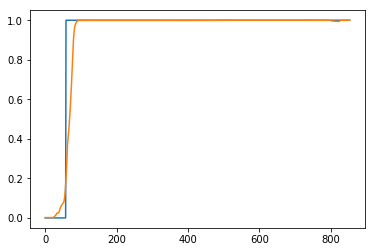

In [22]:
plt.plot(Norm_DB_output_test_DB['KAFWP2_On'])
plt.plot(out_total['KAFWP2_On'])
plt.show()

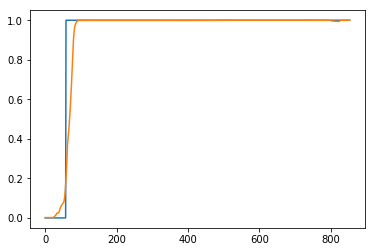

In [23]:
plt.plot(Norm_DB_output_test_DB['KAFWP2_On'])
plt.plot(out_total['KAFWP2_On'])
plt.show()

# 5. (4)과정을 모든 step에서 대하여 자동화 수행
- 각 훈련 스텝별로 확율값의 변화를 확인하기 위해서 수행

Start 0 Step


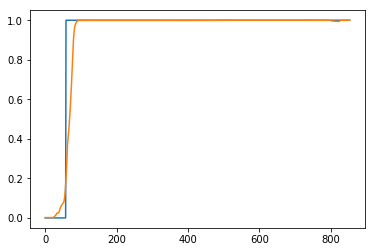

Start 1 Step


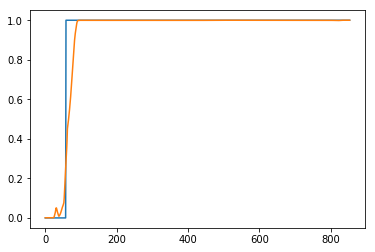

Start 2 Step


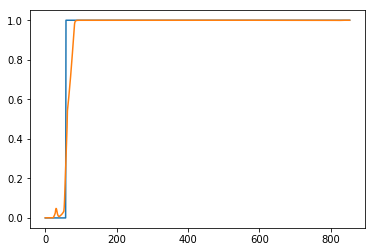

Start 3 Step


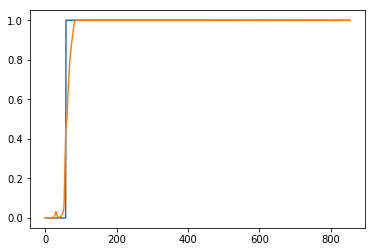

Start 4 Step


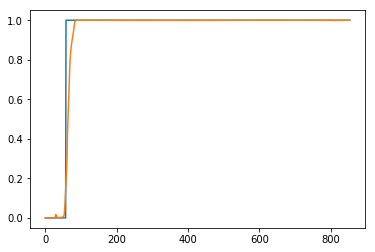

Start 5 Step


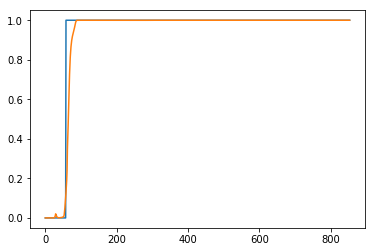

Start 6 Step


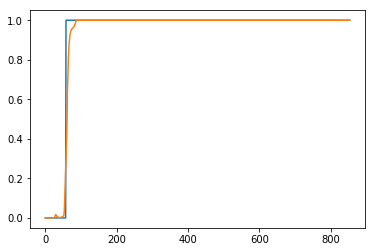

Start 7 Step


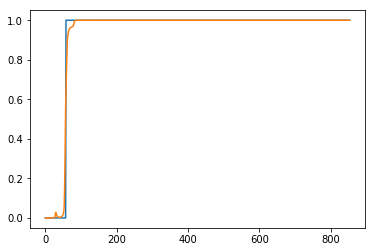

Start 8 Step


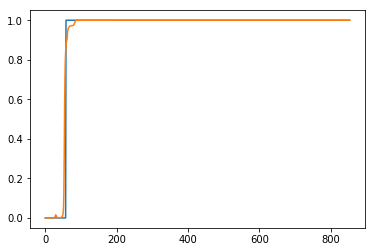

Start 9 Step


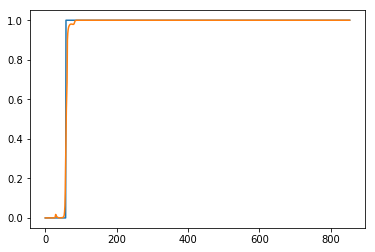

Start 10 Step


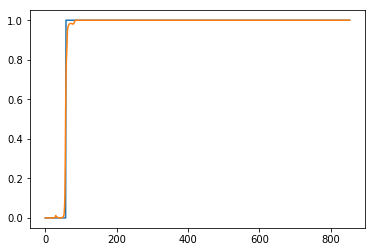

Start 11 Step


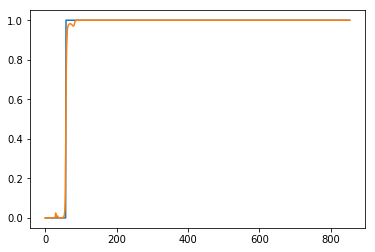

Start 12 Step


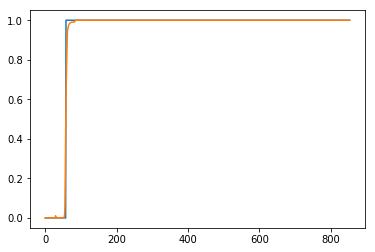

Start 13 Step


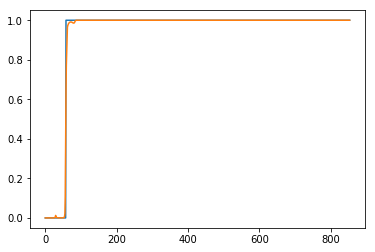

Start 14 Step


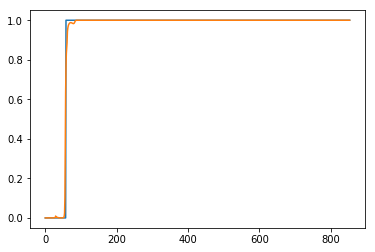

Start 15 Step


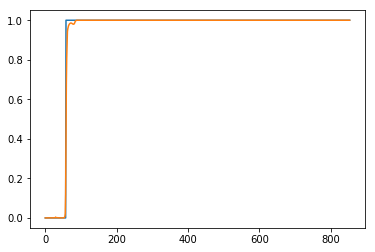

Start 16 Step


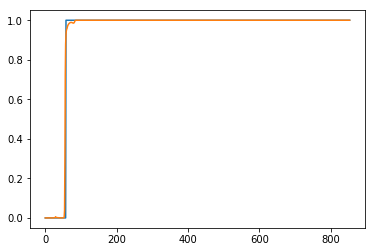

Start 17 Step


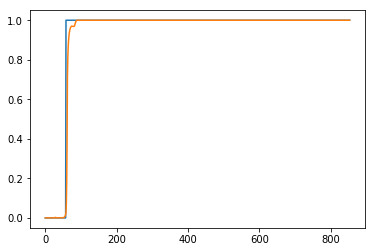

Start 18 Step


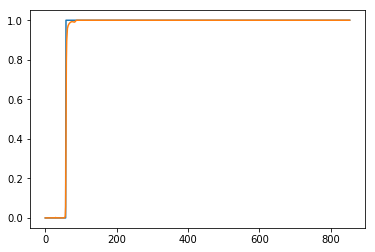

Start 19 Step


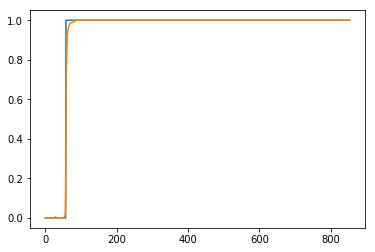

Start 20 Step


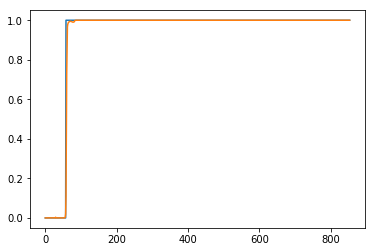

Start 21 Step


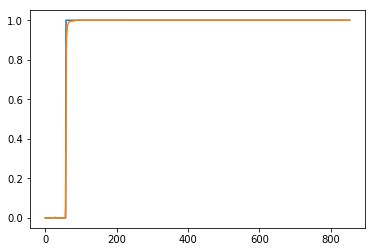

Start 22 Step


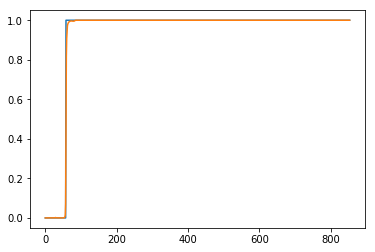

Start 23 Step


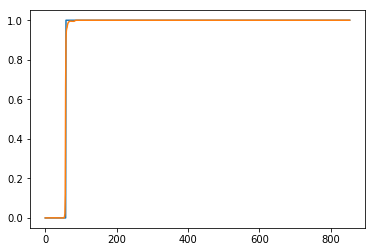

Start 24 Step


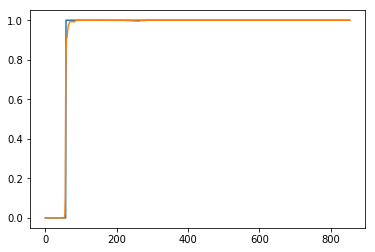

Start 25 Step


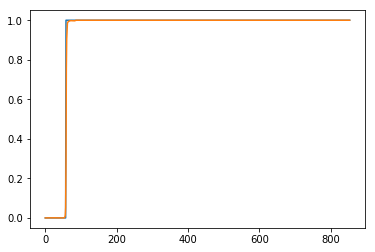

Start 26 Step


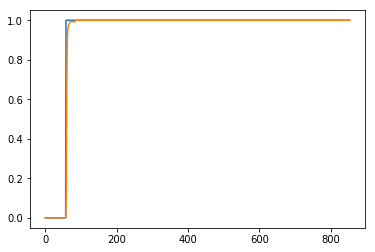

Start 27 Step


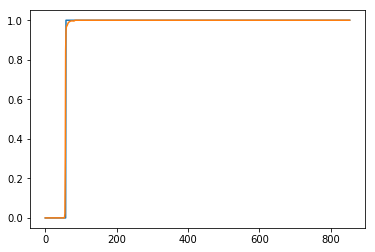

Start 28 Step


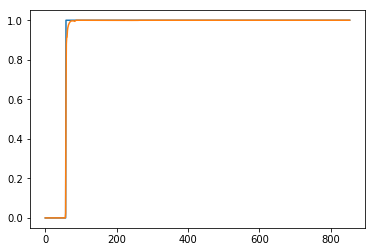

Start 29 Step


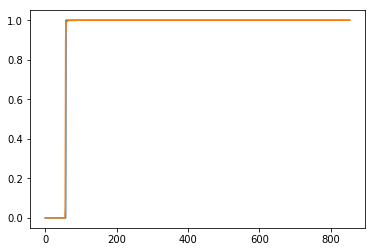

Start 30 Step


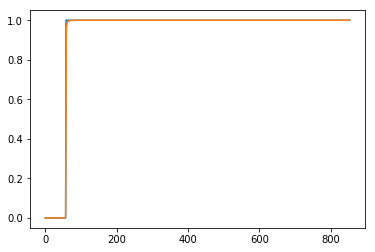

Start 31 Step


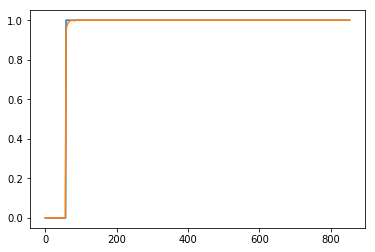

Start 32 Step


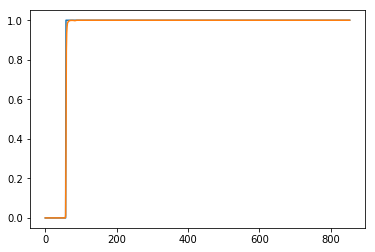

Start 33 Step


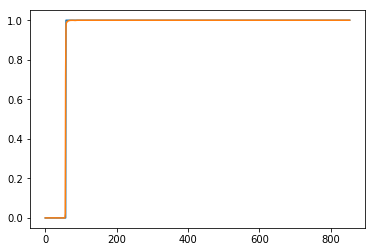

Start 34 Step


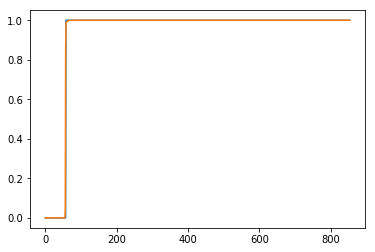

Start 35 Step


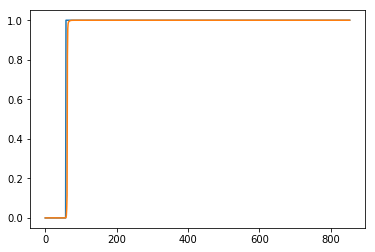

Start 36 Step


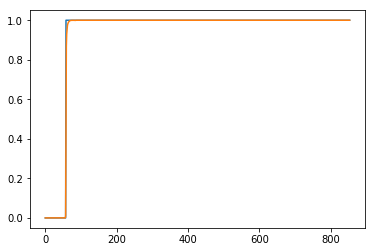

Start 37 Step


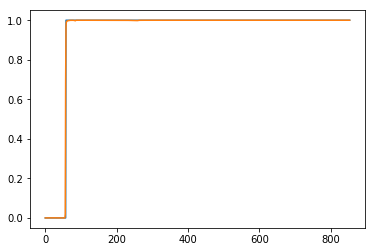

Start 38 Step


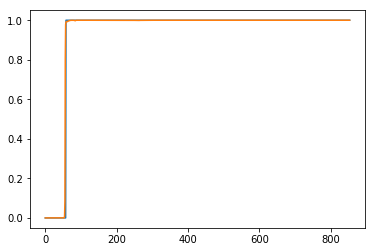

Start 39 Step


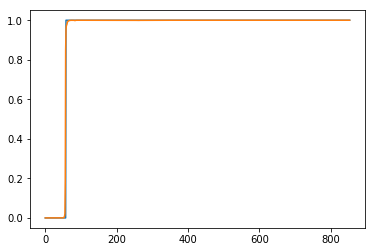

Start 40 Step


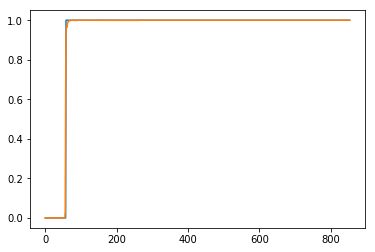

Start 41 Step


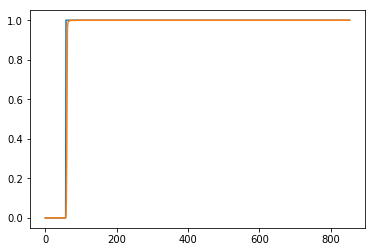

Start 42 Step


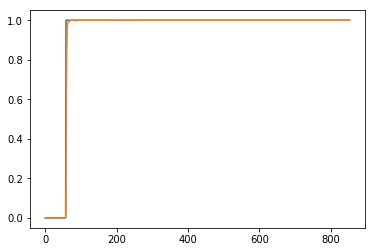

Start 43 Step


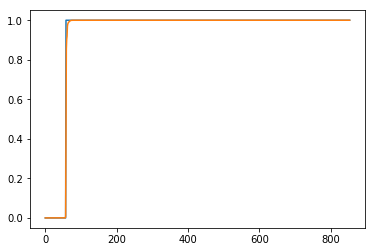

Start 44 Step


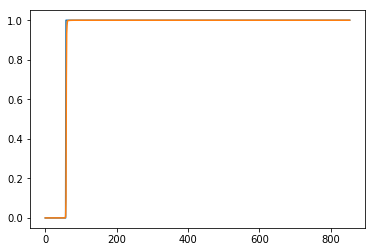

Start 45 Step


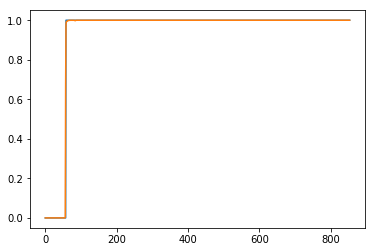

Start 46 Step


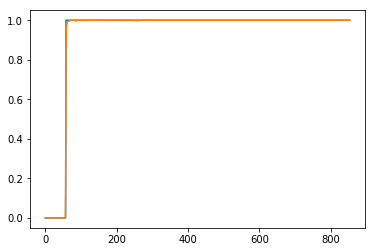

Start 47 Step


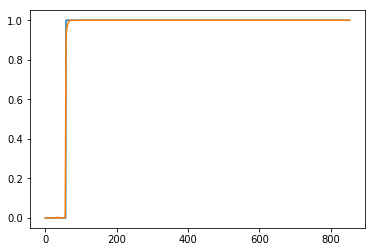

Start 48 Step


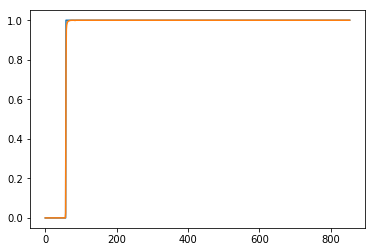

Start 49 Step


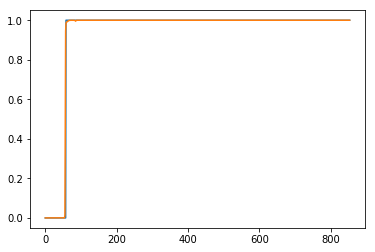

Start 50 Step


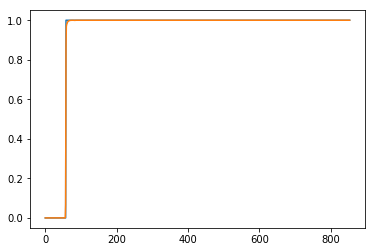

Start 51 Step


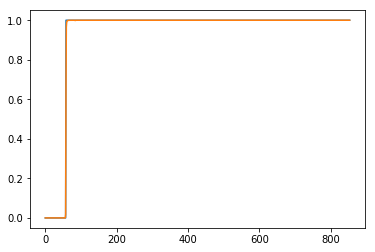

Start 52 Step


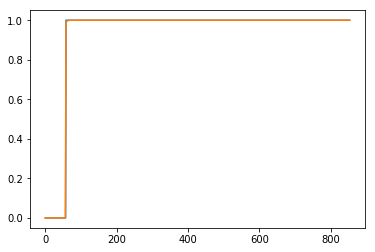

Start 53 Step


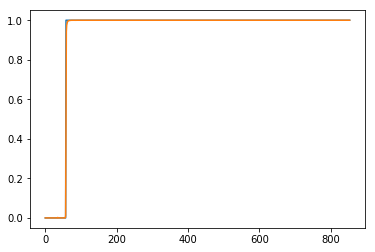

Start 54 Step


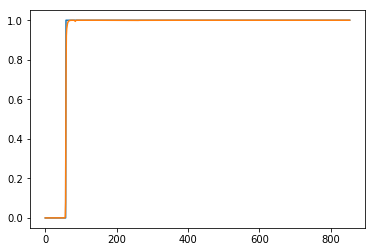

Start 55 Step


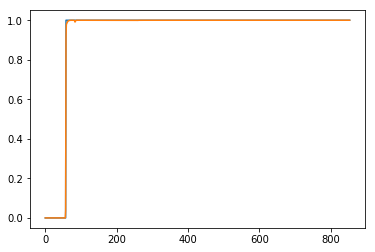

Start 56 Step


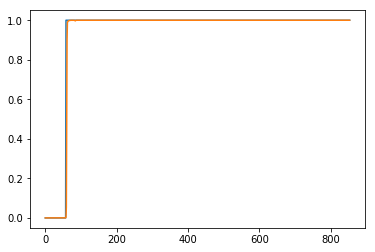

Start 57 Step


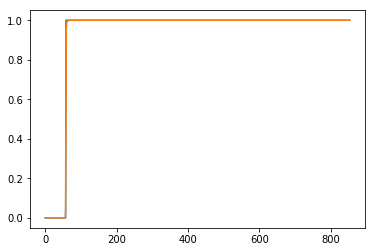

Start 58 Step


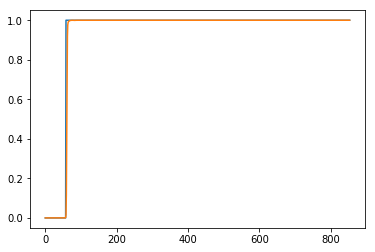

Start 59 Step


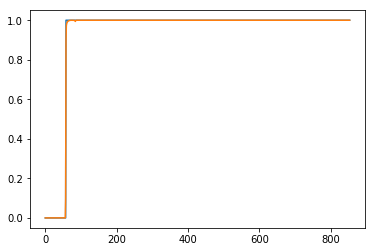

Start 60 Step


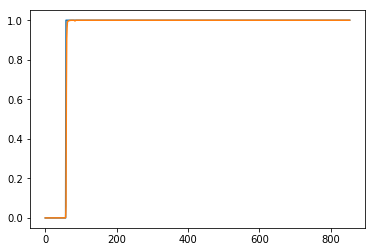

Start 61 Step


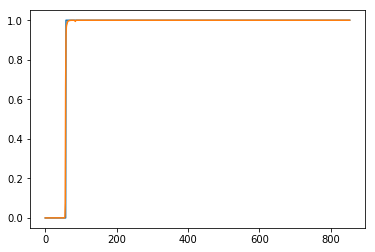

Start 62 Step


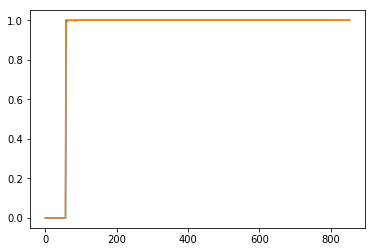

Start 63 Step


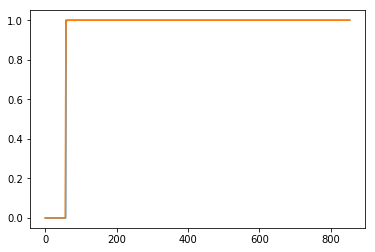

Start 64 Step


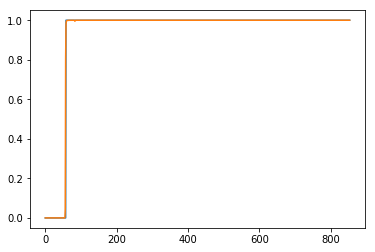

Start 65 Step


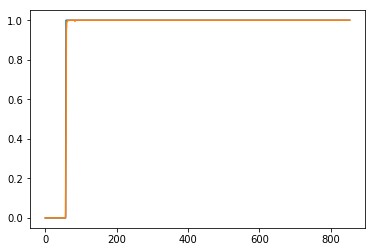

Start 66 Step


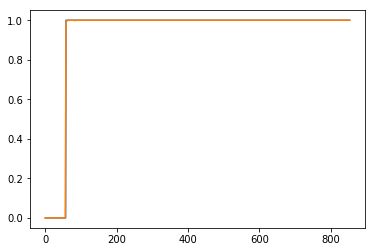

Start 67 Step


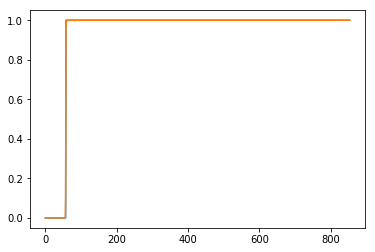

Start 68 Step


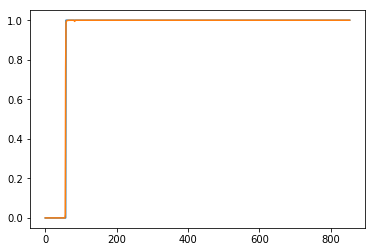

Start 69 Step


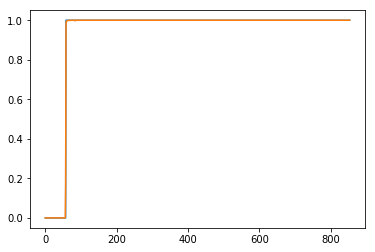

Start 70 Step


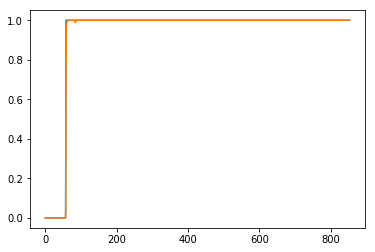

Start 71 Step


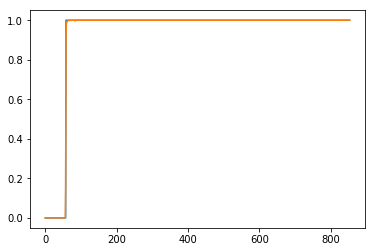

Start 72 Step


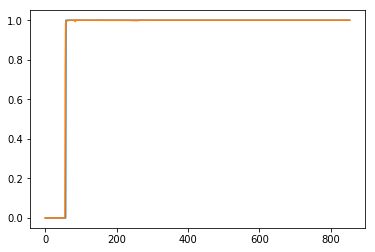

Start 73 Step


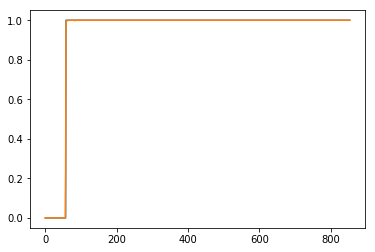

Start 74 Step


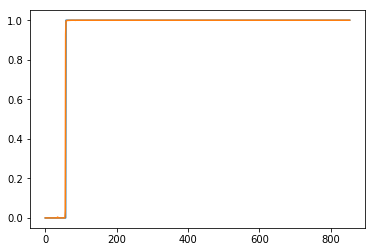

Start 75 Step


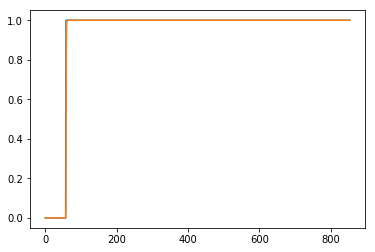

Start 76 Step


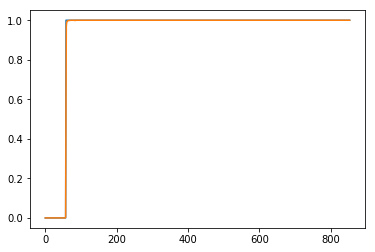

Start 77 Step


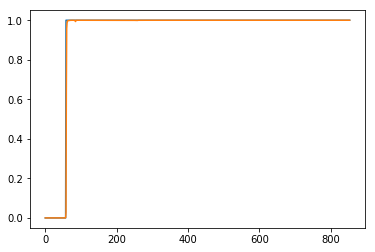

Start 78 Step


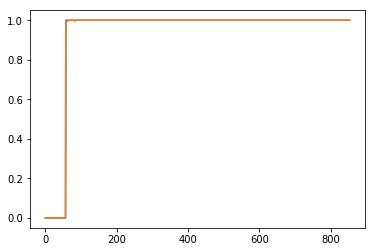

Start 79 Step


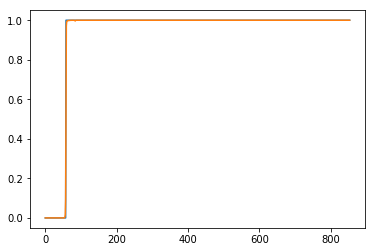

Start 80 Step


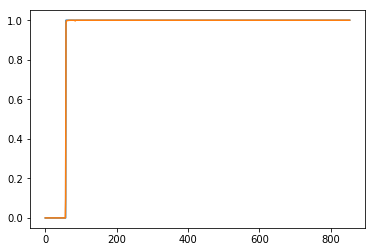

Start 81 Step


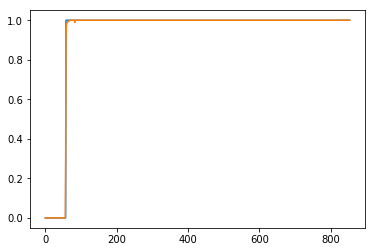

Start 82 Step


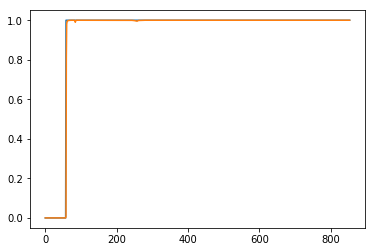

Start 83 Step


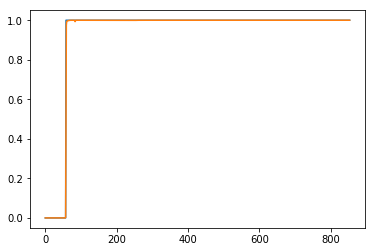

Start 84 Step


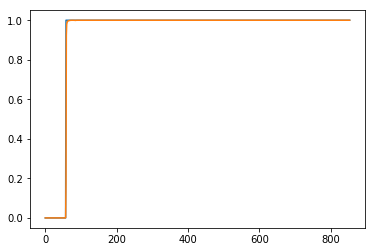

Start 85 Step


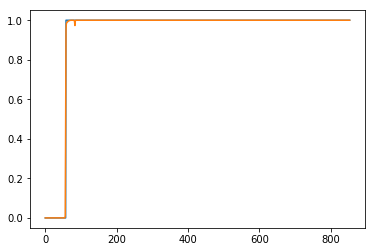

Start 86 Step


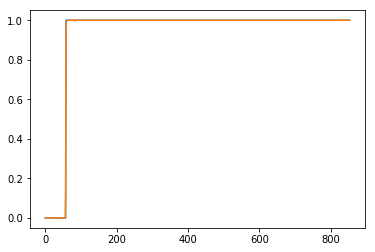

Start 87 Step


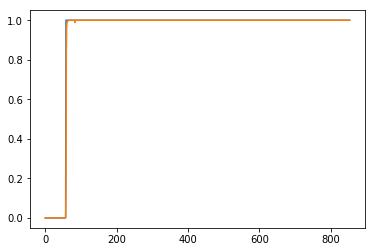

Start 88 Step


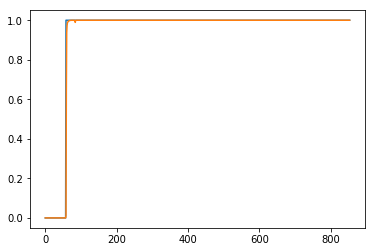

Start 89 Step


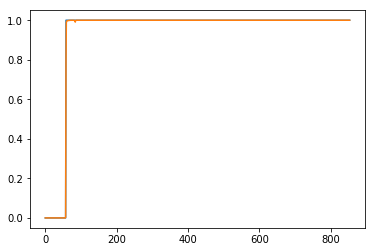

Start 90 Step


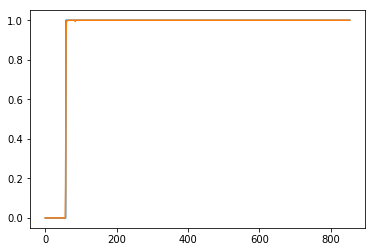

Start 91 Step


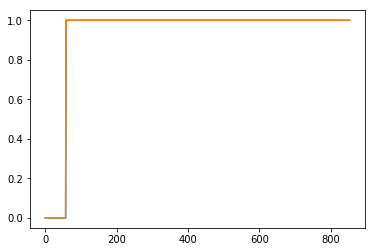

Start 92 Step


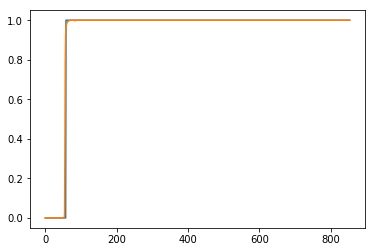

Start 93 Step


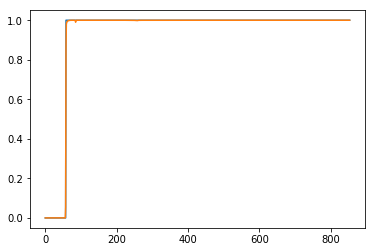

Start 94 Step


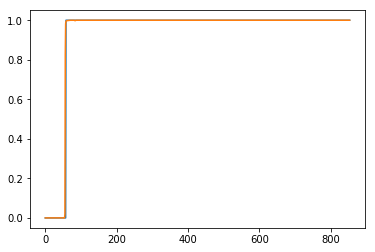

Start 95 Step


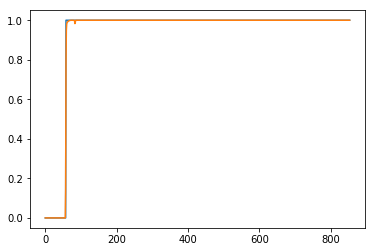

Start 96 Step


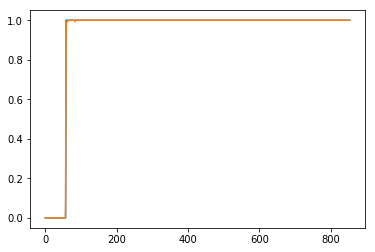

Start 97 Step


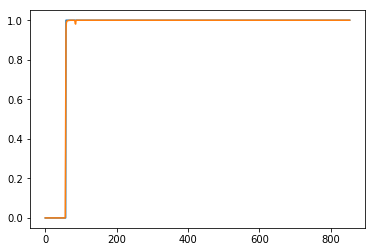

Start 98 Step


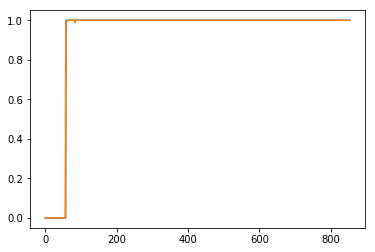

Start 99 Step


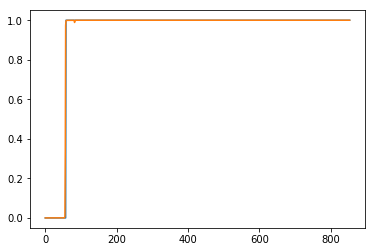

Start 100 Step


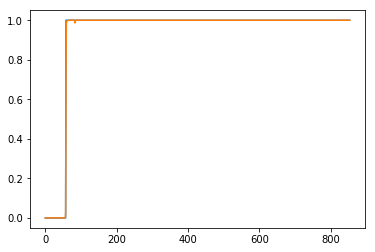

Start 101 Step


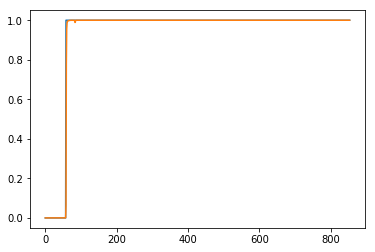

Start 102 Step


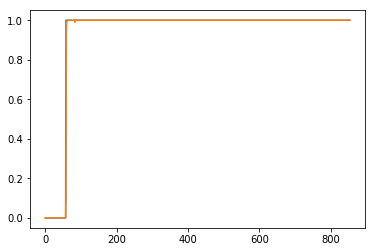

Start 103 Step


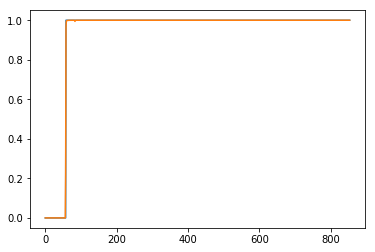

Start 104 Step


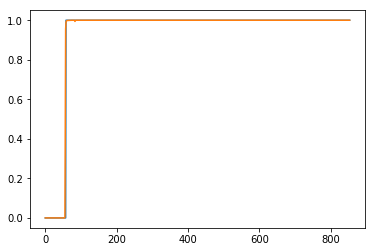

Start 105 Step


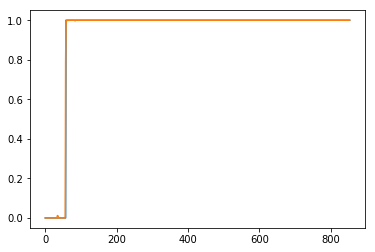

Start 106 Step


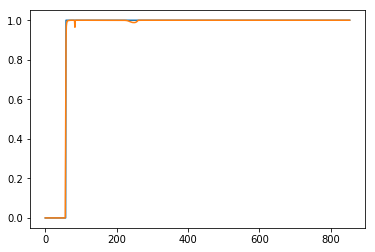

Start 107 Step


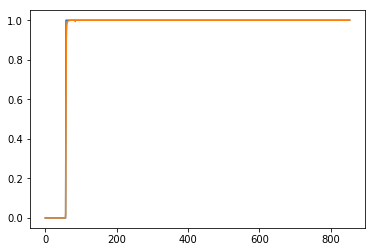

Start 108 Step


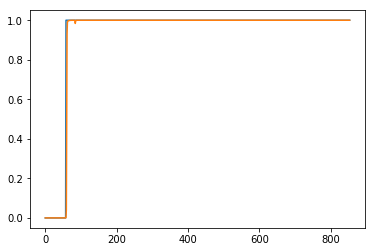

Start 109 Step


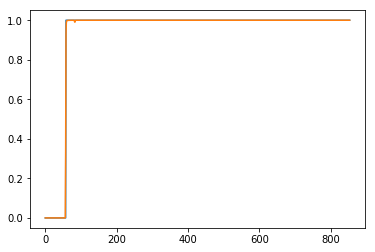

Start 110 Step


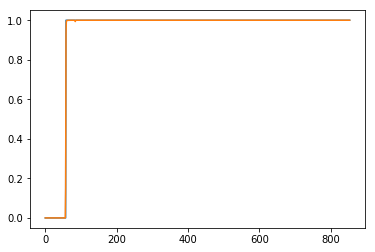

Start 111 Step


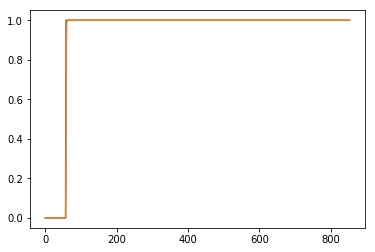

Start 112 Step


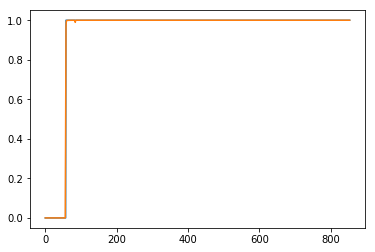

Start 113 Step


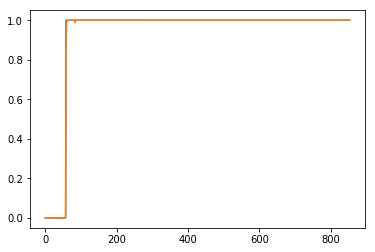

Start 114 Step


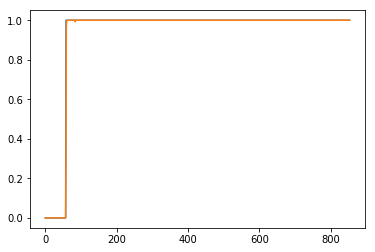

Start 115 Step


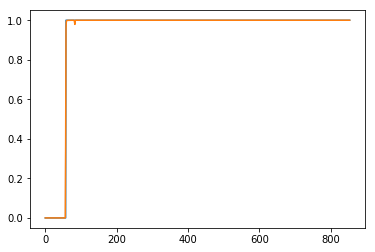

Start 116 Step


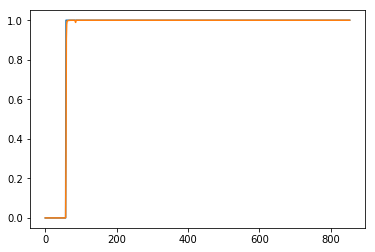

Start 117 Step


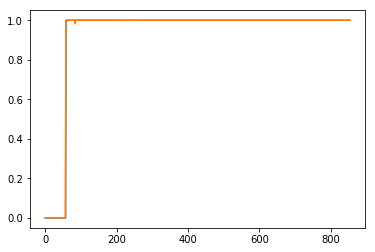

Start 118 Step


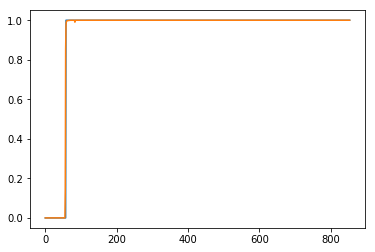

Start 119 Step


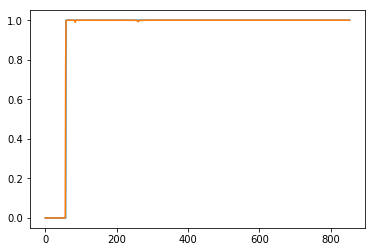

Start 120 Step


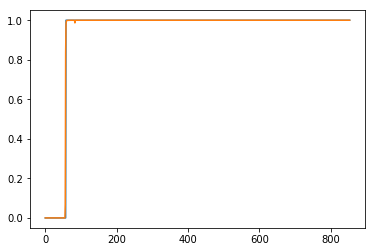

Start 121 Step


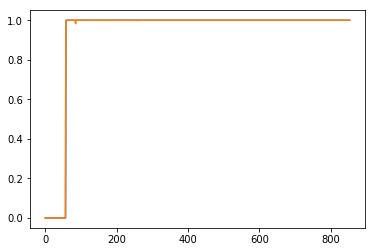

Start 122 Step


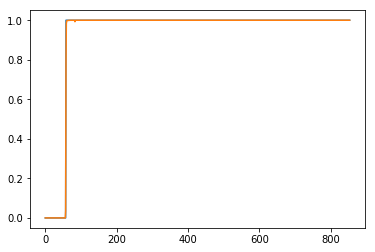

Start 123 Step


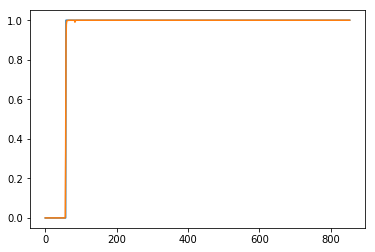

Start 124 Step


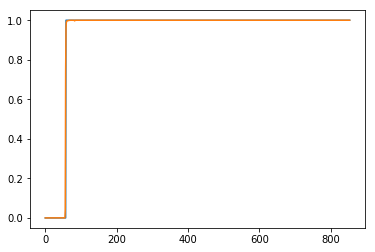

Start 125 Step


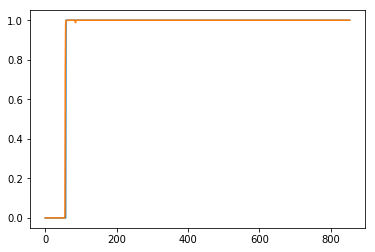

Start 126 Step


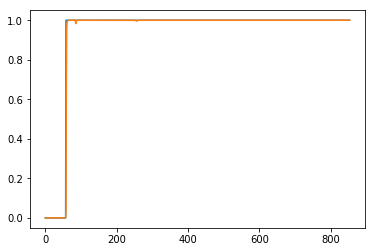

Start 127 Step


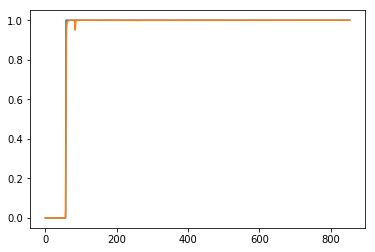

Start 128 Step


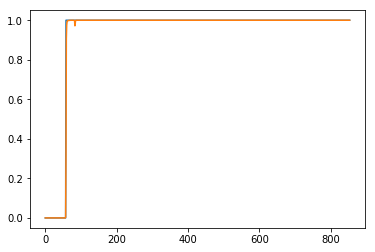

Start 129 Step


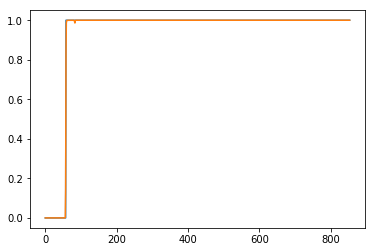

Start 130 Step


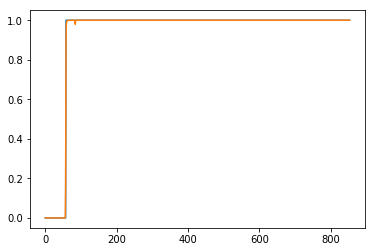

Start 131 Step


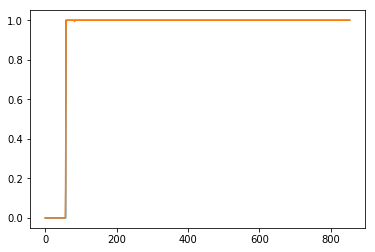

Start 132 Step


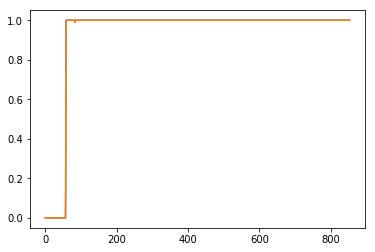

Start 133 Step


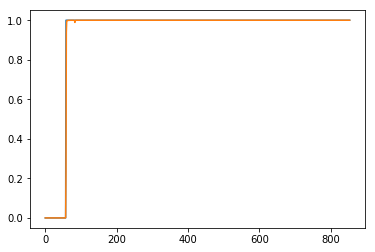

Start 134 Step


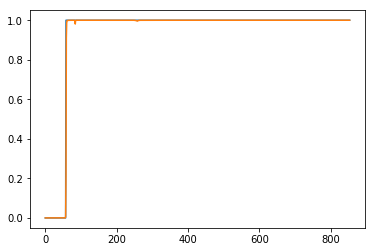

Start 135 Step


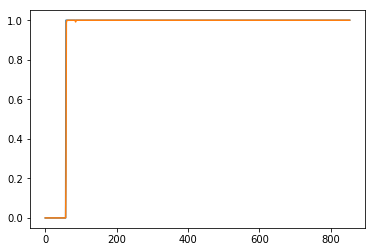

Start 136 Step


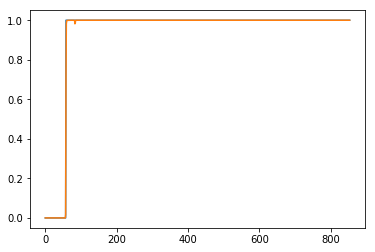

Start 137 Step


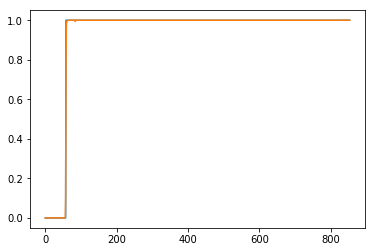

Start 138 Step


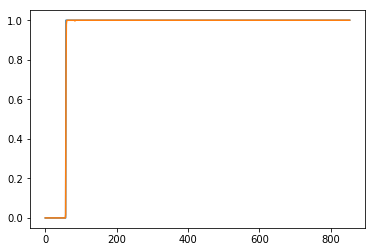

Start 139 Step


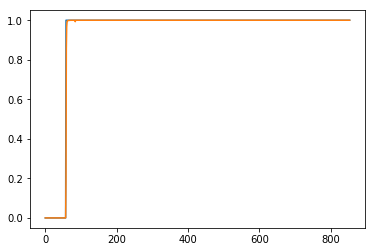

Start 140 Step


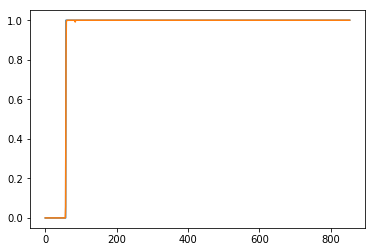

Start 141 Step


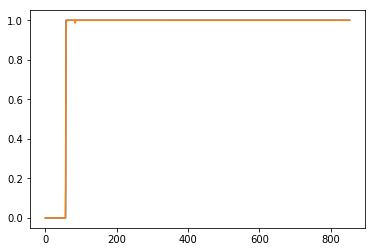

Start 142 Step


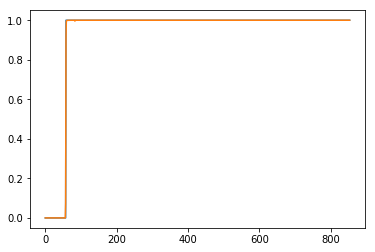

Start 143 Step


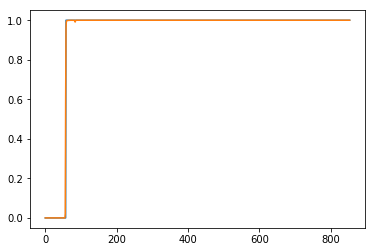

Start 144 Step


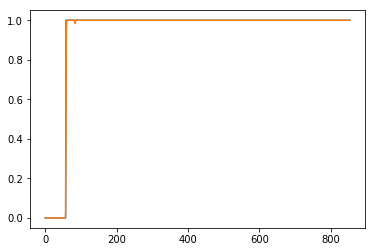

Start 145 Step


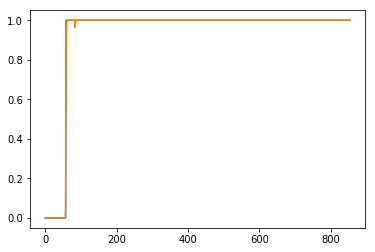

Start 146 Step


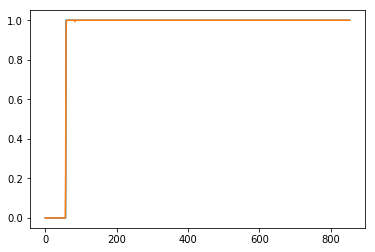

Start 147 Step


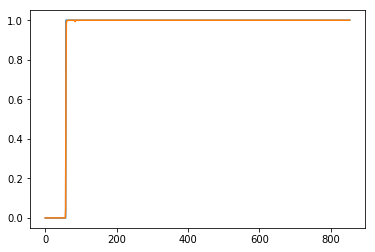

Start 148 Step


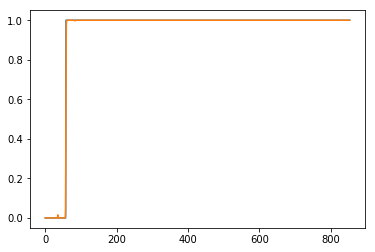

Start 149 Step


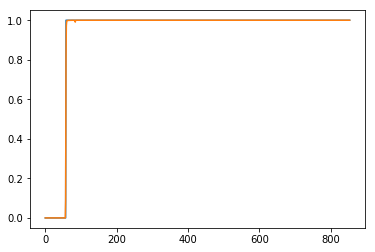

Start 150 Step


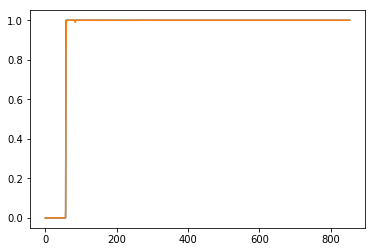

Start 151 Step


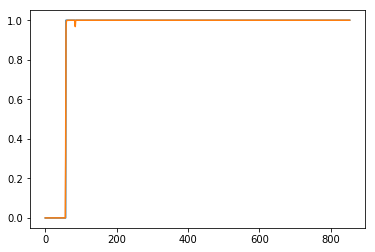

Start 152 Step


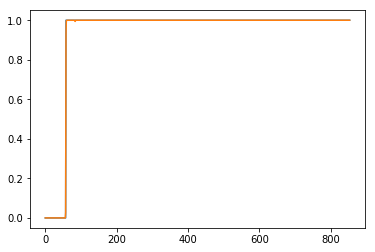

Start 153 Step


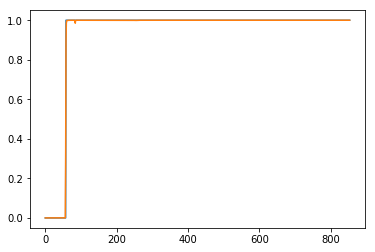

Start 154 Step


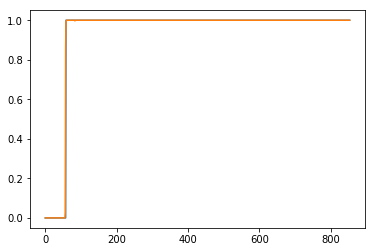

Start 155 Step


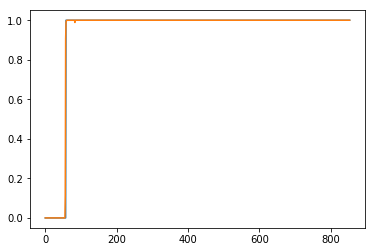

Start 156 Step


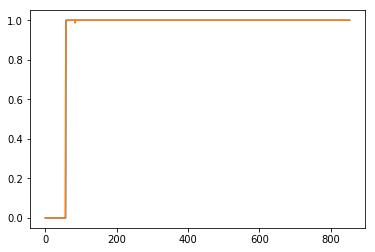

Start 157 Step


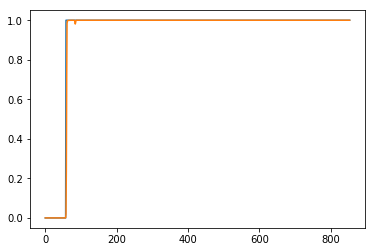

Start 158 Step


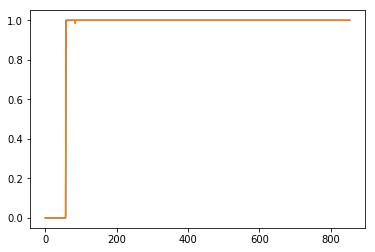

Start 159 Step


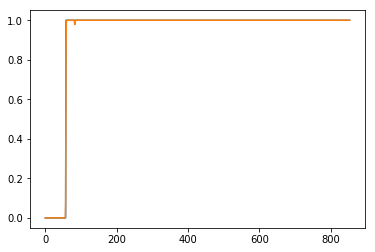

Start 160 Step


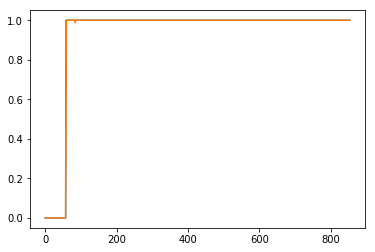

Start 161 Step


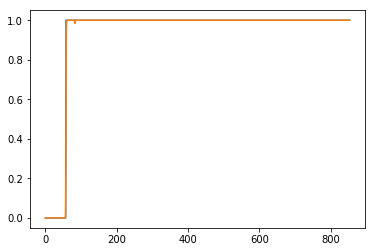

Start 162 Step


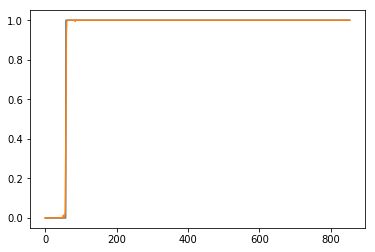

Start 163 Step


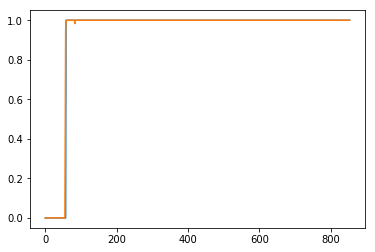

Start 164 Step


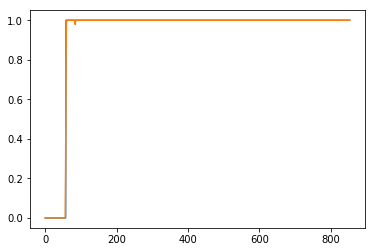

Start 165 Step


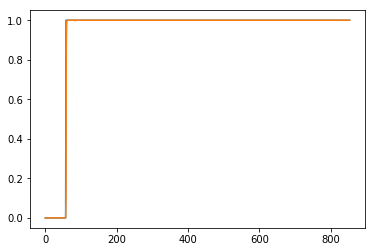

Start 166 Step


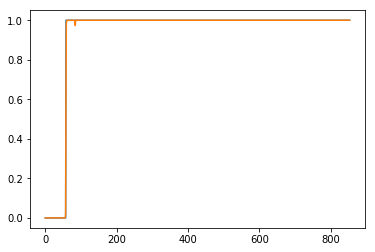

Start 167 Step


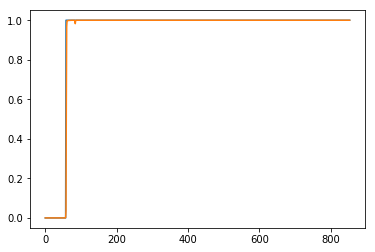

Start 168 Step


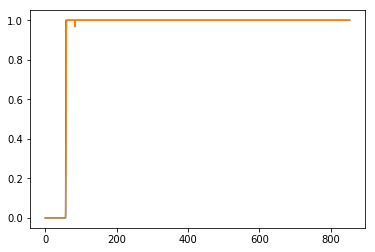

Start 169 Step


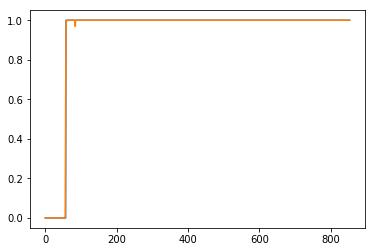

Start 170 Step


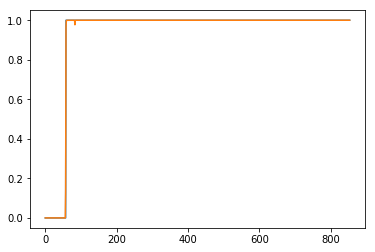

Start 171 Step


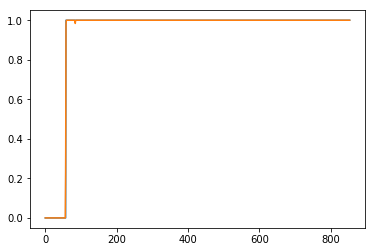

Start 172 Step


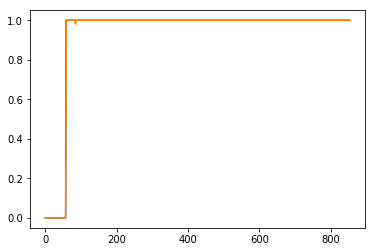

Start 173 Step


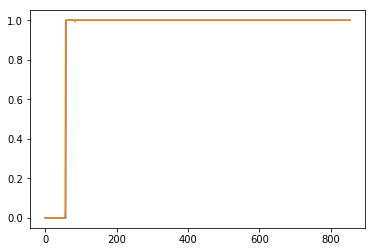

Start 174 Step


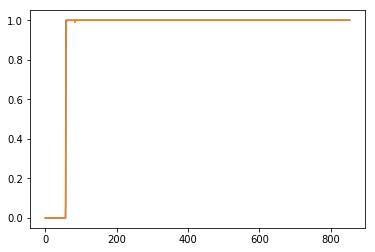

Start 175 Step


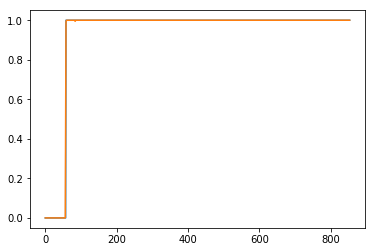

Start 176 Step


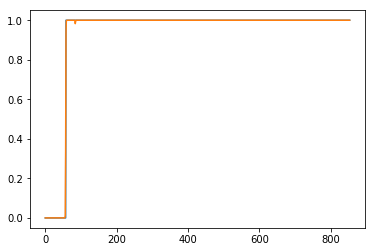

Start 177 Step


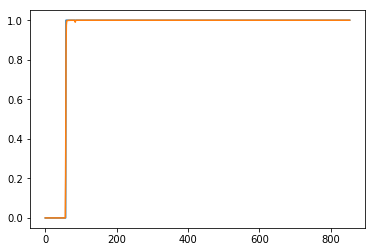

Start 178 Step


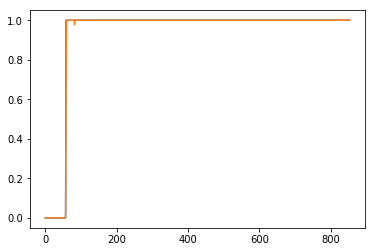

Start 179 Step


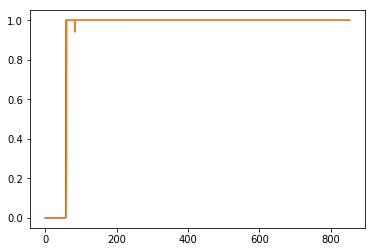

Start 180 Step


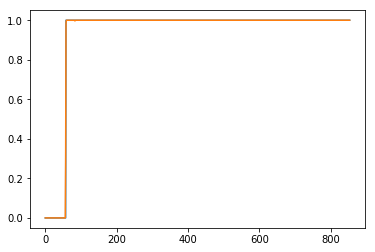

Start 181 Step


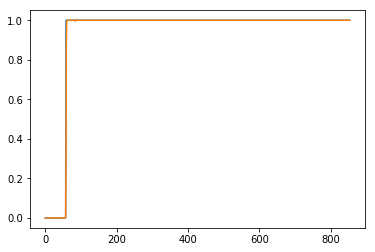

Start 182 Step


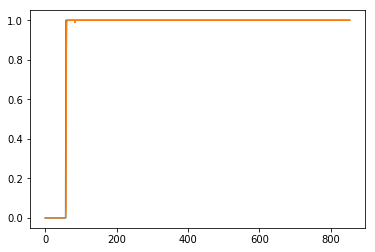

Start 183 Step


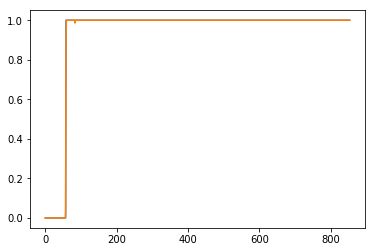

Start 184 Step


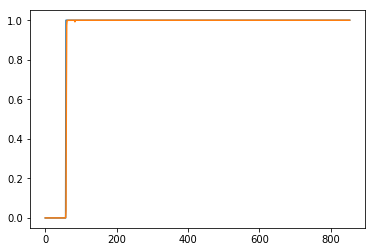

Start 185 Step


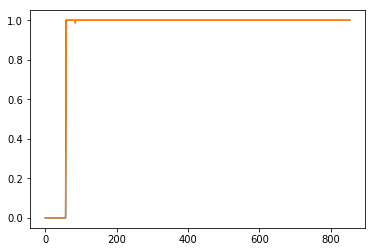

Start 186 Step


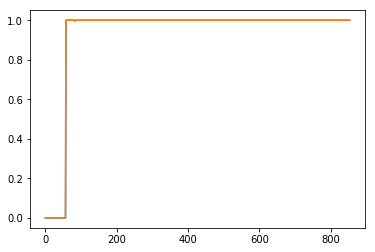

Start 187 Step


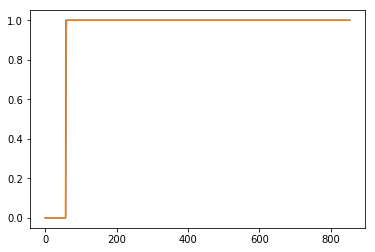

Start 188 Step


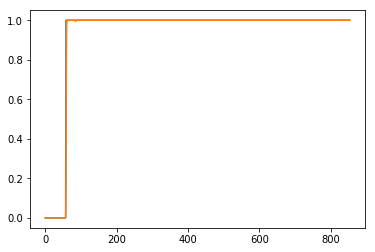

Start 189 Step


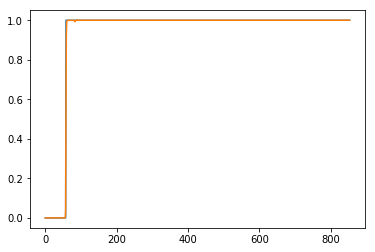

Start 190 Step


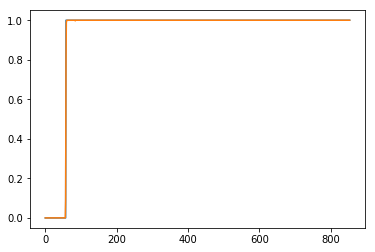

Start 191 Step


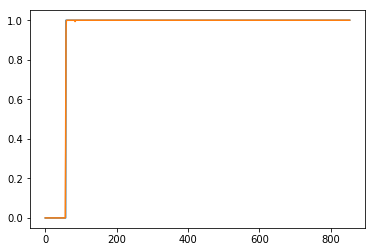

Start 192 Step


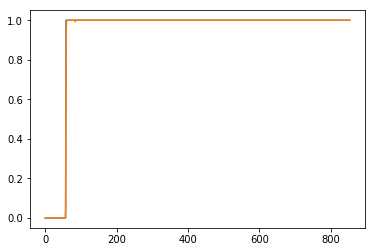

Start 193 Step


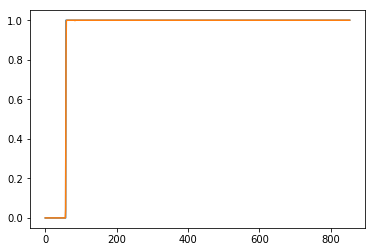

Start 194 Step


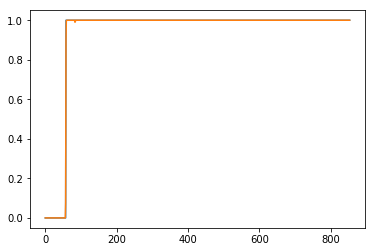

Start 195 Step


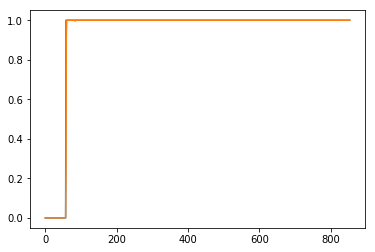

Start 196 Step


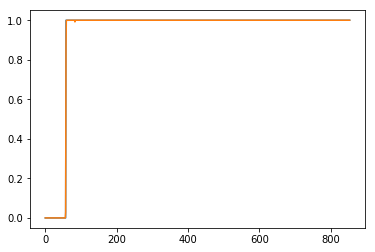

Start 197 Step


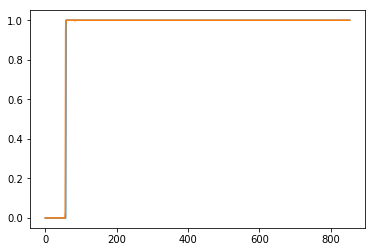

Start 198 Step


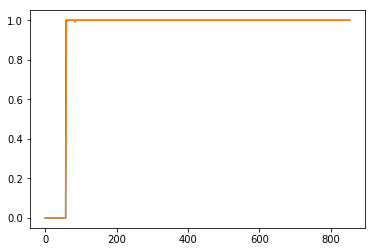

Start 199 Step


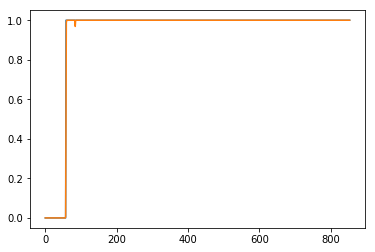

Start 200 Step


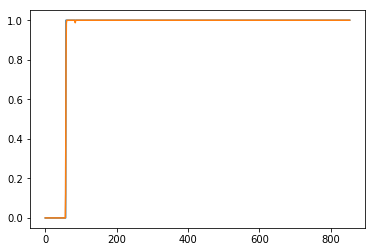

Start 201 Step


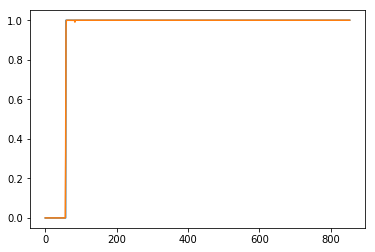

Start 202 Step


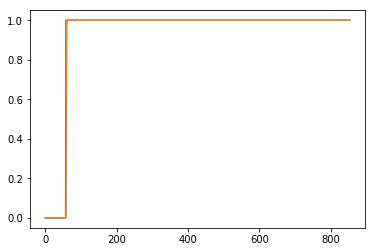

Start 203 Step


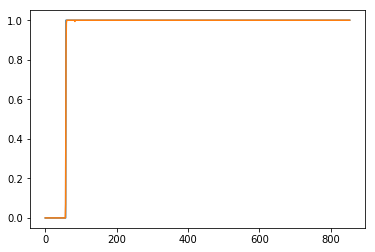

Start 204 Step


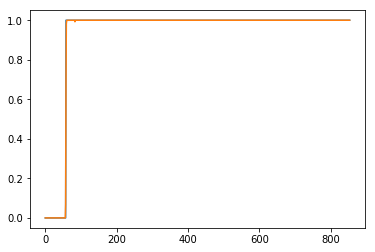

Start 205 Step


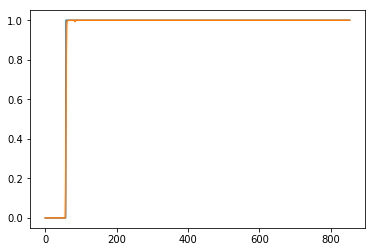

Start 206 Step


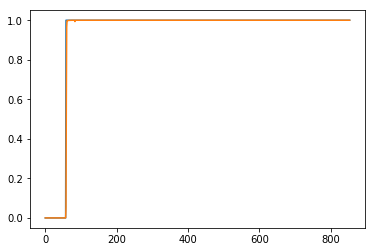

Start 207 Step


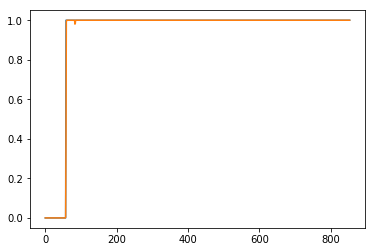

Start 208 Step


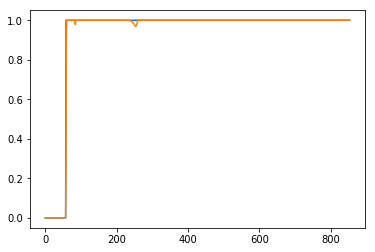

Start 209 Step


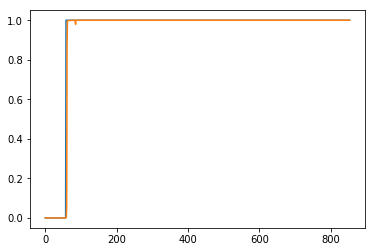

Start 210 Step


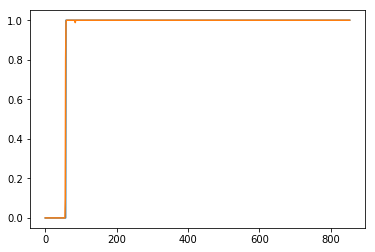

Start 211 Step


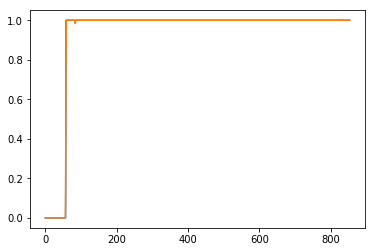

Start 212 Step


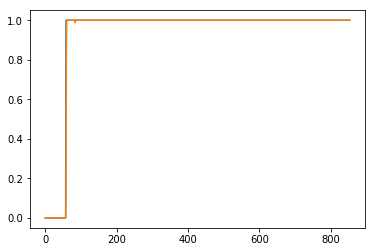

Start 213 Step


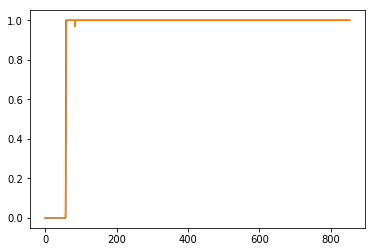

Start 214 Step


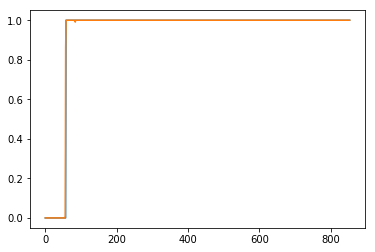

Start 215 Step


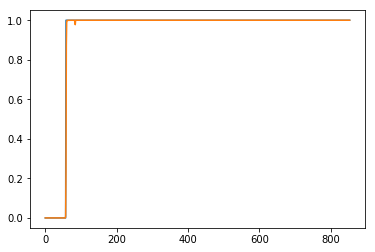

Start 216 Step


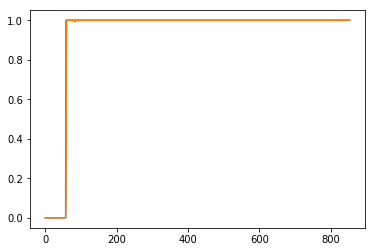

Start 217 Step


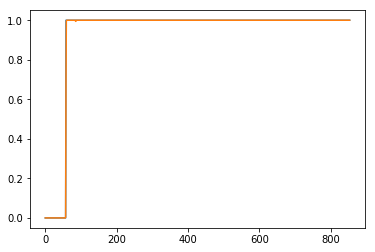

Start 218 Step


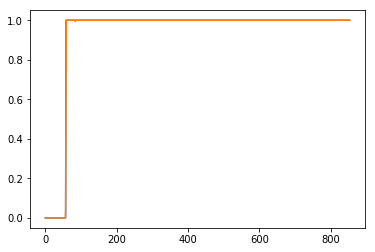

Start 219 Step


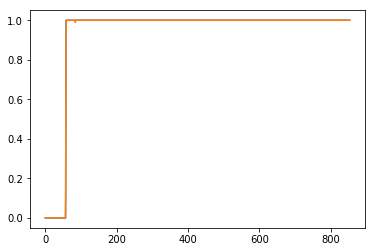

Start 220 Step


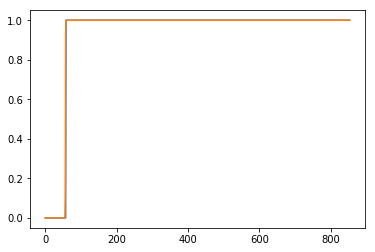

Start 221 Step


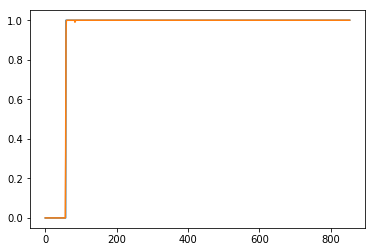

Start 222 Step


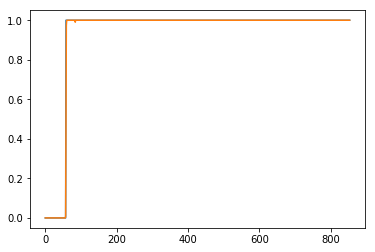

Start 223 Step


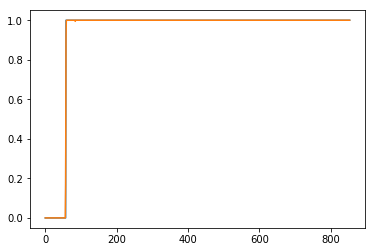

Start 224 Step


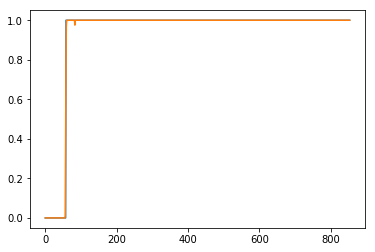

Start 225 Step


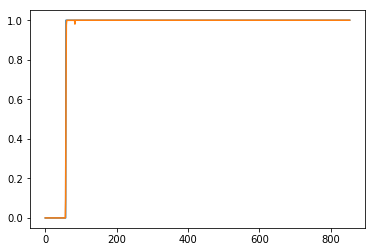

Start 226 Step


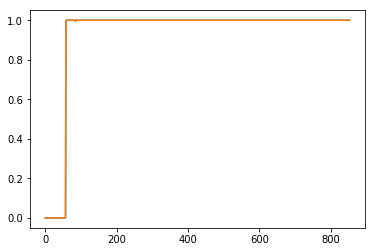

Start 227 Step


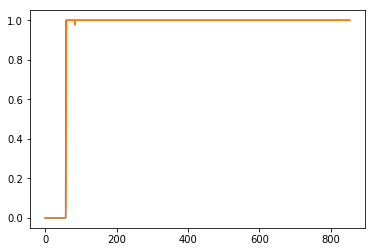

Start 228 Step


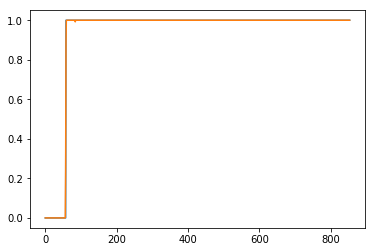

Start 229 Step


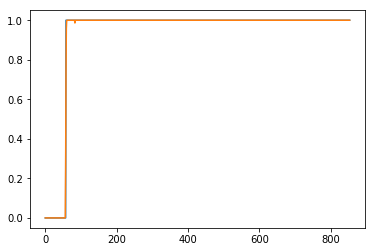

Start 230 Step


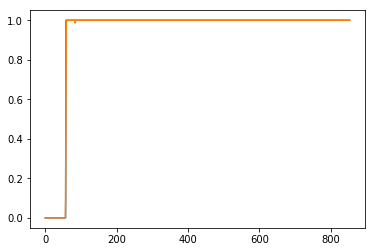

Start 231 Step


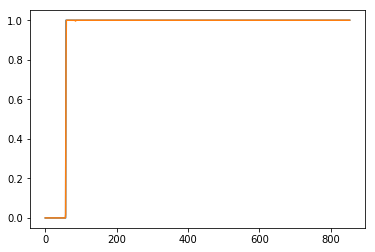

Start 232 Step


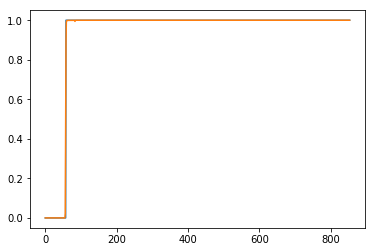

Start 233 Step


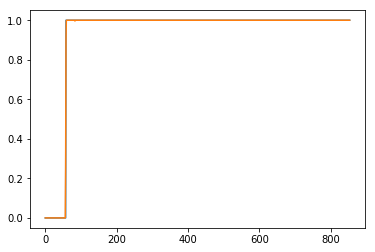

Start 234 Step


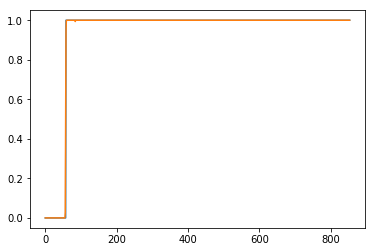

Start 235 Step


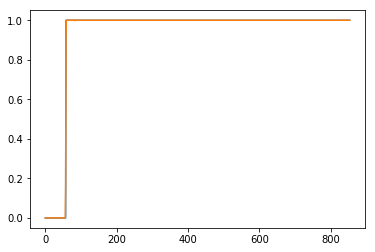

Start 236 Step


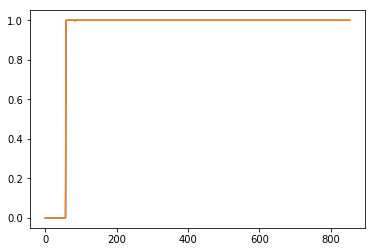

Start 237 Step


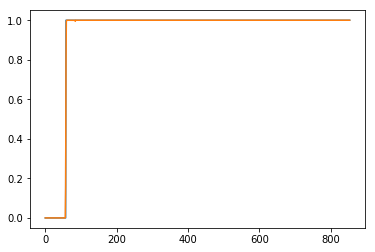

Start 238 Step


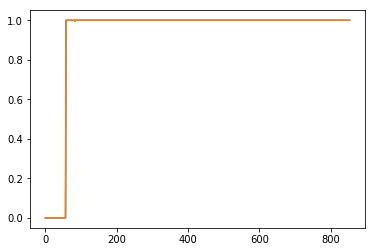

Start 239 Step


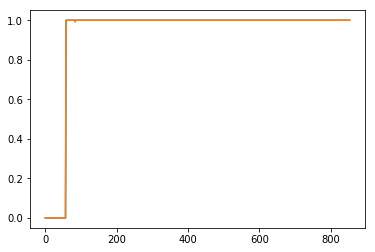

Start 240 Step


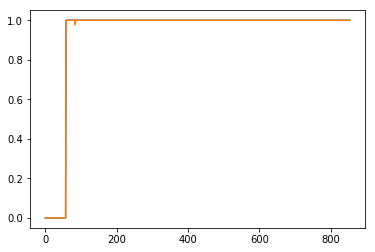

Start 241 Step


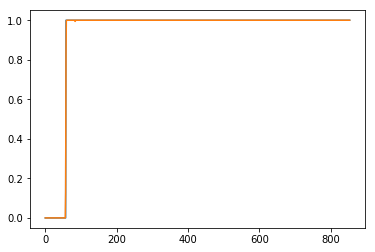

Start 242 Step


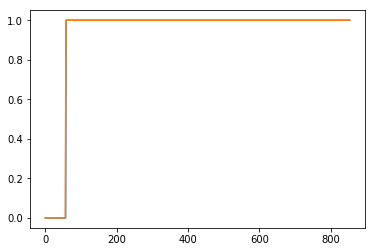

Start 243 Step


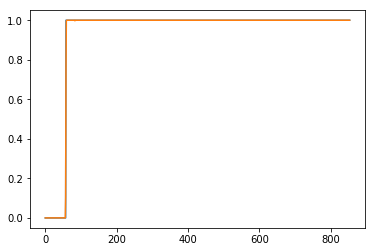

Start 244 Step


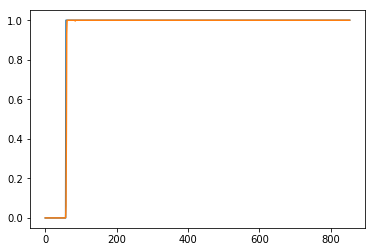

Start 245 Step


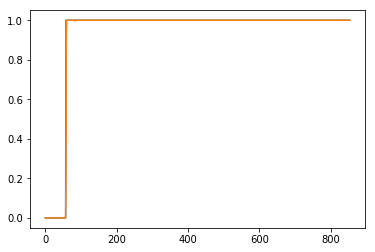

Start 246 Step


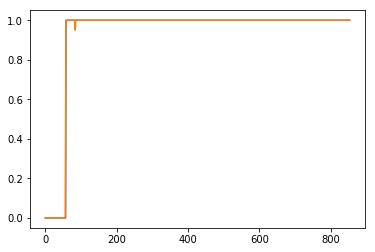

Start 247 Step


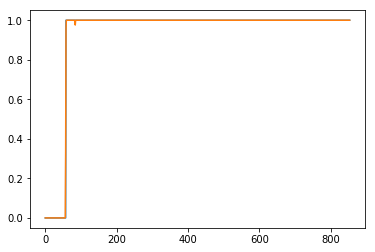

Start 248 Step


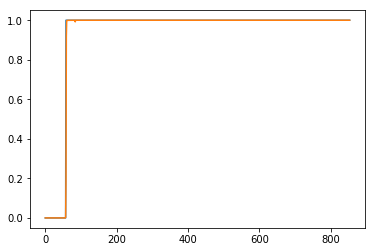

Start 249 Step


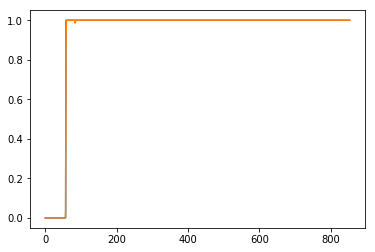

Start 250 Step


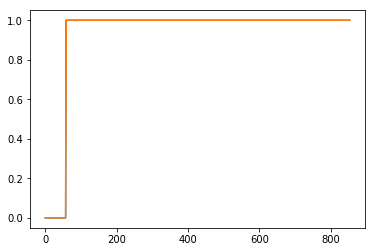

Start 251 Step


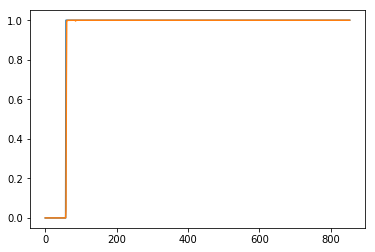

Start 252 Step


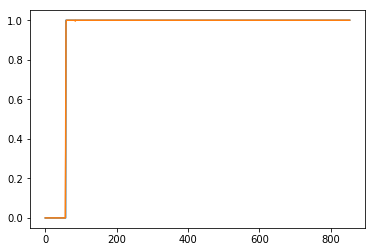

Start 253 Step


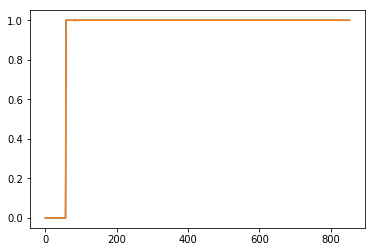

Start 254 Step


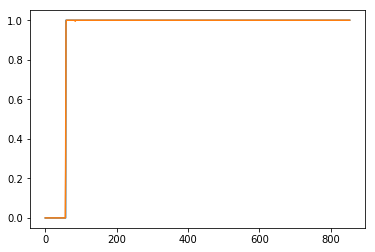

Start 255 Step


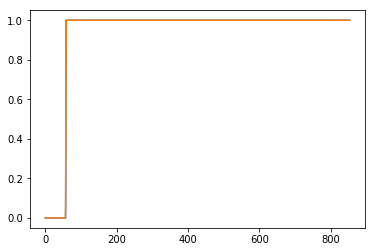

Start 256 Step


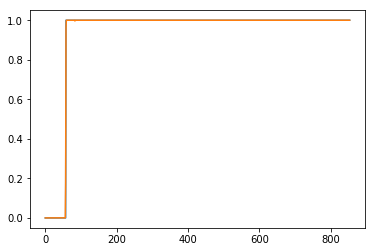

Start 257 Step


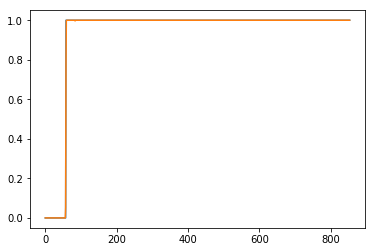

Start 258 Step


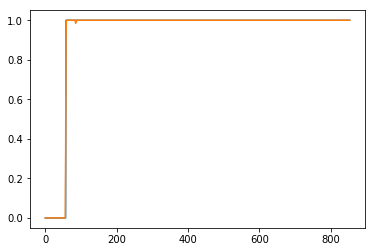

Start 259 Step


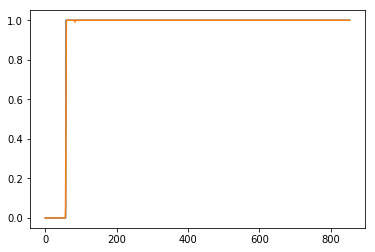

Start 260 Step


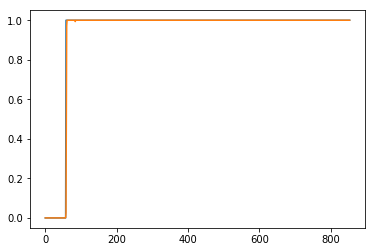

Start 261 Step


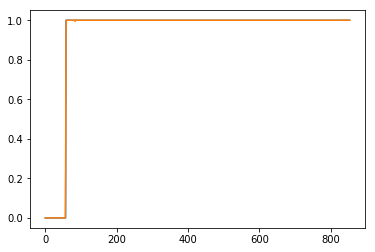

Start 262 Step


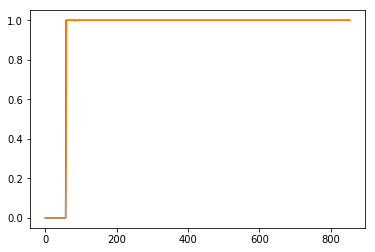

Start 263 Step


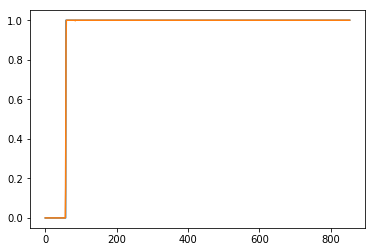

Start 264 Step


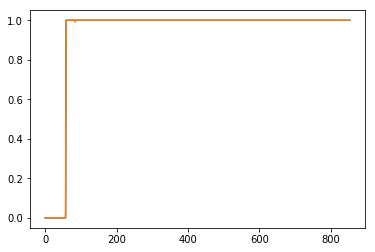

Start 265 Step


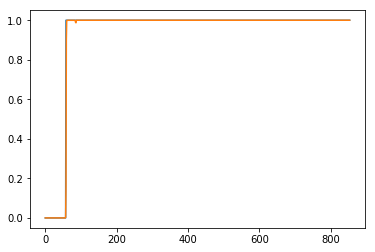

Start 266 Step


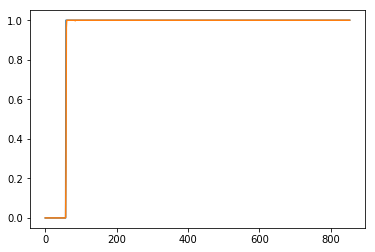

Start 267 Step


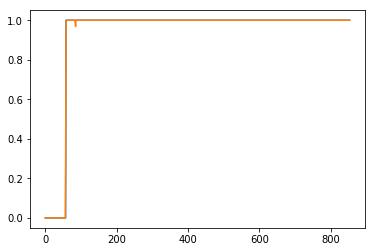

Start 268 Step


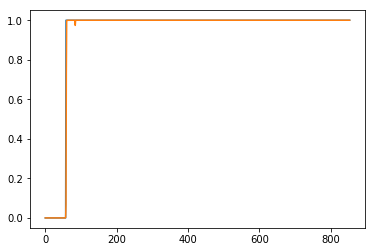

Start 269 Step


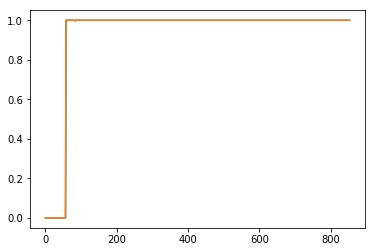

Start 270 Step


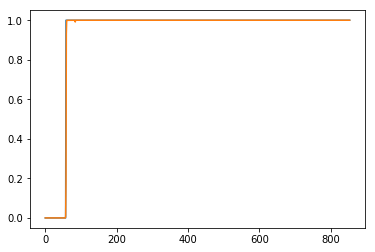

Start 271 Step


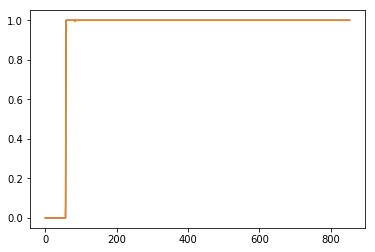

Start 272 Step


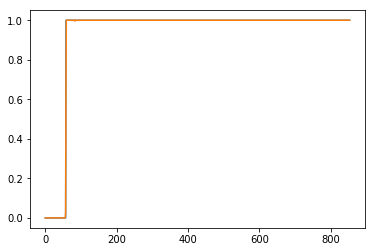

Start 273 Step


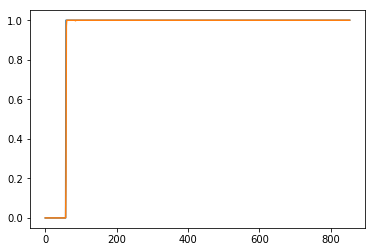

Start 274 Step


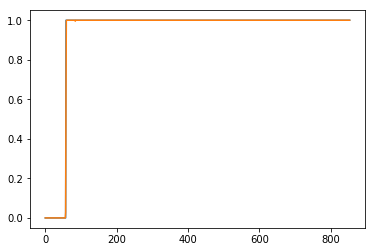

Start 275 Step


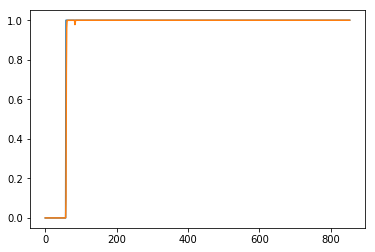

Start 276 Step


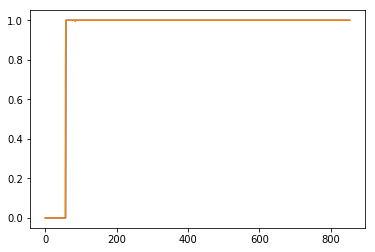

Start 277 Step


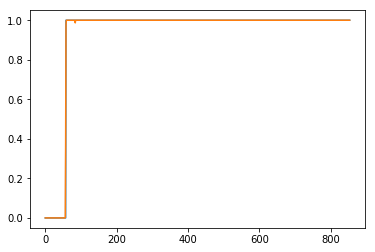

Start 278 Step


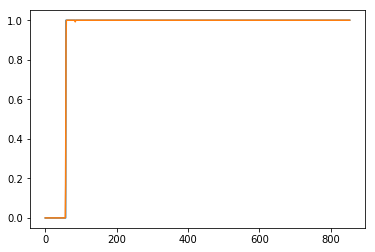

Start 279 Step


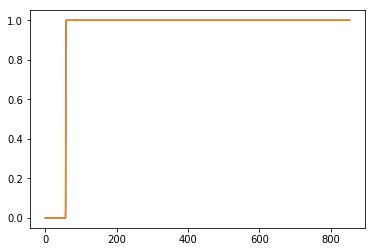

Start 280 Step


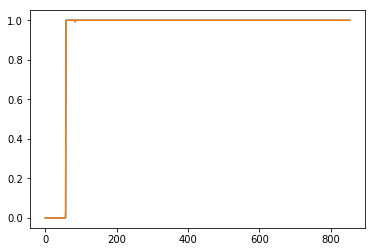

Start 281 Step


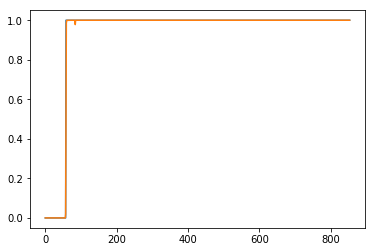

Start 282 Step


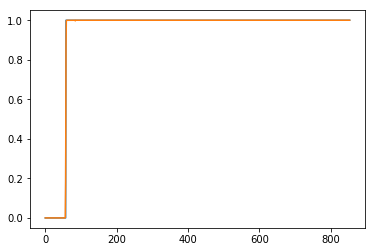

Start 283 Step


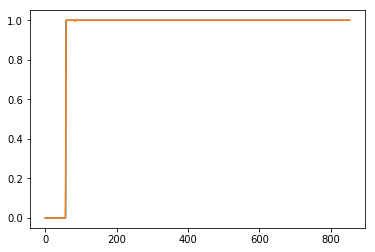

Start 284 Step


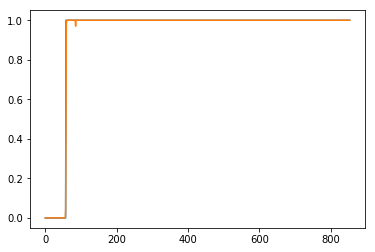

Start 285 Step


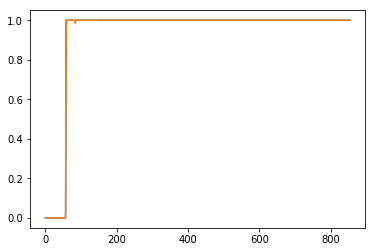

Start 286 Step


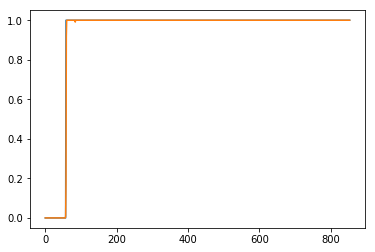

Start 287 Step


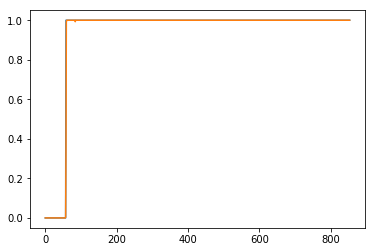

Start 288 Step


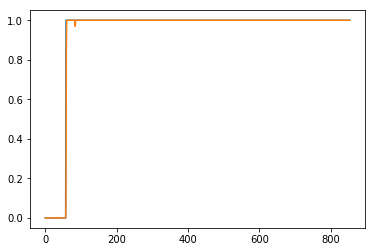

Start 289 Step


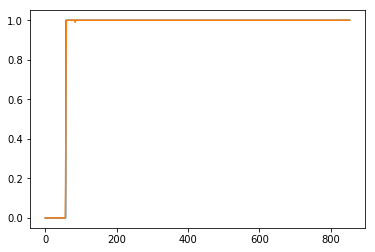

Start 290 Step


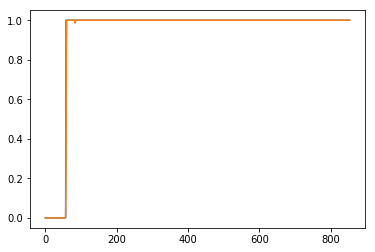

Start 291 Step


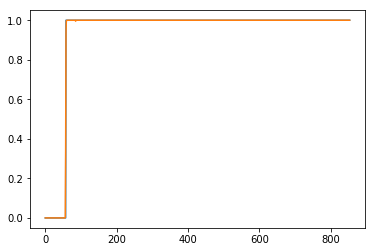

Start 292 Step


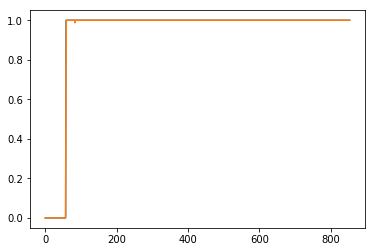

Start 293 Step


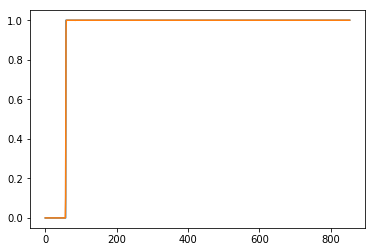

Start 294 Step


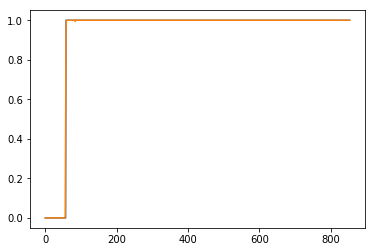

Start 295 Step


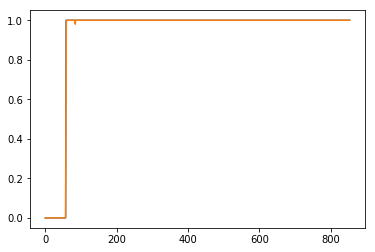

Start 296 Step


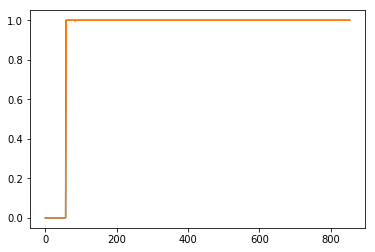

Start 297 Step


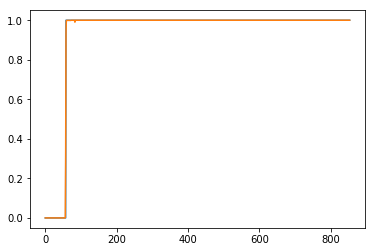

Start 298 Step


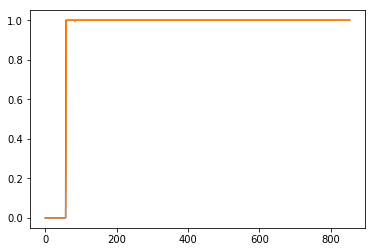

Start 299 Step


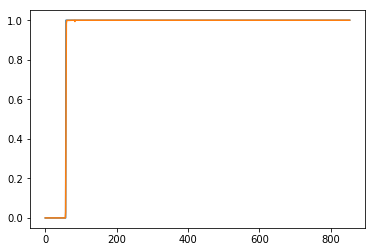

Start 300 Step


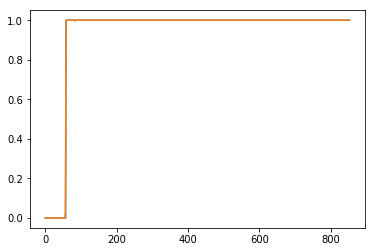

Start 301 Step


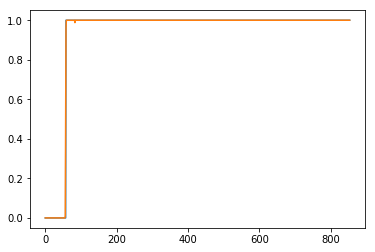

Start 302 Step


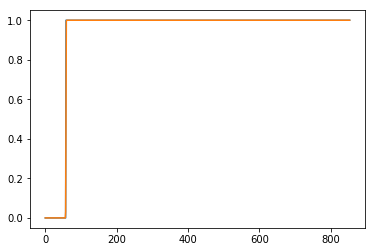

Start 303 Step


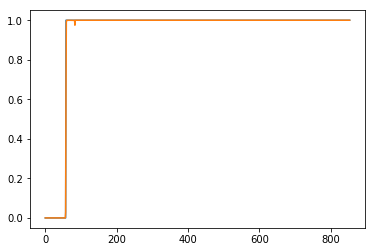

Start 304 Step


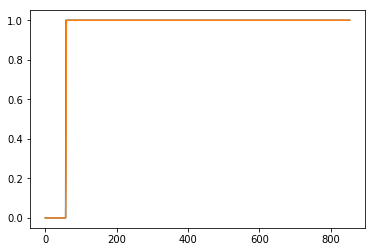

Start 305 Step


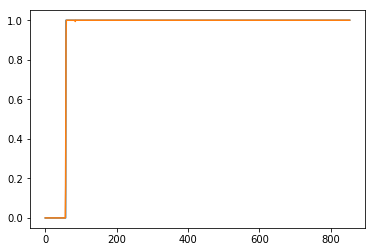

Start 306 Step


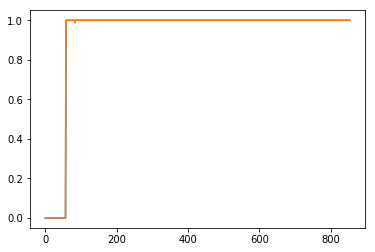

Start 307 Step


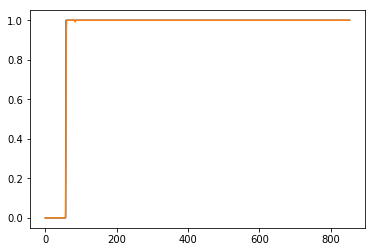

Start 308 Step


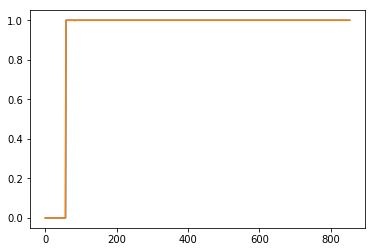

Start 309 Step


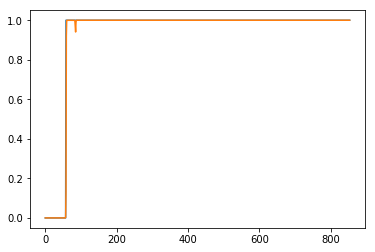

Start 310 Step


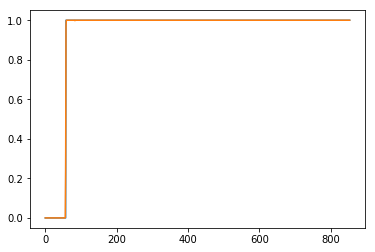

Start 311 Step


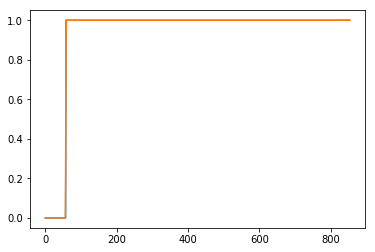

Start 312 Step


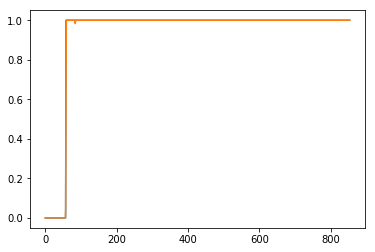

Start 313 Step


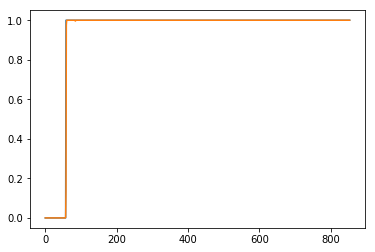

Start 314 Step


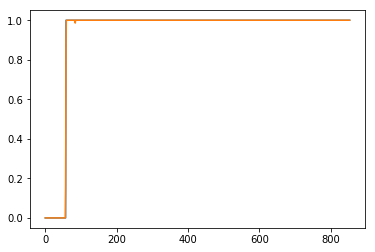

Start 315 Step


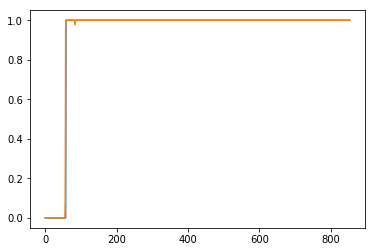

Start 316 Step


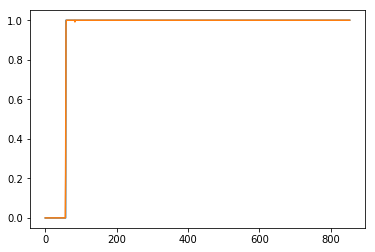

Start 317 Step


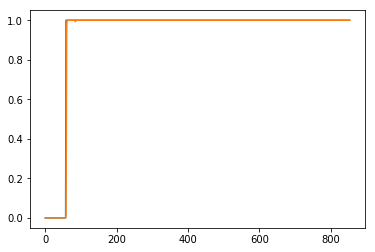

Start 318 Step


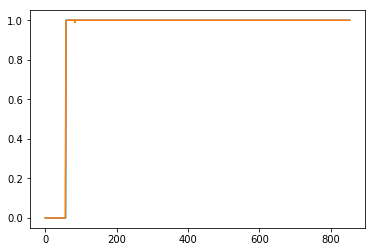

Start 319 Step


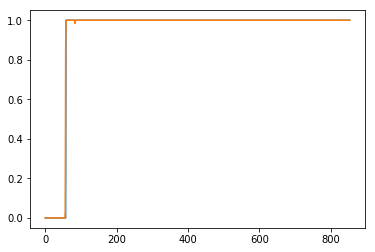

Start 320 Step


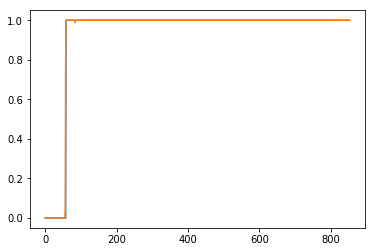

Start 321 Step


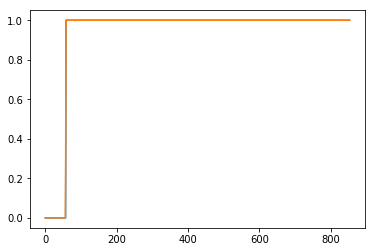

Start 322 Step


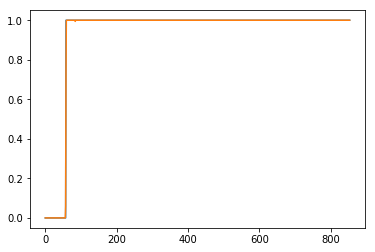

Start 323 Step


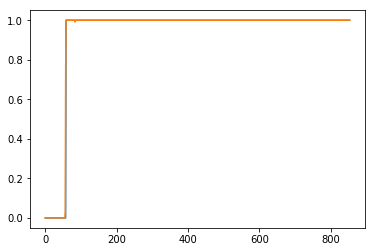

Start 324 Step


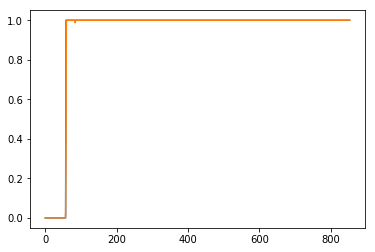

Start 325 Step


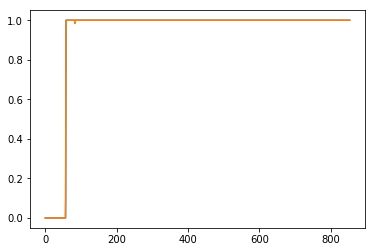

Start 326 Step


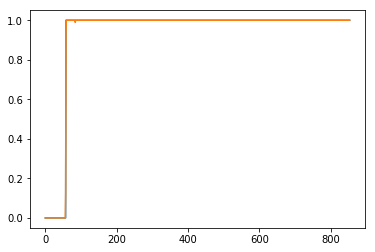

Start 327 Step


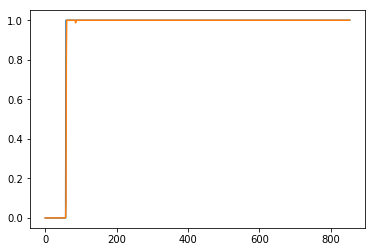

Start 328 Step


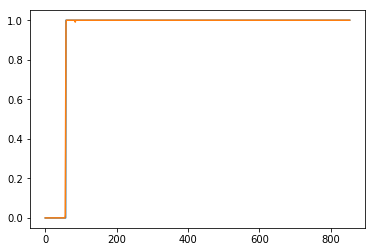

Start 329 Step


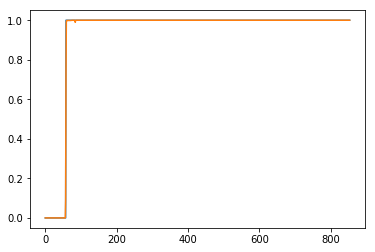

Start 330 Step


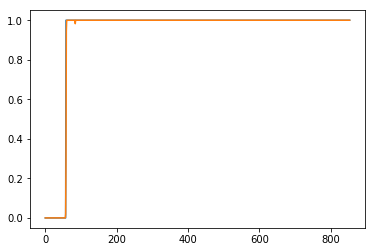

Start 331 Step


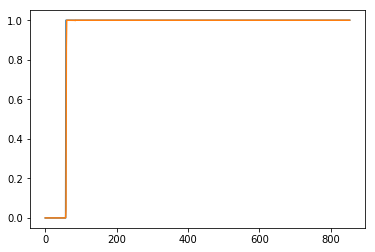

Start 332 Step


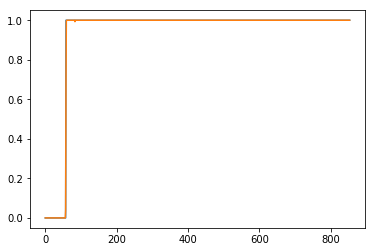

Start 333 Step


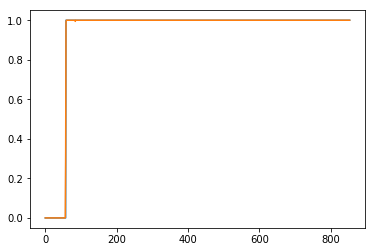

Start 334 Step


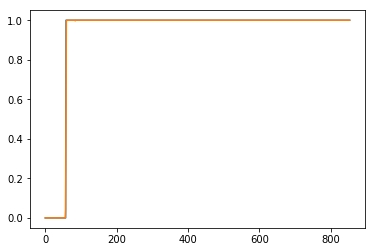

Start 335 Step


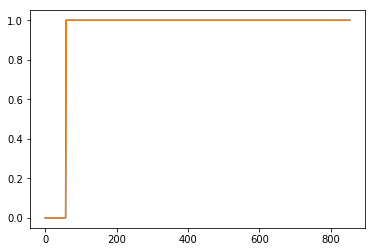

Start 336 Step


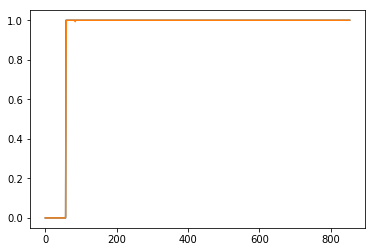

Start 337 Step


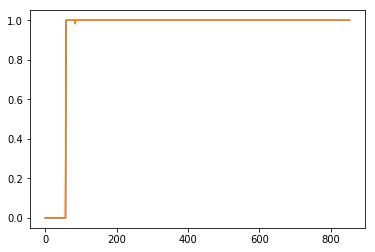

Start 338 Step


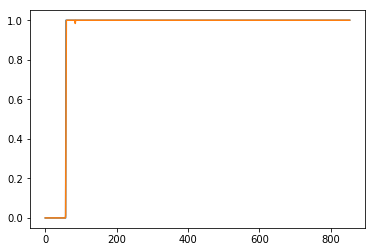

Start 339 Step


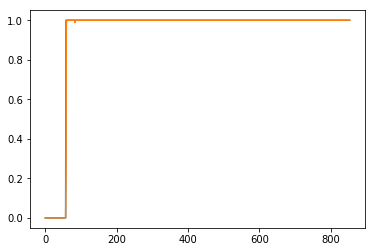

Start 340 Step


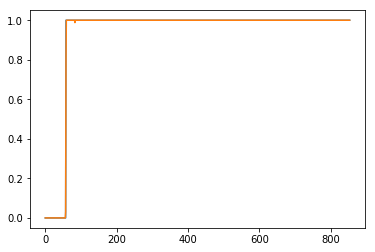

Start 341 Step


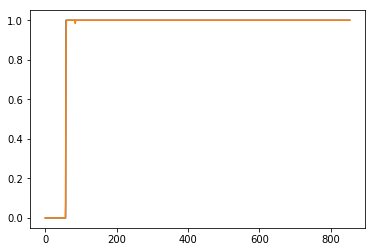

Start 342 Step


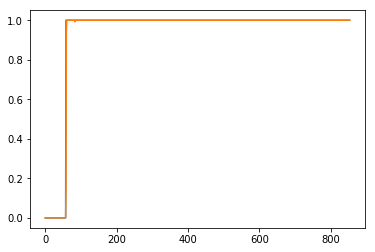

Start 343 Step


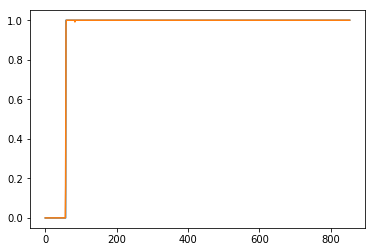

Start 344 Step


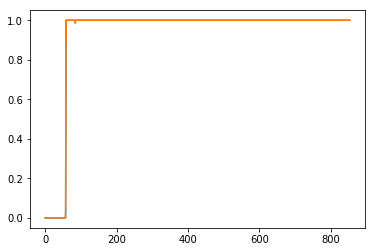

Start 345 Step


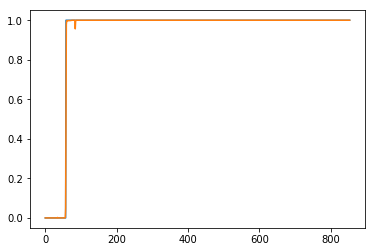

Start 346 Step


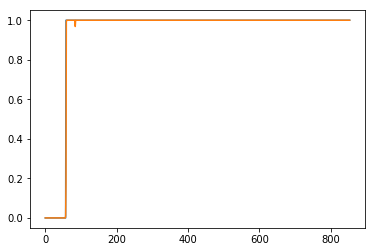

Start 347 Step


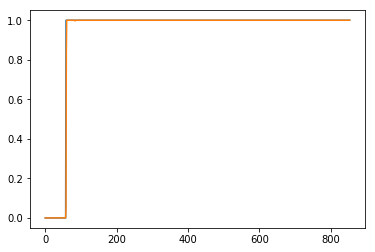

Start 348 Step


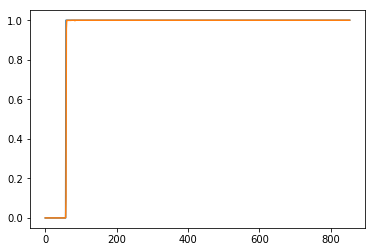

Start 349 Step


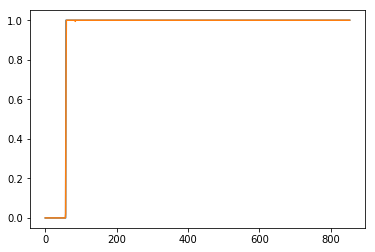

Start 350 Step


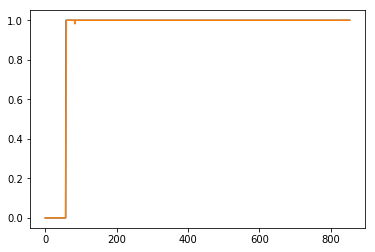

Start 351 Step


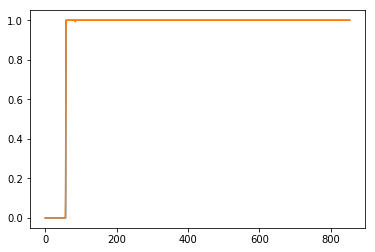

Start 352 Step


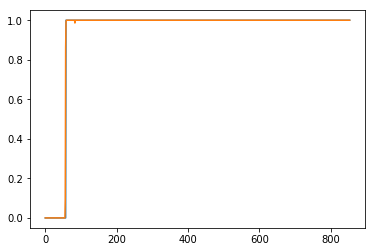

Start 353 Step


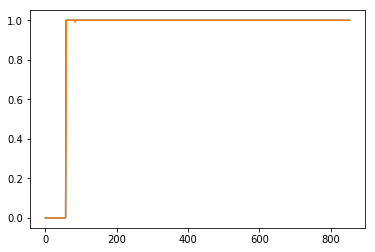

Start 354 Step


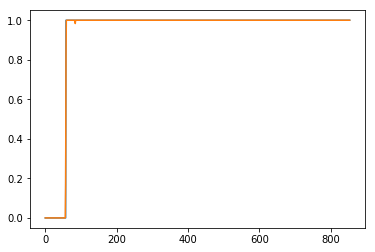

Start 355 Step


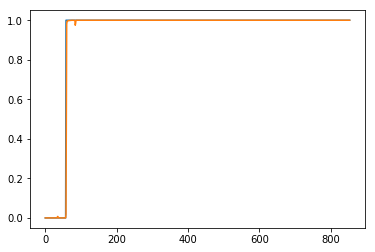

Start 356 Step


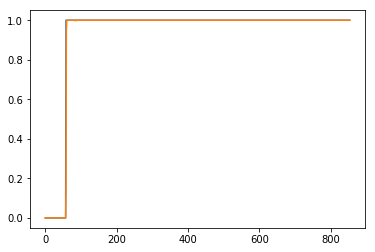

Start 357 Step


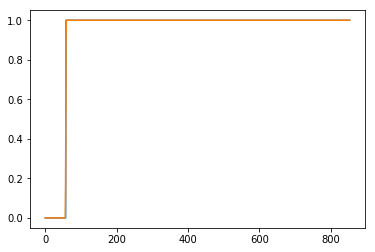

Start 358 Step


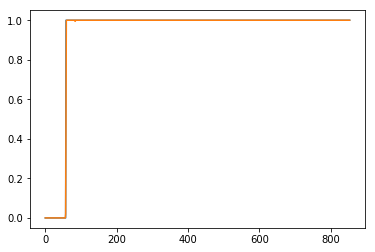

Start 359 Step


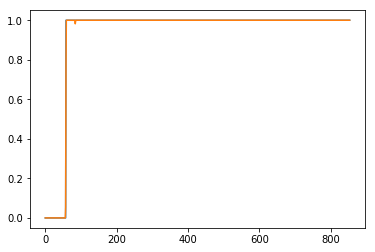

Start 360 Step


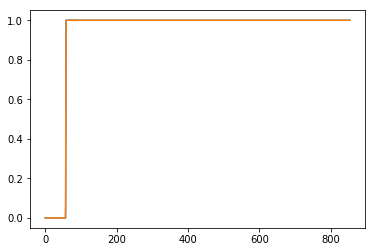

Start 361 Step


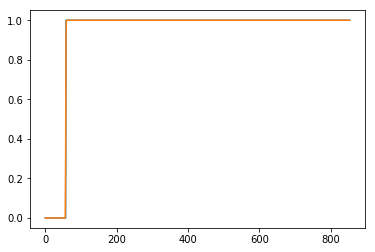

Start 362 Step


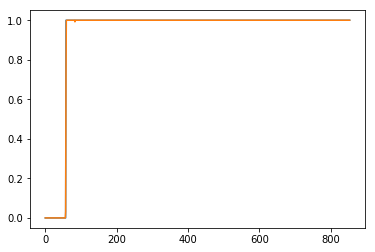

Start 363 Step


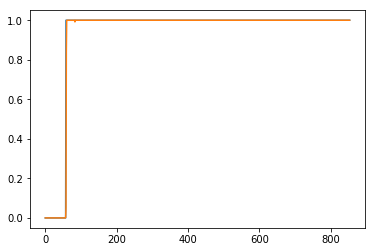

Start 364 Step


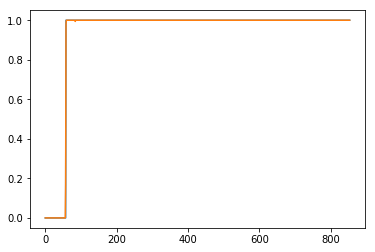

Start 365 Step


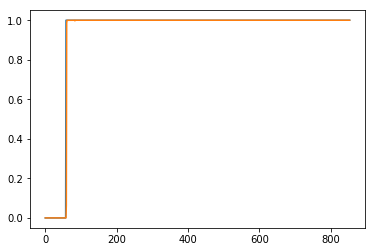

Start 366 Step


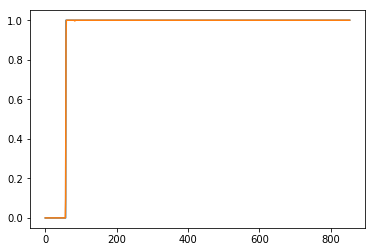

Start 367 Step


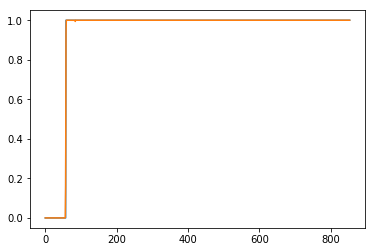

Start 368 Step


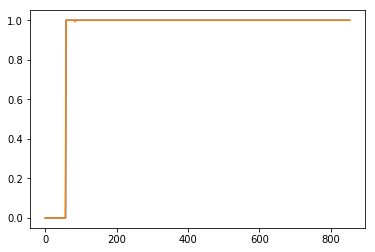

Start 369 Step


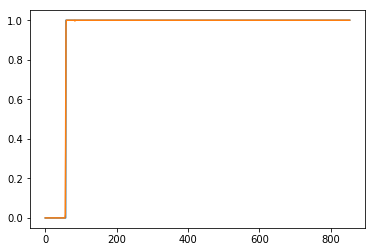

Start 370 Step


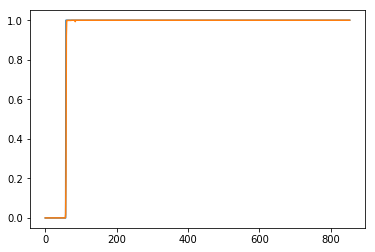

Start 371 Step


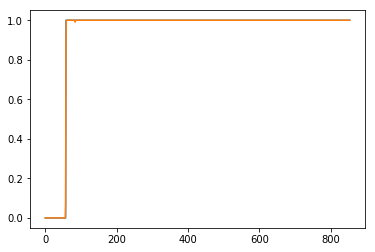

Start 372 Step


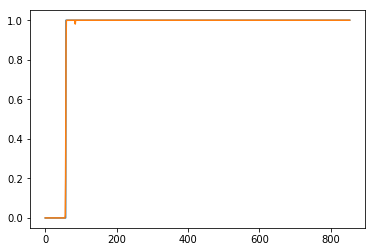

Start 373 Step


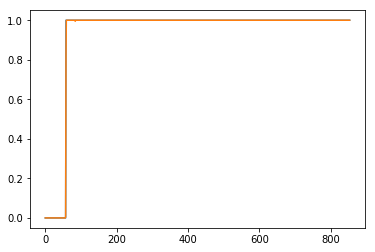

Start 374 Step


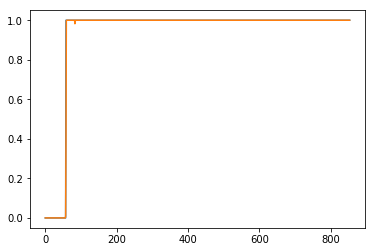

Start 375 Step


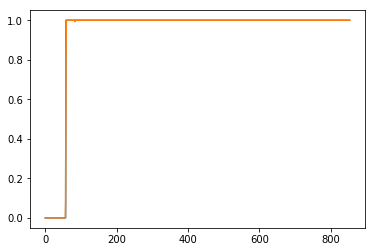

Start 376 Step


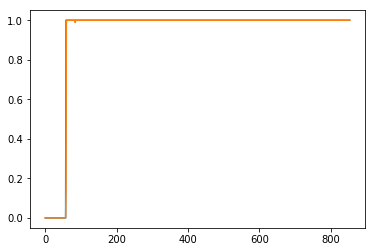

Start 377 Step


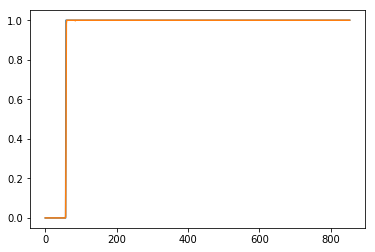

Start 378 Step


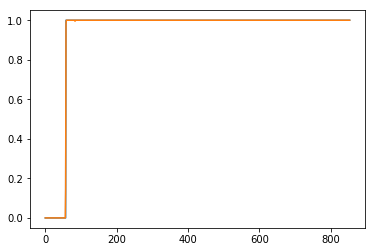

Start 379 Step


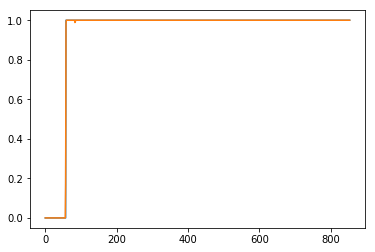

Start 380 Step


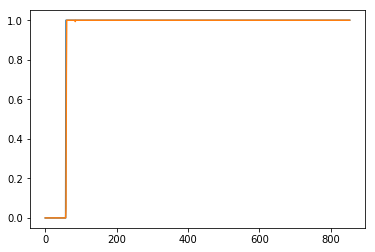

Start 381 Step


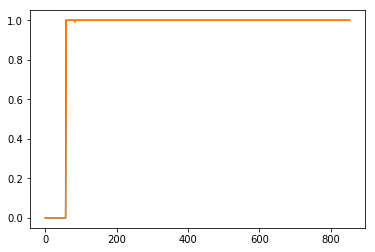

Start 382 Step


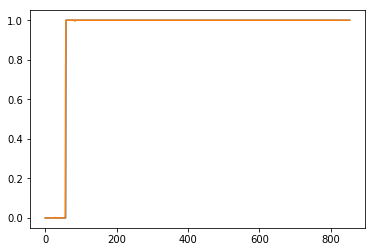

Start 383 Step


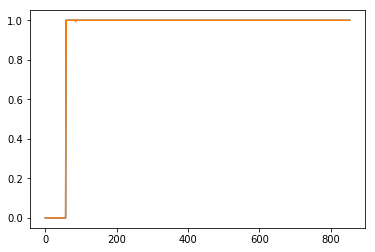

Start 384 Step


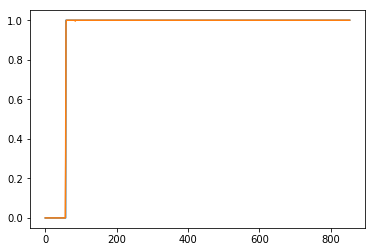

Start 385 Step


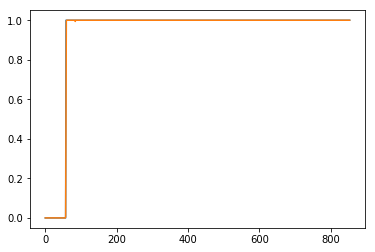

Start 386 Step


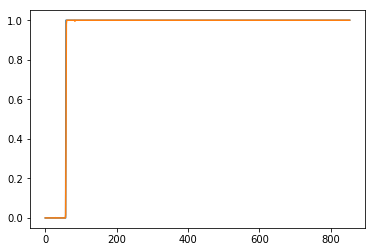

Start 387 Step


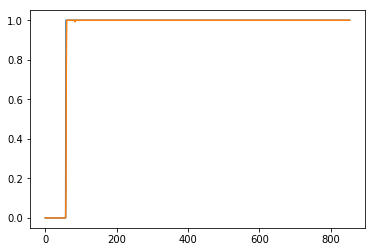

Start 388 Step


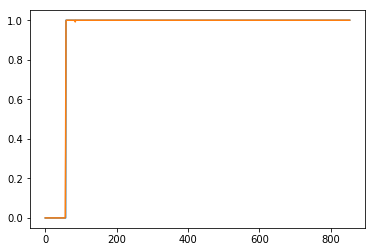

Start 389 Step


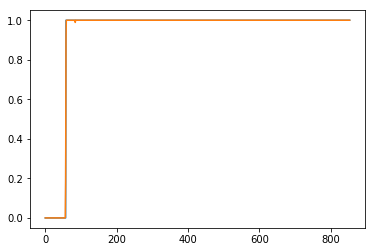

Start 390 Step


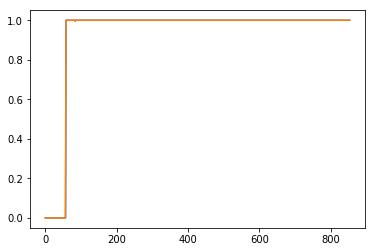

Start 391 Step


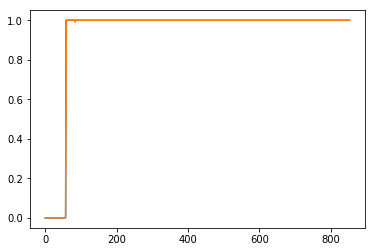

Start 392 Step


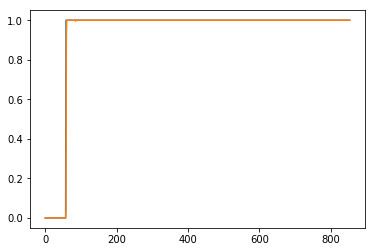

Start 393 Step


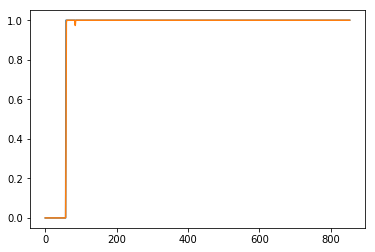

Start 394 Step


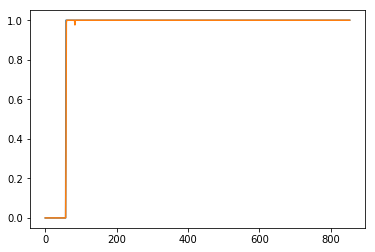

Start 395 Step


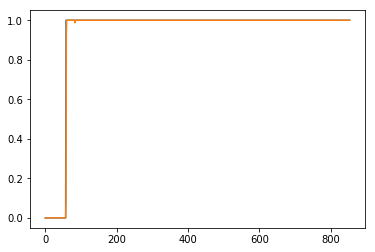

Start 396 Step


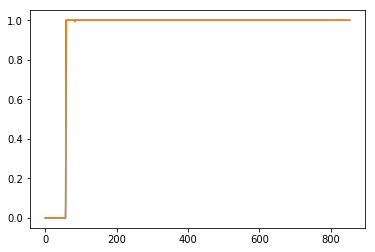

Start 397 Step


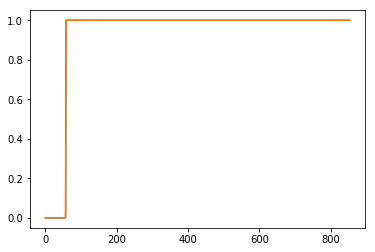

Start 398 Step


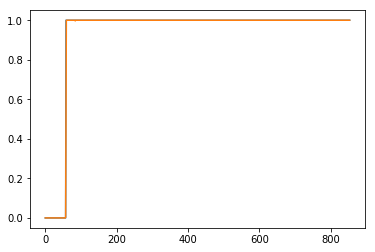

Start 399 Step


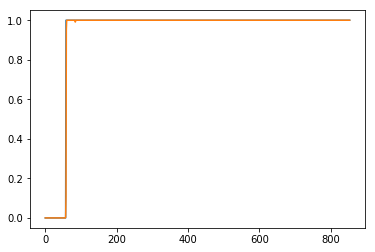

Start 400 Step


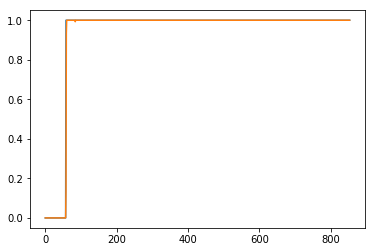

Start 401 Step


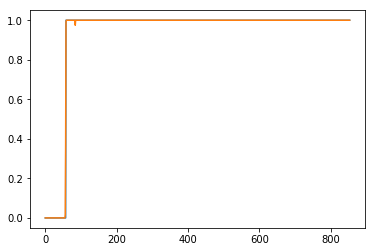

Start 402 Step


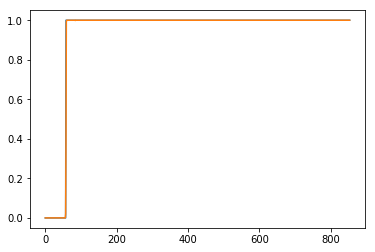

Start 403 Step


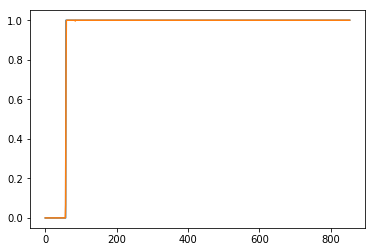

Start 404 Step


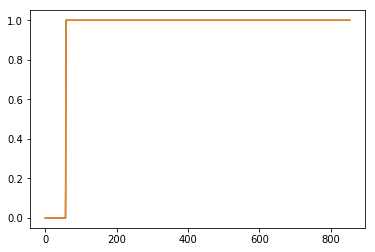

Start 405 Step


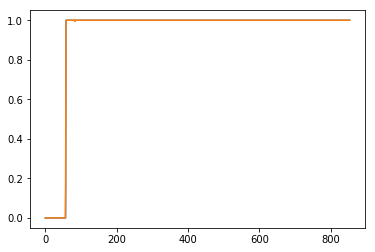

Start 406 Step


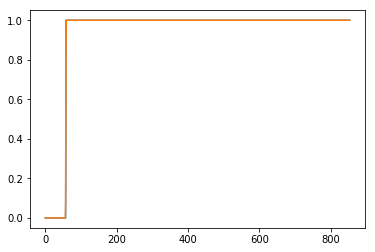

Start 407 Step


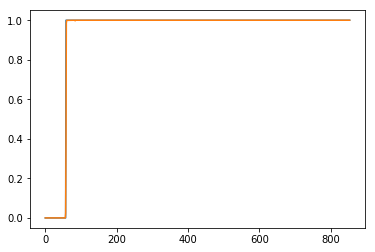

Start 408 Step


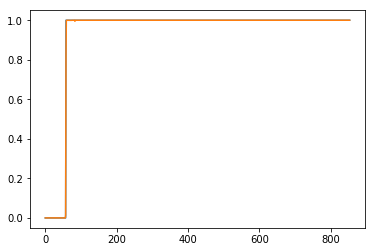

Start 409 Step


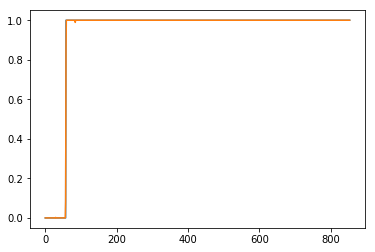

Start 410 Step


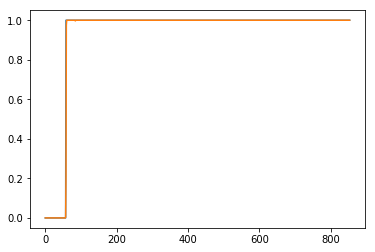

Start 411 Step


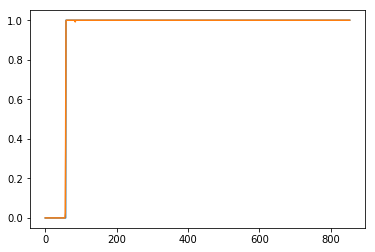

Start 412 Step


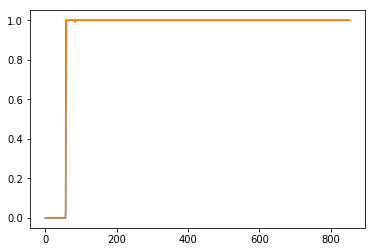

Start 413 Step


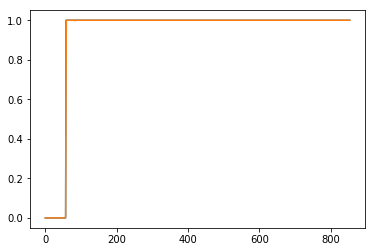

Start 414 Step


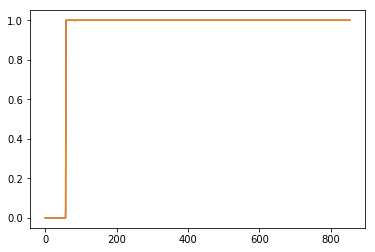

Start 415 Step


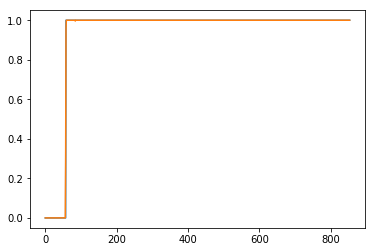

Start 416 Step


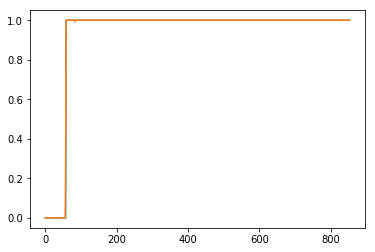

Start 417 Step


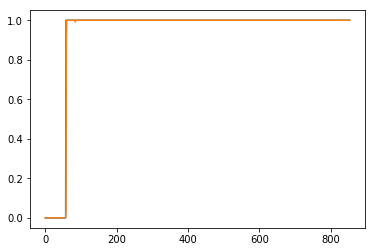

Start 418 Step


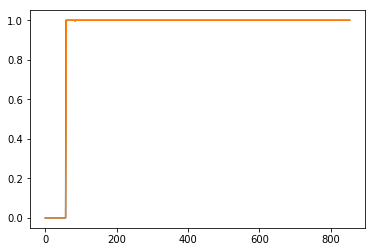

Start 419 Step


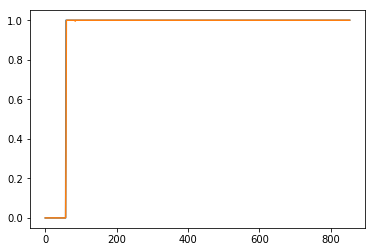

Start 420 Step


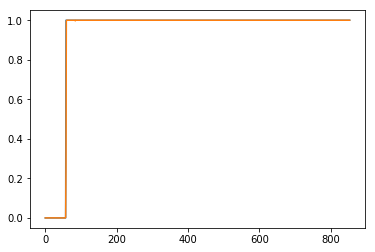

Start 421 Step


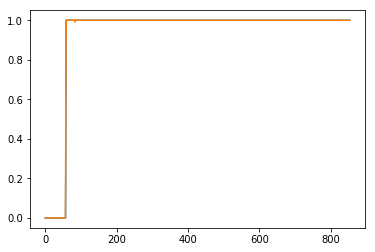

Start 422 Step


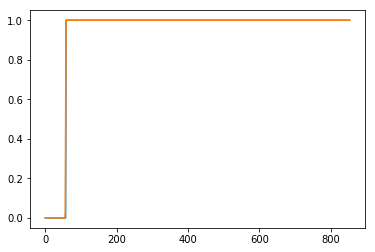

Start 423 Step


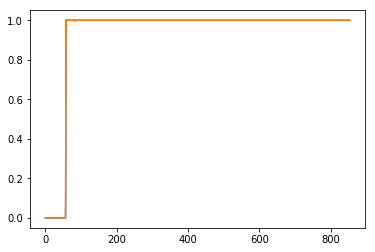

Start 424 Step


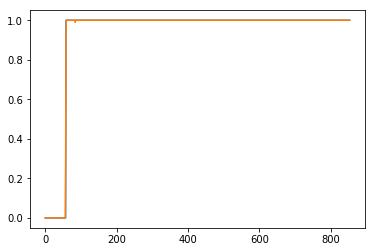

Start 425 Step


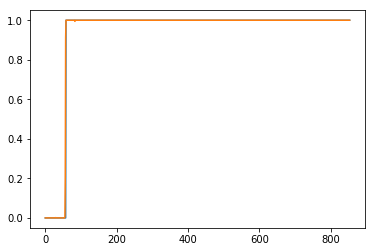

Start 426 Step


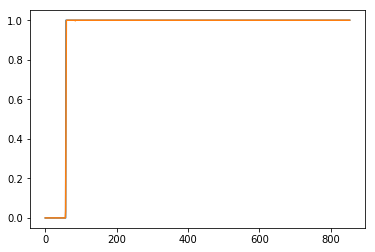

Start 427 Step


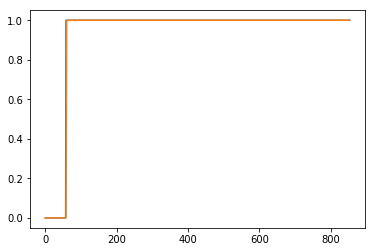

Start 428 Step


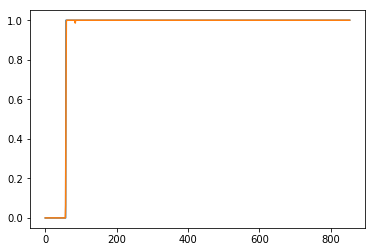

Start 429 Step


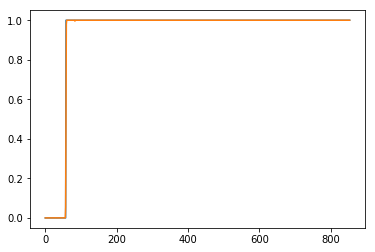

Start 430 Step


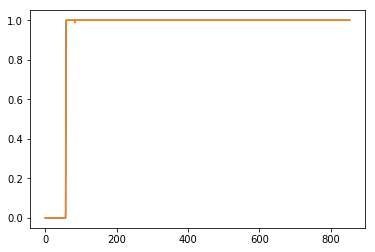

Start 431 Step


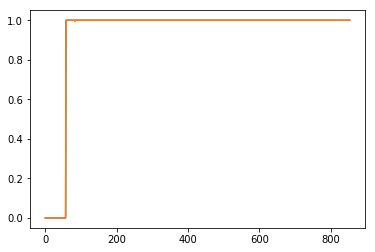

Start 432 Step


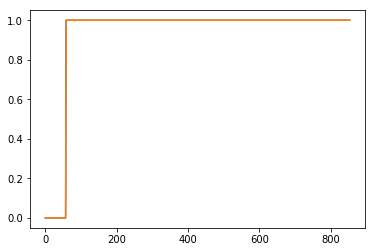

Start 433 Step


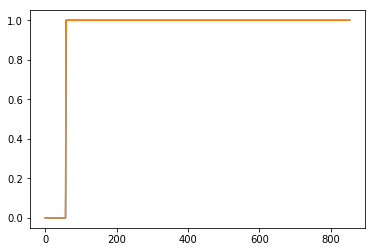

Start 434 Step


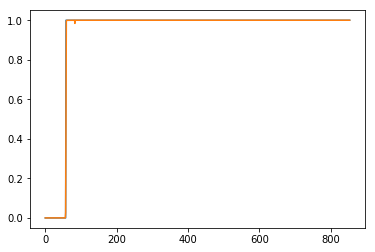

Start 435 Step


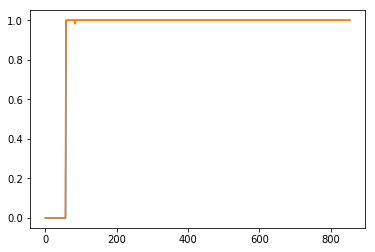

Start 436 Step


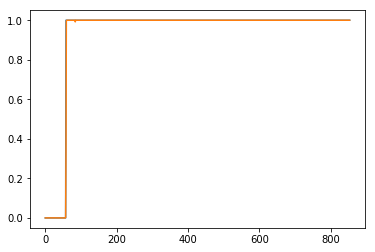

Start 437 Step


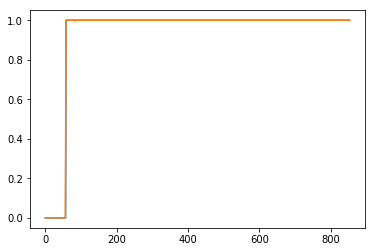

Start 438 Step


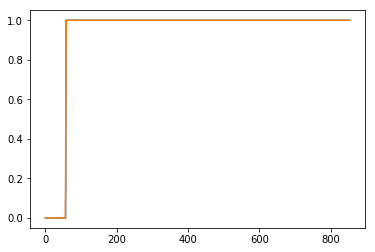

Start 439 Step


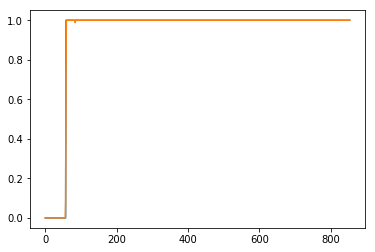

Start 440 Step


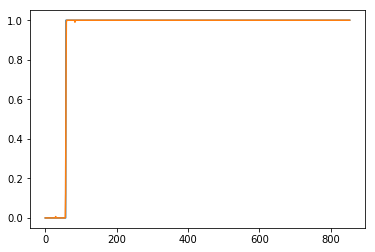

Start 441 Step


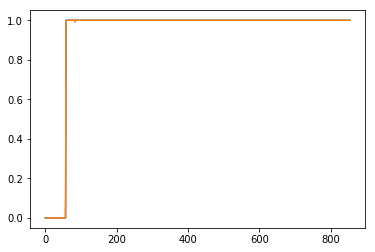

Start 442 Step


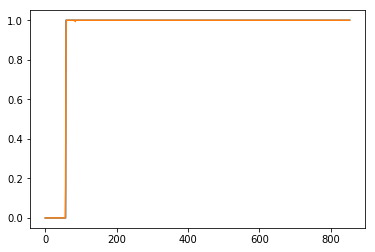

Start 443 Step


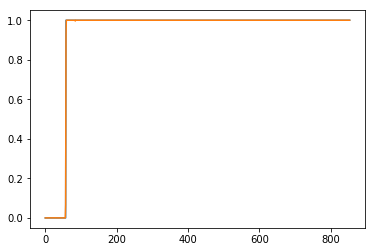

Start 444 Step


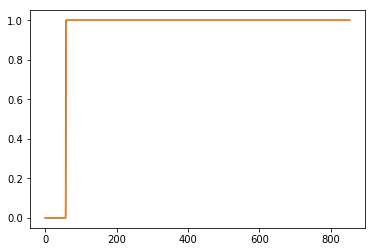

Start 445 Step


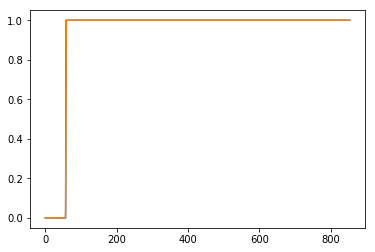

Start 446 Step


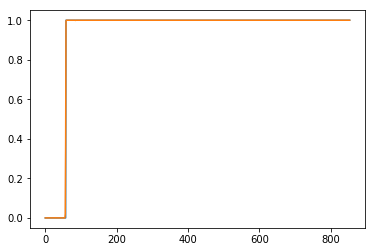

Start 447 Step


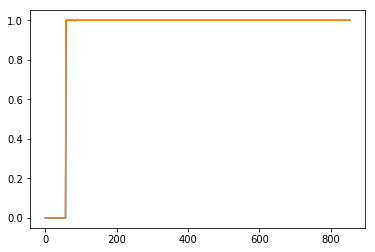

Start 448 Step


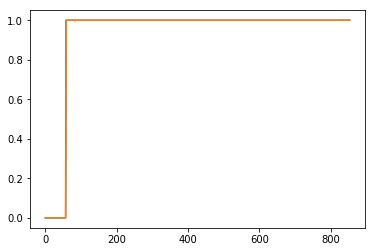

Start 449 Step


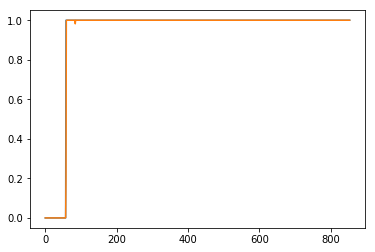

Start 450 Step


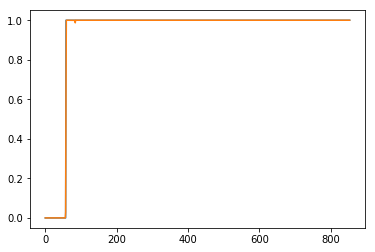

Start 451 Step


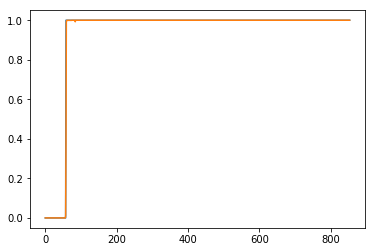

Start 452 Step


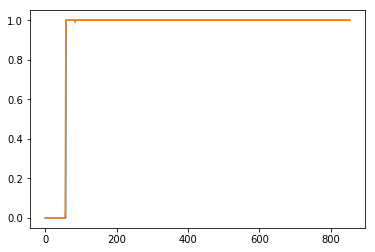

Start 453 Step


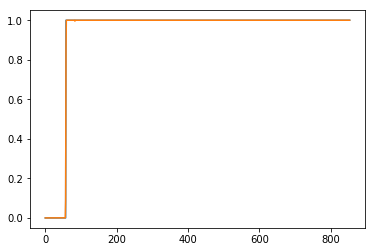

Start 454 Step


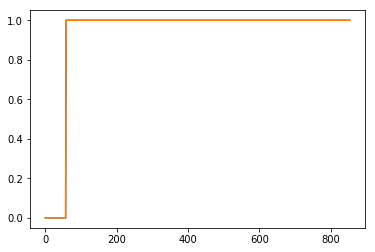

Start 455 Step


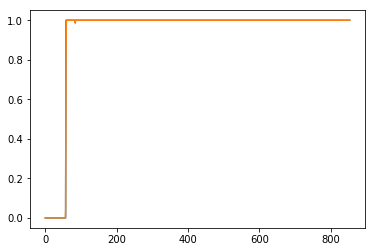

Start 456 Step


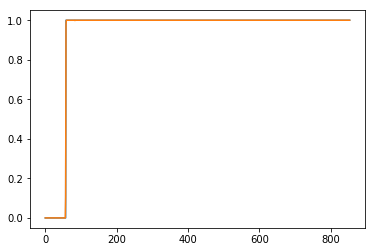

Start 457 Step


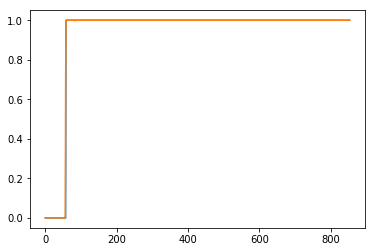

Start 458 Step


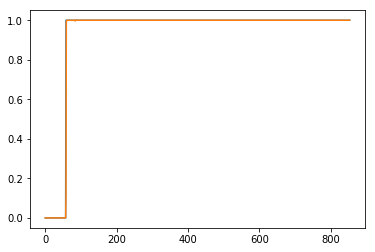

Start 459 Step


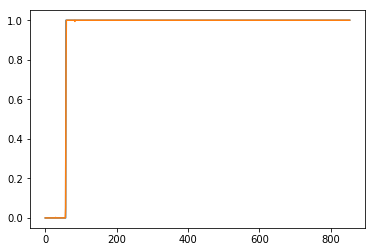

Start 460 Step


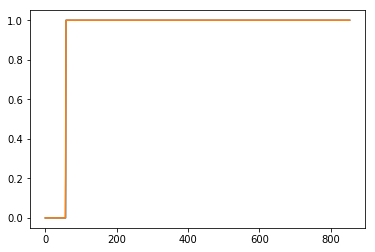

Start 461 Step


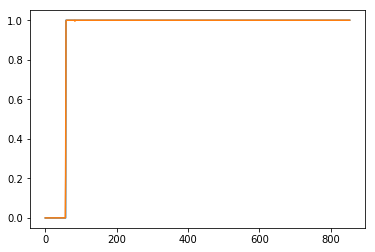

Start 462 Step


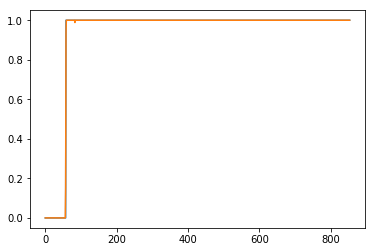

Start 463 Step


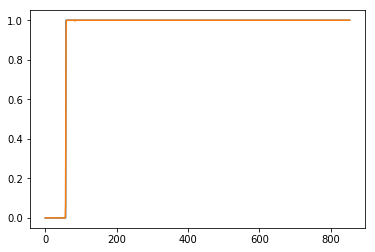

Start 464 Step


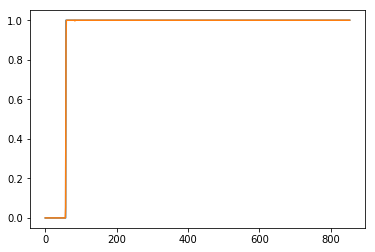

Start 465 Step


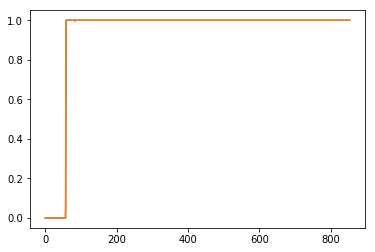

Start 466 Step


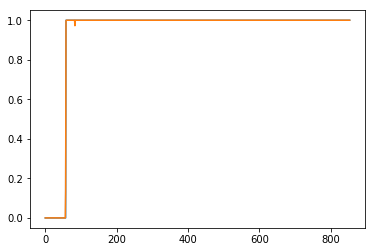

Start 467 Step


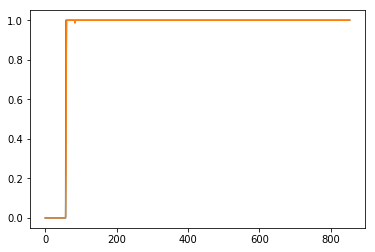

Start 468 Step


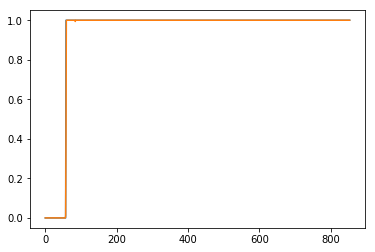

Start 469 Step


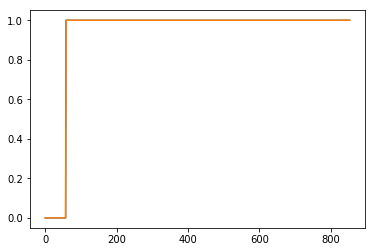

Start 470 Step


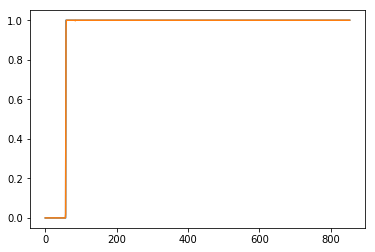

Start 471 Step


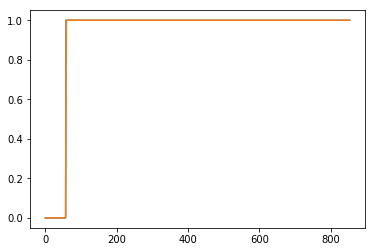

Start 472 Step


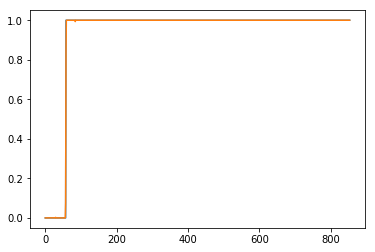

Start 473 Step


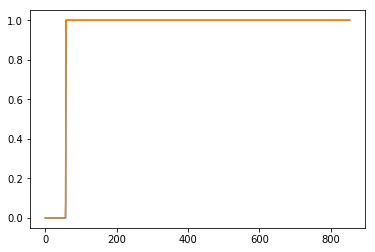

Start 474 Step


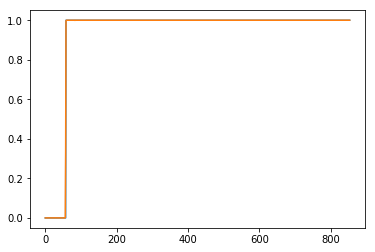

Start 475 Step


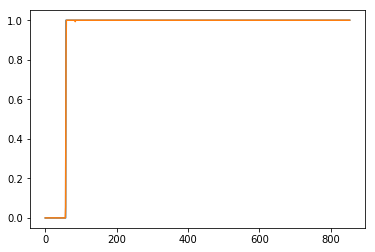

Start 476 Step


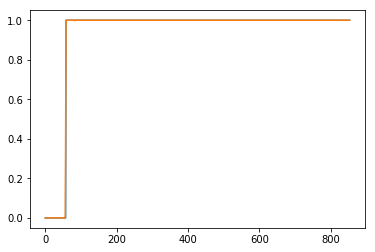

Start 477 Step


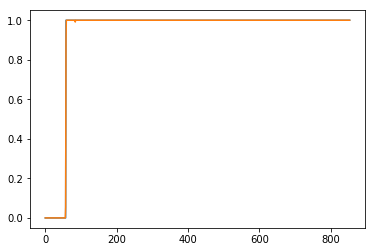

Start 478 Step


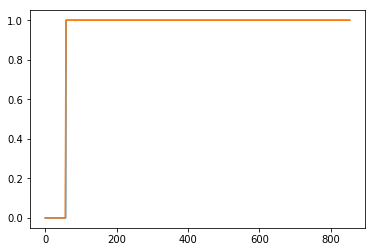

Start 479 Step


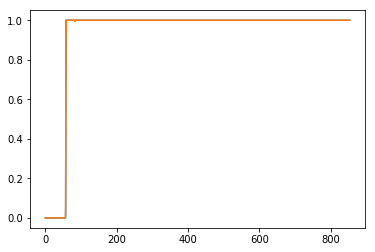

Start 480 Step


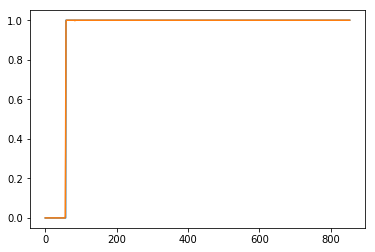

Start 481 Step


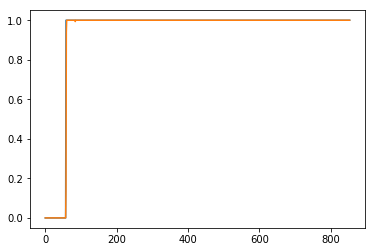

Start 482 Step


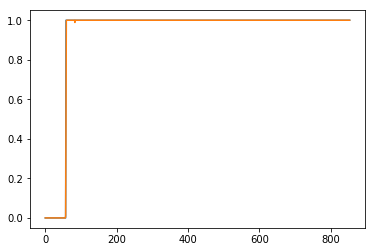

Start 483 Step


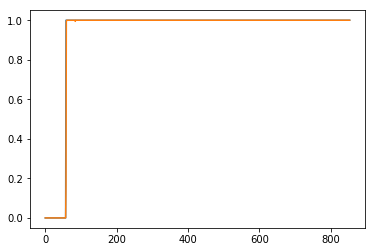

Start 484 Step


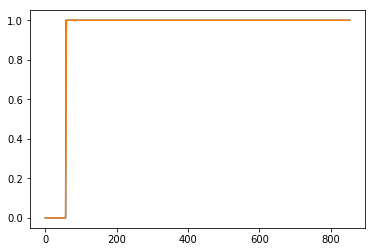

Start 485 Step


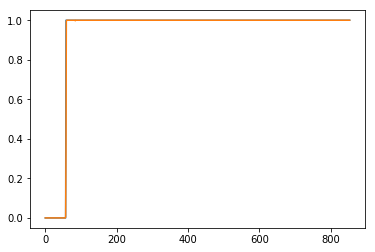

Start 486 Step


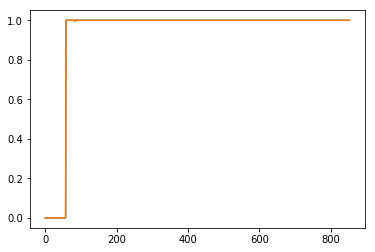

Start 487 Step


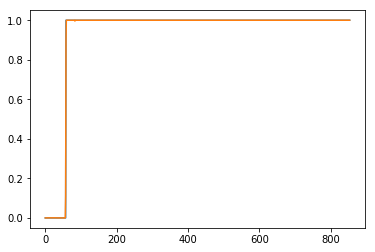

Start 488 Step


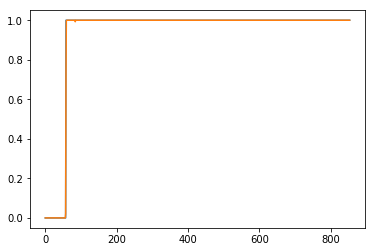

Start 489 Step


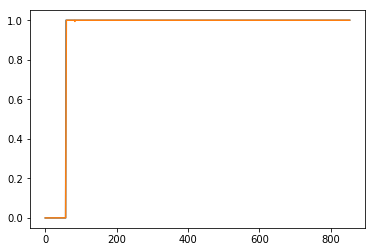

Start 490 Step


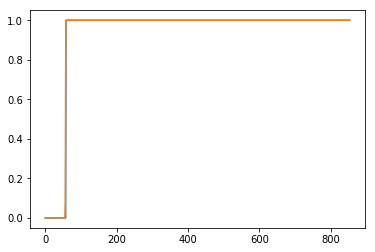

Start 491 Step


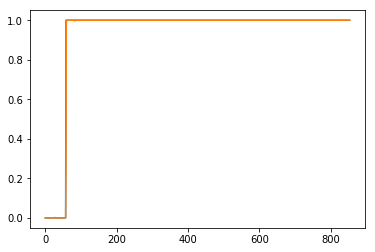

Start 492 Step


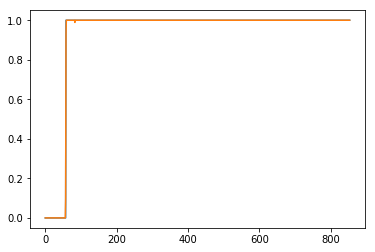

Start 493 Step


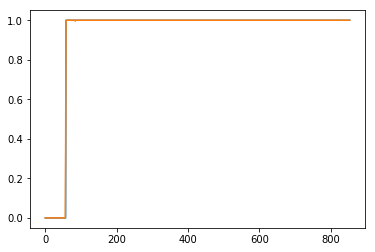

Start 494 Step


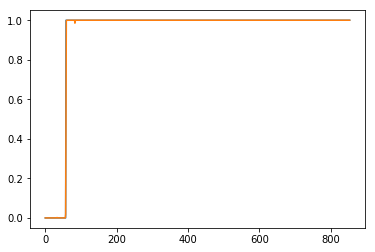

Start 495 Step


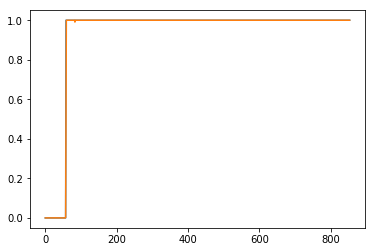

Start 496 Step


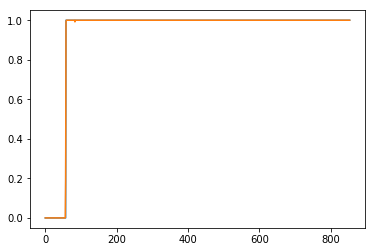

Start 497 Step


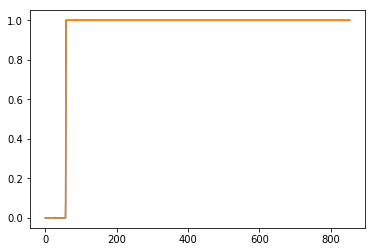

Start 498 Step


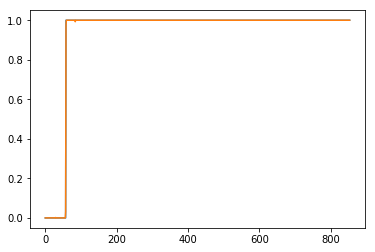

Start 499 Step


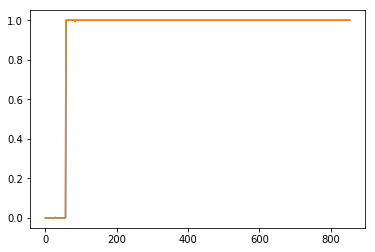

In [25]:
for step in range(len(tot_out_on_off)):
    print('Start {} Step'.format(step))
    
    out_on_off = tot_out_on_off[step]
    out_reg = tot_out_reg[step]

    ## On/off 변수의 출력 output 복구
    on_off_value = pd.DataFrame()

    output_value_onoff = ['BHV1', 'BHV108', 'BHV108', 'BHV2', 'BHV208', 'BHV22', 'BHV308', 'BHV6', 'BLV459', 'BLV615', 'BPORV', 'KAFWP1',
                          'KAFWP2', 'KAFWP3', 'KBHON', 'KCHRGP2', 'KCISOA', 'KFWP1', 'KFWP2', 'KFWP3', 'KLAMPO122', 'KLAMPO124',
                          'KLAMPO125', 'KLAMPO126', 'KLAMPO2', 'KLAMPO4', 'KLAMPO48', 'KLAMPO49', 'KLAMPO50', 'KMSISO',
                          'KOHV22', 'KOLV615', 'KPBHM', 'KRXTRIP', 'KSWO120'] #35

    for _ in range(0, len(output_value_onoff)):
        val = output_value_onoff[_]
        temp_value_box = pd.DataFrame(out_on_off[_], columns=['{}_On'.format(val),'{}_Off'.format(val)])

        on_off_value['{}_On'.format(val)] = temp_value_box['{}_On'.format(val)]
        on_off_value['{}_Off'.format(val)] = temp_value_box['{}_Off'.format(val)]
    
    ## 변동성 변수의 출력값 복구
    output_value_reg = ['BFV122', 'BLV614', 'BPRZSP', 'BV101', 'BV201', 'BV301']
    reg_value = pd.DataFrame(out_reg, columns=output_value_reg)

    ## 1보다 큰 변수와 0보다 작은 변수들을 재처리
    for _ in reg_value.columns:
        reg_value[(reg_value[_] > 1)] = abs(2 - reg_value[(reg_value[_] > 1)])  # 1보다 크면 2에서 계산된 값을 뺌 (ex. 1.003 -> (2 - 1.003) -> 0.997 )
        reg_value[(reg_value[_] < 0)] = abs(reg_value[(reg_value[_] < 0)]) # 0보다 작으면 절대값을 취함.
        
    ## 2개 프레임 합치기
    out_total = on_off_value
    for _ in output_value_reg:
        out_total[_] = reg_value[_]
    
    # CSV 파일로 출력
    out_total.to_csv('./Out_Result_DB/{}Step_result.csv'.format(step))
    
    # Matplotlib 그래프로 호출
    plt.plot(Norm_DB_output_test_DB['KAFWP2_On'])
    plt.plot(out_total['KAFWP2_On'])
    plt.show()